<a href="https://colab.research.google.com/github/SknyL/Face_emotion_recognition/blob/main/Train_FER_model_Valence_arousal_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка датасета

In [ ]:
!gdown 1V-ZnDOA8nqpNXpi_gg18v3tDX2lSMU9F

In [1]:
!unzip -q '/content/drive/MyDrive/Colab Notebooks/Emotion Recognition/croped_train.zip' -d '/content/data/'

Загрузка файлов с моделями и их предобученные веса

In [23]:
!mkdir /content/models
!wget -O /content/models/class_model.py 'https://github.com/SknyL/Face_emotion_recognition/blob/2ffab713c8dfbeb421f04ed968272c8b8e994c8a/train_model/models/class_model.py?raw=true'
!wget -O /content/models/va_model.py 'https://github.com/SknyL/Face_emotion_recognition/blob/2ffab713c8dfbeb421f04ed968272c8b8e994c8a/train_model/models/va_model.py?raw=true'

mkdir: cannot create directory ‘/content/models’: File exists
--2023-03-12 15:54:14--  https://github.com/SknyL/Face_emotion_recognition/blob/2ffab713c8dfbeb421f04ed968272c8b8e994c8a/train_model/models/class_model.py?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SknyL/Face_emotion_recognition/raw/2ffab713c8dfbeb421f04ed968272c8b8e994c8a/train_model/models/class_model.py [following]
--2023-03-12 15:54:15--  https://github.com/SknyL/Face_emotion_recognition/raw/2ffab713c8dfbeb421f04ed968272c8b8e994c8a/train_model/models/class_model.py
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SknyL/Face_emotion_recognition/2ffab713c8dfbeb421f04ed968272c8b8e994c8a/train_model/models/class_model.py [following]
--2023-03-12 15:54:15--  https://raw

In [20]:
!mkdir /content/models/weights
!wget -O /content/models/weights/model_class_weights.h5 'https://github.com/SknyL/Face_emotion_recognition/blob/main/train_model/models/weights/model_class_weights.h5?raw=true'
!wget -O /content/models/weights/model_va_weights.h5 'https://github.com/SknyL/Face_emotion_recognition/blob/main/train_model/models/weights/model_va_weights.h5?raw=true' 

mkdir: cannot create directory ‘/content/models/weights’: File exists
--2023-03-12 15:52:53--  https://github.com/SknyL/Face_emotion_recognition/blob/main/train_model/models/weights/model_class_weights.h5?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SknyL/Face_emotion_recognition/raw/main/train_model/models/weights/model_class_weights.h5 [following]
--2023-03-12 15:52:53--  https://github.com/SknyL/Face_emotion_recognition/raw/main/train_model/models/weights/model_class_weights.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SknyL/Face_emotion_recognition/main/train_model/models/weights/model_class_weights.h5 [following]
--2023-03-12 15:52:54--  https://raw.githubusercontent.com/SknyL/Face_emotion_recognition/main/train_model/m

In [46]:
execfile('/content/models/class_model.py')
execfile('/content/models/va_model.py')

![Emotion-representation-in-the-valence-arousal-space-using-Mikels-wheel-of-emotions.ppm](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAA1IAAAMUCAMAAACB+eZEAAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAMAUExURf////Hx8ff399fX1/X19fPz8+/v7/39/fv7+/n5+e3t7drZ2t3d3dvb29HR0eTj5Onp6eXl5uzr7Ofn59/f39DPz/3////9/8zLy729vcnJyUpISa6urv77/v/+/aioqKSio9XV1ra1tru7u9TT1JKQkcC+v29tbvz8/M7Nzfz6+oSCg7Kxsl9dXsXExeHh4UA+P56dnrq5uXVzdGdlZmNhY8jHyFZVVayrrJaUlaalpoeGhvLy85mYmH18fcPDxEVDRPf5+zk3OKGgoWtpa4qIilNRUvr//7Szs7e3uCsqK9/e3k5NTfDt7vLw8PT09nh2d9PS0jIxMuHg4fn1+e7x88bGx3JwcVFPUMHBwVxaW8/N0eno6Lu7vnt5ehEPENfW1+jl5/379P7/+5qZmqupq+Li5Pn4+NrX2IF/gPf19+rq7I+Njrm3uCQhI/j/+P//942NjQCv8Zybm/6bA/X68vTy8v8ECVhWVwMB/cG/wWloZ7Cus/fr75+fn/v074yLi9/b2wWzUlpYWjw7PR0bHObh4/n6++Xp7bGvr3OROfFt5+zp6vXz84Fjn3p6eJGVk9fZ21pYWPULCu3u8AeuTg+28MPBwe9k55eUl8fU32JgYP2/B+Pp5MPDwgijR4CUOeLK2OnI6+Ha5sbk5ezkvEa+6MjJzBWu8+3i1+Vx5gqn2nLC68bU0HyWXfDSj8nWxoFkqKHBuejEvevz6fn9/ety2+WK4+lA2NXn4+an2fLw1v2cInvIwL/K229aj/WfXPHj6Z/E4cYFB2BgYOPX1+zu6/v6/sfIj+3GZedqb6Wfr/LZ7Rm5zMKhhvKhFvuSAp/Z44uUtvP6+Rydue+jhnC7YCi3kPI6YOQ8Js271Ea/vU9Hcz96yOHk3KHCfQ0Y9OSQx8S6cQwiqp+QnD4h+jhE7exkx01xMsSqxOLd3MrYmkW2XYqZ6iA5YOl2H6KD8eZ0tE5fKRmhYMmhJhyqcba3rq6nnH1N+2TBmI6HoOu+Q4Fi0aKpfKaHqNvZ3W7NjrEAACAASURBVHgB7P15bFzXlS8KH5JVdaqKQ5ElsopTneLM4jzPgygO4iiJMymZJiVRUom0TNImJDuUNQQWXSKuhLZlwW7ZCIHYjmRfO3h5jtgNJ4hv5LbN+/k6F1AzAZybTuC8fjHw8iHdHeBDd/D+yfdbe59TdWouJ0pM39YWVWfvtddee+2199rzIAgPzW6TgCRJoiBxriQBLnLgT8++BBFEBnMIDmCR1WKhX0DF3ZaYh/w8lMBXLwFSKKZRsIjQESgV6ZQo6ZkNFkDxQ1okkVJBoywWQYT1oUZ99dn3kINdKQFZpRy8eWKqQrpFrRJTNjBNCuUgFzVaFlkJmYLtyhQ9ZOqhBL46CZDSiA4RfTk0Ug6RjKB3wAgWCUqmN0CH9AR3kDY5SNdc0CUH/LgqfnWsP4z5oQR2pQREyXF0MkkUDMn19XFHJ4uK9sbHHX0hdUxYzH4kuvVOgsE0eefOZELSI2Zpz5292a3CzdTsLU1CrMHThu3KdD1k6qEEviIJiEJS1hNFwsTeZrt9rbTq1q2La5nP3KnaKyRdzDlU9ERz0iOrTSeqch5tPjV20t5ctXc77lZW4ox90/VwLPUV5djDaHe3BCRhu7z5xB39nRN7r169eTO7KifpamNfXPOjvZMXk68+c8KevJNtf+bUnpzSuGeax27mdJ164daJ7OzmGDau2t1pe8jdQwl8BRIQLaeeefSZvUnP2B+zSBbLqeYEy2Mn917N2Xuq+dF9d55Zy8mznLInCBMnDz9y8Y7F8khXwp0ue1puoxmNlDJ58RWw/TDKhxLYrRKwuA5f7Lc/mtf46LaE2Yci+x8tf2x+5NCj6Okl37Tb++2PWB5pe8FyKuvOIydOCZbJrLz+ZyafyXqmlRamHpqHEngoAT8JnLJn9XflZGfaE/Ua0fKoPUm403Vq396LFw/ve6Qq85muO+Kdrrje7ObsOyce2Xf15DN5fXfeO9m25nzY8fMT5UPAQwlAAvpHq7Kv5tj/OHnimcMprYbGxgnh0aqrlsnnu5Judj1zNb5rbeLRxpu2R7OSkuwnD2fas/PsL4znPH/HIVkeyu+hBB5KwF8CN9cO77NkP5o0MflM86ZGmzsZLU2mGS0vPPPIzqnSF4RDj07e3Dvp2nfn0YneuJzGvhf2vdC/x5LwzB+x3utP7CHkoQQeSsCgbRXFaJ1LcE2YtZJDd0iUorQOaZ9xn+3QhEvUR2ldWo0gagFzTNyMcgiamy4heoJWgB/q1MPi81ACYSTAdu3JmkL7KfgeJDkQh9Mv/X+4GymMLB96/2eVgJW2xGJrEfulnbK074g2G0G9dDP4cBCDwwEnh5D/vEpoD3cnqYTx0PqfTAKs9EM1aOO5+w8yYPv85DESNptLUnyuw2Kj7X3Yi46mCbjufX1oqHirxdSPU/xPJsaHyX0oAS4BUg1JcqDBoY2yNG1HW9AdprwDaJ3ggS3ncLPpvMOZdN7DYYWL9IcpIWkPQ+EqxsAIqE1f08pKxqN5+PtQAv95JACVEqXFrIbuEWgXjj4JjqQoV09nH3X4+JwDdfz0QnnHgmQQ8mqHMvU4d4imCmAEhaDIQi2X4BKAR21d+lBtEoAPzUMJ/CeUAOmCQ8irnBs4DCWwFguLLdMF1oXONduiIESPW4XiYqsVGLrC9ROCdLB9bm5YI1x3CIvWYqseh331Br21uFgQDMVozqxOAciCULU+Zf5PKMuHSX4oAUiAGilB07K0vmQXHOlnCm9dHpirSztTY2/JEXKnqq9tFA5XF0PZcju6yx1C+ZX1pcIoXc+ZE80H14Zrsq6dyy85NtKSc2Bj+Hy1cLSluylOiLs1m7HUZhBItx6ahxL4zygBhzBypaxnaVUovbKU0VK3vjTc1vFq/sDs9aeXshY69w90JEiCdnY6t9xgGO6c7bhhHOmcWyqpGh3tXKpK7hw1Za23tw1caXg8ZagyY70nu3YgY2CpT7A97Pj9ZyxMD9NM0wyC/on1mp71J2am50oSTKvrr5purdeUDtS2LXU3jg4MLy3VC8LLHU+MFQixVzrbMjrGXl5fyj/ZufR441xd6cDQgfY5++xcRs7B4bn9T89N1azX1GcMpAu2h63Uw+L1n1QCojA2PXelc73k5aX9OkHIX6oSStYbv1mZ0THw8q31gYzp1YOCYfZKcny/0Da3lLGeUdS8XmNtXu8WitbregbaE8vWi07vX6pdy1jvqJxqrBwYG6zMOE3TFQ/YPGz2HrBAH5L7i0gA032u/PX9F7vXu3MGOtfiz9WhuToyl3uwbG69RNszN922elTAGGpBOFqeV7l0uWlgoK99vVnqWr8xUjeXv7A01bTUmZBsH527nLE+fCKtvHNpY3au2/iAVYpNMNIEJP091K2/SFF4SPTBSAD9vpjKpWqhYGC6vm59tCxlYS4ja3qpoHh4rjNVeLyzs6FsTTjX3VkkxRe0zA1ft7663nZkqUg4Pb3UuV4Xd3F94MpcbV9Zx+iV+oWBjobLI1NznQNzlw0Pdg4d8/QOgzaRNnM8WMIPRogPqTyUgFsCKKNSzEKbWR/bkp+Y0FPbcqxouGetLd8kVg9naiRNTs2zC3HC6ameYiF+o6p9RLRtLDx+qwdT5Omz3fmDQnxJe35LX3ZJ2cLL0nP5dXX24pGF2Z4STA4+4I6faMjup5UzrDA/bKTc2ffQsvskQCqlNRsE0Rl1wCBEa3DTkVZr1Z1zCIaDtE3WFr2I1VtdjFmwxlYbz+G+scUDmoMHrTTzfo72UixqxUWNYLi+iOJefB1rWNLiddtBzQNOKbRILHqeTjqSVj3UqQcs3ofkHqAEWPHEhiTa0YcL+hzUCLDNsFAn2j7BbvOjfeaSkJ1G5dkCZcI/UdRLuNFPwC4Kdq2fRY+b/UQ9Qks2CXDaUfFAjeSM31tdbpyhbVIPlPBDYg8l8EAlgPKpFx1oiKBWUCrcxCwZoBtMTVB6aSuSHiricjjEmGqGA62BL3lgux/TIlyM6YA2sWAo8NBJaOaDLfiSZDGlO5KqNzZxWuvhcOqBFoGHxB60BFi7RKWUmie66Jx+0fRAOdAc8F/W14rNhabwbX+0Uxa+0DxoEGeIhSIyKP2E/oCbEslQYNcI5tR4PQ2nHrQMHtJTSwBZR3Uq202NjdOBDfophMKKSWCMkH7uIGFouPHCWqiXFBgJfKIZoJJJqQkTIdEIQsdDnVoNDx2PjYNZLEw+1Po4JPTd0KmjlgsutE3AN6YnS46Rzb1rRIaRokYJXUKHXk+3O8uhiTJ8saMWMbL/jAfFRpToD//xpd+gRvFmqAzTIbgSGvdiGpFpfsjAHqoyWoTYnnB/qo0lLYLAQRli6YbovupmGNXj/35GjN5FNbEx/6KQlL/QUv0Vyvlmwgtxj97RfoUc/BWjRu/7gTfzkbNPtZYpN6EiOzY7Jjs2JjsmsInNhg/8gxiEhXce+QajEBPDqBOdMIbTCYKkBE8ZCYTA+YhJPpr2aGr20aN5lCglRCD8mJg8sBXOZMcChwsHxLKPMmFQekeys/OyY2JjY+PxFx8/ODaWHJc8FjNZkJtZdWI1qy83t7o/PSYmual9sLkkv6GJyICf7JiU3Gr4Aamtq+9wWkpFctxYRVxFfHxcfDwIQVCykdFZKigkSRexE51gTPPkgC0yLMKYo/EvZK81Nz7yaONkzFElHGiOcFwF4v/Njk0pCh6Tgp89otiCfMELSzZ9g6AAgf0F81bgTHqKw/cbO4I0mdLTnahO0b2NXAkeNCY2fbbnx1dkxw+iVCBPA5uEvKBeFCouLm4wdiSbwhKZYCYuJiEmBB0WLC47hcpnSBOXslZECD60wAVYSU7orzqR1Z899kj2IJy+SF6EYxMYz14wXwd4JhCRpi9oMjWMjRszmSoqKsbioE8xKelpjV0nmlaZudjVlWVvbkw7vLmWmxIXY95oSc9fOFO2miTTGMxeS9vc3Myx25uBudq22tZ0YrWtyt63WT9CSjVWAcJJFWPx2THQL4o2DrFyMxg/MgKUECJCJEqy4uIHY2MrHtmbnJfz6KN3sovg5TZxMSluezBLxWRaTKj8ZOHyGM/BSDBGY0fy/DLLJ8BgfALohDExKSwrAmNR/sSaRnraaAYGzdRXZtA5N22cyGUzwAbWiedde59fndYHoHZS11+UnDqNGhjQ7tRFB4R7gA5RYzR4nL42FpUo6WISfX3IvbXl2LJETzbeSXohe5/lMS2lh4cIhA2YKyw/oug0RtNoE3MLfABUXKwXrZRfLo1Gq02Mmcztr84pzS2fTC0qKkpJSU2IP3bMbNAbDBgmOfS4FklIL80uzS/pygUrbOCkx2BLH+0wuPR67R5TUkxKanpRSlFRffrevtK03P7c9HizVhOloZqWxlcYlcGwHxqe6XAJUxjjMmrkIRoGdJbE/uxD2Scnbx59waIOZzC71M4AdocQlxJN85MhTasOkYTEEB1RxHNIJElvjCBdZmfwiMCFQdAdbi530QTMVzgHA3UeTI5r6qe1kxDDuqjosC2pXod1zpAGE86t4XFcRs5LKFKa2IBH9CwW3IkysZmw/djRR/ZYDoVfMHXgfrBwRg8c1Hn8z0rHmGxGdNXis8v7+3P7C+qLEkZGilLjUKEIkpWMD0FRiJrRJg6mpBz21JweGyGzUFarq3XPSFFe3khK+mZabnV1WnpsRUW8SR7/eIpIa/hkSToPjiTsy3smO+mZZyYf9ZaZwyj6cOrrlISxGKwPhDHa8CM0CTethTNSVAQ4KBreovOiKgnmvoL4WC0yIhSaV5i/hEMvxMZIec/nGELcfCUJyCNMtASJn1WmgsHIZpSC4BBYlAy66BD+zEtyGfVh221tTGIgoYERi2D42Jhw8pmiRx6LiibJ0r+ABrNmgsvsDOjnAUqCQecE53Lxi8rOSylKX0OzVJ2eh9FUzBjaVKwxafS03sONFR8aH7OqkkuNSkLMGjZZcF6YJIGBL02eu0NKGtbQax6LGxnBiOtwf05f/yYasNRkJ0hiBl6PVisKRZh4D2pAUedRRLgsyTmPxmUfjmNXYCjBpPAqpRcGY7DKpoQI/JW02tAYND/Zig4DEQqOiXRpQnizuEXRTOsQwYwoJPblGI0JuEBRJdNg2H8xODpGQnyeS4hp63OyLA4YkyQYKY+CCQS5hn8GM5dJMCyi7DSGrYoklxk3RYYx2uzEQBi8iFqS+icfLcp55GboGpayOLxKYf1Wbn33pE7WT67lVPc/nho/lhxbgVIiq74kRBtJekxA9GHVJFMXKvpQBfKMwe4JOWEsoAymdBAr5CfpohQMhNYbx+IG42P29uf0p20i7lgmOwdrFWQ0PyEQJQTFvZzci14BNrwwlvTo2ql921Z1cRQd5tDyIcbjs8PhCKKO4grGD/dAx48lMTgaIjO2hvKm5EiORCQnmKE2KscoVKRQlRMCL1j4Bwlncotvgk5RASDh+AlIjKZi7gdWcyG5ol0hEQjZpQmvLvpoV5ioBKEVrVRAw7jc8+ipxyZzxraJYf4XEBdAlwbVv2yQ6fwPUiAdkENKDo1eGzO5OZlWjW5edpLZqO4sylhopdTFVSGp+kKlcsOiODROrpfqgBqj0WgqKqjOLdhbvplSEU043BCj+ANZgigMwypGM3YYVBRMG5lxE3sPu5Aqj8HBSU24cocxQXa4jjriwoIFxR3YMB+HJjpE64KAwJIiKBousOwnIEo9rWYJxtJ+nFczJZBKBWbmrwRFK0VVkRTX1u+iRX3GoF/c2G4TIC1eaBi9h04L0omei1cYfwdiYQu1/j5qSFCVApIk7cvLc1195E62KzQ/hKvWBM4aUsp6YxSd5IwyJqVUY3ourXoyPkrCm7s8jZ5UsCJDsyCEH8JwlQqJBU8Ssx8OQTBJ4DKnVOdu5q6lTcYkRml5UUdLB09SKhgqtTwwGCUL/68fSU145pHkPzoFZLNiKJ9dHFkB+X8lITm8SuGhYSVafwoKBPyEjgzsoGiExkE0VFAVmp4vNqMgLUnNfXRTW8WuUCmMQcFobH4OKrLgqhO21FAaAyRYnXSPPZhNJhCSTohWisiKlkOn4vL2ZmaeClinuWMOlMuUSNZIoSOyZ0/23tzqzfK0tBTUfsE4CgZ3R8MtEagUiyIQU4rOgJI+aTMtbS2tOq3IZNrDOtrUtSPj1ifmUsig9namxlteyLrD7kNjfpSWiLiOqJWSSYb7hIkQ/OJfGCSesgAx0dByz6od5zYlKWlXqBRaKaroYppyoukmR/+UsdGwPzhA4v5KoNCtlGC5WZ6WnZRdbUYehWDbJweRSoaMWiUqPmYkvbovd7K8fozV7TTLQEMk31E2k5YPnYAyiEilArFLO55AEayJVJGTicrbnExPy8xJz443uRgk6A8p3Ej/Y62HH1mkmkIxoEZxKc4g3wepUkGiUMC8QgjDEPP2x4FkBGGmyq4TXEjV7uj40UwpyoasUx7BK+llPaHwORABBs9KD90ANhKZv9h8EIOolCJzh2ZGL0yknqwgFVCVJB8qFJM7KndnX5+cN5KeY8/Ny85ms85sYUtpBNzoMileAbFo/ImrIZGolJoddVhmR0VMeoDywzLIYRpJqS9tzC0aiZmhngXv/nH2VImi1itqs7/gziELL7WcLvDwFyin1fFGpFKMJ3WoAHamwAHgbhBx7OHaDfa38AR6w6k7uKeqWUtT1hg57pZWSsC0ASZ42nK0aLAC8Y1UBAHL6VMkony9ky0HD02CgoTHIKwgKkVeMNSUGFOrc/L4/FkQkh5GgSBnumjMzk5B/Z9SkeQOC3Gg6VYKJOHyWNgv1URU2FWgwNbIVCpwWGIPPtTiMAvbjQuAI3GsYm/pxmZRURyfSGWbctU0SP0wbq9/9AUUOz8uw3EdkUr5UVXH77aHi4ojhscKhAGZmC7a2dusmOnbHR0/NpaiQztCbFu/RpC7F25xwMJSEig5sig8Xp6Cqg4fuR2UPMSCBgutUqCgz9uM0Z0qyqaiFo4e2hjCckRXpG7m9nXZK/jYH/sltGNRmjHkFbxR0cBwTLQKVjmdCOnQRYWr7hkTNOMXjhUg+hmVRKmFkkmAF5pIEUSDLj53o38tfQQ7NuC2MBY9RMA0NBF/FuLfA4fN2+XlxR0RqRQnGpZWAPJfHsTk7BcVNKqKNIro7aJWCoJBdQudaqp2siobjKsqX1YR+6XFLRNVXgVH4jWsCtUdXG1BpD6FQu2r2MOpFM7KGqOEyb7+o1gcVQIpXzeAyhjN4tHaU2L85lp1aX+Mob8tkU47AayXRmbTJmezU/qMUC/e44JisVk55B+FI1EZxkxYD/WPRomOfyNppYiKmznv4Lz8I0qeKTKWW1TmyZzctNzJMbbsZxX5hilGCyiEhWvY2eSgQpUIsDKoAAJ9I1IpXlqCsQ2yIbzckXKcoIlX8AjNDwlzfTSO4uq2m8ZSnGtRyG7qNyAPkBHqsk2OkFmAxPqlVRHEX+AbWqVY5RCTnp2TdPMU6YKbAUoUFS+Wz7BYsAEPi1NJySnV1YcLCiqQLa62YUzvEQ4uKt8cas4Zqs/pGQQEh9oJDBQLmgL6ypTFpEQegyceoPuaSFTKN0xEblJDilkfk1aQ1n84duyaFVuckH8E5on1UiZGlAUJyS+hRaZSQAtpGHcMIwQi8/JgBiHojYAsQKONdmnVHsWWfxBqt6iUaolcQjuVgwlAVrN5mgtkDRIdQiRUwILIQQGTf1gkBTnMN4xKUVTG9L5Hrz62R/WoDKprwEkX2H+5fYqLKcrJ3Juax+o5SXSdKNxY7dMJUX0tfYai/Scfb6g/+niUoej551Mc2Reb0kVDSlPVHiGhqS2G+lJasw7DL7PRiB1JcvkNzHpEKsVKeuDwbigTo9sli5QGUagOTKmpa5lpCUdn4E9rZUyr8PVkpBKQ7soInZ/MP4KlXoXin/0ljsIYqug9ZYhqTnSsklazzKjueBp3i0rRjB83tMwa09aPPbJU6rxkHiLFTFEiyqOIygzIhYiMMRpapXhw4+ALOc+UpxrdxIgu4xKJw0gEhMTYovTMvvrYQS1AANIApauy9m86urQXa0u6N4oamqtvJHTNHuh/um44d++H5wun10531+XHp9eUFE5VIIg5bnBw7+TYYKzZBdKkskFMRCoVJGxEYFYJYlPO6by1jcdTi0iraO839VcDSBOg8FKOrJUKQN2b4bAInJcIsp0heoSMxGE64iLWo9x9kd2iUp5WCvmCqx6b+p1sqKCShVwavWWluJiiUJedSqwqkOKv/obxpuDhiYSZ8aP4IHjXnZy+osPlGqZHAJHGIB0kfuJCMhVtlpamV7A9aqhKZM+2jkzjbEPp03W5N46U1mVV3yhaqE3vro03J9VMJ8eWTWV2LJxzzlbaz4xWgY5DG62JH4w2aDCnEzJpkalUJMWKzUpQElWGRS6n0xFlPP14Y9ok2l2YgApFsgjNLqMdmUrJqOwT8IfJRWYuIALL8iA+vmDkoRuEoy5CxWqzrFE8ml0yie5ppSBnlLqYpmo6xoVq2819NPVrPIlxw2ULIYpO2qygCuOLBDeuCgoA9QaJTnXE3n6KK3QrRcUFWWjsTz61t8/zniDpDGpuaI8gaJKKDleXbibJpw7QgeDMS2JTzTXh5aGa6bKeuidKa+39ZaklNc1ljwvC4JEFQch6evNWw4nU7oyW2bKTLNWCaNqDLe1kD1VsIlEpScJWSiIUymAfoFo+Cjqv0OTaQtDqYqv71/bGGmnjfxCSDkPw/OQMRKZSLncfJyjbdE1UUE/ZQzK4wqKw+w9UlBwYRzGNcidyN7ZSKPZ4gSyfdArTXEoi+WEWt1MBu79UiF1RYW8dpmOK7jBBLJIBu7rDmdAqhdDEauKjdw7Fpc94uMYAAn1v3FRpwkn1/txBbbTD5UKlT20XC4ESqb+1P0XIn+6Zbs8rOpA6bc9pSMfTTw09UVJcXa1GN9ww4+jKaO8+8vLRomtWViadFSa9kw62hGQ6EpUSHFHKDvLgtPQ4ghgoLvBCFTjGd/DVukSNLqE/t/pwTBIkLrEnT71oIr8iON8WwVgKh014q+9F3tuhx4EULmFvuNsFpkV22MENCWjR01E6Tw0haxSJQ2m7dotKqVoppIS6RzTvB4unlOCck8fhm1ykCKgGzOAGx6Ew/OyRb2hftyvsuatwS73QEWpSW5NeuCk6PeS54LXJMf05uQUxOFRJh01cyBBwTQmgP1G6NVBY1VGSPHyk2X66aL895+n04brkno6Si+XNGZd7Muwj9hPTq7BuNF6n+8FoUiBJdOLCWXe2emJU2SJQKfCsnHNSBfS1ijodZ9nLg7iXO95kZcXToDGmb+aWbsaaUBDxArfKUHJdYQ93RLZtNiqKxBAy53FeioSrYsDXGplKORLVtQlmJqqyjNgMjIRTB4TMblEpz1hK4Yvm0jWMS8ogMBq2dSGVCnu8EC2ZqojzyPx+DerDE36+HBCmlQLLxLOBzUFQAtD28gI3k3C4sR8dInSeaLzl8uXZIextKynsGRNie87XTCY3Jxy1J280axOb6v4mXdNYOHXSENM+dWImOmuqcBVjFZo4c2g0pJqgxwTGGfT7jUClwNC58K2UqGv1I84BnuhFZBdzuZwzI4cz++5kH7KuzNvEXgzn0U6vzEsWi8XxMZYJghvgoeOXRzveSVaQIpUDBsXBEHLjDz6ilo4zU2z4IUwgyi6sUnBFDntMEcEiqU4cZqZSxAjFhRVezNN6kk2R776xFLjiJr6tH+rP5EM8R6BSrgg6bAbWNihxBP4+CJVilI00MUHZTuWAEqFJTu9r3EzGOVzmD5ifSkmiwaVNpPOW2j1JGtGgx9EjWj81mGdcgiExUS+4ZpJQ2ej3mHRcSUFdlFWKUQ3yE5FK2Q6eswYJ7waLN4OplBsFxZP1r1lhc2gSY9Ia0+KO2YT54vn5+ZX5edv8PFotg/m4J4SfjRfaCjrcQeMgKsqQF5IKA6ueKw79atERZUb+ABmSsQIJAA4TW1sZLxwv8G8kKqWHSsFghonGvklVJ1GrgRuV2S0q5dtKoeZFCaA1X4gEFTFk+fVUKcgbAqeVARx9Mo1sNm7EaFwsAwgOE2zcRpt4YBiSU4dNfszpBsmTbgzKcVgr5UYKYIlIpcQIVGo7aCvliVVWKZ58/EZfSskqvTNy0Ga19PbabL1b8yjzYlCeqRqiZOExOqgUpjXRKGn3RFOTDBVCQ+cib64zuCNASz0A+MjrEEwgRB8YXKME6vh5uAts+zIqBbJszwTm+lRZQ3R3i0p5j6VYilEz0Vw69VFZzfS1VCl+uJ8y02WOmczJ2mx1+eRsAJWiIQnLG0zTsFJioFl2NlVDk7ZUqijnqG2iAsN78bzjB2dQ88BUSpyIuJUiZpAEPfg8dHNPoz1t8rkJy/i4dX5Fmhet2yGvzZGcuAZDiB9BZx5ykITUhWzBgVIBq4OumMYeEvzo9TgIgyqHqxef+wMG/qxCMX5lnXqwKsUbyETq9bFpWrXMd4tK+bdSkAXTKZyf4lx/LVXKKR9cbU1K3djoi9dDIXi1iUzh+RBApVA8UA5ZjQt8lJroVnlqhmkQFRf8UVXDaBAp6UF1/CJppb5Ex4/SyLh02HotxY5D6f/e3x/zx+csEhopyep6jAtDXSLddlFMTELKkuNdLlzghEuh0jrW8HwwHhC2WoutrGnAvU57cscEUUMH7iEL8ltkTwwjADCLSYY8igerUmxr8ExVlly1yFnJWd8tKuXfSlHrjrfImqpx1gPy+pp2/KiVwhUpg2knc9MTSVPgpF19lM/UGNFYykk4bsMUhOURPKmGRxjcd8fGE4AgDMSCfiT5MipySEPQTpRC+sG1Ul+m40dJpuSI82LvysrOGz/66U9/+aP3J6wWSW9lM9IKe95fqiWSoC1CRc7JxhSDcK6g8cx07tgBqyH+2GJ5VvV1q+loaeY158X9XQfH8rJNEgAAIABJREFUsqOE5JmoPZM5545tNKeK+uQk4eDpA47JrnKceuTmAasUuJupao5CLkCZ8acyu0Wl/Fsp6vygecpuqsameSo7D6iVcv1VpyecUAVzduPF+gp03eif3LJALSizMTbwVSnCok4dUxhZv5xGpwM725mGQREpC+FmSqUUGYzJXKp8DWSNUKWuWwMFVsO+1FgKTFOqhS2pt1e4evunb79Nf//4wtUti1R8Ta+m62ufMSFcfMn52rK1xcsZdZUdfVP5Qnp3Zmldd11V0vB0XUd7ysJATW57e9L1wqrs86PDm+0NddN914abhJxXU/qmj9xK4voMBh7sWEoU9nQ165BXlCnefO8WlfJvpWh+griNacp1Ma7DXhYWYPbMO7HM9Vec8aOWNXom9WRmnlbPNICVLVIYanwodbBjxs+dJ6RBzAMfWKlBYsoVzWYOmRTIBx4yIsPmP7TUG9rgybZwNyQhuoPnGG+hSEU2lmINNCcDprH+Wyy8AW16+8knSat+mn8nafH4Qd519Y8Mt9i0auOzW3FYLCfV3tFT0FF1riejvuWGOavsZN1U6tRQ2nRhYlZHekHZ2rm6VxO1Q2dSrwwbz0wXHCg8Mlk7KzVnlC90PG6ga0SZiXTGj2eAP0MKRG+mCo12ykKjsLGMssM7EbtFpbIxJapw7fXF7Uns3iT0njAh7YPk5YTDwFsyFZgR9aIc4h4/N55S4xPADfRiK9hSL4o7D0JjIUE/mJprL03y3HKmJEBVanE5MygDgD+JHdJzx0pdPGYMZgPbkiAHp4E50sj+kT9xKaElYzQ4y26uCU9RYFw6xnHdvnKaZBIExk4EuYS4kXhwGZU+Im6bZUFkmNquoOmRXYqdvhbrcvEOVOlJZqBUv8z/j4KPEnshJJ4QNTJC6uJj4+oPx8Um118e7q6c6mkwCeX789IauobPFAxNtx85n7u/Sjja0ZcwNaLt7jYWH2lKb+gXCqfOWe3TXe0LQv90eXrDjdxoK8RKRmJLvdyu/BLfaiYdKD5qt4Kn+tKtqdTtxmkO+XwUyV4VCAq2O9al4mIwcvJizZ0MSRhhZxIdGqzlUMsVwrjki7B8ULwCubTU2aCS6AX2CqJv9czj+KIp4XyXemVq9EEQWuHVJO7NtO9NwsyCX6F0x4a5B8aPG0AWQqe6DzLhfOijXJwqdIz9odQTXxAHEEgFcLe6lq5BlbmFjTrOjBgt6vB/7GpMBvT94agM3UmNncfti0mektNFxImoB1WOjvkTe06ImbHJPUTb1r53FI1iDdWPCrpOPp5Nc350SQwlAnJyRywZ9A7TmEEr5I62HCvsbsso19szihJnK4dSijJmUybjU6arpKMdOfW1m/qaI4NJGfmp0xvi1NNjhvyGvsJhV1VHbrFpuLKab30EbdzjRzGQbNXGwzZ8tU7CUIMUVAWGu/Cpi4ETh2ZCVbzV313QShFnIa4UhRCym3C3s+BCgeF5LSdFnSKSFEohcCgbVSlU2xnY6948FaLaKkF7FerKV+1Pdl+Vkv2pCqPZbaHVdBi70FnT4ZOLwGS5QayBuqy9sCm84ov00B/ZAHdRD0P2VzKSIgGUFI8ST6MrYJAq80AEIsNqIfICVnYuvGEjutyo7Swk0XT7MVzFyb6ELyPIX6Lshim4xIJil79Wyxs//Slvo+j37Z/+dO8Lp1MzTyYkuqBUxDYRlCnxwHtM4P7x0cKNyvMpDWX2I6P1Qtf6EeO1whv2zPrYjDYhr6Pv6NBUctaVmvbR1fqhRltpZXtVRsu1mo4TDZ259X01GdVMOESO71X2YQpOFpUcLU3I+2OoIcgusIlenxmtEasAFHEQFgIjR3ZDKyUwlQqcGCQW7VRbdTQKqlyoWBIDYBOIgQP4sTBeP+GRvITlQZdtgVQKIVBwqRDrBvsa0+LpRghW3j2hOfNsZ56bHZ41bicsHJ80ExSJHutHAo9BCJ/kwmIDBPUmHORFHjId+QsceBEyHtCASrFEKTiESkE4QXKofWRC/h8KArreHhQFN2ofjkRkReE+jaPc5u2fvvvHq3eP4SKoyT1OSgN6vSDLtw8hAsy/JFWgvogtKZxt3xjfW/g3Z/JjpfgnUBJiW7qHN641rYnHLhcZ2mrLr+V3lzxRNHgr1aI5WdjddEpIGO4uacuurpnqo3v0QczNqsoGZr3BPE0E9Hi4MWQLcgA7ZaugURgdBzIkl91xnQtm/Cg/VEzy7EFJIFXKbsP9fhhueTKS46oDMAJeAE5NIcTJEwL77w1WRUz+7ohU9NwBOK6iUm4wWeREtMb3Z04OYnxOVSPmWd3SJxQ3A4SsxKuyUulDovXgg9UiJAFQABloBe0S0BtYo+UCFCdV6AVREbvZXfCCpIikmw9QRyuGziVFY0PNlYt43HF64mYq5+1FLs6r/FWwufjg8tDh8SmJ5AEJhtgZR7CA6+13vFXq7X98eQyz0MaYfvumiZSKcJVYGBEjNQUVI3HPHcQevj3JOi02KmjwUIKgy4uP0mvxQBCeX9Am67DNy6yNNmidoDCGa9tFKXEsSus8F3/KBTYUvhhpoisbJSr5C0SGyXw9fgo2vgSUJBfaKJw4hEaxmsqDSb4QJOLbFZeOxflOorO6XWaXJI31KbRTrDpVJ8KdBZ7MUHsHsXPpeDxlKh4wByjEPXBPkCAdP5rf1utiqhtTqZAoTHlUSiGADIJasAiUWNzYMg7PYBQSUgtc5aAEZXDfoOQpYWFTaaoUZEABcgith9e01uz08gK5fLkjlRsFy9bWvi16GosIc730kAhq41Qkcd++LT8cKoqYlCA43twC9X2WX1C/7yWlmcJEekH2wWUwFBWf01gfpwMitcceg+EUWI+PI4jsQ1TZxDWQkTSgU4LkUHQzE5wo1sgF2cBNm5gUFAVMX++4vFxqNB877evD+SiK1kNCCUwMge6uUKn4bAOrZhmjxBbEIhs8KkaVdHZbrpPVAng/jAD41bPyJgcBPtXhzEcFByGAFUNJ5skHfb0CpUEIGS4Qgru4lwKmUG5kspCH3EpJetkHz0hTPYtrwzfsk7iBVY+GA36YN3DwkiXHQXyDebgU/qnKAJfRGjQ0zOClaFMSqkFnBXaQoR0Soysewxtr2sGElBi8LWGMxcl7yZAUp9GbsvFEm1ETl5CQmqxnhUlyGJx4po2EwTQZicJL12vdU5NxC8PDOcQuVaVuo3fiaTft9UtkDh06vo3SSHog6osNMC76YcxSACv+HAaDk4BOvUGeyBRdxy8dj44GDNiuYld0Me+9WSkWUe+MPn4ctI/vK8aaFNcnplZQqepHbtLTeJDlWJo9LYaUCuyxjIGIaNMM6oPkPA1lK+LTQ2zMk9zQKAgNEsezc/hzofygS4bqg7XgIAJUcA7gFsmaDCWbRYA4yHC1YAVCXUhYcXBLiKPiFyIFkFZ4cZoDW6wQAz17h3jcuPCG2PW7QKWQ1PgErTaqVeNycyc6tLooZlp1rZjro74f2ilMUmh0Ua1R5Am43o0vGYAXBS+dLgrPJTIRMim6tMDklPAOHpcrebi0wJQNuhWKkQzaKJ2OSIEW3oNQjOSU+YFXFHtvojVmhjxdxAvFihBoRxNTc0r3mpCJTp0OMbS26rTG8lQUHKCyggCgVrdoOJcUc+1oKk7FoXzT8QPQr4iBD6hjLcYSe76wAi9AtDfijRud1lnQUGI2OOsLj0yVlZik0qGLUrEU012XZy6Z3j+0f3Ok7EhNXVnbDNXl0a3xJsQa1QohOVm5Q01vXK1q7kppKZw+qQGrrU632HAu4ubNAzfvvfLO7du37//qwv2zuC1/HtW97dDHNz/W6T4++PHHFz5exNYHay+2kEuWlXM3D0zoDh68OWG8eXBbEnst88sXPnjn/qWZmdYDBw6MH0CIm9vSCl6Os1ittuOGVvMFEH/nnXfes8kTfnI7BZX690fM9P4WNa3a+M2N6lj0A5GNYJ9lAWbzIbcxHO7ANVKAkJiRu1Ho/zE9IPEbNJTrlF+QNERMMJQnSa+FJJEpRmSxvFuJeamynWcvREHScGkIG5QQiwcfFa9SSHTaKKwK4N7zLmqjUEw4feDjFCmRZganLnVG52ARWPHIWPH8K35JpUbohUyViogOuBWDog2xQ6ewJxlvG2k12lbmG+2pIGg3Mhn+q0qOQoc8SHUUL4dTxiU4A7J+BGSlwFtbUSRh4Ik/F1GXDSuSTKXQKkURPnHvNLh0KZk5RVgLRIpAhxmdK7FmgfZS0+AIWuXUu/SaxGv66tnUrIUk6qI4RFqNMmgqUqKcOoTRtDqF5qX1PlE4mnFZiNa2OjULc6ObDrGvs2xzofOMcGvuBk70Nc4NpB/bP3Ti1mrF2lJ3QWnh6PA1kHM6RwYpYmKK1VA0RxXd3NTVVvH4VHcOiiDg7sy1bBWfXZwYf//27Xc+gFLdvn1g67hlfl4UV3YOGc5GH4/eXnY6z25J81vbW1s2Uex1OHf27Tu7b2fHtbPjFOcdW+L48Q+efOkn7+k0+zTHNYeid0DQ5pqXhLO9y7be+S1gXX3nTXT43hi/r7RS1FZhxu8fcx6Z2cdYgbxwb0B5ZnWyBvnSChbxD0WbyjA/1esivilRMKqaDtv7GIh+NO6FMAQjfAbEDxV5lsP46DW86JAfHbBhmQ4e5OLDYvDUsFApQmSmFfRxVU0VVnhRk7tkZkjMvJhwmSLboxwVRdj7J8foFvVf1UIqla2nLg+PlgRMaVUMmigURrRTTbmQGhtQ0Y9vzxvoqPLZfzX7BFOMOqFQUgXMNQcZgYhoSgAGP9SNI0NA+LnpwEJg3koRGum7HjQ02Y2leTooFKtdGR1KU1T31DVcPEZXGUUB05ykSbq8aki5aOqqSRbMFUksWhA0DrpYPiBhmtr9HbNGIX76CRB2CIPnMzrPGITqjFVBV3fjQP7SUL9wYGG9I8/0aguxUj+6Kkjm9qVmcgiDifhhSSMX5z5loSUtdaOrv8BKbDEoeQpQn/nl5Tfe/Mn9ty5ceOX2k7fvHVreh51CW1vLVht2ts7bbLatFbHXVmwVl7e2xXnJYZtfsRSLWxCOZIOabW8ff+fJN598ZVHa6l0Rt3oltGZbjt5e6/EVG5zYLbtlvfQOlO79uzex0usZSr39y//IGblL9QwZCEYw7EnNrDah48Z61uATKoWOH38Mh9gmwVLCeBAKRQGBx6AeMKPHYW45UBhCVxkZQj6MDMtyd7YzsCqAHt649xwzEy5iwUNHLiaMCoExU7kr7kTHUm9IA+HSvUkYTzFEL/HxxAQKjuSpMoDhkVgZqhcJ2UGyko3booRSPNgXvrJKMSf14ltHNjayMRxgCkV0iAIpnKa9oeTGZaOUNls7POLYHJ7KaRyt3CjKz7bPHjv2RG3NJNoRVIaaihGjJorWfSXp6BX7mYx0Ib4hX6BjwfahnMI6k5CWka/Lu9F+YHb/kXZn6qsZGdWmuu6R1BShfqDKoheOVg5rDLoozUhyFCND0YMP5DiODpuOLR44dj0+Td605E7dPAYjF9558xepb1091Pr67dvXJoq3d5Z3tnb2be9s2XqpPdq3I+CnuHgr2rBz3LC8D3DMx5/V7HPq5+Gxb+f9N5+8/V7U2V7Dvp3l49uio3jZMQ6rtLVyfKu3OHrf+KfvoFV6/4LzfexHYqOpl6iRev4/0mJurjD5Eat0lYo+sf5ktYn69zBUV4F/77sn3IwzFNmlSJvBvtQPhYSRP6GDogvAxlF0vIZVwggnh1C+zInpiRG6bCM0tb+4Ly31BuHBnVzoR3x+LqoIliQ32MObQkD5un3UuPBUOzmOO4THC7F5c6TCYVaPSiGQXpdQWjoChaJSwIwcOfwWa0bzWyoz86aHC6br0rvL0hJyM8pOF+x/3L5wtKW7fuHGIA7oJcfGpRbExseMITMcQlZGSvWVLCFufz5bOWgfGlvtqBbWKjNmO/cPXpuaap+usNeVDJ2cOTIwVDmUmDfaZjVIp44UHjTGxCfjzWo8OaqwS9IitWImO02xKew5LLbt128/+eRP3r90IerQB7fvnj1+aRyzCbb5S5h0KBbmj19aGb9UfOn4+ArgxVHzl2yXLp3dOi7ZxjHpcBYzD9HjF174bpxuZ6f4+CXb+OL4smXLuVJsOz4+vrO1vOLcWrl06QJU6ifvHzh7CKMp6BQUirp9XX3f+9Wie6qQNjBB5C7z3pO58RhF8XYAWaCoFKQqM+37IXlTXqn8yep2egcMAgY60xO3t08s6EUJiat4m4PKhRKdjzQpCJExjXzVYymwoVIpOU3upMkWVtliH0UubcNC/RVKMXyk4XEqtPnXHQWo0Z/HUCYoAMWquBUsRaXQikjabPvJFB2ETeVXDinjo5WaKjMOPp1/As2OPaNquCPHaqq5jCYnN+uJyen9pR8ObCJItMaQlB1lwDgB/b6DtaOF55cKr49NQ6Uwa/v06MKrc2eEycojlzuPnEtuKDk5lFVYMtmQdaysbMPeV5w6sIreSExGTashWhMdY4rW4OJZhQ/U/bBiXQjFNLafMagkAbo2b9nu/RQq9eZLt987cOjm7etv3Ib1nQvvvPTm7dvvXXrlzdtv3r5/DZMXuvtvvnn7pTfeeeml229MjO/74KXbsLx++837aOPevP2TNxbH3yDIG/cvXdrX+8rtN3/yzoR23LIz/vpt9PmYSl3b2ffNd35KG2dJo355MXMt22ywKrxgKpLWFcBt0mRWXwW13Ow0t1ulFMRAXzZP7s4xYJDw5Qzwwg8IUwGZrlAIFYwRIK1lJw5Zx4PpsC+KEpE8ia44v6pvvGcnusypL8MYEdLMKc56aGhWOBCjyAbaSOQrDx9KIsOBUKhS9Bi3MImA3un2oxrJhwIP5FYpwRCT2ThJG5RRkSFyBMAX/xEMm+EE7dSwEF/X9sSRQaF8qMrYUtl0bDZfWCOVym04UnULBxBYbMZkF1FGwJGOI/lVQx1Hj03n09Yo+5XCpjNXzrcWZNy63nWldHA6/+j5jI7q7OmLproSK4KU44pMh2gfvcVq2kEzkWFyAAf0B76oPuWHO2Q/hiNIK1uWrXGaPnjypZfeeePS1bPjH7z55pO/uASlePInr09cfQetyjvQiJfu3yOstz94//bbL2Hg9fo7T+JLSNArmnyYeeXNl96/f/ul+5fOXXrnzZfuv/PS7WsHXYsfoFP4ygcvPfnmT97VarfGn/vgp8z88vn/yMxNOHVoC2wphjMLMboq+k/mYogJCUJXeCulwlPwlS/k7YKYWVIVGCVbbeBkOD5ghuLJXtxhqAT0Q8TycVUWTnNI7DruIKWCwPi3C9alBAnrUpQI/t+TRrVUBEySYryKNV8+HvBLNJD1mCxjyfIKqHLA09UaHSACORT5ICudrS6uSKR5FFwVgqEAqKiUYG7sKmKXZxGmG521qlIUJomxUbo47siZjY6TQgm6b9fKjpimpoTcjOqqkvS6mrEDx9DXI50yYt2f4tPrz1RORkc3jzbOTF8WNFDJoYTrxS2je+s78oXYjPa4G5eLL89NH0joOJNcN4t1EGv5QJstOqezAT1ImPgZUKOcpV/W6YPYyIKDMmmoi5iDADBW17K0vf3abb4C+9L98Ynrr7/55Eu/eAvDnzd/8v69iVfQS7v9I0wv/OgCtOPtHxXlfYBO3B/jrkHN3vzFB2iNvku69pP3j73z5C++/ccPbt+/5/zgzbc/eOv1l97+4EAriP1k77cREhgf7xOPX7iX8uj/+B//o6v55L+n5b13t7h3hbGBHzBOP8yJSzrSqg5jSYKYlTt+shf3VwLJLkz7oaugBjJqCoD54IYkqlZUyVcH4NTFKL7DXu0jE6E2ChqFIqbTq7xVVhmRPrtgLIWOn6eVcrOGRoeWHa+V1xtR3jYa41A80cs6nZ+Lk9I0IUByo7KIh1eslDZp5GSMi1XIJDz4eF8cJxPmR/6gNxSCMoJlHGwgxn4Bcpld5EtEAxryiYrdQ/i6gubyPWDU1/CwdMZLO9vuSO6+tdgz9HSHPblnf0abI3+gKbcsLbNkpn9/Q1kTkkdp1VWwowXQwSNPJ+JWzYyauPMDR6brSjJ6xOtCeedqeka+cLDwRv2Ny9iePas/3dBjqh14enp/X/nodMmHnTdSiY5FQivFWkhfjuDp/77U1rJtRXPpBTQ3MG8/+c5dHeb9nvzF6+gMQluuPfY+wD/NwyT7Gz9kKnU6FpMRT777+nMfPInGDMryznsHoV1v3/8jAvzizrc/uH/w09tvvv3uR9++/eRPfvUYwvziThxNT/zkgwvFWKeKSnrhu4f7+3ML0mNM2DrP8s2PUQA0yTn2IlbXKBtrINBg+UEHNwIRUcO8zktR/gUIQde5+IIhSuQyZvHoTll4yjckqUn72HdFK8XHUn6coUURoquuDAxk9AmTnWVY+2TmaNuJo7JV9TGlaV0lo5nYjE7F00qKIlqY3qiQIEiHAfvCmOCUmgwSY/+gpfK+F9w2i9kSEruvgImWXF5b8xIFh3nTnottCwEMD8k2opsqBMNYopCY24hCUt+8BmtOudHUat7jcBZtnEx1WhEeCo0SBCOKuuYCFyyZjddyS1pKnsjKyhZ0Tp19M745VRD3NsfYXxaOZSYIur7666UtLSUlk8faevKfaIylHVugE/TG3UAqJUk269bdTz/94M2XmFLdv/AKGiO5lfretauvoFP3i9P3Xr/aylqpD966+hpU6he/vUd69O5Hx5ImzsL60tvvoydIepP8nhkEfvKjV/D70ncJ+IuPfsVU6rs/PGuwWpc1xqT4mLyYeJORFuQdWOUOYrQpmZk0c5YcQ6uRQfKCh4VKBSHiAXtO9SJnaI9WABPohiRETfstae85FYivkUr5t1KsbpBOLI3WPDvXUdE3V5uQbKAzfabiW+tThoOJWpPObHacM0UJNlPCnvjaK5Oapg/7zBpBU2GUDHnxbGDjKzdUNy66tZaJFZ6speMKxXQAC0wkOJcOHT/keHCDRiVWp01vzMmmvgLWLHxROYDKDWkqZYbHwA5tB4MO3EdSrMHdJCyxSrEx4AYbKIfBWVx8ffHcueuL4AcPQ2pdTj1QtA7NomAtRrVhwLro9XOLi4vS9esHrzto3w6PB5UFCPrxFEClpOXerd7tnYnHfnX0A9b7+8W119588+1ffMS14F4iKdiPnttz9vihS/dhfffe1U+he7/IRisF18c3xzVnMXTCFPngt9+EVr79zkeXPoDOvfnSm3C+8R7R+vZ7mPFDw3XOsDxvsRUXa6KMHxujomlI62hFigIbsG9MzdyIcVTEyJPqVNsEwY2olXK3ZEwwftIB6UAqxcoI3orPSuR16de5lUISXULelfVMw2DG+smq9cqG/f3n7A2dwxs35kabLp+vqekabrqWVVeuqdpfeX52fa67f7anqXujuKqhv2i2Y7qZ94u9MoFKmku1f8RdAqmFopU+GZvd1c26mWpNUEhhYgqI+pjDjRv0NAWtU3hpDMOTVYpW3GlGmPSHbQpnxR6zb9SHxa4dm9VwYNFKIVDCwB0jBF9mE4up3bGKAg73w4IwIIIBEBnW27Wi52RDQAZwUhpIufHnAnE+DcaY4T8BVMqyhRXa1++/d/DuvY++DdV46RfJ71MP7i3e8ft0Ah2/t390z7nPtu84GrK3P7g28Tqp1Auvf0CrtwfGt7e2aYr8pXd/dQ8BYfkRGjwo21tvnf7mW0mYuYB6JvJJ9Avj88toE0U9bRwEnzB69AYCGyQTm6tmypsPp8czwZBMgpnIOn5ulTKP0Aa3ACaQSgFRFGYuZmG3F8uCr49K+bdSKB6C1LReZhQPnl9qmp2rnJ47ktk5MNyX1bleO9s5N7CwMNeSdGSgumtutDu/cL3z1urSVM/SQl7nQGbZaPdAZzyVR28DijgMYGTFjlbiURpRVTJVik4ZwbQHrEZkM6kU9EaHI6e+JCgEAQ2m5qz6PcCCHZS844GLQzCWon0VVCjwwdlVECQr24eOGODQ4/JwRpGTgC81nfQfnvRSOcLQ+I+CclIgDcUk/gU92x9I880UgMXDaBGinwmgUqDiWrl6+37xoZ2rpm9TN+0tGivJrdTkvQm4XvrRtUvzyzvU+kBVJj59Eyr3bRObk7i7s7K1jyYM375/943n8shy+7v30Vr9KO/ee7+6On4K84K3v/0t1krdv7ZPcMw7rJQ20nY67c8vcvBjlAMoIa7ktdU+jDWZOANIWcb8Uq2UJTHnKMQWoMsZSKVoD80evlOW8uNr1PHzPdxBExN6sXh4rqdYuDa9dHF6vfTlpcqu0fXVc0evVB5NH11vO7gwt/HN0aHMyqX+KE3+eknxibme6tGykqUz9vXRuoGMeLYo7J1f6BnXt09ScSQ4qyKpn64XtVXTl+kle0HTlR+FPa8uSM+RNOZkeelFgymHaEzPao5BC+WCH4narwxzlaILGMibMoMo0h4bxAcndvYRDB1RbB0FTRkDVhhqypj28YBitA5TM4QMZhkhpj9QK4IBQrGzgPKX4cDubQKoVO+WbQvrUreTLu0bn0h6H5PkH2F6Aq0UJgExPWGmVuqldxN3HIZtm9zxe+2lJ3/y7h8/xfTET+5PbC0vF1/ARPvbGDa98RFmK97+yfsIikHVvXtX3zmE7uPbPyl6j/Ui9/7wkmibX7bRhkbii370wZ8ZoJRTu+CaPGGPwZCKB/JOkOL6cq2UZfuOPRmKrYT2fAOrFF5kY2d4wTDCfJ1bKRQ5h6NkrnBRzFwfyhwdcmysv1rR17luTx04IhSNDhREn1+vT1uvrVp/NlqIbl/P0Q/PNcZfWRq9Eduy3jlduGZA2fUxJMeN6RwHtUcadAR05UVOQcCpCmHv0HAeOiOipJk9Ysa1MKRS0syYvH9HTYbytjWltK8oOwrLk2gcKLv9M5xKDCYqMXOLSKklJOKkOawwkc4ghyhctBmdOSJCf4Rl0gLDAAAgAElEQVRLQJbj0D5Cg8sZRTuEuQcnLLIxH2ETBiNHwQgHQBlOcahMAJWS9Lbt5fewt+8Nw/FLj73z5I9eOfYK2qqfYHYckwyp1w5iLPXkjy7ss9nG0Uphjem7lzCI+unL2WYaS333kgabjthY6rtj79y+/9a3b7/5i5HnQODJ2x/cf+f+Ds11vPSjex9Byd6+/cZx7A9cxkFIj3EZXR6Hr42ShokBU+pkZn+FnqoZnnRfPGBF1Eopd6KLhkeacx7zpwI6AV4twWmOLsyeU0eVxf/1USn/VooKinVjYOlM1eh68+NLlVmVS7fWCo7MzTYvdWavru/PyspYGm6YaylYGjizFlc2lx87vVQ+0zG33lXcMjd969ZRKmA+gpNwB2nujYWsTKOY2tVVpO/POJImmpovHtWWDORnb8ZLMwXJLd1QKWQ1ThwlVhho0wEnQh8qstiNFp9zcm+UEMcOd5CoA+U2FQicl0enjrGhtCQMTA7uD4ouzKjwtkaGUq8IqsT0jwLjPz1FwOMnFuDHiENzCJFQmZFJyiAZyL24f4BJdKvYuw9b+7AT/f4777z9TspgIo2FoDtQpbffeZ3N4710/5B+fttGHb9ffEAdvg+K/kiqBkXc2dq3zay/uI8dFvffefP23rfee410CsOyC4fuXkCgn7xDvceXbt+/tGW1bin9LUoYbshlHQUVjyorpRPpS44VKvrtk3y+TeWtsmLNSeUKbGUvd5CEJOHUWtyj9YqCqbH9VIqEjfUouvecSRnBHWYmX3UwH/tumUQPMJZCIiTdE50DA51nNPENS6OdT8QXdo5WpqVXzq1WdTbHt4yuV2Z0nrxQs7Te/c2WuaGCsmfHDgwPnE8WJqdHMzLWeJPglV7cGWzd7Bia6lhdtLdMvVpeOtrRfLp9arawcXap8GJZl7jZUNDT/TFUyuFK3LNnJNWUaELfhJVVFG0YyDNx096PCX1dTKJSlr3iUBwsEO7fIzf7UTy8vlSsWKfOC+rrwD1+IWj4YgdzB2ilrFbHsu3q/Ue+TUc73rn/0W+NumP33n/nNlacSM/ee4N+b9/eMWwVo5V66e13AX7n8MjInvsMfn+neGebjlph3eqD35Lfdz+6dy7xdQr87lsXxncOfgpit+98cPvd/rfuqQ9lcB6dtOckpIFKJUQLmlQ2oQ6RIgt4dqhDkboEFzHHFGmplwxeR04TdJmT7nlEDyX30wgAET3qeCZeJI3yUHeEZXm3qFSAVgpVMA7PFTTdStcIhqK2W7kHbdUtTenFztK2lPjca0Lc1LONCeWDwqnGM6X6sRPNY+WpmgNF1XE41lOU39Kc6LD61SfUOBR0nIkr/HDm2FrPaH7c1K1rJzq7MjtLcjL6E4bypbSMnJbuRKo9XUnJSSnlg6aKGTbwYllJm86ceaU52S7QaY1N9GRGEBvdPRjESwZHplK4n5CU+c80AVTK0isVb++7mXTq2g8vXbr31nN3nePXEo+99e23vvnpW2+99cNrly7c+/5bPzweLfaejUZbg5Wot77zkWnGdA37IOCBjp+A7bXAvXfhY9OnP7z31qmrE1uLx9566/sfjbxwYXt7p/W5tz6if9l/PHXT+8VSUgL2zFzIVOEIYgyFmynKLK1A9uFED+tBewUSowK1OV4oAl5BxPAVszF7kv/Yl+SqxuYMP+PVSkGd0LlO5L0+j/AdrK8aKld3i0r5t1JsPo5XYlY2prDyPZaKohQL8V3pkIondXip4ToGPzjiw4QVqALElPTjR9KErOHsjYWSjHxTSaNQMpq1WpiTu3/EdGTVWl5W3dNtxNFYLFAZHElx0ZhyR7cOGgRtolJtqs5Mx8S5Hg8copUKZ3AxnIe9IMgurSuIjwfswGnCsIQ86EFsAVVqft6xs3jp44MHr33r44mdRZvtkEZz89rNmxOP3Ws9N77vwoGJ1puHbDZpaxxjqbd/9FHSzQlsN584dO7uxIVzO7iwwnpp/NqBawdbrx+aaL2g0+7s04s7B83fOnBKh8Mf4j7tx/euHbhpPqDzOjlIHCJBrih9EF4VMDYkxbJxlFBRbS9nXWTqjXkbyXP60NvD7ULbFI3OAA6xJxb036nPLU9L9CUCXLrHTzE46QaRM42iQbkbWwq+lCYH3S0q5d9KsQYeZ2H1+mLJasNWNheUzIAbA7Akg3GO3gadasMNvXqHQR9twT0ABKarBSAL2LCDO4BOQTK5DX3ixZaTQyX1z/ZUdOdbz1xJO33aVtpRlJzRY82qzO3pNtNwn/RoZoxKO8KgxmIH4jQp9n7csg1vKYxKyRrgUueGklveXywleQP8XIgcPY9wWH7B/AABVEqQlufFrX3Lx4tdxThNuA05L68cP+7ct3387PaWwbbl3Nq27eixt3anmMZSH9yb2D7kcti2t4r37bO5thzLvb3FLpyiutTr3Dqu3+fa6hXnBXjvjO9sO+axjLy1s+1a3udaXlZ1ntycyc+auN3+FlGIoz4BFW8x+2Qj1IvNmvogsqVBH5iXE8HRuCFPo/PS1w633umPCdjqo9AoBv44cXgRMxOIHk2jAseWf7c1sGW3qJR/K8X2MUA7oCk0r0alGqKlwkw/mPHCbFBeUxpaEcmiR4tOOkD3GhOuBQdDsabjtyEJ0pBypjeEqtnMG7NVV3q03R1p1Q2zjXZTaUa5prujp2H0cEkdjYRBSHLsqXByqbEMEYS4jVI8dkSz7hB3JK0UqBClwKJnUOYXCkFhIASNSL0CqBQdiscrNRBfr+jA84Rby3jnbH7++HLv8rx+xVYM2LJNRCOFdSmsN739owvH953tlVaW56XiYrwTurICRbRa6OyvdRnIFkuvY2VlWW+1zi+LuH5ifsWxcrwXB331Dqs3m6yQe4MCuejJNmQCFQPMnxY0p+EichrifBnjxraYx0xFh++M3Uwyu0DO28g65kaG28zuPUft7AZSGcS/kGa3qJR/KwXO2eImVIgrFCkLZQSVUaQKJ8hJp3KxMAunldDIj6SPH1qTwmOwPmmnkHmrI8Jk40xOe9Pz/VL5lP1AQXt7T0xMU4yQ0D6b3xTTj2NmLApRwjUCzEoqjBn3wxt7EzFm5TodmUr5xO/vBEcRmUjxQhELoFICvUVoxaOE0CpUxVvblnkH3imc11uWt2xSL17UBXjeIdkcVjax99Ltq8dt0D5oE07RL1sc85Lt+Lwe5+axDWMZ607zOOROb4f2CtI81HIFh+YdW1tSsW3LP6H+EH/uHdjj5wKYZb6gj69uTMEWkkAhA8FU9CyCoTX6kea8pMb+x8pjWR6qfMmKLFYb9toNFJgW1b2rxTB5sVtUKkArhYJMqsHEqVhZ3UIg+KCHh/NTtx7HUXLsy6GlH2o+SO2AgPIBjfJVKQvWGfXYVhqtER2oqTBPZE60Ws1xSU4DHqoWjHs0WtzrwSswUKE/kjIptxDTnIluB1FHiwifMK0UC6jOoiB2YjYyEzFiMHIBVApz6BZxeZ4aGOxm6LWgccHjhNYVh80GBVm2Wrbgj8tcjltdV+9/8MH9+/dxTB4tGd4GFXuXHb1bDgs0aV5aWemdt+ihgDjTaLX2QrWgeJKI10MtW3qbaIV+sbxQpxbpCZ8kdPzySKWoMNCfdjIrx0wZozbM6Q1SezM7qsTUq6dW924n9PXvvcmXzP2QVBzJeyZQjlAcVPHJRSJAUAW0W1QqYCulpFCVIuJbER5LHd6dxyiKpZp6iYovcHz1CSE9IIWGihyRDmTYVtrWNPtkIupKOWfxCa1SyIn54l4bToyzfhP1fVCu/HQ8UHxfAsbLEjXLkZgAKiVYsTOH1cMgQNyBRQuAFitcoE7VEqCWeeu+bdulCxcuFRu2SARAQEjgUcWFxT7GiFURMDzRCadw1BOfJ94i49A/Fcp5KTk8KrfknMYEUjFGFWD+5x/SA6Fygn+GwaKxF3LyLKdeYKdpZIoeNJWN8E3yaQ6K4EuZ3aJSAVqpiNIhSTFt1axfRhVZhGVLpkyyov9sZxDB1MKDVOHEfxxIRFnc6Btzqyuh0hHERPYN/CNZl9HdwVAdjz070Ffamt/aEld4VR04xJ8MZd3iSEIHUqlIwjHBWGz7xqOjncWRiZiWq7lxX3KuALy/bjxvsNuFh0X5DUluiNBalJlrplkK6pRQLReJoXg06bm6iszDFbSM75XXXgRA0IGtlbhTNhHZHxl1bwK74VRvwPNSXmwGdUBUI0392BVBZf9PEUAQyqzaJRVFf1LQpa3RVS1EnsFZmNAqJWyt2GzWj372ySef/OwtXF8sHS+GWv2FVEpdLtV2n7T96SrFCbnT7rb4ROBxhseQcUOwyzCUVkohje6+ICX1l+Yhv6kHTvCwNSmNiNFzT51JO6zNrjZhHI6RgULR7wty9DaHPRE+f4JGIapdcFA+8Klev7QGBKA1SWmqZjPmvGEJiPWnALkGoc4ayeyjSUDkJRmFVGiVsm7tWI5/8g/cfHIMi6XYjFMsojP0lzNu1oJE8WeqFEu9J/1BIpHB4XhRQofD81EpQkc9Fz1pT8ONL9woX4Wk/5eqWyEqLVVI3Kg3RGGuWF01BkB34HxUFxrCP0mjdo1KBRhL+ac1EAQFXcijdxLpHETY+ioQhaAw2guOjUe5WQV0vIAMm6Xn1nAdP1vvt39OCvXii/T7/Z1DmPeS3DvcZBp/3c+fqVIKs5FqlYL/Z319VAorGNQvE6W4RvsIZU8kzKCIQA0r0hKxDEJZiUzFnGEwTaQYkqqyMAfypzVSCPe1aaUCy4BNqGbn494kmo4LKihVvgamo0JQrNSTFuNKNzCLS90EH30N3UrNO4qhUS8+RYaUauTmvi2Hld6p+AubEKl7QCr1F06AN3kflUKOyD0F4177mrum8w7j58L8XvTgSHUeXitNdCpKGExQqEj3VHUR6cAYgaGqOHeLSoVvpQLPa1GXGv+zmwqwsRTW8GVWEalKCH5Wrj0g5kxtzNUhBCpEUlfaxaCYkCpltfWi18c1iunUz3917zqmlZXAX/Kr7nAGC8qT7pkX8Mfjz1+H4SFoVDQLIocNiqOK06cCUvl4rB6KHpiPzVelkAd0hTxhxTeW4gIcvmqkcOYTWnaC36jUmJj+lL2p7NolqiD9CgrRJDK497yLvc0BLNpB4WNAi+P5wD3O3aJS4Wf8cDgJbDNhethnEiVndj7dp4VnJ9R+Ae1YxQoIVwElesCGdDWprzGPepYQLAmS/tyZR5eOBaUkWd/6uaJRUCy0U/+RfMCwRSn4Uwy2ZQVRR5qYsaC2AY94jQk3RYUYrUXUSiGqoKlSWHcEZYdjkMrhbZqwdAhJoRnkSzN+LrcfNVJw8GItaNea62nWCH3+kBsq9IK+Ii83VTtSWo4bwxhXAaIFnPp8uFOW9p6DKOseuqNWLOy0j7sQKFD1d1eoFO7xwzU4smFJVhzKl4A44OAxPliogEmnnLj9iLdbHDNQ0g24zsXX8BreTRM3JOGgvMWQYv+Pe8Iy1l3kXGTBFKwoplKeGGQbFSdBKLZ9/x/+AaqEf/T71D/8w/985beHtudZY6dQkEsGXarPAysenD2Vy8BenffhegVLPtJxm22Fwa3jF85iY1DxsjcWlwZFQLHxS8dkTt2ILCIFKOncdzR4I7hdqGyiVOeT3Gy6LQwTdFQhZCtHYelmEP9TvUwPGS/AZX9j2S5aboQysWLuIQrfoma6lxa3wsj3+LEADE+NbBFvJqw12u8kG50+JIgYjwwemD+ktGOnLF678UTjYwt9BJHT3wX3+KERZzv4mRCVJLBCQNJn5R1f3BIkG8idK4ECoID0Vo7ejOtTqBR5PLjMZGIEpkvHSPRMlB48HoQBMaOEuyeEm3ubv9sr7kCjvMjxIPxwB3kw0r50iq0/I5Vymxf/4efvj7S6oFIMk3iUc00S8VQmGWJIYdOHN/DsXw0IK7gdxbEiCtu6pNevHrIen8F7a3oLdkEQFUZSJksrAVSNi1JMLnwZ1OPPkbgbfqxYuX1hIXpqN+wOXSuLw0OKUFRYlEEsu6AISlhvKtzlwhFE3qF3o7GcZVwyEF4KxR4/dECo1yBz4sZFH23DHuPEqV7wwyYrZDQWp4yGp0DjCrInik72JdA9xcxL/mHiJsnDTTediMZW9Pq6sAvJr6V2x6moFJexd6I42V3QShFzccrLHW7WVUmXYVyleFKYr8pK8o55Ps2pcbJ3JANRUQjKKgU8BctbPWnM4MS5w7jGjV99/9OzO6xPgdxUMgOxsoC8lVKoKipCfvhfjKHUi9RCyebFf5g6XPRY9DL82JiEEeF0XFzF4aNomZum2xJQpawrFiv4euMf2//pX/7p/3z3vbvXxZUVi7tby6mzhWzFird6qYzDqSSdYpDTI0fmVil3IDcXbgupFATuT0rBQAQO71tqyEcdKXf735DEeYP6A4H+87EUublgvblyCIZ0e3mroKHNmIw+CwNk97gP8Mf29j966OreJHqvilPFR2FHJojsxfbsKAcbR4XqjioqxSiwFLG8ZBSJJrKRz/jJkK/mg/THYnqC86ewwFyKg325SvFKTRGIBwEpwdujRow5WJnxePjaqHhyOaqiYABetqg4GLT6kebqQ9958ZML+45jQw0rQGpCCBrldwSR6Mk05VbKrVRopd6dPBa9DD3G/lR5uMI55Z06Csf2KLpj4TxyZ2CVmt+SbJp3/wXmn/H/n96/iWefttzhZQttfrRgUWbTYEg4XE3PX3thEA/KlAbzkaJ8O37eASg07npwU/eipjgQhLdSXmHdUbstDiNppltqZFO5yY7XWrJptR1W7kO/zEbhaFxsyixN0tB5BI7CEsiocFLATipK2HszafIm2zThDkvhGVkejux6p6kZc310gIT5cgRuVSCySjGnEoOCrGCyjp86sDfCX8OFVsr9ZJvMOqpst6GDGgDLHT/0YdxGlSZa7I19vhSdBGz+dzONAgNkNzEizsZbsKjADB8gVrYwN4HF89ysFNe+Hz/12Q92FjHDBHnro/HMHhk8ieekOlFupfT8jTwOZ3UksK22bTaWUhopjKVK3p1MchJnyHvkP53tAhUkgF8oTUNjN5ueHJUTElCl8FCNvvf/hT59DvPP0Kp3tZptx4paPAiOXh+ewcztHk6dmRpqr7YyeajkRvU5WKFQlCq87MnVBUDyILAXOwTXU8cPZx643Ngv1ToMm36IPB06h/QhZrcBlBuSJ4lfMpix7so3Fil+JBjuySg6WMePccIznvwUXPq6hNa0k/VawYCX5ilekiPEilNoXBCow24++sypx+68cJPCMcFzjhg2IwUbYRuEpDa7TnLhNJ4ShSwCBICNAZVWiklM9lawKcEkxqQUpcph5L+KH+yeSNHi8VMtCrNs8EICnpuFwdu19PYuPLhK6fH2bhQ9Gtnq/bYvHmFtdRU9X6116YzqehaPthINRore6hVw2xDFAXyuDKBEj78q9aOzVed0xdibY50TMT9/6qnf75lgc2jz5+5du3bAeI1+6PFXh/PayHPHi4uLx426qAMExjuyGufx8eJiUSwet9nuuWf8oFeY8fu//z311CLGUqCP52DppVf2FrCiUhLeigWjnE8nL6XEJjcBVWp+ZWX+UWjUN5j5/J//5Z8e/fiQ7ZxuAmToqV72Vi/ShZre2NXYl5WMp377FjU8XoUyHpdlkdKrxUz8kpYNWUXCwwuf+IviAuMhHNHIF51pD97P1MnZxZh1gH9Znq0MLrJcwJu5UTKY0Uc28ixGvCBvHMMru0b1GwHIFgqAWFEcqM4RxnBEDSUVpYBlJF7TZU8lo97CxiJTklZn0O7NytnjAALD5xmJ+7FBhYxWO5Fuf+TOnVYDlE3FT6tChyWMnnrWV3RlmfRGHY5Qy1yiJuVZwoqQhlLKVQrvz9LTviQfFEO9Ik26yypK50ouCn9w3x3kL2ORhNiUaJI8VylWfVj4Y6j0FmqUj0rJT7biEVZVWhyQnkYaye/T4JVWj2YKylu9LGOposHNrZQKPNrKQPTDZMWlCFlptOknclr1Nyf+P+i3ffb9iWLsJbJaevEy4PL4Vu/OMgq8VAzLG1e3trZwwsGB3Xt4iLPY5hB7yRaN0+Ou8e3/6bUu9UnWRtG1S2jwnEq0eIw2GnkkuWh2kZ6/Bh+UMvy5wB/VnG5pB1SpLcf2hFujoFb//C//Le/e9bMokWeJ0nWthl5DQYWNEYe9J78pc6r7fKZTc47DZdoiEwOPloqSIHf8GD9MQJrWVuKHDHgS8XawVpc0Ay/lqUXASZwMmYfQU21Nr2CgSAJdMXiKGRD2hwvgCa6rALetXPw8CtBRKLVGu7TRLjF2RFxrSxLxKDiUCuh4zhrncKhd1eMx1Yu6KLPBEd/cHOsyanG0GxHi9QJMvccqZLRa/cQjjxa1LraKyDjlCWVE3sqfeiaGiP8o50zTRZ0rSqNVvewi6T3s02vi2LphJsUCHXo7mBvAZSOR2KIM8fz5a5D9ygx1/NDWInEew4478aMFEAVlG+tJwMJcvmMCJBZ9DL0hpS2NJEqU8J8oqjHJiZNoPBbCYYZhwcaC4bjuoyfrL6xsbf/wE5pg+PVNqkSXv/MZNsC+9kP6OXup2Db/nR9/QpBPPvm0eNzwfdg/ndjZuvRjAH7v/NWPP3lta/zSZ7JOsS1Jz9sfjTlId8PyRFLcLCFQcX6hGOOG0gvDfHkiiEFcjx5oxm9eLzyqtFHUUH3+L/9SajLigBMzCMZIEhlJGGnJ789qa2vLJSiDE2EyMhZgsk0ZSzEmGLobn4FQLcljKR6Ak1H9Ehg9IsouZnN7seAyiHejXEZkmz8ZwkF2CkJaiiDsSRJKZ5MZxE1JSYJpKB8w4OqK+lK5b3QjLKKUZKKePSODIyrRUdEWbZQclwIlT8TNI8OwITEry8TO3HGGAGf+9EtVMe9Wop8OMjCs287iZuhEm/5Qf8nTE+pyx0L8lX/oFcRwRlap4GjY7GCU8P4U3U6AxDGZ+GFLcivl5cGTj2AuyCOzdPB4lNO1/X/8+BNqpv44sbwjHf8OOoFPfUI/n33/7PjOj3/+1Gc/J9+fvXb2Lhw/fvHnv7566PqPmT/1Fw8dOvs9tmsWfb5/+IefP28vTT9FHRNfA3UJtObkhRZEpVb0wj+qVQrNVNXIqUMsZ1XhMSOCE18VidqPP54ZOczLg8rb14o1p8CCUyOq16XUcGbnwQOuS6lxCc0V4gYvh7RY0FBWHt+XXzpZn5hXJGhTY2fSSvP7Ttvzj1qTN0vzm8+ZP5xqbku3HjvRk1nQuLFpv1yuz73y6hrWfxPZJYuklijoFBVdn+mCWmBkyP6z+XQMmiAd0gLs6zuRlaihHYAsDP3ICYGVygf+kRq5ZvSYSePlizQNqkaoHiSsO7OHRQH9Ck1EO9Elr6Vef25pvGUwG4SEtlzUT0FUCsmnO/F8DMmcaiKMLfUxjdUHJdfV7eJLn/z+v7/44ouf/fquc8tmm/8/aNn2E1Ky3x/b+e8vPvVZau7/D4Crvz37sxef+vXO/3zxqdeuHbj7rzLSZ59qinfi0fdjZrbJnrk35mNPB0EdP3ucRw0IYMddf/7QeYPw3/7lczaQ4j//PPCPmzF3A+mtMtyOT0OL60/JA0ELREu0IXFQioy0aSEYEq+f3JPxHuLeNgpvCK5SKKTXszo7Nho7BvKrbmW3FwrJdW3lnQ3dHWXDGYVJzZVlhVd6Kmo7azJuJMcN19Tl59UO1B0pS7cPdHSlJM6kJphnZqKU4g5iUlQrVptoPgFskB7hP1XjSLHkQk91TxXej8ILewBTUaDSxJQLHyv+o65lxDDRzuYZ3VqGZEDHIBP8UDiSygymJ4JJB95/DRPReakAs7JevFEanDr0y0eaUHCoH8mS54VDCXX6daKY6LgINQVZ6c4VcZ/u0vJ3PvnB9/4VGvRJ3EFcVnIWKvXUZ6//f9ECof+H388m/x1q9NkP3kP79dn346Fkv796N/5fqS1741+f+v3Eddu+1mMvt32y8D//79X/2OjbjHlMPWRQcRWwU6fyJyvS5Z9FOOT+3wa8VOpfStKyrxnYdIobnYoIiYKmorDUS0UlhEGZMNIybggUeGFdKiQCBXfw2aTgeCR1ly5ABcCDoC2RTIVnNNWdhcauwtSaI1Ls/svpV9oShzqSmyurq0ZzzC2VBTduHMvpLBUKsqaHTg8PrG5Unki+0RKVnFyRnl6RHIdhDyWFpQY7LPQ0WNRqHIn03CSmKyV9fGoiuoVUTpKq7Ea8wO0CNqb3WBAUIZprpjUI1NF6iLAVewodZhOuHcOkIJp+gEiJKBaauWRaZzGMpMbk8Rk/FnFwCfwlfSJrpdgug1Bcor7ACFgvJeTnYkYVzXNAnoHjB2dlCCGSMhux2fC4cPbc+NmffXLoKpTmxc++ffOQlanUi79/778zlaJe4GevHP6/4PuDu2ikPvvBG9C1zz76+Dmo1Is/ODXy/bds2zbXxMFvfff9R5/p+/f+w9+Nfyw6QOmhePVa914sP74UgF7eYaG42ReTvj4dv9GW3FdmjlM1rE47q5h5zRuTG6aVQk2L0blXNAEcDg2W9gLAVSBsCkHx9OJD5StbgcSY9fehgA7h3OyqkHujVDg5nD7bLZhqLxcVFjlraopTp09WNWiFvKGsD3uE5Kebs9vbn+1IqZkt2qi8OHMjHy9zOZIq9PhVEXa5ohoXNoU9l1uuNe1PJQVwCObujCK6rA53CjdnGXOnarsvHrDBLdqsuDADdRAuuMPkerFVKsbHurg6mxh/5shQ7Sb2OIqY2ZWXHsaSDEAWbQ6EKRZ156f7x1DlIG/DyEjF3QO3RtJKUXXASn7w2IECIaLOQDuF6gSIgdIUsPHCTA561MmN9PCKuGVb2bF852e/fu/179B46ffvXdD33qVW6vfvfZ9U6vXvYN7iszt3qJV67Vc/hgc6iNC93159HSr12RyAoPYAACAASURBVLdP7biKt7dwTdDioavJ3y0qSvnuC/eMfHrJl3lKUYDG1BsNSITjm5j5FeFd9VgK0xPP9z9yjT16rEJGoeWZCzLZabwC9qbv7QokH28M1vMJqgusYUCU8qqVihMvKpQaVPS+iVJwwKwkHCtcEKr3Z0r2mtSFhgN4VzW9O/1gYXdU+fTJixkjgr2yr7ZHSj/SNTudkF+ZUtiuKboym1JWIjgFoQLPZ7NircSvF2am5zakvUudSSWV5YKwiGohfnQgz+oU4gunepoPHjwyN7q+lFUsGM5ZBed1m83psDoOOKxOjU0wFAMiFHUWFh1ZH+i80idYzxULxc5Fq3URm+m6Z68ZFoVig2DVFgvS0c7OtaQosB8saUoS/6LfiFopcBBe7wkDxQ/3+9F+rkgTRXiSZChqTkOD7RDwsFjv/M8++fRbSVcxXIKOTCza9tFY6vfUy3vqk29fxTTEZ9+u/r9IvWhe8LOffR/mB/cmfoWx1GevfSt6u1iPZwpxUn4x6uDHxxJ1Fy7RyFjJXZUsv4zcfVODq/Qm/smjU9Co/3axPxsHgoi+B1lxUlQj2OP3AAwRCU6IpRPeDCNQot0cIK/cdl8LBTzXXllecOSkcHJqzN45WzhwMfV8+oHubg1UKquzpiqj/eirLdaiI6st+5trK4umZhcXh/ZnNex/Gb3kpCSaeUCuKoUAVy1Vjp4WspamTAst180blxdWZ9JHrzTlrx1YmJt7Ol443ZkRmzXXfe7llpL+6+U9CcYT/edO3orPu7zQeGAkK6up3vFER3/t3PkEU6whqar9Vp4tta257XL62MLcemZB/kl7yrXm2TOpQv9A3dFkqNRXayJppSiHqDMQzPA0EBKVHeiUi0OC4avhyFq8NFi+Wu9CFJK0YrVt30Xjg7YHGvXUUz/41aHlCd5K0Vjqs6MVpFm//g/q652aoFbq9+9dnbh5Vhv9W2qlXr+wvYILJi101ZZYrN/ZHjdsiVbE568/BAnX9rKAfLin5hl7PcSVLWxHUkZT2D7xhD3tBa8Hz3mkKLf4I+HF5HqTCOACO+EFBxT6F8xQqii1DCMoWmgaoC1aUz+sij+RKyRkHjiQX9tzqz755Nh45klDXFVKW2VJd49Z05VrTTqRPbYw9cSJYydLFxezNtZqM7L0uC6E5u4Yf0x0UC0hZXQp335jqa18YHamZ6lzYN1eOrDeuX4k9+m5pYWDwtpSw1j7entW58Do6Mkz6xer52rLKzOqpjs6B7IuDsyN5h6dbs9Znx4DUVPdUuf6jbFb6wNX5rpLO9YH8tvn5oa6CgeurE/PdK2XHIvBHAaf3Qgmor80PNJWKhQflIOyDDE+obMe6Myx8sq7TQHDIgD9UVWmy8U7XjLSvKH3+5/94KOPfvvRW9Tz++T1m+M7TKV+xacnrk58hKm/F1/8/VvPHaTZP2Bcbf3hry8topVCX/DCcbp1ixsrTszR/4DR/3lAXLc3v9NOG5Iw4UcbktrftaeOhZgCVw53/HnR/lVDG5zSYDb2FiEPnWy+jtV+2B3WkmGmoRIyDitB2JxHcwPoCODt1vrmIuQ7dQqYIY2CFYWheWB9dHRuoDprrqR5KaPvyPrGmfWyJwY61s4PnDkgCVnrox1zDatXlppX57rzB0qm5o4sDCzUzRXuX++ZnRttm8mvTF+dW8DEV/GZuVc38Ybg7Fxt/vr06VeXLs4UzmVUlayXle9f7+uZ69ImhJ6++SuIMKJWKjQfenjzepHED1tePvp+TF+w6y9IWF59sxH7nsxGM6/L0fXr7f3Oj39/9+bi8fEdTEE89dT3r0bxVuoq6/i9/q2rP/4sdTLnu9+6eujSdQI99clvf/jJawfHk1krdXdF/CuciKfzhobe9/7xXwZo4yzM/9ucVZCdeDa49kZ0qjeIqL468Bi7bdYnfk3zAs0A+EDhRJbG2DdplZk2+zG9QnsBbRSiS9bPn2wbHU3FU2KFc5kXMjqKatdzN0czLo9eycZ8fstSx/n2vMy5biFnbqpqtLIDTy012DvmKke7619dzxJOZ3QvNs3NYi7pwI25cvHVpapX1/PS17sTM0aTDmQMvLxYtv64ULd0q26pVJfAZ/z82furQR5EK0V9N1KqPSlmkiydSTzshIRhCyR6njYEYb7SoL2UTnJy1OXit/71qU8+em58X/FzTGFe/MGFmR+jE/jJc5jee+qzX1/98Yuf/T/VG//Pdz56biKqlWYBYX5/79JZmr146tdvbevlx0N4LH+pXxxBLN539dGaf4I+/VP78/bMfx8ZGw9xY8zXsJVCngyqTvW6JSkakwPVk3Slj+DIbu7XUVGAoV/JBYte0Naubwh5nRlFdaNZH87d6lr/sKhjYOzxucr8gdFyh9BaNrABPIymrk3NncjtnLtRtr5UVT8w0FNV9M0rGIXlj1YLJ+dGu+IGi4bmHt+71NGVUZlsn7t8unMgoX6gMtn49Hpz0UBl1tDo5O5QqQh2T5CIghpSDmiP4Y85jWt72FKvMPJ8gSHE4IsFoNUP9B0SujadKsVjE31Yv710/F9pPAVl+vX/wT6fkBvru2iM2GFdrFFdNV/47//64lM///1bM2evYXYC/r+3jns9nxmU6T/PA/cmO+aPnzv1yt53M+12KFRuwqlWHBwOar6eKqU+KO9OGqs+uda4YVQfUouErRONdnQ53DpFGNgd0bFUJDSuF2aPdsStLl25Mjf7+GiH+fLcGbycORwlJI125mH0Nlm5NLQ0HZsysJ51ay4j8bmnl24cufX4QMbB2Iy6A8JY3dxo53T1maXOzoGuzKUjxxbmmk9fmcu3L9VFRZ9Z76xcOpEzOm0y74qd6OHvnlCJLrAV/eeo9GeKolKq0U7RQCr7+QJcO+CZ9AkQTE/1mCs9K4FvUmG5QGczJq6+saO91LvPunP1vTey37v63oWdq2/88b2rV7/13hvvvT5BjRU3n3362MTN91554/VfHTt4/fgEsPFm2b5eOmT1lza4/d9iwXJLYmzqywW5aXuL4r81sWVdCR7t11OlArZSGNGwHoZ3YqFFAEOptGnNeKcSa0q8nWJd+8HZhWNCbl3pYE1P9LGqnqG5W6dnV+PbGxKEizfyW4XBwhajVbQaqguPlGQLR2tKBl/utgtCwvCNssyi4RNC6VAfilRF0/mna+LNt56u64ve7LYbm2qOOk/sb3680G4VTE1ltXZHfW2WY3eo1J/bSlH9JDhi0+KEQ2v9OjggXfT9sFsAzZBfdSbnBEncJUQfzoqhAZicR5KwUnzpY923zOPHi62Xzt29mvTcsZvnrn9svHfqpvnjm8fu3bs58d6/vvhz9g/TgXcvXfh4z71jV++6bGe1d+899y3j+PLx7b9GM4Xy02vpdS0aTb+KiYlP/tbVfb3b8yF0+eupUoFaKWQudMdfqagQoGZ1Cc7D9nhksjw3wTowohYrdoYonOpxHuxqmR3oLMd+va6sRJyKjzagdoqmfWooKXqtC1MeWFsXsW8A20ajNCJOpEqmFLbgZ1tcxASQpHFiP4VGFDWYIzGAcLQLqC64JMN10XGKxlJy9eyt9H811wMZS5GQXRoxKffR5MS4RIgbOlLUtIbNI8FvDUK/T2jt7zJB6eSxLAlV3DJYxo87t5e3eh1bToyoFu9ax53jmn37dsZtO2cPTZz916d+/f77777/xv/8+Yuv3Tu7z7Zz/dLZrfltnPwYP352Z8uA5y/+NOHRs2keE3ymgahjwznKjF5y6jUHdYcmDu24tq30PGNQ87+PSiGXUAkGKrXIRgyyoFqTF1OgGpAG1a3sFxuyEI52DiXWXOkYOqkREptJo5D3ItuuhVCY00D7RxZsh0Bo8mIIIIqA5EYMtOOCLOgBEUmcWaW9GDitzTxxBBG3XARiLmjOPHiPyGb8grU1Mj9IHGRxs39v/FpOUT1Gr9ASISUf61PBShmUB48IZWbi8jDe8SZKkL9VWnZYll1WbP6ySYLtOAYteDBpHk8x6gWb1WErxh6/n4288f4r3/zZzz+7ajxrLbZZe622eWvvPF452563WW3LrLEgeYeTLeW32+AFNdzSsgJDP/M2mwWvP+EZNKbvOPSBN9EwJ0/3SVgtVnq6BimeF9AkbuNZQjwJVDwvhLh2PTKVCiNmxiu9yhHOREAHGRCWSpDpCYhVFVoVF+UkZawjprlgkXZnkFYxPaPyT5v2LPri0y+Xn3YKMxe7ElnWQ2lIC9l8PJUidG2YE7S4DlEwgtKlAg6cvWGRIBDdMcA0D8lgCkhbAnGx7a5QqQjGUtEuElZIozdM7Ll555n+otJyJklRSGhKo+abDBVwhHdgaxCpEBxwxTfmJvKMJQhh0Y9owDqtd7Fxuyzzy1s/+zk2pcP8/JPXHltEBaY2VtkBQug2gGceuxrFYycmKEJmrJbx//Vvv6N/v+O/O4vLYjE2kuH5NAceK0QX5bhlGS934mokEe+BWvBaoUXcQlgiIuJApptJmaL3JxKVQt+ITkSGNqLLFRZHQtJZ0kIQE6Xge/xkDnyuxgzCV7TTlx9IJPlkdZQVwucCFl1sKyVTBsoRVKas18czAHUW4UUj7bAgz+QiAifrv3AaFEwKsIHZm6tdcEMSJS+C81ISDu36Cs47LYLVpRu33OxPeGxv7oiJjoqhZsF+P+gUExhEhekg2vlNgnXAU4zNwg5bhSyXLsXBbi3CN5BBS3R3+aOfffbzn3/2yQ8OHWjle+r8MZELouS3690fD11yGWi1jf/bF3RO4/MvfvPFb7CA+8bBS9ZlegFk38Ryrwsv3+KePjyP5kC/UlyR0BQWW214b4cMVIEuSiNLUBOJStHdEyFIcNrbrYdCxwQ2RH7gPigzrOzqg+9ElwNGpFLgmXLUbWCnLE+yl+KtACvAyAuHFvfRcfGgn+Zw8nvPsXZFp0KhN9TK6I1aK61mIQTv5OEwvoUosUOhnDy71EnldkfqtuwWlQrfSrEzbWrBudMgW+Dn1C2Kh+6U39w3k964NkOC1AspTQX8rAc0hyofHIUmEUPdRH1qVno0zbMzKTIy3IbiGTSm+ePC8eN3d3Z23rjb23t9R87LAOgAhTvjRVEaPMXKarOu/OHzz7/xyx/+8PgPX/vD5/cPbNksvcuiJfqAZmXZtVxsFY9LW+hY4rFOcR6P49r0WFWWk+80OmVbsE8EKgUZ4eCGRxyBSYk3dWgPAyRZhS6flwqBBK9QRxA5rYhUCscmqVpyx0U6AlUQD/TZ9/C8RrqilEMrEl5Sd0iJXfQ2h4tUScQHAyELbkSNop3nemwxp9tgcKrBgS4fG4K5U+bCfXShzW5RqfAzfqGPiUKc+GPH+VoT4vZM5m4WTVZgGAWRjDyfhj4IZIeWCX1dF+6eoP6vQ++YXJ0kEZKEKDuQEfIPijkBAhpLb7H1uHN8fCLvvbM7tl652xcAnUCBrlz1oer0HMOz2g6t/BtaqV9+963HJj7+wRdv3Dtr0e/bt+g8e3D8OO6VXcQECS62mLdt79vZwT0Y4/t2tuZlBpB2lw9lX2cEKoX0uy8U8w3ucVtCnpciIaLGCnBrrYeCbFOuG/LzcAMiUim5ZVXlAWUq8jiq9GQSzmeAGlpNmqkjuuwnKitTyyZ5Ue2yyPDcM8oHa+iZWwYLBsw7yAEZXI/eDysxHCvA725RqUhaKd66BEgEB0FULuMi0rtvJm0tyaCpTifhQbgp+WvYl04O+q9HBwky0gtSqj0GVRE5ZDmz2pl+qCoKVlVjL6zDurVVPJF3bNlmO45LyQMZTord6qTOED9UdNiMilLgFrHx4//2DbRS37s58f7VU/92/+4l9PQwU3HosWixeJ+wchyTFjg3gmelrcdX5p1gBdP18gDKYHQRdUpiEBORStGB8iDh3eDtqEOh4mFM0N0TrOwFoQYBYUXQU524iXtbIlMpUhdfA0XQC5rcrngr5iqgUhq6Q4TQDKeLRurP5KckOUXJPGIUrebNzMz0xZmKxMnc1Lz08uQ9RfWpm89ZxyZLcxOiaA5V7omwGBzILv/I1JHvFpWKpJUKo1IkLd24FdWL04R1gZG0xOhWtFOorDBHAZ2iWRz9nhjcyENDTkP88wsjlOmY+OQFkU+ygoqkdZpZ8VQLym13YCizsty7ffd04vEV0RFkRkBWKTqUHyoDgKY62SpJxZdYK/XC1Z0/vHHh9fcuaYRP/+2LL95578Ih/Zbw2h+++OKL371RHN376R+++MMXvzv7yh9++cbOcRYVOr24aYmYdzPqZ4lMpSK4e8JFnUM/8t4AplKEFBwRVyvzasA7pJcrMpWiakAdD4kE2YrqdLE66zSmxVFLViSx1opOYZW9Ot2Q0lWbKplnu08Ja4UZ0x21yW23+muO3NhfO9W4eqS2sCz32nBH2Y2G4SIUHAqvGH0ialvFEfC7W1QqfCsVphPFkunCu/DQISuSOrYxmTxZjgvjoT6Yo8hFdxkbwh05LWMGXAxgECbrpusumiB0iJ963uhS0yWwJDxHss7okguqv9DoQCieTp9v/eO30FjxpdUgMpa8n0bwp0WRu6L0ikdv7zg6fmilXrn72m/euLCzve/sa7/5/Hd/+MYXb1w4a/vDb34H6ze+uH9p/AJh3f6333zjG+9M4Ck4Fl5WKYVWgG9EKuWgq1qCpEehKd5sDTG5yEu311MESkD1l+LQe1potZfK/iVUysM0t1HGY8411Z6C9SPBORKD7KXeYPbQh4WX08Xq0VnXxmiJITWjI6s8N/fA1Pmj2Sc7OjdSjrZnZKb3HTvd0VFf3lQ5lMLOyLtZEtGwqjTMDfdYdotKhW2lJHb3hEdsniRwG2kGOn4YJ0FsVsmxN6t/sqgoFj1fGiJltxUU4+X0xXP27tNW7fVzgqbw6dOZC8nsigSbYNMsilJyVjqFRec6xqyFSgWJC51uqCxelD+9B6utQZDAE/MJdwED8AzsPm+WCAtebWet1HegSfcvTOw7/ulvvvHFe3D88r3lv8cYC3MW+L16oRjwb/zml+R4bIcxSq0d3bfKhRH4N6Kd6GFVAbTFkGMpqieQfEq6d9vhzxUNTEKbyFQKs3ne3TNGlFbPsPyfd2INXUDnSKyL2BGFb+6vTXfhsEh7R9erDSbHVGcBYYs1tWbhYN3+RMFQ0n0NgOyMbuh87uiUFRrpkauIlxHUrRaLyetnt6hUJK1U6E4UVyk2TkI+Of6Yd/Oxokerc2MhAUgEa75WIbXncmHN2IGs2RNHmwf2F6WWziw2ltyK16RWN7WUW+0dszHUN3A444ytTq4SXrLydoR8sg2oLBuo4xfGGLB9ym22MZbCJPrn+P9K4s6WE63RL996Hc3Ud9FufeOL770AVfrijWtaOL7x+T8+94fPP7i7baW+J43JKO2hTAQqBSFiRkVVggLSC6dSTJf+iipFF6UF0l4IlmrIlKpUXIwVE4MxFW6dFk53lJWn12uEsbKljpfRZs3qgeUQa84nS+ay/WOSoeTp0tS0xOSM8xiDac9nXLNStawIwkHDbFWOKXDPd7eoVNhWSrnA2cO6j41kasBEMpctZCTE9mdrs3OTLNATlzRyJjV1+sZCZd2xE/vP1Ja1dAxtPHE+O7Msv242trtjdn9DQnNnbbnDoku6ZqqPiUtKDHeKjJ5sCzKQYpypVMqdHz4sU9FTT08I1vFxqNTnX/wPTKV/9+rONhqjzzGj/odvfP67q5/+r3ff/wDtEtTr3j5SqS8Ox7zy/nsTZ1lEfF0qULnyxBmBSoGjkHf0cWIOnQ6Mh0oVGKFLnULzg0aAXd3q4dDfFlkrxcZ/Afkh4UiDmWnambX0xJk9Or0Q1TYwmnHlyAxOSM2VzQi5lSfYlgf9VLdJmDmyv0Iw9AxUdlzpGxuqRV0cXTIUS5fku40jghmVr81bvex1FXfSAlrc10ySDKL3PuoSYnJw7Sg1U/qjVUP704+1FKYfGVqrHbUPDx+4VVb96nROYWXf+bID/RmlCTWZWKTSjY2NFaRmx43hpHVIE6aVQmkCE0a21q7KER+StEVP1fmx8Fbql9/76N8+vz9zycIaI2qzvvG7u6e+lf2Hz38HVfrn+9cwxEKf73vHrh2P3tqWqTsjGOqHvXQsUpWiuxWCp4o0CZPoVJcHRyJJ6CMon4PZqpltH/HJTgnvSyEqv7gIwFqUuCa76XDaHlOc2WHOXMiYLcgpiBaOvbqeMSmUd5zB4Bj81tSahD1H9pvQ8RtqLC/dE59xHjWmrjsjkbYBumkTy25HQHa+Nq0UBi+Y8QuYBg/Q5dmtgPmGF/ofKSot+uNkMmv/pbzp7nNW+2zpkc66IzWbNSVCVu1GQ0fJ+ZrNqRIh4Ubm0Zo1wSViv5ImNlGn1QdfmeLxhVcp4OnYDV7B2cayolM1RGetFE2ix7/1xfsfj1v/F7VSj7z/yuTk965+DDX6ZQq1Tt87xjp+v/zuDxe3j2OrLDeRTE9kh7vHDyUQOxFkikE/Di2mMMJkBmb8UFBDIaGYutBqhDYRtVIilnEDknFrQnxTTl68xhWNW5ozU5/OojcKDPkZPUN1usShaZwDAaPUSiV+OD0oOPlYKmYIYykhpbIQey1UyaBJ9NAC2i0qFXYshc1V4cYKGAYp992xRGv+WF+ffad07yGMTmmj30JnrrO9rv7IQNfRmbEP2x2rdX11rw7GmpLLZoWE/SePvpqFpXJRsOpjW9HlDt1hFoSIVIrfGRg4vykfwacB413FKK3Ud++d+8N7EwbxdaZBz33rVzGmiU/RI/zeKwR49ypvpbInsEUJuyh4aL2W0QkaFxXv8ColSNHh7/ETnU5iXuE64FfCPZTACIGEtswR6E5rL3IRqZSkCbbxjukUOv5SRVvTIFQhqavLGDedbzh4TkztrCleHTgh3FoqHHO0mjQ1dSbBfKQDrVR7WSxePI3pOOLQp01fqRdQ7lh5YoyJ2PvkcXnxKjt2i0qFHUuh60aiCZQGBmM+NILiFiZLS+tEQs4L4qG8UwBa0cZfKbzSnTA82n6meqy7ROgqSzmZUdKUc7q7XSh6emPm1YxqVgPp86KCRuPxiESlMP9KAYIOKYhX9fWQVlrqRZdu5OBZnBE5u4wJvs8//9G9g8LvXlmh+fP0/4Xff37j2A7r+L13aMuqOkbCGgV3vexh1G2LSKXUxccd0tdCaw+h8wKzAiwrWG74BlfcbIO44gj8jUilaAEK/PjG5S76dLlybH6fE20U9p7HZXQ2ZDybOZtRjxmK/cm2y6MZ3c+ejys5f0po7Z42CcUANFQ2JTw72v5hx41+KCLIKwbFEPH4xqT4su9uUamwrRRXJ0/avFIBB6VS/o/PPPp95D6UsyaaC0qTUbTxok19yZHZrub06pKW8oMF5bbTpcZzpe0tubq0ScHcn2ddm4VK4TiFYww3kPtlkG+END0RwqizOGgewAM7ozwZZLHydan4s+NnsS/iONafoEgfnPq3312VoEyf/yNzv3sV03/oHr536ZLNuuM+cxg0Fs4lJShWeas3KOOcFw9HIRCDS4iJXo41VPGLKJoIxlLBmOQc0kAIMcXZ0xObqxIFy8HSMz2XmwoaC84J1pGseOHc2pmWnkZdfZpWNKSVnsOr521nekr6jf1nmpoy42wOK4K7OeUF0O0MFPNuUSnc2SHz7c8uQTyJCmJVwN7BDTGHC3JyK2I38e4XSCwevbVQLzquYYgpuix6FwgbZ5zU/tHsKp7ngvSo80fbkZUSqhaoWoJcpTzReUIwLO7h8eZBmdsXqFC12ravvo+e3eef/+6V8WXbuNh76d4faG4C8+aXmHZ9g5aisFL1Ma3yfv67CRz6oCNdsglCnDHmNOB26+j4aiVVnjAkWZV0FY8gQLe3O1YGIZcCcRPjFjdYheLGdZPzWJTgPJxXK8W8FH8WghxugBIT9/FQpCYMDY3ZPosrKWhJ32AwOBz8XIOLurnYpY6azYFSQD9YRXHpsWXA4aSrtb2IemhysK8ncyuP4XiQvwIbHe5AUsj4MilDPWBWTbidbguvPUi+BFLAaKvi+lL1rblpBSamGgdO1KS5sN8fWKwZk4Phg24TnQdVQvJ4Pdklu5UP0HxVirzcuavuKzAPJaDX14PObFZh/A+f/+bzL/DvlzvbxceXt8Z/OPZvcP7yjee+NfHpH37zxT9+5/0vfvPLd+9ilzqOf3xxX9raWeGHHTnfPtxzfuhsS2LWScO50lW8L8WNG9FtYXC3y23x4hf0fDxktw+U5lg5PSVbvMn4usCgQsFt4ThwslZK8ZahCgFvsAJV5wODgT66fua2KeyflssZ9ZJhUAiQJmgSnMQrB1OFisE0MwxN/gFAscnh1b6KHa3USPjlSAX7L/SlJ9tQb1DCiGnGN2oTbgD24p/eiAWI0NVwbNnXEww+fADDeIW0dIOJptJknRm+0lhpUcqJXHosj5olToS+PEZEDOHLYOzv1wMOH+5L+Mxg3xKEjwlI1vHDyWsZjo+6AIGO23jgLPtAmqeARSvLFBBcVbaycvY738n7zg8N48XLhq0t26WZ+O9953sxsccmDt391ne+l/fKbz/6zkdx35o4C8evLl265LBtLWNLPU8rEx4TjBwz0YdAEWlue0/B4tpUdy6S4T2X6caH+Lz50TMqxKk3HADav8/kzMsY/CF+OVIEkOMlrjzi5I9+M1IMH+gsg33og45eyRjC4ypF9EloFIgaErfxxAsPBUppdvNDISgbZ5obT+cWaPF0jSi6IGyQYtIhHoGPSJEiAF2UvWxXDP3IhZBF7clGhOHMAF+vkhvLXr1YsRtuSIotwlO3RnY8AemAEcVWI0BkjHgxkpUW5qHX4nFcBtZF4b4NBqMfA/Dwhx+dsdUtXNBxZlfnlg46EEzIvpgbjT20BXR9qYuRYXHgsVjKBE7KxeLk8arpO4k+mSidkR0aZCpFq8sMSmwaMf2sMIS3aDltCqHxBqVe+AAAIABJREFU8AM+OB2Q4TPsFC00XAMKUTf3PPf6K9l5L9wc39YvS73zju3xipFH6kcGTz328bHfvhJnOnAv8Wrc1fFDE9964YVXvjlzVzcxcRePy8qZjcgd0TI7IEdwShduDKqy2/OFvJ7VNUCNOifXBIqZ+CEYMRulWgBi/POkgQ5hwkC3GD6PwkiHyhglxOtqlcVD8Sr9JYLrzDJDRmOUi4gASHxqORhiMLa6PNW/Q2cmQowYTQcqKoU3fGG47PjUJtEC/SiZefJWyjzYcrIyQkAdTpmg2zdDMxOmzJwoDTKeJwzioXkNcEP4SmKRXKoTqInCrzt7iY5Cn/CRTPYHaqrsFTVGo1kTT2/1EtmvzqDjN6KNxiOprDphzGDOnL+FqonW4DoaD2/0mCueb6e33XGxjQfuAB4znI7igU39upi1WLzvqnUmN9FaLjs/JbkkPA7MA+DNXy4AJgSXDKU4XCxeXv70MnmNU8PewOWtFMqr/GQreVMRkyOWXOBPpk9vyypGNCh0QN8NRzhXtGbx0KFDO8abN29ORO9sWXBRsLRi29Z8DC1KNJ6LOnfh7sFzhq19O9Fno5f3jU9cuztx99DOxLlLMj+IAZxSvNwgdhfcUANsu2+8fDk/rqptpABi1mhw2s7ND5JDJhpwnLSXDYqTTIfeDtY43WBcIQBkBsQPK/LwAzVRTiz5Ihu5AdydLRQHgwPI8IkwAYGvpzscuHHgDV94aIkfynZFpSjbKQoKA3wZ25u+eiZd7+FHo8FBVLwa+pjgEiraGg/iOV1OSM5eyhyIn+c7vb5LNymwGPDjoNTK/KiOpSriIf6jOR1iCRe9gDSevw6/9didgr+MxTOWYknxCMwdXQCQ249ZgiBg+zmKFR+JznQ1GmmnPvb7oZ3ylHLKN4qXSh8XpYc0gwei7e74eXAjsQUiReE4HHe3bDvmLQ6rzYadezbc6TLfu9zb64ANU5EWi42OSrmEXptjRW+bl47jcpkVut0F4WUCZFcb0idaGIjvyU/rsxclsx2iQAjChwL2uXfDQ1FBUCA8Xl+pKey4vwp60Ig9CD42RaV8wLLTl53AWKhGjV1oo+jd2NNNOS536sG3H+sqyrJiqYgGw1ZQZH92Q5IC+2q+nrsngshIlRSkkwQhQ9z4snDcHnJC4I+roaAtomAsLdWhoccwgM5PYSsyVAh9X/gBl5Oj0IRM9GUYi8Adi1s8gCjTE7InwilkGBYHy57ucB4L+ciJICBDFPXLK8vzW3pHLy5V713ptW6BFdzkIjqOz1vmDTbpuKUXJ+VxSL5XtC3rt3Ep2nwxO9vBgnt+ZNosNShJuNnOZNKYjPqYahD0ipjkBikw7mUuiB2VUTEpc0xhVAiwMrcCg0P+k78cl8WrBHPjUmD6cwOIHQWLecqT6AQkP0J1I3ijusEU3uOFOsVMvT4cbUMxONpWrqelJk4MQZT4SAoUiOKgjxyLTJSRYx5EnKhzXOZS/6AS2y3TE+5Oh5o/PztLoJxKb08uBm8YXCwHSIK66ly+xZraLdzx4pJlSfW4OxRsXg5yceG5UdwWrlJuJ/o+ZPcEV4Vk2UP5wTNLxiGO3S/Ms4iErWU6OmKdR4sk4WV4tExYop6ft1pwQEuax6VjgsUGL7y0Y8NLO1IvHtmZ32LNFIubCMvEya0yMjT8k22Bg6sokdV/t7BfzCw7mESUsF4o6mjUdkL2crtbKS+oQtP7q0IhK7HAc8+Y1YWDc2zOQS/ENRZRyw0vJAM65jHu8Mgm2Fl4j2/Etl2zLhVepSiJagl4p5HLgKmHWzQMg7dFrf14jo17UJ2c11VOfT8GUKmUQpKLnClTUMH67J7gaqOUB1blYVsoCHJVwgdXwDH2WYaxWSa8QQXyuH8PLFBkIk5iSbipT2FD+aJ6Jd1SnIG/vLUN7AfBgbqI96XkNAdDAzxogj1hLDh6BkQPwMcGHya74LnFo6EaPYxxq1RIPM6zmxjlLBwkaNo9ZM7Cy9Y0TKdL9iRhrLEeN5AQPSZzTzJ47cpoeamad9QUiyeMtx9z7RaVCr97QsIlayESw1LpkEfYSpIhHiq0ksPQmIXHHKhuooeKIJLBjUkXZI4yj74gk4T6xxFNhZxR8feUEX1UisTMo6VfpjaIGouFVJixekyZKWsOvpTTzAkvLV6E5SBGgker5gaMu0f8XnAvB27a9XL7OyI61Ss5nTwZ/uHdENGwD/aQaJIY7XLjB7IwKTki4DmC3RPYc4js8jCEKw9Qe0Ha1A5Rr8+MbUROTJ5TvYJDP1WTvLKjNLjFDQsrYixZwdPG948F9yeau+NwR/g9fhIuCwuZj0gm3X5EQnKnmN0nAdmWY+MJL8cS4UC5kjbSnSRw/DFN88p2gzzfCzpuUl4IcPiqFEjxDKIQ+I/8c2A7Nq3qgAtlOxupEj2WDBZgJbALc/Jc69iCjpp7OUoJU7ZOd9b78qG4nTqXYg3yjUilcFBeJb/AlKy4xy+UaCiUI0o9AedPh8lKdUmAPwaDRNRK4bV4yFJNgcmWJC/ilmb0+vSo3eiYIl2IIIkpXTF8xOyVvcCmIgYENSVfOz/bHwplt6hU2FYK7xTilijfBKrdSCY7L6UulBAP9bjK7RWsvJPLgGUWTHYKpo1J6B9TBDUVZucHJYgQ/vx8OcBXpYBKeoQfFozWK3G4fxGTC9jbzi6HQy2JI/x4iRx40CJwQc2V86ABL0ZIxVaEZBUpJ+/1G/7ELo6H8etcvMJ5OyJSKZxz8g4VwEV3TwQTi4IuGqGaZIIgMiG5VAdblIDe34hUip2XUsUDK4kXD8I7sB51MZGyBQthrKOAuR5BTMCLl1StEZIqHKUdSARRQb0ZoiOIIYshgn5dWim6wCtoQinZ8KRTvV7iQJHF3+ETeMYBlRATDrsakyqppFKcloZQKaCPcZ89IqH7+ClOX5UiOHARCYXB1aW04Gw8gJ5fsc1QjPfJ6T519FBE4WDKUQ32GEYZQN0VbcCi0+IBh+3A6YQkppMBInTRaeUAcIUX+oZvpXCfQloYImA+ApXaZkVPHbm/HXQoruDyoyCuB3Sq131Hn8wHhIx7GikXjnU1H8MH2YFTxqjBqM7DJ/1EBZua4Pojh2KtFBNQCCmRSoXwBqndolLhWyl2P4iS+IBfOiyOoufth72xeVkj1NVzcR9DFNSOiTIpMxVHYUj8vsZpdIEONSfqfeLeWD4qRWUH/9BjJDXE1c1naipQNV6eRY+zIj9dXC2BWsc3rTnE0rL9T3/YL8TWNBoE84m28pKy80dm8/JqMjKeHU5zIvd9DTp+uMMirEqB53AmvEqhYcWtrAHpeMDiBN0iEBhLCcoOyodTqQd1UN7nHj9knRkKHZduOFCVdYyqOZGu/KROgdBaRK/kuNIa46OQINZb4CxD7nRJAGDsT0mH75epVMik7xaVCjuWUq7c8U2iys1UilKrSrFD0qej58wkRRM+WPeFSvHBq2Dqq4cKeoqKmxZdM0lFG70Ec7B+kJ9KUcYZ4qNJR/G398pclUEyDM21nBNSn141lM2VaIS1jFXh5Oiz9qyhzrQDRypThNzRy7mdZV1VdlPWQI39TEblSeiUin3OkWRg40g3ewEt7pY1oC8HRqJS7GqUEDTgZZtoxcDfj00lEPMQee1G9UxgQ/AHdOkYu0nWIzdUn8kLmULOsyXp9q4ZzJQSE/qoKJo7T+o5snAiFtMXaeebdDSKRvYzg6kMkd0OJWow1g7KNTvbH6gW9iRyt6hU2FaKXecSIqnIIdpw50TSSBkUmeBlkuZ6vLtFPWcCYqUXea0YU185706SkCiPccKD/Fw0LiG3pI8NdgeFj0rxHNVks96pQzScyRg9PyOcK5sb7cf5xq7i7rnKXGEzw25sqES7lXplv/XlgXyhu2Ps5cpSTJBLq1fKBUd6RscIZi+IBbXB9ARNu6hB/vYveYEzqGEFjIobFw01x1TjSMYoCBAzJdpEjNUdWCHDf5K7MS0BlYakj8IOSZ9702XhKTxR7Y+7J2Lj9fDAq2ZEN5pPINA8DbXhSA3+i/JF2RodQahTgI+3iXAsRdvv5LDsM5Jx2VBXl3Yrc5EtPhD/BuSsKPR1ZPV3vyzYBG33/nhWUqwExhuGpccEB643gS3Ro53ezJBLpBuSlLj8vQHZLSoVtpVi9/iFSwtmz1hqzdhByQYFDmHParog9TXh7VYXP5GuM5OGkTTRXCWttseRnJAPDgE5S/UWstapZVcvw26IpRO+rBD4yM9HpUABpcQVx7aSikLysyUtODZ6ru7ZjrID3zzSHF377HTZtdT9G6W4kQd0ezoTimsaSoa6hJyOnpSiGH1XZQHg9s4qVth84nJiICCXGB8fj5M6qzAh0LymJ5Bk0ijSEiLNgkEmmOZgG9tFYbImVUpkjx1D6vCOq22igbl2UEcHy0gmhE0GsobYWJVPYmUQnKU48zytr8aXlApROiFnIZsQyVBU7D9YwMAEXQbjGMaWzM/v50uoFIaTm02lUY61to1z8dO3+kbrLuakVTUl2GK6Lk4KreWZJ7KSxs4PnDhalSccrVotrGw8mNZUetBZ3p/VZTq30Hk+XcCdGg79GIa0QcUokUoF4VVmfreoVNhWSqIbgcOqFGpzh2DKmmpPiMocHs6RtH2FHT2JsQ2dz+tMVTVtpnMvVw2X5J7AMGawebV9Ia+4Zr09PjUND7dlC2mzNataTc4kti6ZTVXDOK6GutoxiLlXJkJW6FRZ7qdSkjEpqaJ8bMZkwsTERmWquaNJPHejp2r0RHxZ8/ir+aUDVQllG/lXJokeakshtWO9JlGovpJRU5hvtFem4ZKD8o58/0aKttmjP6mKO5D1yz2GAxZEq004EI890+Y4tEd6aQ+OlAmCNg+3mxjjooXU/NiEM+nFgmEQN/ULGnPKh0+4kAHaZBQ7Nh3gLljUKMFHdBic1OY5nEDH7veFhWvQztMLpbqqTXFjOA/a6gIeUFzALzag903XDQFkhkoxH/+Ra2QqxSbIRSHrSOGJpL7ahdozKXVtjUtLbTmvNkz1Ha37sLthsuLDofMdl0fKltpPfng0r6GscPTZqstTJXWrM3WVNUOz2TVLGf162rQuJeEJP/U8oLewvz7TE2FbqbD3+FFmoehh61HLUPuZ+qyM2amOgryO6ZaOkuzazvzYktr86Z6jr3a0D3XM1nYUbY5m5A+9erpn4HxzTaGQnlGavb82P+PMWF1Pcd6NvLbKhZw9ktEEHYlNrKAr1v1KtI9KoVCax8bic2OS4ipaJU3LQHvXUt0BQ8PCwe4rVd1Zzqd7hLqh1TqoVDl1Lhs7TgrRhUs4Eph2pTDTnqvJQr/QgFvlmlBt+8VF6uIH9M5qpB0FNqTxaqUoRYaNmvPNmsPD51vi9Zltf3N+wyWmzdblR6WXDJ/QJffFl4xOxRuzCttxScPlmqmONtQwUlQ8OoaozdXskF5gE6V94YmXF0eqzrTbc0tKTp87c76nPf/away0rtGhtdSqQX3fcHuaY0+zWZjMMsb0tK8ZBFcietqSlJhMs3GBugKIJoKlXqw5gQOHMDzaZTj9dF35+aHGshMVHYWxhTdSDiS3Z+TFl9WWZxSOlWSkVk0nlHdW92SkZzcMP57xalH3dOqNI3H5HenVT9uvW1oT95iS0hMSkyp06vSppcprATXE1/61aaUEkW5uDZZQ8mAqhXqyOqPNIpj2twsHj9S2dNqF2dpjlz80p3eez5ke2jiyYBuu/GZ8RlZBxyr6XM0FGY8/ntEtvDyUeWv/USF/KBcqlf10+uXRRrxERTqylm0arMBQDBWrt/FRKTCAFQ9DrEZy4SzBqacrp2o6Okasz9Y4Ujoqnz45fmNBwkhpKPfxK/kofob2ztOCY6HjtCCUdmAsJVhXOzZBIb+zL4BG4QkBDEi8o/dzRfOOnx/cA1CrFDW9xZkdNfmlOfsL84dmx24M9BR25KUO1eX3FZSdP5GxWlBY/URly2/zbzQVlo20VLZ1L12UHoufSd4bkziG05e8N8iJc3ti85lnG/L6B44Mdw4tVBbGtXXWtlde/u35lpNXpsuzbpRnVg5PdVSnTBcJlxtSazpacPeDU6ePGqtIHJms2FOBKToI0NdEplJRuFcQCUovbCjtyyjsK7m8UdZz8spGecZJQUhuWEAN1pD1apeQO1R98tk92fsba3sEw5lh+/SR/JKS8qkuFJn08rJJXOKYlGQaK081mcYS/fJb5ux/p/elqOMXvFxRgcNQplXjsGRhiG89fWVDMFzuuJGRI1ZNjZ0pO1baWdtT05ZTli8t1C6OlXXlFqYLY0cu5w6NPfc0WqkjWTVTe4ScjNLzTwixR44mtexveYxik9DPYYb3/mS50sdHpQiEy+xjwKTDJZV2rkqL1QNNxWVT58S29aXHrz+9IDhura/nGJ/unHQt2kcLF8Xi2c4RqFTliYMHDuizrlS7zPbO84k4X+qnPVie9oNRhGrz5ZZ66U3wA7XnrwvO2YzTQtZ0de15Ma6ysedpDC27OhdOZhTaa+v3TmWfO9KxMVy5UJsvZDfc0iTGV8ROxpiSY82ovzwSgTKgjRAHc2s613I7N8WOWiGr4/H8st9aL+9/vPDMgWG7cLHB3n3e5jx/PrfsqHCmbKQ2IwUzAdE6NO0VpqL6MVOF52p4daoiUinc44fFIphjhZUlDTVHU67F3fjwVkfXyHSJ0TFYVxatba/LaWiT+oZysxpMeR05hXXGa+enNhpebdk4cKyuWSodSi2YRmWG6QlBSEpUM+Brx8ONVCx8wSr316aVwl266NiESAp5OaLRTa+uPGM8cLqh5tjpp7vbhjaEE93xLfvzXq4sMZ3WjQw9IQzf0MXtX315Ol/b1VGdNlqgmep8Oauy8VZHmnYqo7ysO2m18+Xriy1LfdQn0cfSojsKkJ/xUSmgoCVzZqNLhFfq/yYjRRSvDXXPvDp1UEp6eq7v+o0FQUwqm8sSHu+YbrrcMV0kOazDnQmCUN2ZsTA8XJQ52t1U0/FhSqBGCnv8aPgR2ugxfgGbAThVwqlbKZqRMdW1W4UD3UeSheqGzKme64ND9prhA4Lm8pX2/JKNxtrU6sIR0/6O/IUTTWWlQnJtPvGgqcDko95riM4Gmw4hpXBqdnotdzrddqRHPPl0QVuJTsi8YR/OTy7MErLKbtW2FQur+xvrTgsnbsSn1DVgNs7K9ciYhKxlrPtxH5FKYW8ekuMQ+jN7yuwtz1Y1p6d01Jw+csbac6Unq/zk0JlbGV0j+5uEvozcrOmkkc6XH69cyB+dMpXsL5wqcnyYJWRmlJ/O6I4To1zY8jKWhPwOKm6RTRT58anImCXja7J7gg8xQiSFvCAJzAwuZNTkpzc3tNc1xKQ35Ahdw2N9He15lxtK8utHPmwTSs5HVdRlFVUO9ezvbk25UhiTOdCx/8pmckPZwlCTpqlj+EZlX98T3bVUuiVXvI5Jy1+pfFWKobkqnDS0Nbat4q0va2Z+RZb9uiC9vJBa3JYJVdtsX3MI9cOF3S3o9oniyRaTIBxdqO2urS3Pmy0sLLx4iuL0SyR1rPCfxRDsh7UaQAmB5aVSaFgODmekjVVcvnIysWZ//avD1wcrTzZ1NFeYVjO6jCOLBTfKc5/OTHr1RuygLqGhcMbemY+lUoylUMcw3XXHRE6U6PzOgrWMx6s7yvUN7ULXUH3+0GbSVNnm+cvH6hYczQ32mrqZuBtTm0PNyYXTCYbTZUeSoAWscUmMx7RA4IRFpFJ81tIhZNZMZRabegpnVy9ObRqb+sU9ZwqHDy+eLKxZ1STl5woJ+SPpTTrT5aNCVs1CS/PBuJapspbn7PXCyOU4w+r5alxIgs73YBK/eiIwQ3yVJYgfA39tWqlQiVD5Uf1ibG5/ftBZfr7hsFDRXyHE7o3SrvacirK3n0kwFuQJRYdd2uqxxz/syW+rEKIze2IMjSXtLfHCyJmFvlbJfKIks3owvaWliPoSmHNApRzQ+KgUx2E7X6H9WhbK1Wqg66wkcdFpxYWo2F/YCo0THGasdaE0WaLpYT69FtdZRBkMrWZaDAtSsgJy8GWBXipFClFf1jC1MVL44dR088dTT7jGyvrHzu8vzEooaWhvLyoaTo2/cSSl+tXu9qw9WRk13Rl2JEXQxfE6xityUjIxZ//C1JX66qFUR1mPYL+xeWa0e3jIPlaXf332SvnGkfKNoZLZhpev1U7PdhTWZ/XUtrDdrKAj7mEzfl4UFUdkKkXY2GxkSDTr0VnQVZRuJOmRB0ijkfLPnGgRDDgU4NQYDFpRrzVIGJg7NC5BYzRnZkZZJBcywmmOogyXHInBViIVnsJ8d4tKRTDjFyYl3BtCwVkzGudG2ycxH031JwxvyZkVhVYSioXGuiLA4WBrUTO56TQIoj/mj6v9WGtB3Ykgxl+lQN49awU+qG/FwuM2HZqWxeEoQDgK3bONfiIduGUM4qQUeaFAWINE9wDAapWiXaMOIb7rVrpwrDm/3CGknxa16UlCUnNTWrSx8Uzz2MGUa0J521Eh4UR+rkZTfasgYYxW8zSJ8nZYD0MsqXg3Jie/qzFpbCPJ1ZcqxFQPFtmznqiOPpBbhNbh5aN9xxar89swgDp64uJGfUVfT9YYJIyd4RBAlBmVSWATuUpBsCCBSUlRt7aXlqthkEgSOIHJQjaA9HTWhhDIYybzMJ2cY5v/WO6QlbD/ZLNbVCrsulRkKWSyYGcpNJnVWHJhVogIZZd2eGFLCruDClvDU7Pi2W1UtDMZQ4Ok0vRoWBGCMPU0pUuSpb8gMfurFEek/OCaBUKIV85Knp/8oivQZmThSVFA5Sg2itCtkkEi/bPAXiqF8kSbG1i5kn/g4BWIleBWwUr+xWQXGQQWyMfFQhHUbUjVKNnAUhAVP6x9yTCqMxABR+C/TL4EDKpRiDCCSXQlMpZxgrGvGqvRNEcLeUKgyH2mQsxKGUxrAQCRP9bG4rPQwyedQg6wWpBCsexRyH7J725RqQfYSpEcBX1alpFKtkglmizsl9VYrPgKxdF6GzphECLh66UKtt8POgVclhcQJNVlVFQCmkAqRcj8P9HhJZWHh5sVSBYdwwFRoFBc7A85StfHMayA8f35QLVKUQ2NyRfIAhULuqtU9/Db+VC2mMVKZyPIRoWPLk/kGkhs+7LCiiIJDkHwNjgVVNDDbYVisYjay8JISsXYbylC5qDkAlUUc0otkxOTji9V5v5SKgXOcBdSDjRKyViiQZmItLK4GPNkYyB8kLa8rBh8odgylsj2X7HY/6Sf3aJSD6iVouyGCEVXUVYiqQ4TIclNVirmhj92fbJCxTWGQggVpTg/pefByU1hqdwFE6uPSilZhiDcUCYSkNEgtQWYiHEEsskIBKIWimEzKCfwwH/VKsUKNAmFRIG4ISPwSDygGmI/YJYadwurGnC5EPNlUvEVCU+LHJoSSaRQqPUUnqUT4mREEQGKLrUSUDO6E4D5hkrol1MpSNKcU42ZIeQ9yCM2ipFSxaz8V44TUKBTYsu7xpiKMWRiBujE6J9odotKPahWiokFg4SsGIiFZpUhHFlA1G8nKxc0ZInKlPlCdNScVZTWGwS2RU+prxixYML1USmGC0osRiLI/qNgUXwcimLM9IlqSA5iXuBC5oOXZ6D/ZYxapXidQarMShMYoVEkMUKzMsQXlTaWClgIG8ole/hyRwpJk2T4RRAIz504okVuJAy0KS7qBTIhsJxggvAl5+X+ciqFqamcamyYoniZjJnOshgRH7U+xAzJn2FQisGaocCOHg3UnyWBuGVNlhcfX8KxW1TqAbVSJDRIZMY+id6MUlRJuqzFItmSP/3ij5Vw8qRsBwRnPQxUg1IlS6WCFZGgsvRVKQTghmizaLiFxUWejC59iTrKF/vwDKQCR9gsBNn+IkatUtAgxEZMMMVBYlkNQ0BW/DmfYAmFkoogc5NQuEJ488fDICDoQZQkVwRTksQECQIUGWDMCzbqKLiTGjTFX0qlsF2R2ihERNFTOmDgoi/1qclCQOKTxQ47tcLajWraQylnEGyyv3cqI3XtFpUK20qREEgowQykBi/CsEhRjWk0H80KKsHIQwmJrOR2TpCTY0EhitJ0nLRlHjw7uG/gXz+V8kWjGhJGiZi73L8AMx/6upnjvgFCUFEIbyigb2DQpihIFeh9KTcRBQwoi5654auIhxBZz4kFVlFl1NyhGT0eAayMFiPH2iqCsJCeH4bEAuGHdFWxB/lGqlJEB21UXz+/TcFDlqdfTglDUphSYkQ5mbFvEutUdhjUE1xBcn+pYITmereoVEStVIi0yEKAWLDRLrcUgmU1pVsS3BJCVKw8VGxM4nw1yRY1lk9YX2cYleK8ciLB+Q4XiRJpZNVm8HioKUKqYnNJsUKYkJ7ucExAQQkxGvhRvu5gfpYIYotIpZAy6JMeRwiqdQEKvBJNEIYQQoxpTqEMZ/rix6YXQCHmBfRy7BaVCttK8e5t0ATJHlTvienY7EwrU/4ljLBCKAvOK/ZNuoBDg3cvMQVwRKRSfJbMnxGFHvlE0v7owU44jhgtPyRULR4T9lQvglMAPyoeEmTjo9DgSMyH1gvkRso7NHdxmVC6QpqIVErmWcdmz+WFAD+qwfIdHKCKmOySr9BSi8uPBgFYwQroIwN3i0qFb6Xw+GuIvOZZ4zC4HLimLQ96g7IROLv0RCeowRwFFt1dTuR14ODukGFUivPK3w4OTgk+WMUP7i/HptdGgOO+9d/NomwhYSAKyCM7zdfPxw0F1zjDskMndUPkBdFkTyuHRiKWWsFaSBORSknRTrRRrX2YmdAHyzbcTxgkIqrUJEd1I87HRXCHoUM5PxeEGsnl67LHL9x1LlQQ6EKxpJOb6LsF1Sgc6Q22xQjCwPnFzHQnDlMEX3xURBlapVixxH5D2hQTLJc5JTpeqNAM9o1kJzo7guhPCQWGmgs4POsMAAAgAElEQVToE7rEyp3oweIBp7h/wZ+IDz57LtIH5uOUwt3jR1qH7V56n3C+zohUytHa6hJ0/dAoXnn4EiG32CofKfDzpI6fKERl5ur1dDdAGEPXZYTuPe8WlQrfSslH14OmmAqC06yPKu3H6V8+pxOwCmT3OASmwsbUSX2pGjH4Dhl3yEhUymLkj4a4AwWwOM3h8hGtpjFoNeCmGPSYIgTDlArSiM2ladAQhqtUuF6v3qgLQYV7OfilYyHiglck5/ki2D1Bt6bqcpHvMDTO8zEMAJXy82B4rL+M1m3Mnq5vxZXEPoF9nfy8VCis3aJSEYyl6LxUUEOCwXGlaP0mXrxBlUwmoEYJhqCtFBvBC2inUrXoaIWSGlEPq1JEIOSxSaKCljXoxlzuT40cu8dPcQb50qnegDxDTXD+HcKTNEVpYVVKatXI015B4gFYxHUuwY0s/JDZJYd2GQPnkYd4RK2UpNW09udgPYoEQOXA2zC3pMX+tECGguC/Xkg5GesKlS4e2MFvMAlESYbtFpWKoYo0lMGJCVKpwGLhcHQkNCn2OCpBvGkOMPOM3eBBVYq95YA4cA+tOVg8HhbDqhSh0s1GoQwyEy1QuHKFy7mcoagwP7qRNoChhEjCHjtWM+OrNw4HwPAG4S67sLUJinDQjODUUK75idHQcnxAKiVGJ/ZX89IRhHdUK61BVIqlhIJJmycrWD/FWyDeLgkq5a+0Xji7QKWoqY7PNuj1BhcvW0wskt6lh8GPy4BEwPBqjx5hBabe5XBhXdadFmwdM7gMQuzFdIPLpYJjmycAjBRoEX0csKDZC4kRYVEQvpuShLdXTSf7WyWDE1MdJGn6j76TQWbI4XJC/enJtkSKXeS0EQosqejoKUEOcyv4d+nd1DGgYXAwi1dh2W53flEa6ABP5pPxz+MFvkvv0Jg1euCDa84M4hcVZETA4mWXPENDZX5AzEDVFAoT/nJm2/vNs+051XoHxKOazyQxGwzEPDgiNkml6EMcugzsB7tM3AbRuhwGs84B+nJ2sT6BCCIsZsBZctHxo0AQswI3eC6qgZwYn9GJBmQDi1eOQXI5GRm8gcuyXWmlkC1gEmmlYuIRJ+ULsslkr45yIHuxfIz9Gdjsge2EME4SvgPHEyE2GiPSQjSJX+8U8QGfWN8mZuFN22i1pY1aeOCQh5sjEVSZQe5wMct9VRHsAII8dDAxK+wD4BTHUpgMVWKTvf9aH9ooEpuCZ1iNOMiiSAvXFOLRVmbMRq2Lso2rlBOPwrrhLPMYn6g9jIlRiX39Zq3Z7LnYRBLxCKvHEHXeSqGxokdeuWnV87TCW4zWmc2abPumudVs1oI+KzCQerSCjSda6RFZRaWcCpsgpdCBr6g1ms3GqMEkvN2qIzpyDPTWLRikeM305i+/exDLRnjbVzFmp4JO84GA6xKTZ+BJj8jCh3m66M1fbsw6dp6XOn6gE62A8aX3C1DGcMPNqr3vYsGHf9O+cRDRgo7MDuOTB6BonCgEskrpPfSRLwr3uOGQ3uTF4XagQ8xcN4kpwBVBmPGGLyvCCIVrqhV+IA2XEi28cTwM6YqHKMxRTo+Ou8UMcq3QHUWlkF1uo3qrF1cKQrymjb49OPoUpac6ULJSLC5tdLEWJQdP9mro2jj07HBQDenDC6Vas8aggaec6yRQZINB2xpvT2vVmek6WkoSGcmlpArcIhvREcL0BNKloTeFUYLoF2JmyEB3gI1EbUxRkHGbjPYX/7BWKs/p4q2RnBhUH4pRakO5cy6i1kaVDV9UTx7jMjgdYn/XHoEqXQ8Ye6gJXzaUdLrAmYSI2k6GupDVbNWCvAF3OhwxpXs1gpNKMKo8xhKilY2B1/4+rRTV2l7xUuMomqNwuQsy02OolUL9jzqOaluQlqceRARXjLuSRDBU/y7oiQZ+cqvAaXnwkQ5iPNrM0oXouEElihKEBEHRojNL8lcbS1qe3RCoOSJNVgyqcgexjlaBtSKySuECDfADMZMXo0OkEIxaBTwdjtqYqm2C8B+VOEkMuCOOKyLaBG5YeuVY0Sow8s5EA5pJyMFjRGIF8SJmEpuiUuhsAAog8e/BR3cjGnsmSs1CNPzBJ9odwTgSe0A4l5BixA1pZikxSWNONJnNe9OjBKsmZmTMpBFM9ac1gjVpJDZaiEJ/ecYotGan7pGkoqpswTmGo9aKQWdAlibaK5aN8gW51Lojgx3w9coWpMspmOit3q/WeB4WJRlyo3wJgEzDr9zxIw+3p7t+gAUPB2UV4SiCOi0UWOUmO7s3XQ0kf6JPH/aLysY5lpOKEsriVXlwb0J0d/x8KPk4fae9vKJBdKBDUw9E0U1btqhZ0tMj7TDycqXsJSMSNwhNM36QgjcduOCHQ0GX83Mbm5+oyuUpUg0yGb4qGFMplb87EhY/dwGH4qGg/CM7PLiIE8NIt/jkYB5/4gpGj+kJCqtKkJJEhksebMbPjUDBVNxR2sz9aUaceCMqcOIp5pobhbkz7XV1LYkpNf3WrIXEqv3tj9v/pu5yorGtrPtG4bn4kprZUn1KTV1Z1bm+yybrQlNUVWFNtShp1zYShcE9IrrsjD+WPsYJ/UBK2KPBWimWdreH28UCYcNAAptJk0l40P6KNlIpF5UvzoQ3K26YrFLEF0OUhc/5JNnuaa6Pxqket/jdKfAiiHUg5qEKziNWYsfXqaOzHrhqlUISnGWXHBODuTt+KtoqKw+GY+U0ie7NEFHDn7vPxFWKR8JjUP3K8aIaIOKcEC//HvYZDvHscmctUeBB8YuYsEAW5dC2arNzeWBVDAjDyCr0lFbKG0XtAu90gTMDeZKmtpEfu9AKXzXciwo5aEZaJiT7ca65gyVZOYIIOvADPRVFapSgUf1Reh0dJEETilKQODW08fJIT8bjOZVtufu7rC1lM1Prq8kpBSVXMqs7LhdkZCTP1qU+Md1fWFd05kpfZmGy4+mF9I7hhD141s1kb0xKL0o0mXynIjmX4EtWKcaIzIzbj9im3ZimEa5SXh48TX+tX1IpNhUQOEKSJGQnd/y4SJl01SyjTPX1R9M1qNT8qwj5FiJal0JAIuBlWIbJGUzFPLmU3vXgechweQD6ZTa548ehRM/tw8hyN1uXwlhRheW2EhoCueQ72lUMqawcB+9mycGU0CwOrx+n0cWRFSiNUdkkJnaDQiDUbYnNZUAFg+ETRbmwElxRKQYmgMoAjcVPd6JzESsQdwJlbBysoZrLOyHkRxD8pz/8cxHPMkgVj0Kc8GWV4jETKsOXkUmjcvqN9PQYqxIcuJI6Z7pZkGL3nxGs7YWrr2Y58uvG2hsOWusXpjLO9NTGC6uvbmY829SdMTx0Uoh/td2+EG+obTlam5HJLqbObusbGUkyVRhZQtU8yUlUqRSxwtLC2JJxCWJKYSrlFfqv6wAT8ViXYtwFipmLU+CjZOZg+eKVaIDLm3UOTLTzzPLQkUO7AU4sm7KckWXk9iALCQcBgCPJOsWzX4bDixlCVVRKgbHVHMJjhlkw8e87TlX8OQsIy56Zo6/STMgEPB/4YbzFksXwGGmPN9kIxFSKEBQDGzmojsFUF2a0RCkvlxpH+lOQGII7bgqCx3BkT0ZMRdAdBm0eUYA/7esnMFndwZibbjJVQ2UkQuaGArDpMyUcAxNZYkchp6gUPIlt1k+UCeBD56NyoQo62thEdHDNe2mHHRe443I5aaGwqqFROFNnWugW8vb3lB7pKSmLE/LL1jra18rjmzs2BFPZQlZthVA2a0jMr8yPpgnaEfskBoryLJ6KNc4QsoLdOU0sUIJZolnOE4R4oH+7RqWII1UaGIvyD4Eltl+OYzA0Reo8bULcaiy9DwGEIERkWi73nrqgeJi4ocmd5I10DE/odGig03eySqnZ9LZTscBcXJBUuSPHnkPY3U5vGsyFoodJLkJiJ3BxwkeFzVsL4Mk4cghOhvAIAYnBR8ThDtnFvcnHHTUJjlwarxqWCjfPFneclCwnESCxkB/zkZs/D5aW4XgSJvtQHG4jynOPapjsKeN5qxT8CFWOEl+cOMSGB8nJxz4El+LLMtJSUxYy+nI78rOnC8unnzZNHZEKBlZzrpzpq2wvmG6IKzyfnpcc31CW2nZlI7ezqX+pZiy+4MpUlETvJG3mDzKZER8qZtn5LrgdbL4RFspewvHGYryZUvgCAvf+in6plQpt5BT4CZ/KCAk50V6O3iF2IoUmg4LlFkVwTD4AEZL7oFOy4FRVEQ8XgUr5hQkUY3ieoQ9IFSsv9IFhPOEHcDn9AFPqmQ+NKAIZryOIgRCIMhUV3haAPmJAIQJhIg5PuPCx0E50xMEQmDS5r4zAMFlIIsYYZkwHiBHEA0DVIJVKqcCcRSwOUBtFjFCcTCxoRgrqpmsfTx4uOzI7KK5mvHqj5Fr+gmBqr+su21g8+eps2dCBkfNHGnoO5pZ9+OGZA6apofNDXemzdVPY44cFLSHqRB8fmMkUVdFSFNRS8jRRlK1JeG3Hx+yCpV7iMD6CPX5cbL78o1BREdDmZLKDmTzzgmUhBQ5IxocqcwJxrLRIGU/5ldLQKoXAFFEoRpQ4w+OwVomVGyLLMhXaRBaKgsLjv2yHkwbqfuwypJhw56VoTw+d72U0oShwUvFlsbC4eXxkZSjEjscXAQjMAhBYMQxXccjfQDAfFHIGUSm+tKHrz8HNLarooMg4LmearE8UEovSccTnXEJqXJLjWIVVTEofGTuojUvPrTtyTjg9uXbaJsbV553DJYKpeXFmXcpasgGbkmjZJC4rm4Qb2CjJJdaQXF3a2LZvSnaLSoVtpQKnkKB0tt2RUrWHMpRjKd/gYSLygcwqqJ2ijOVFSB0stEoRJi9g6jB/op0KMKUJDMnFmzXGBGIWVClIPLFISIRHv34mglYKEcjjIxYfXWFNlNw/zCKLA7Gw2GVfwpIvqEAQrpS0fZmCB2THj79AgMAqRVHimmzM9VGF6qk+EJm8iIK7zkg4VvrQvWfMgseuagqf7eMXn3EQhxMWm8ABp6KUmqlameJeql8uAoYPATz6iAuRUiLdZreoVAStlJtnLwulxoFu3+Sfk3FeFN0OKg9jGzjrga9/qQivUjTYcBP7MyyIG9WvgEEO5TjKBxbfpGMmsIfyTzdcwptZKTbcHY+c9sllHnkEKiVZRX3UIiPIiNIVh6CvhCcPZlgEpMaICHb+A18GICaUINi+wvx5MJ9fGckH6uUMolJUt6DX514eU8KAIuKmuRg2H0Pb0fjEDESGv6jcphM0PhaL2fVouP8UzR0tLQOkx3IkSU4SNH25ToVg4C+SR2VCcsU8U32IRpRqs1tU6k9tpSg1ePSoPwf1qR6pVKctmN1HBIHQGAoyh+b9ivgsIpUMtQmnUhGxwghGwA9KCu76dCGJSKNN77BqzpQYUSOjDOByPCgXqRT9gKBJp2ZTZY9ApWzCYmZLKgoYUouYHOLhSb0ZW7yZ7jL6FAVxQd6s/FK8TKFpICJpcSyGAFAytqgn4AkBViOp+FCskaQ7iEohaGs1neJB5hMfiuESAF9QDUwo8FSweHADMfBIe1ivGArEcOFHc08GXAXsgp3C4blye5FvbisR0JfFyPqYcWmT/Xvk+sSNsVtU6k9vpagtSb9I9RXlZCQmUjSULKAmbxQ5SYy+JoxKeUfiH9yXXAg38hlF3NjyvAa7rZBMm6FY1HS/mogq1sWKAOtn6YlLas1i9gShFYFKWR1ZGd15rK7GVi5Jijrfkjy7SuUWUqZWkb7wRomjP+gQTUJy8ZAmOaqHU9GsuTMD00Z4EJzKdxCewoGDqJQotebg5hY+bnQTVyJhQ0BWHBA11yEIkLiHm/7rKRWw8JqDpYfsvM5wOITJZnpcNKChYoaU45GWpIrW8pF9exN8DwDsFpX6U1sptksyrhn3hSJDqXw9QEMCB0Wc83VBkL6Ew6gUoXvy2i+0L7WQbpY27eSIlNj4xKZB+3hP8wFDTa1ZPJzfXCGeKorWxwyKsW1VY4gFUcab/Zll5CNQKWHm2WdTxOhTSXo8IWra49A8+zcV+TlCa+seHaQbnWRmRyREsyk6Gst72qhoTZTORI8lmCuisCVKq83Nx1JG0h5ciKjB2wlghN4oJen9iRIIrFI4hEsaxYY/HilzGUICpNxM92nERbrPBQMYdRhhYONw4gvZzOoIxiX8aXt6dY6LU/P7pTyVDBq9Ib6/tOhwnDDZj06BV+J2i0qFbaWk5S2rxdI7by22bEm2eQwurZJoO77Suzw/0ffoipJ0r8QpQPe3V1yZnxdWVmi4KlpWUMMGMkzqKjmNlabrWcZ41bahVYoEz2iHZkjBCsSGG4a8tkjWU7VV1xewRS0nfnZ4uuXcbO05e0ZdQ/e1rgaTtv1yXM30wsu0yc+hh0pRjesO7rZEoFLWjdHOrLHmqeHGxZn84anqxbr2sTMFcS2z3VOpwumS84U1ObhCfnN4tvpoSZHQf/lY7vBwbftpIb19aqEC/j1ZVXEH22oKmw7GnvkQb45jD+sgnrYOwAy4Csikm1tu8VYpqjSRO+j10al4taEYAseixgpvZzRAP7OeU/PQZGpIcYABc0HeqTvZa/Vr5cY1vOnsQaIIdotKhW2l8KaFKFktom3ecnbesry1IhWLvVtb27bl4/8r8wKb4GH1Fauh/EVH9RbmfuaPz1stWxZpfhn3o877owWCUN+v3sWnkhgVjhRapQIRCgRTEQzkzWFAwi01Dfl9HT1r03UzyWtPT59eqEkvmzWlZdzKyhg7OHumoGM26bpD3BMbZ9osGowf8y5wMhkh/CR6akdDatONxtX9uV1l1SVl6YUtRR9mlXfWdQ1NmWYzmoeXbhULFWVl6WMFeA81f/r0rYGerMrh2MKStBst1aOV1fl1KV0dq11XVgsqK/sSk+PHEg5nxw1ix4F3sWMMUbMQznirFJVXkhjuQqLzt3LdR2SIUnhqYWJjhYToS1K2PQZjRvyTDRt4UR2Azq5gSO/ae2qtP/VmUmlp+qDTJ+bdolJhWymrdeX48vj4xKELFybGJ7TF2zvz28vzvVuXFk//R3ZvkPbGLRBFMPOS1WqzWKxnl63iss2q+Pt8Wd64MwgZF0/7/SA5WN01bsQqFVJr3OR8WFA7qTOCzeS1l/M7u2efbk8rqfmwLqVkuLkhVzDXzTbfmLne0mN6orImW7DqTGZjeow5MeDh+whaKeFg7cKBqc7VhdEFPNY9nFHa3VNUhneNS/EYqL3sCUfqjXyDkHi+8qRUVJkj3GqIxZ+16caZzpqujrrVjBPWE3UbdSVO5/maqulVhyspSZecnmT0fz+HhCn/U6fU3+6nUsgCwdiPFV4vhfTOsUBkAHPnqL+/DCEMnl36HOz5w6yMChUxO2IxxtLUJ8SWJuD2mJun9iTF0vF8b7NbVCpsK2VDZ+/Tv/u7v/2v/+Vv/+5v/8vf/f1rizsOm006+9p//btfm20kaBKZlwy8U0qu+a3eXpvVuiyOb4uOlRAqBVIeaaKqGiyddBFxlXqEUSmOSb+qMP4cEc/+UF8Ixs7W0682rWZsHI1PLjlyuqo2paSmb/+qPi+jJysjOenI7DlDY2XNQdByCfGJiDFQpJGolLau5Fz3dFp1X87+7rT+grG6kpS65tzpNKGrbLWsWTh9vs0pWI6dmV5dy6gWbj17Or97j9D37NSVWwV9eY0NBcKJ8/ayVUFYqGk60k9zkYI5XsPuKPdNEpevR8h+/hzgo1JIGCZqqrELic87yKEQTwjDIwkkEe9ADI80lf4lNW9iJwbnktCoZDm05XeEQ5M5uabs8sXszILyx+ABjfJOxW5RqbCt1AqaqO0D3/6vf/u3fzfyq6N//1/+7u8+PWQr1iz/PfTr47PLXA4i7uhTpY8VLWrNld6g2GuxzJ89e3b8B59a961Yg0pZ2XvGRU6NfhyNpxy8+8ihoVWK+EG0TpevwHlg1a9DdcZWBVZZscdPry+uKFvNO9J9cePomY7m7umUhfMVCxlnpjJSUzumFgYWTvedyVi4jjKAJtW3c6+Qikilni283p7x8nOmmdr9qfHHFp9dKGroqu6A+kwX1O5PWR1dxRXix0bq6sqH2gfLriS3XcmJv3E+s+NM3GlDaUaO0FRWPjudl1LZYp/OxGS7ICUmO0m/Vbkis0PCF7GGFtr4qhSyAvee054JKJWbqMHptgYgx+IIfo+fJwRlF7GFfrYoFDVWwKLQBRhRCgn9h17Ye+rwC4/lPHLohUeugjK6tKRtKrNbVCpsK2XdvjmxbXztv0KDil744wvQpP/62s6y8+7f/+3f/v296BU8I4gJC368EFZmaF+yle1Opg9Zeq02m/7uhPX/z96fx8Z1Xfmi8CFZVaeqyCKrOBXHw5ms4jzPpGiJpEiTlEhTIimZ5tVgqkRZimTIIgwplmVbcYmwhLQEGY7iKwWePsPG8+cgNu1Itht2Q7EStG/HeXppAw6gRoIHNOLkj++ib/rCL7g332+tfU7VqapTg23J1u13t6g6e1h7rbXX3mvPw7XXP7nHv3cvrUjoZBG0esTOb9UDeYecXSvwcxnRYsRWKdYkRe7nHeRBxAY2vn/PwD/ohd3qONjS1NAnd2IuYKZpZb7uwYmK5QNpIx3T+dK50usrPeNlBxtONVEdISuzmchoo4QlpFJtS6ve9oa2kYkN19trNu2b7smZL9px/bjU3eDIu17T3vygVdq3UtO+Kelg4YnCBtfRezvau8ZNPReG26or2tGYDafm7azpOOF4rmEcIxEcycmOJgIIkg73xzZhKgWE9vFyvLMR0h+RzdguHR0PCj6OZvE1NTGgEET3ZZAW4R9OQl8px1xlIAKJNtnmfMA1Vym9WrHdW5/B3QtMxoaPE+8WlYrbSm2WH1td3/7S6+88884vmi7f+pxap5dstZf/zz+++8Lithu5MB4FM7tuZbO8d319L3mQgTRzSXnwCouyvrm42LO+9bFrrz/z4tub92CaIsr2Bg8OnUOwwpCIUUOlFWF9inNHeMdWKYoEFHwEMYhKxaj7kLqAVkyDlUi7daqqeZNVyqps8iv2NGey1ZZslVYdu93Fblu2y2z2ZFSedRdzhWlCGdbxGUSdiEr5c7A1zlFUUmGX0ouW83wzqUl5GZmdmVI2bmKbKagqPGqVTc+1HJrC0b/6zhR736Ml5ek+yVTRW5Tm7FyUmrxJUvra2Ky0u3oWIsASEA5hGnfIUUhtX/VqTGhUK+3r4054IIfkpH7uiwSTGmLjjMQZLxDU8jQkXDgQ5OHzQ4CCHc+/dBfo4DH/7pwrcGzIm5szFZTuM2eYabMFA3L7FcR4t6hU3FZqffNjj+eu/g3jqH/9xUNbtvz42o+e+dG1qdo//s8/vvDCx9babZ+8+MnWbf2ZB+Rtj8EK8+Jjj9Fn6zb6fcy/biVL/7atN19895lnnrn24iebabmHZUxfmKBUPHbRAxA+VD5RC2YX5fF4SngqcVRK4EtApbQjiEHqkTafXcobrssQE1DEqBW56ZZr0S67i1FL0pKchDe2wSdpU5Sik4hKYfRtovRSjybMmLpXDjacmKDHPWqL6cFQGPvgCRpPBIBJhhxdllZ9XOBoqEG+OulSBBj4BA8fCa/IX62VEtHR6I1jHUgwGARWxLWX4d5BANgETCQXeiA6iUwKxQzLivckrqNQw2Gx5O2oKCg7/mr9AzvSsRZFCYAvBK7BaKB3yQXOcVupXOXiNnnrS6+//qN39tt95sufw/buJ/ej3/ejZ7YnfwQNu3bt2idnVh+79szr5Pmj11/8hD4vfkKud7fdpLbp3Rff/eQivq/T/Ma2dexCYXGgsQptsDx23oCuykh8kLn16PshAolciaNSBAfDdw+K+Ia/wKReOmYYLDxxYNludXnRn8PdNFAgK/amUQjdNUKs4FACdKrfKS4AiI4oIZXyTK26aUMciIkNBVTCUGqwaa5gZLqqjLqU1v6tIEuvjpry1+w8NwBYBoNuYysSNF67ziU6OwhJ/LZZcED/LK0V9O67EG4ANdQlYI9miX6PXzBGKM+KeaxeFBCihwmL8Vcbsx4au79sx+wNUqZo5n+ZVipXsRwglXoGHT+7bdvFz2F75vPef3z3R+8889HUu89cu4rW56Vs2J65lvH5Mz9699Yt54uAuWYinbq2+9i7P7p29YV3f/SL3Vc/R0vXeTXrsXs0PaJSAxOUkaFKyapOMZysneoNRgq1CWy3RaVwSxJfN0RlKrqhuydgYoAkpFLyllV3BBGijEJtw4FfUi//RXH3BBbbrX693NSIJMt4V9gzaMIqBXWFzkpJreX8IlsYg2orFeYb6ox6gbMOTK9SlAZndyUSzlUFrhrI7B7POnDxeJn/nhvUKYhq7haVSqCVEiqFIRRUyrqdJiqe+ad/fOPdH73+zhdZrz9z7XMozItX0QS988LM+ddff+atly6/AOBrl1/CsOv3L72NScIXUibeffFWGVq0d66lnH28NnwPcUBKRiqFwiTNjuHeJBbnt9lK0eWCPtrOF8PQmMwfI5yCvr5KUdppkRPNDxcxtApQXW68QqqiAAPQQO2qkICfgSVhlYJCe1CLlY/TvijwEGruhEoxlfReO2YfaCsjcv3AeP3sq/se2ueXxBA9lIeg625RqbhjqVy3qlLvoONnsyZ9/jqGVf+z4hZNU6S89M4zP/r9tf37X7h6Da1YXpoDvcJr2WegUs+8RU3TM78vu4x5jXeuvfDCL8689McfvfPOW7e2HMP0RFAQITZDlaJy1VSPsx6iXo49lqIiB3N7Wim+N1109kLYFA6mhG2c6sVkBhCq1zdRKUo8NRX4UXKL+7cySpTt0NXQAG1Sqfidsa/Q8SOhY+85xlFC+gFKZLkjKkVqZB7D4hrky/WG56G54/f3S9ut0Sa1VJ7uFpVKuJXCSi9aqVozder+9fc/fQ8dv3d+kY2GB4OpF+AXfAEAACAASURBVK7euoZG64VbE++8/qMXvngbq1ivX7uFVupH1yqfRghGWS9c/Ojy5wTjOlAbfc8FqVSEQaWMK9rq85JphgcZLC5wjgALCJYst0elFBOpC6mOQXkSyktjMgOeVWbE5+urFHW7oD/URNHI6Yaln7erUItFCwtG5ra3UtjXh5cEWKfDKd4RlWJNSivJRm6LtGMjcZYVMyrUYscyd4tKJdpK0c6J/RabbSuNpf7rHxevUitVefXH9PnRu7+gVupfX5j92+vvvOPNOvMCeoHXmrjj98JVNE7PYIj10sXz3PF7+4ZijbqNyWr0GA7OA0GX1LvIhEqF561O0iLotqgUBi/aYzgxCKpjKR0L4davr1LobFE5YhWCFmHSmnGj8qYiHkZHeNxulUKvD/v6DHp9xFe0h250nH31sRTNVdrySiy0e52qE3QBMbXptyPV4UnW0SEp3R1PtulbKc65EC7hyFW2qDN+//oEOn6ZpBf/9ReXL3Mrdfnyq398nWbVHdnQrWtXMT1x7aePJdF469rV/VC+3z+RdfnHf4SG/ej3FzE98aN3Xnj7HmzADSeiua2Zfs0a/NIwFcJEO4VAqFTqYjAs0nY7VUrx0dWYcfJR3OMXyUjQ5+urFOUIlSMuWSjW28X0BHpA3HQHSQRtYo0n6Da0JTKWyi7jFtrSOs6XB9IALtxApcK9ItxK1Jc7gqD6zir3ctHNwOIUhlKU82xkD902G1On7hKVSqNWChUh/jxcmjn/aCJXLUlKcfHFre7Vl6iVemGqNpmann/9462H9lHz9IvFa9l//0f0737/xNUfX3v9nXef+f2187u3vf0iOoXXrr6EScDfV7597cU3Dr0LHXvpb2iu3vn8482eI0FhhtmM14ooLyHM2bECHHCQzOj4qVyGxWYnAPGPXziMLAP6CH68NxbH4I0DX+xsBAIxljKgxYxAGcBPWT4EHMtgcGQxuw0gtMfWuTB5LEkBOoalC56efnV9KwAZhpUiYgk7zDfciWlWFA30ucrLsVeQQg0I0u6J8Ijhbo+6wyIaO4RZfW1ERCWxoQCWlTi1A8rsT0uW1G5FMyRobqWALxrMt+Avrsakq25kz9ZdBakmEx7xIdFRa0uVA3jA3jyb9Rh6dNCgy+eSX4RaYCQ1dYZaqb+5nvnk/BtohH6/f3Hi99c+v3ZtV/bVx7cl/Q2LWNduXXsHO2v/5nz3xbQ3HoC6/eIJNHD/+rcXP7lhVHQotRgfYGtCFANmMO/nVxRzKvbSYQEmigEc2OY7+qJAqN4eX7wxENZvzP64GWTlvYIG2QhdosEfSjndNhsbDwqEeF44Js8KbdCIahBEfz6/gIkGSbnqiacKKBJpZX6c5qA7ZUVBMKCr+JifaJQ4hpyMhh5sxQKitIeH246XUxEMUFVw4JJqpygGkOoFznEkHSX+7fLGbh90/MADdMoxlp46WzHGGyORFm7mwWfu3j21snwTkxKvv5Pz9hS6dP/6T1cWt69efRfDpl9cfvedF67+/evvvJX2ybuvv/XG1au3zmy/eewANWVosmDe2Y9J9Gu3fvz6v77lOIPJQvh8ctgfpePH5S+q1MBM2hj2JplT0PGLKloSDQJpCKLLjwiBUViMKk/Agx/oRFzDGW9EjNKj4BAlWim+GjMG14hOHMWjxSOraEAqC0ac6KMwJW539L7hdlnKnvFBo1rxtiX+RTFxaSFFgufoSSN+kBVhANiX1JtK11NQPnJYTJYJhlopdDyiMhslDbfTm9jgqzFJqyTXmMuas2ksg96z0CUvt9hjzf3k3XewVwLN0rvPvPvHkT9mv73tMdoa8aN3Pnn3Bdqb/rl3Hw2f3qXwa5/s6T+DnYBop6BYz7x7+dqLtK/i2qsvZWZcQ+v14sVtN5AKIabw5LAAwz01N5rO2bE5q7lskRjU8agBBL4izJhEAAiWWDgoOE64HlUkLnVOjtZXpJT8ENiv64jPj1r8YhFAAY6PBy3r7IwVbRTdGP0NCqmOVHSijD88WFHyltVJvvAgo9SB0N0ylqqkoxOStDXrTHn6gQc2PFRW/8C+Gzfojhtse6Ee4ObcWtu2j168/4/Vn3/+wguVz1W1XH77nnu2PZ33+eefn7/1kuNvL7zw0zey337xdazy0tTeM8+8tOXivrk/fv7q/Z3Hj39+/rUv/vbCrhdycq46t1/88f2f35+2aDoCmXDe40dvIBQ4OUzvrdo5zFHvNdMhCoY0AOLYaqUXHZUIiUYogBYAMSgFwNQSF3CrFtxOAgkm27Ar/4BXXI0ZnW3imzoG4UjC3IKdKFDMLpBwnKioODgKBj01yTGBtzksVAhQKehDgnaVWDRsVPQFcMASjBu0UTMedAVskqUIF9qx4eiwG4FpANQ8ZczEny4hpu6YQe9OylYn0fvT5za4zufbbTtay3ZVetP8KlX0/Nx7j9RuPZPmmHmi6daZ3YdKv9hTu/nGsceeTit72uX8+Oqtqy89vfvilPNzdOqgUBg/XUs69tHl8+fTXpo4f/6LrI/PACTj1mtntx2Gt+PWWdON2ihJQpEio36EI/grOgdNrXNluFQh6B1ug4i5bIX7h7g1nQrxNHBQLkbjJwTciCF0ZpTMkpJztuq16uMETbkfEivoIJ6jhQWhuFcTHS6IPgYl0d+NS0uWXJ3HcV+f4CsKOLFCs496DnV29icQnV+klULporIwg+xOLaK5XSIAEvHzAa8y4TGcuPTC6NxmJ06Bz7lcixlZrjOVxyubvv/AxVe7z7vGxx+oL7vocjmdzkXn4tNZTldT2q2U82Xp51Neur/l0EdfXD7z9C1HWkrKzK20/b/42/ld+59Iy/783Xf+e+lyUfc/Yq4i54mmJ86/kZLyt7+df+JvV7P/9sR+6NYX+5rOuBwpf8u+1YRzzq4sMov8G/xxLS4iwBXuzQCL8HZlLNpzekocdlcG2A7GC9oAQ6jVMEElGKrZAAWrSwPTvA2+xI6Bd4gXYYsAglAzXM6s3rbB8rS2viv1sLvUVIdEVh1IDXjmH6PggB/zY5hyRNYxEZUWxwXoojESjdBik8V7qiTD6aIMySLZGxn4ApWObCgQQogp47gBUMrJSKBFl8ueXVKUlYkMIEOJY1YC8XQWQoDgzJnO71ilqJOcml+WPjOTnlN2/vyuyh1zO7ofKBtfPv5A/QMVxzfk5HjTK9Nn0t9I/3GZN8ebl3f/zMymv8s5/0Yl+d6f91Pv/ek59+d5vW/c78WWv//637u/X9/d+//71z9eKUj3Fnjz3uCQnPvfyCMYb1lOevrnv3/9X3/++h8/T2czg98ZGOGCNQd4o5qZnBxAVDrGR0pnykS0mUh4eDEgpyo6LiKcDoZiG6YCqrGgiIccQITyTr4zOSkFgz09DzeVPDzSUlkGmGBaIzDOpFdSnDiGWImGBNE5GCgoaVG4JigiEi2YmMC/nFTvwaq8CYJmkkZ8USD+IB9jvjkm8wtbTqh8gvgIR2SikIeVXsf431WkVjIA4apEASBJRxpCgH8p+dViCS12s3ib26UQdGhOHV67+r7xRfv2rUnnZ7ZnfP9+V5nz/u6UprQrFQ57ktmyZcuUPXNqy8cfW0yVJ3Os9qkpy8WLdnwy8Uvm4tTZLLRS1z7Pe4E+b906M/Wx5WMKmTpLUe0fv/3Qxcc+3v7Riz9XzQtnLk9NERJ6Cht/qsGTyhZ+3ljzCPkSnMWS1J/fc6U/CZB4TzoknB3khTCC1GOOBGQAA2+9F3DQn97L0E4Q4VDEoNlZ0rZ0sLF+vr3cFJufhMiAGcGRIRN6z3BmQsI4MBqEKlVTRv2DXrxIro8YaRfcRENF8JRq9RMdjEPCgy1JTrNprMRuxkPd4sV0vI8eDsTICT+Lvz/FK3aXhJTyb9UBlZqgxYcQY73/gbStudsfSMvNq0h3Jdud6iQoaX5tdb7xMEZZv/jiNcxPYGbvpVuXb67rhhZcYyh73et7it+FQmGekNTq3Y9u1h7ZHEKYHAQcr4oxNaVUeLGwHhH5LvOADDBgHjhZPdbdXVF9lzEXlR11fs9cMZeaFnWNMGrs0ICog6xQsCguWs9zFnlpdiT+OErgcNH7Ut91wXBgxi9gsLsZU74X0++fTdv3wJw/vdpizptr9CajaChpGThfULnchEVWJDCc7Vxr0mLG1ctvv/f2xYc+Nt8oLsbxeL1x08V/aKOgUDQxCK26dnlqT+SYlDCH49bjgcAUS5q9aa3TR3IGX+Am0iAgtmgpARGJiMCTGJQaLZwPmpwQ9Y+vWHLk18YhR9HjgDChcDJ6pr8Sv/qIOjtW4iBSy9hYfwbWpWJR00WKYk00tmEeQhoojI24ABOlkvKTxCMskeR4AiOw1BsZ/m35UA7QUq9mNJZz17fev6Gx0plWkeot7bxS77RPZGYXpUjKYn01TXgaGfnwze1JH5+dWu3fevPw5uIj4TDWI/InP4JG8Uw7lOrnP39jcatV4CI+hIElYNf8wr7YIoN1qQna7wc5B6MGwQgJYdH+B0NCbQQX6mPkSgSEq4EIQBInyqfHYy2WyyqKjVjVEeToETh0AAlYKTr+i7+o8PGIIIdx4tAipfKGpKhoggHxEAYho9iMRQP1sSr2sTmawheljuVsjIN4EOtSxsiMY912XyIOlQpIhFUdm3CwTuVbzFycy9+R3no8/cr9ecfn5krmsC49122wwR7RkdQbxYpt240b99xzY/1IbfENrlV0DCt7PW50+3jlClPt70Clfv/jM1sjwMIu6NBhCFrNZZnYm1SEOzOpQg1wHwBghmg5BSYyVANDSIxdARpUtBokEE4W0DKiQ00+GIQ0sdSLDUmxDaBilBgtruiEa67wL2hQsqiqCQ/SuZlMsCLVhZCV5qvxfhSOOs5iTBCeQWHAYmdEVGIiwCCLQtAQP0bpYn8ptSSDakgIh6QclR8hO+zxI/6/W4PdEzoWiHF0YZkr/0S601WeY3+o7PverXPdeJXCWbQB/drw/EJ07BMwWffu3YuLnXHXsxse4s6RYNLcsrLtmZ9jGfiZZ9BOYfnqRz//14pbW/w62gxM9/iF+wWxCJvF4YRos+s7cbcz8xsGwPFxryCZ6LgQMxlpjWM8Kp5YYHQfoAEiaBPwo+gSJ3j+2ghGjxbv3uqdhnbcvmXor3oKLnAnXhyDtPP1SUZg6Izj3vMkcJ0dX6XEHX0GiddhjnuPH6KL56B1kWCFkpAxtVbQu1QEE0uCpFLB3ROxOQqlc5tdYo+fhpQYwYk3aBUZKgOmnPw0U3Vrbv/4Lqtiqyjq59oklGF2mbbU4u7LWmV9717UzdAuDaf6XS8ufoz6fdAo6BM2WqCZqvc+lEwaqjd+uz+G4JgvyYLLfKH0s9z3i6iTWLYYDIjNXnpW9XbKsfj3+NEu85gZyazTQXmiGmaoAeWigA9aKa6nIrjVxVGSYt6Jx5AeSpYBLRUNeACxJNwuA5gIhoK06BxYtGYKoqvAaQ60vLxtNhjJyKaY6UX5qIZZwHkpVC2x2EGpMxAz13c4hFi2PIELblHR2/ET0wRVKibYnQ1U9/gFiYiUc9agIOBW4qYJZ/X4rgrM90uu5XRupILQQZvZcsNNi9xQJgXPfEQshR8uPvLJz39ObRTtscDpqdd//vOfXdm3Nbx+t8VUKUHPXOZEmcF9FGsYT7GYieuAuOGA3W6iWkHNBA7Gj5UqO/zRf6QNMBwNTuEp8Ku/HObTjiCGBIU6fAa3OjEE8DJB0CrLBzuh0cJdiiURlYo5SUzpouIpEhROIOiGShnd40fRoVHU66O8n62M2SQSujhnoQQf/f2kHWwPshBqo/NSEQCo06liT66mt0KgUpn/S6gULh1WNySFJpFdlEb8t7peHS/ah/5Lfn2S0dCFYU2WaLWeQOwuvrGNhlLU5YNKUcfv573POfq5ldIVtvhXo+AxcRxBBF98ztcnlByyD+SIsNjVQ0NuAFIYsoSuBkMWQVXwg0aDjhdSmNArVj8ABmpd9g6c6hXJMPxN9AiiYeSgJ1qpQBqCvqE27VRvqG+o6+ue6uX00quhdO85yWWCjiDGNokcQfyqp3rDKHqkidJUuiXAk8ntVliw3nm3tFK6GT89e2yn8oZstme5UPhcJankMs52kyW8vQlFtnndTR0/aqZwEwWmJ6BSJ/OfSLKGoUtIpcTdE5Tpa5ijEGoR0ASVQWqBrI6yAzTjhioXNwzldy+mOfAKlAc04WuV/ZkmHMCnQEDA0EQC6l00b+QQ/20JtVJ+ih7DJHSqNyGVwqVj8czXVilKPbVR/G4qhMCnemNTS+ygPG5Mi2P0p3rDQGWPuaLcxyr1v0QrFdHx06eHaipIGVdOoS2QpdYdNmpTjMUTT6X2ysU33v35j3C2g7t+rz/z85//z5L8L5LC27avoFIYqCgTYwV+mlDRsyUYpLsnfCdPnaVWB3qD377reT09YnqFmio0u0kUjxMJXE2zcq6MDfgZi1bqcah9lbtMpXCdC3iObb6uSlGixS3NVlght8RaKePyoGPxG7ZSYCSzOxXZ8R+jlSLBkJzppHRq6Sx+1RKok5gozXyTUIhvqOOIXOumlV7q9v3oHZ6d+J9FG/b1fxOVomLP61MoALqM1VQKg6X6ki3mqRzstJAO5FXWtafXL0vu1LmmJJ/pXGqBRTrrqO40SatbMrwuKXtpKR2rsYqS7aJreYSi0YHyeDfJQnPt314rhbsn4pmvq1KkRXa6XcyKGohlm1DHTyd5Y86+oUohL/yNJT5UjP/LdPyij6UCErKgk28rqeaxiMENfCTUeEUP75EWT6FpQjOFhoq6ff9109irtw6Et+VfpZUiBVBm6/kNAp1SqSqFE9ym3rHMnrbpp1rMlqqO+cKOXfmttWMdw/M9acfr2hoGszL62uY3TRX0TTe0zVZvPN2LdXqr1OTCLzXHXFfESxeBfZsqdQc7fqhIMmmFF5pFdVSiY6k7rVLUGbH35vxHaaWozKJkoaZWyrrxDB2kjh5UuCGhxpsZkzdLxcdo0yzNo/Muv/+nt3zmbZvIvCDGr6BSOGJDo59setdDb1SVQscvabiuafK+5Zpmb0lz1fLpRysfvrR/oWb8QnNO1b0jPc0DW4rK25q9y/ct9TRX5TzV9ZztgKvJWeB1uZosqKkZ592mUnew48fjqCTdLOld0vGjflJKCTpK/2FaKZRQdPz8RQU026cWNH0JFh2/eA/L5B6rvXHs8guYOhfmv/6fJ+sLrp6jfh9pbcB8BZWi6osiZ695/YIJgUVVKUy8mmtWnn60zVoxWTI9f9Y6eN1bVVVaWKkUFXoPdjmmTrTtbqxqP11RMuRImq7ZP7hkl85lTGQV5DW5JjDFLJT9ds746dMZSHDQksj0xB0cS5FG0ftRlB1CsImpVDABUWxf/ZmBUERUj5vH0iX5f41JdExPRM748eNQoqDjFyN7qFROkZOLLdIHiaMGp4SyOghAqs1jFhm0J8nOyy/+XmjU//N/l9ZvOP/xtlDhwRX/5lZMoofdNstrvogLfQcz4h+tS0n9831pHaek44+WzC+tSnUNOZd6BgqbpPpJb9X1jNXpttJHR6q68ksmZ2vrTqQvTdP6plVuWsRNnEiaMD5LnHQBLOq6lIYEPMV9/hripP51HKPOjEWBo9QDjx23HwFCAGGxIByafKz2QBJFNYknFltxlU/AF9ETUimazQsnEJoIxUzpigXDPMeAwLxJyrJFcZKmh+IOdd0tk+iRYyme+ALvrDlUTC1ma+scFy2SDaUKZY5GQbCTCz/G9+/pUgy4ZMv2t1/e8cd//MdNm3q7x+dSnJGPWyp+7ESIZ8JVSsoowtujojQwO4SA7uhLal9JuzAolQ8tPzy0VjA06R2putJcd/zEQuXI6GzmfM3S6cbS5tbeZse5tgZH38KcjQpUU5Y+42xQqXiGWmiuaqICJqBS4B8qFWA/CipP3LUrFM8ksYKNZGCtLQpKG98zSTmoVZL95XjZWmcSUinwE1RCXWS9laYnYqeLqpOom1SIQayWjaVjqde4lxQgdreolGErRRPP4FQVRb8nZS2DGae+FryhUJCkKif+JLAXTvEn25I/vvzG3I7x8YrGnImPTZGbLJQo++UCUiNLhEpJTUU0q8cCB4NgCFvD/GilTrU0DT4oeWta93cstBfWpZ0scfdeODFZmFcymLXlVNWhjoaGBu94TYZvYHD3oaEfYp+TpDRlUG9UM9Zk4IljiGfqFUc3CamUYvJpIo2KySPuxIsaTpnC++VYBqgOIQ78hRnw6sGleMJQI4XKE++006uhwbQnpFK4oy9YEMKoaE7s8YspHIJTsHcxgk0NAXYbKJ687kwfVRJBz0jb3aJSBq1UrtAlLqXYsYdlHVz1hfvoYJAm/FH7JZLHN2qRgx+SiCEVlmqufM/2M9mOmf37s3dbTB6j41KgEgMLsRCuUiTmjLU8bfQjVIrXn2SXU9mXKZ2bnZIWxwpcZw9MnbUtVpYNTs4c2G0rXlx07y+fydiy2mSVnbs9puoKHLLG/Suov4MZx2zHYwhATJW5M/pJSKWo7Mcve8RLVH5EAG5mIhBgoxw0NKgTA1iYqqkVt4sReAB3QiolGA6KK4yYCFBkg2nicMioONQ6wbJpA2b2w2KFOe8WlYpspVisyWdJ6NwtwJpUURO4t2SKbgRShkZKXwA4H/ATPckipzBJd+OerdvtU0nmZH9k7alKKJCrYRLTnOGtFMHjrIf67jyY5oKB8iH+qAIQhQUUMwdW6hYGcIAJdisToh/wjaeMEA0OgzQwnEb963wTUymVgfgEovITDCAbMg8VIHc3QnBS5gU8kKWQD05z0GXriBUISUylAnhiWuLVFEG+DdGAMauS102rozEx3S0qFdlKUd9VLq9zkHghbxTI+jwUOaWlKhNCzx5zSDaSPhdCkWFoylhBoouGsxgZdnivUrtn/Sb0yRgWvvHqoohWio4Z0/tTftIcgZfQgBrYxHiCKgB4g1U6KjC4VE5bFSkF8KJCB6vscQNKRAljQCA0zGrNMy5IwiqlYYz2BYeJGyFIzpiQSCQKOhNHEoAB9/wOLymXLiWJqlQclkQtHEI/3EH5omVceBjclIv4WLrLqDwaAAS87haVimylINpc96VCL28npzQ0jS1mlruk+etYmpLm2lpFGnT1GSaQ6OXL2AnmspuLJd9iZa/MD84HZKFZSJnjYYno+FkVPxHmNV+9xGFHrUa9VOQYeq/CpeBBTrgQwJkNbys9TiJbAW4VeaZHAqZDnBqnId+4MImpVFw0otwZ84PIkByjEFaURFn2ZTtpIwRFEb74RWI9yfmNVsoPEoYsJVXQq6FUg+pMoipFaIxZEkQ1lMyE5gj9aoyH+mouwk8kZuox4xSdFIfdHY/hRLZSYFspPjlaJjm6u9Mk81x33xX3puYBS9/1sdYZybUhy9xUUJJjk3yNJXMZ2CcHgSZPLOprOE0a+i9nK43S6AAIzdMb5gPJLp4J7/hRlw3Rmoro7DwjAA4UFfpViwms5CRNwlCXgymQvQiWMg0lUFN0OL6qiVFiiEDcSfSvQs+AFqeTf4K8u6EVK71+gVkHAIgDbT+kDY6y2Y5NJth7Trc0c8Rg7MRUyoCVaCkJojaAiB4IxkRemksccajdza1UsdtztMtRtnO06/mZ2ZXRjX0Twz+YzDt4X8NQQ1pjjbd+6PmFyQpfS2HD5GgFl0Zfk1MIJbpoSI6xQ4Wk48OEq5QWj990U/VFp0si2PA3Pi1Ei5OPjBiIYuG6bSoFxTAiBRZNqTOZkj81xYz1jKkn0jw+p89tS5rdVG3a4qzMkN2SeVel3b3qrTwgSatpZe3zW5Aw2ekwi52yJLZQk5hKxUy2ijACdSghlnBcGMRJKTE4VKXHdbeoVGQrhZGRu/jBC97pp1K9C/NbnCOnmzvrC7ttS0MF5c0tjZPPlX6vJHVyqXFy5aGqjeXY1ejzm9NcNh8v6+iT+HXtceRrrFLI3Gw+k8hZRGWP0MRB9XU5/IrxbptKCboRiULST11vH7e3zNfUZTgfnm7beSi1r1WqPNV69JB3uqaj/bi0u65jvv5sS81wr212pX14aGkLCceJXgjtlOUGOzRRCapUaKQ76MI1PvXpNKsU3dwtKmUwlspVcmtLG1q7qqQDfQ15Ax1dGzuvdDXmDrZv2TJ8tKCrs3thlzQ/3XLhOSmncAwvKTdlZDfmuGYzsEoeI8W3obYX0oymUjjaPVaAewpImcRfdOknGJIIzyqqWKAJqRQjiCG/6CzjRqOloZaxyqNDA2PNfY7JyfqnLnQO13hauqo7qiq+t1A02n62aqh0fG5gsr6qcPnh5pYHN84fsJp85ibn4vhYpsGsIOlbArsnovN020Mw1vPSW6MxEN8tKmXQSqEXILdcOL5z2mefb1jZeLR04/HywlZp+vnFzOmBztHG3oUceX56eeHklvqhckxNuJwZBZVOlxMHaWOkGEGxih2LCgAxMKjSjKJSNLGXVpTnE+MpohZD+gii4DggmnLGRsShGCNGh0pEpXj6IDoKEcIjIgOgvIUBv8fZ3maXRp5afr7Ks7xQ0fJo3vTg1PWq8qESaeRCxfUqU7GzbXL54cnhrlOrU+j4JTmym9JbS0vTzdi8HMl8YiolKi8DjoJekaiDYWxjHHGzApmVuYyL78Ii6513i0pFtlIoSLJ0abSyZaiqqvBo1caeunur5zaeyFhpeMg53NM5+VzvUJ40PJzSNtnTMXQIKx9WOXnW6cGkWqz06tP+zezRVIrYxvkpbqcSoJAIs4C5HYlKSKUSYJkn5Yz4vlK4jP1XDX2S1HPh5HCpUt21loqtIYdWGwbWnmpUqjrKF05K0paajtbWgu7CFunAcNsWf+airexUyaIZawpoAsLRJqZScZgORxoFPCEw3EKRN94fKzvuFpWKbKXQ1nikHT3OzIGG9pLVioYTKyuplr6dc+MnaAW+GgAAIABJREFULebeHY6e1LmqJqnkpKmpqmoajRfkofiaFkX7ElU4BBWRbeESBo7IcXI4UPi6VCAck8Nop+pz/CAlVs0CQYYWLKYZ+us9E4IhNCL5+qg6ewIqBfnEHigIdFgljDSK5No5mp/e1FdY751cmXv0oFQ/VOIZ/E/Xza7Rg8uF9e6+hcr5yepKR91keeXE4nxXY/3GE+egn/1jy3jjkNrHyJKamEoJfqLmOvOaSLqsRukKTSnQOItmYjVTd4tKRbZSOC6ONVHcz3Ig1WG1l885XEl4YXIiydxvVcw+W5IVYUq/JTn1eOfS6C7OEp9j1q+uf4TKQedSfPymrc7HwGrTvbFLGRWRWcj7/pQszT80GM2UR0mrz/PBYrKh0eSVNQMqAjEGE8ZhOl8r7vELJaILVK1+M5a24qgUPSwaEw8qAZMvbrlSDPf4IbnjO7s6xtKmuxraZxaXlqUN0xVS/qOl0uLK8vGlRql32pTz1OiJtV3DHScGd1c2XBg+0XMO4/0KPN2JFe5c/EUkKyGVQp5SwmOmzJNs0+ZfI4gID7SRBm/1hgMrSUpyKz94FR6iue8ClaK6SXdDEgQjZAP5koX+ezoPYQEK6zka28Gv+cHh6eFe8fqanJkRVjwRQR+H7D66YI5MMEDY6Bf/KWv4bj2whVJCC11+7DDEBDDtmYELJQ4NHZ6/toNzqlzpP/l6sEUC17rKbtp6PVGfgwgWU60bRzVUzpkOk2Di7MTdE9hdT57CyawJB9EXTuwyJ4gQoCA4x5aS6SlWGC2OiIlfIo7pUwqgdak4RqZd5oRbEBQWNY5KUqGd6AIoDJlnYnysSXqo4tCs4kl1KuasJCl5t1mxZSWdyzIpliyauhmbkJpal/OSpZS1vKxZm2Qab21yIUvU1BJiYWVqoSqlMqCjClhkRxLu8WObCAkDYye/KB8WoMMDK/IwcOmYmjrKWE0YKrCcaVOaitKwNM+BoSjYpd6JLiIahH8bXuDb4LwUU+YkWeXM5TzZk0n3qFFhFoZZRgFuyq8o86kZ4suELabccBZK3Ouo7+BwjGB/EGeq+MpGUiiPx4aOWbIZQyOx+YE2SeA+iX5/0oTTavP7cbjJlwy/XPQVodi5itXmK/Zgr1RGeY4P56U85gNuN/SRWOdMUDMpIFi/qgoBDwNLzEMrnGBRDRANLbpqE8UTuo7tP4qDWinmQoMKftWIioXPHmlotG8QDjaoVIhbc+iBZbPQcC2Ms0uv0GxPUmj2XDZZ9VHJzm78BFSKKjcVly6NwieR44WeJNpZY5B4YKM/YodVirCTh0os/GNF0Ugqn0MGB6EoChv+QqXo+evv1qitVHheM6f04/fioCff3BrkU02Fus0ZAiFAal0C6QvCBjKDvLiVEkAsYaKqdQnImxD7+v0onFZ3WlFJ96YCm3dgpKrRpzh2ZGKHRkGOTc479cPemaKBte6ikiLvlYG+TRgKeqR9JWk4pVZS0r3WWzqTUj4yX5WWlb+p7+HxbLqhhZs24Cai9FH/42pMH6zCUBiM5qQvWIO60PaCgE5yVLhVQ0Dw4iOIakr1SOAF6Zh9hHemggpmCH4ROxgheKqXkHI51jHEVsXDtbkODTMDvDSmQRQixTDEMrEEDwSRSGnySPFTmrAdS/bZk1r5rXhKKRtCyiwSJf7TJtEJKxkVMAANME9/EhWAYIgAY3D1B70K7Wil5k1cEWuIBhvVNR67uopL/ho2hiKehPHgqLXHsdaE7c6Cl1COEO9uUCkwFbwTXeOQUkXJgOwlexE2zOpVSqSGw9GpopwUKabiSdkbEIeapZqbvtphelUigaCA0IDBn2Shex+sR++7MN1Qam/b+NToxh6p97pXUpzzde7y5sKuju6q9uvNXcN9PY8OdUwWlnsk38EfDJrlHfPthaev14xVNbfXTLbsb9jY0TE02c1Fk0sV0aO08R85NJXS8aMmnICE4VZKc2lfLRBfipBMLXSIX8CFTB44elbJGqu/gqJH8OLDVg1KlRurFPsR0qAoBaxgktSF3fyLH4GDfpFGcmGTM120y+GMmCNyNgEALSZhhlJljNMNmIghQAU+jSjFUVsp4YVdnwQRhFWTgQucGaGIriIJOhhKVi951iVdA9TocSvFORWMq9lAE+ygYpAz0aLaS/J4/7OKIYCAkaODksOtVJBPDcu39SXJTZT5/CaTbuODItt8wmAoPDOG+4JUlZJtyck+X3KyDf/9yBauX8CqnGxKtpkXLT6bP2S8D3ifTcVlg4ZJNsxyILHA79dIUCsuSg/q0WSTz2Z2OrJ9yQfkh+9ds2T0Jz3VtX/2xJC3ZWhO8rseHbS3F5adnW3ypo0Xtjgt3af77PlD1xel2Qv/qTlVSsrc39V8xeJaWihIyispbW53LDZ2bWzlzbAkUStSlYx/9MvbAkU1IHnAj1+k2IdaXDPYFJLss5oyzX6km+FFiGxFsgS4ifwxE2L3U7qEpw1dUpuPulMor0hzfd/BNWm54+RzByh9Ojw4kUmsCH6ILF8ziXieZBgbDMQcZAfnG0A3OdNOZGyEH38kO84WwFPKsDDIKkVhCsSvGj9fwIgQiuKx+X1mvBhR1A82CYVm/CaQBAmbz8SdK3WpV7aZGA0C2V8Dl/zIcJs9kwI5GykA/EKcWq77UEzghwuc8YE8hQF+PxUH8oM+eii+z2kHumCyECQjoRACBQo+PU6qpsvWFiUzcowkhxkowiKMB7BKhperHJ23FvytfRUp1UuPMpqRSEEU1YH60KgdTzoWFVD3gcZA1CejZyL5oUiLGYWDpqAx5y378NijJbNpkd+89GusK4oN8JrBqjeNOXwIVXwB/KBAwoYf+9PjkJlNM2UW+1Rt1ekC+E3txFa0SxvrSycL/P0ZTy2l7nwUm+HN2fJMV70kFTWflB7qKHR4iobaTveilPUPTzok01K7E/vSH9y4tGqTOoc6cA4I6NErMGfilUziFX80R6e2UrJJ93qmT/BD7GBeE4+YZjY5wRQGZvASxmMKPm5p4cVtHyZHQcLEiWUBkb8wlpaSsdKyrsI6PCyKZzFx7FINwCSXEA4JNInLMA6Ug1ePWbAIf8Cr0Kj8/PC325syAJ6ZRHPOAhP547lN/KMXQWlCxMPXZSg2IWbiJ5MZZHgEAz7ZtbZGb3QCXmMUuSOeYyX5mCFMrZViPAQL6iw2wZLMxcGekcFlIoAF2avLdh6pKWakAse1CYEwEANnCmFieIt9NoPYNbMOMgHFT7Bc2pgfvDWFzj92zdfPmcgbyc20B44mI8Rkz8w0ObwxF64E63fyl1opR5lf9vshQjWLUD14rGwwP+BYy0bvT+v4yTar1Y9JNNnD8NAmLmg4LmGVfZkmq83qD5Y84IM/nisThoo1qRTRgb8wHr+fkkds0MfqR41obsrwJyfLPffW1ffuWu3oqj7UVWPfNJmHjt/zK7bSewtL7CaHydvVLUmHhgbLWgqrzOeW2h0dwziMi0Zsv2Qe3LhysCr1uea2VVk6V4PmC+pMZZXm/zTK5MY4ycd0caezR+OIOSFfZBKlKxnaZBW1PCTDjMpIlso/TmpRutBKwagoGBmKGJNQlLWllaqxh09M5xPxoEIBHs0FYNGhwVwLkdU6fh6bFX5WEPGHwBM/fouFaQM/GeYH1bPVI2O2BhQIj3qHhaLyAxIetKIiZ1A/gpxsqah3YjYVfRPduptMnON2awXzQoRba6VA1gMDKegbTTV70U2nQGKGDPgiNgOG+emnaRdQ0hiiEyXEO5ihrx/Fz5qZRPxSstgTHxIBjIf+GL/spOG6nFfvVPzED4wqBoHNiuQ35cS754JI3mEjJtGRDs4eNT1ME++2VVTwNLNaWQoJaGmGQPCPqkX6ozEHhTNMFJZ91PEzAoAf9YXRFU5Lmbkyl5Y6e2Dge11LNRVb2u/tuO++amXg0TxJyuwYPGBe7vpeTY7Dlte1LEnHTw91fG/nbmmiue1szcYUdLTbC1Olcyv3Tu58tNFROFmACcPp5hR634lzj8jgT3CAj+6OPuFnwHdgxi8QLQwUTpqeMEg4DZcxZintrs7ZUlZRHZHyEERwiOkJ4YuyHhqsFp7wa/01KALmNFJEzi7yUUPVuKIEE6fm8XELX+cSQkOgUOs3qit4ekIDEV+NHicXXnFuPyIIet1DE39AwCoVCmZDM35hRg3hRDAePx7qA/3FIoduNBUSCQVoBtfCUMH87ow64xfOALOENXk8Joo8olYKHYZwoICboONdOkbSsOFu9dimP9OVnVNpd04V99xXsrh/arVhtPrSfS3SwIJX8pztGDRJxc6e+4ZnbV5SqYrmFW/NUKdU/73mhtPf6y6W7Ccmy6SkwUcbZx3mmcKGkkrJvrPLibJGiQg3rFKR3mFg8dJF4HxRmhEJhGHEZKIhRWp+XFIKbjaKB4TpiXggaKWooxWWDtUJLjE0xp2yCq4bim20ViomlEIzftGLMGsOj6WYHwKEhcoCYaUfaj3BEi0O8PQENV0MopINAuJqTK6/bQUV4pYMFUL3gUqlQzU5js7727VCpSJ3T1DzTcKw4pVervtYpaIzSiFqpy4G92j04l/gpWDI5ISUbQcxlpKlsw3DtgPPd5iWN65JUmfzKR+6AGcXTqcWF3QVudHx2yQ1Nletzg9V5+UPtU9BpdDxS1qqsePtbW/hisvr6N04wikwLKvxbsilxKDjFzeLeBI9UjwoG1Q7IzWQZwJHEA1q6ghxeiw0aR3bsNpFsoNIkAL8La14m8N3u1SKO3VGDJHIuVtJS9gQBOkKOrKiE8cyRReTYPihSFocICcUlDosrPrELxvRplnpvlLA00UoaqcxjO7dolKRe/yoCFDGWca8qDmQOh7vhrEfcFI2YfK7P+atUQxNM37xjGxucvkxXDt173Gp1m3vani6dmTjc7NDhcdznjrd6Vyu9w5snE8rLqBtomMbB2TXzvbGoWm3JA3elyc9tLN5l3Subaj3ubXKvOYGb1HX9xomsM4qilIEaW1SPyJA55HI1Zh096Ca+bqYZCWVEiYRleqP6PxosQNf3mERhZgAQsHEcz7GIPQMEDRqzCl5rNTxi2kSaqVkM2hFMQhAswItYRi4SBr0EVIRmcIVDnqZaKX8Ilh0hwCDIgjNQVLgT8ZjR04i1FLeSaAG5m5RKYNWCoxTeirrM2j3B6pq/jVIg/CiDJQxBWiczmA0D/DEMYqcnNGULNfKJ7uwIOZOml86i8th66XlroadkyWe2aWF6ws/3NVkqhwul6QrO0s8tqMnBjrwaKe8Y2eRZMc8hWTq2Vi40HwwfXjyREfhU2tU9xmeyUciaQ48jqE7+uIZSjsSb5B8Kg0oFhBmAiqFe/wMUIQSxx4/eEQHowIoYELjqS50s3BLcybdDRVdFTRYdXrCEJHmifeFozMDIFSO6PAnq1MR4I3KFfFPVlYbbpMIhgVF/FMYohIQYWAvsssmVjDJnzeWyUEaE4Hv3aJSka0UpQq1gb91B3d61DQFGDe0iJaYZBDdCFFFD0cIaPUnkeI1zeGoqWKtrEyWMguyFWtZ+VqOR0meGa/Pd9lSnf0zWYpiz8tQlH156TO08p6cl6r4U7AfxTPRWj9Wkpc0M15eXpad78VdE4w4nC54Rf7GM5TjcQ0XgYhcJt+AQBJQKV6sjUPLuMMTjMT01InYoK9qowJtqWCNYplEAIR4JNRKCZ4DqdQQaDmNh1BokyYmMDEdCRWiZoYWbVG8/PSDHhDpHGYJ8Yd6kfZp0pQytU4AQzDJkAxJkisuWJzdUfaj3y0qZdRKMf/2kjROBQmM/idgYoLFDNSQQ5JETS3IGmmSLIuUwfitXhI1/rvJRxU5B4ZSURx0ZyZlEQfqfyJ99KE6uyCu8/jKVpCKuxNdII3HVOxwrfJjKANQtFGt43jxh0SpSjh6WhJTKSoZRgJi6rpc1OhQ9sJoUQjMOG8oBFBQLUVSt3ELH1m2Hd/hMyyRd4tKGbVSlB6Pt5WGlVRcEzAEB01ICDY6OuAACiDCugNQ0VISdIx+eBUCnTgsEVlxBFGMe7GuQqFYlQEoakH0M6gmw/YFVHm8oqFIaWtebA37Bnwlln5kcQQNERO/CElEpQhBBJJQYSXADMosI4nERLeL0auhAIAkQxFHuhJVqUg6Gi6c308fv+LAWrvV0pQ94bBYsf8aypyUiQUl28SVCm8m1t+tKGrYKuCYcGWkTFgs+9IcaSbrYsH4hibeMI3E0OXgGhUI0yO7MCLRPDRi9L1bVCqylSJuMcXcTXc8GRyk0SciYMd4JViXBHx1FoFU5xHdSspJesViU+Ohz0JtF630KHReSgAQCP8jTikG+WsKJAJwdj4HuaZioy8bAay5VM9v8tHI63AEaSjxVYoYjM+OARUdQbYSIpHMEHTkh0dvWaMMW4ZIPNq22fCQUHcIFX2QovT3DHVdWJjPkxbrRk90tI9nrxShcvO1tO2SXFVdoxdGB5KWlxySklFX1T18/cLOhqWxvoUTz9ekN9UUXujqGklDHQ30pgwL4eVUMTVbvZcbOzhCqN8tKhXZSnFjIzuKMAhUM0cvqe/e3p/qTJgJqOIE2ikqipwBWhYkUHwTphEfMIFTvfGRfG0ISjgJACu80KhEU55gKxWVK9DJ6BhqHT94eignq/C+3qKS1LKhKlKp6dM5q233za+NHR070DeEWeUnhp73jrVsXOjO7xw6jeMEuzub2/PXpu9tz+DRl8mBrUhBgy5L6hg/hIU81fKTg+8WlYpspbif7aHKnUthMDF3iS3a3ROG7EGn0E7xDD+3dIZAd9rzu1YpnNrlNorGUYl2zr+pSkGmrrY6/B7auJKxs70YtpSuFqhUct1o2tq9I8nwqJUONqRJ0u6dbbWSbxg3Z5wtnIa31LizBGuTPd8bkGuRaaYJOs1P/tRSUUfFXDIhGqgQjULo3bHUG9lKcaPqLMkg1QqtBjhZ3/nPV1IpmpOaLcJ4Cj3H8FrtW0vJd6tSVPpwzwRuaebGKsFUfzOV4rKeMT/tSVbktlHviaHxK/lJqaMP+jB9v9LlbRvKlkxut1s6WNhS0Lk8NL/F6np+0OppWliouHLclDc64LFJs4U1vL3IN4HZX8E1TQTSaMqbT2t4lKH61NwtKhXZSlHJ81Tkm1AhwBbCtD4B35n9q6kU1Wt4fwozuFS0vhvzHasUTUYk5Y/RLc25CWfo7VEpLODKdUOdbfcOnzgxk9Z1FBMTvsFH09u7MuTOwfaDZwfuW2ibb7i3bVVavD6IAwQX7q3pmM7ImzyKdmm2Y7jf1+SYTcnPmZ3Ai0Ui91AgPdJiKVX44dl5t6hUZCtFray/ZAZFkPPguymFMagmolLBmgCLHSgd9Tk29MtDl6ISLl0xeEks6DaqVHgxSoABqsv78+klAarkDde9DbB8M5VihBlt8woOKUwXFgwXlnfOWVJx26BV8Q1e8HYsZMiVA0ND+y8V9hYULA+19UtZHYNuKWOy63hjgangwgBmbB2F82aP3WVx5TlwviaoUshPU2uelWv8EMbvFpWKbKXQNCWnjmPfL7WsZPj3a+RlSHoJWwI4EoBJQKVQdgLEMbvukRwYT+nzgDjBACM+QwmAaGIKUIyw3D6VSkSG4YlCDZmUv8bjKJVVYImbrm+qUiCQUTMoJUvZhfNpOxumIJSUrgFki2+lq6xvY6Nk8/QslPVcSMUI6sKwWXI9v4TR19A8dvVLjVApSSq/d4Rn/HyzPONHUiW2UUfKSlm3k7r0oam4W1QqspWiWm38CnVjiX9SKMok+v/NDK1yxcNAnc54MImoFPhWDZUeGNxDi6GxzpeSF58W5aKGKfo3Hqbbp1IJ5EMEv2ijWsXsOVcqnG68iBM9ORxyG1TK1TZvd27Yed9xe1fXrKXJl/po1UNOu7lvwZG+sbDaMlVXmFJ1YUZyz3bN90tOaqVcCx37prLkgq6ec03dQwu7uLduSsP9J1QoAynD03tFE5Ed+btFpQxaKQnvcOLyqoDMcUsRFyxUd+g8UcJEv1YtbZQ5HhP1EynliEYeUEVoEGAFKIVZk/0UhIKtK9sUoDNWHNSMV4jjqhRxSAdJAllABNLWCsSeAfJlEtZ+PwXENLQdOJ7x94u0R4dLSKUUE02CxTa5Ww8AICRdIRFY4gIPMoqrQwgbpzmcejAsIXpwoDe2wdMFZSQfYKHWgGpX/IA0/miyh7mQcVpURUN5KkLx4QxWMod/MHphcnSTr2n0BwtPFValD937aOH18unTBe7lwuaurvt2ZvQVeiUpdajjIck1Oi9JjsIfjHZNHpppvrehq/BEJ5UU9PJcFkqxbNFIgQHPhlbsUmSKwWTcLSoV2UohIWVF/TqRi0MZQl4QrljawJYFYZAyqziGh+Tz9gWIO7ANAqGUdGqsfXRQgoQDFyNju4pF/UTf1R2ES0ClxOH+UPxp9Xh33s+EwSiMH7c6xTOBI4gxAH12f4xQCkpApVB26B6/OEbu3xoHAsJO4uP1AhfETm8c0jKOll+sDJ64O9GxoFfJ6QIiykKqTEmnWMO43iOVxfkteGpaxzQEPG16slb3nRopqVz1rJaPnOrrqz+7PHJqpMrbuOySbDktI31Hr/g7uxfRiBaN2W2m+udk9+oYAE95z5aMnKqqp8dsiVm1upY1lkHQI81gryLm00MkdreoVGQrhZ0TVzoxNaMa9ZgoCZN0BVfRqk0PDXZJyCRUHw6dq+0L2gJAUlohawRTpYYY6EQncRHGyEYVRICESgkfOs6nhgY9w2wJqRTUNwQRkDrqMZcOhpA0cHw7VSqeaiaiUrjNk689CUtsqPNGEj2pG9t4+FQvg3G3HTtlnXCFCjuRwx3cSpHeIMNIqahi5DMKlL2sXNhpREcH6Xpi4gmwlPUEK5h0y8V4sdW06oEFYHgB0yPXFuNjc0uwkkYQJGbDLP0SHsgEhAJAQMjYbEaFhvCphi4dI1jOPNk0lkPcaIH8vVtUKrKVAmebFqmWEQYH0LnaQ2q4JEI36ICQEBqlkVKNay/hwZKEkwROIfhCcDAc4Lcko4/EQsKVjORLQaGGj/OFekW4ElApiXnWWCQM1I911BeAoYBvIq2ULf6xSbWFjmBT55GASoHDBFqpGyh6Af51BPTWoEqxGqDXh7fcgtkpQP1ala+PGWIPjKWQS+iGUHaqPx57Jgq84qdNaKYkT66cywqA6go9GDflKvaTEzTWndySVDy1Kmy0DiVhydftgY2CuJRQTUytHYGTN8fjDwIICxUmKj90BFHlgj6trbw0RfCauVtUKrKVkqWZbvFeqMqrUCkZokKJtLql6qqMnOeoFUBCOdHYBYlWCulmGbD+qIkvhujcbg+L0belOH3TBGJ4gtu2NGlo39vUSokraIi3EJNan0frU9zeopWiOyPimERUyoYaJrZJTKUSOoLYH5sSQlWVYjg+zeGkTOLhTzCuNe6pXpyXm0G6oDsUSxHlHUU+SV4d6TnAFS5O35hN69gonnJqBjWWu5Y0wu22+aS8S7voBmCKrchm3IMlxtVqhlDLJwoJTcbCeOhEM4Bw7RapGesQdWYAxWMExqSqlIajacyFrEShDJq7RaUiWyk5eXwCvbcgq6InQR40A1MrnZysLB2hHYDkhc4f/fDZOMjHv8FBcsR4C4H4c3u9KLhuGQIv9kmt7bjZEFD9YtsWxQ81NJaKZxJqpQTPOlSch2n1XnRQVdXnOyN0EEZW3ZUvRsHsd1tUCjzxpWNRqXAAdfxiGSpvUCkqlTBombmNghP5oZZFET0BlTI1cj8Z3TPJapIlvFpuq3VLMy12W8P8AcolSDTXZpJsJs9MX55kO1CLhif5gMda1GptrJpxYzoKWY2Wkjq0xBF0RjRJzAp+SJ+IK4Khg/KwM5NqsaCOhUgJRwh0/DgFstSdLqBFguj3blGpiFZKkbJKaSEgWN614gkBodrLf26lK/XKmM/eWo5dJXlFO/y2vLUdmXKWI68oVUpfGPbK9oruJsnuSMeO4cWOhupaT8FyZa1kL28dmM9hvOZsohCSySQT6kB+U5Vi8YtWSqAUv5SfoOco8vqpymRa4tIxPVSEnVXKgE89YHyeE2ilUHZIpeIYXOsfE4IQBO+ewGmOasyeo8RaxYA2GNfPvaigO8KGPYE7eBuX7JYyN62Unl09XlR1cJd9/t5TnUs1AwfH/U5kv3fsbMbRusazY2lnS+tOzkpNAysFrc1DazNjDiX94ZVynAjFjjxxNSaRoHqWGij+kgfspGesUliExj/qxFBeURXIP/QhBw7KEwaKBeORjmNTkprZwgthd+EeP0oGTiJXIOM03mHRxruUZOfBR2tO79xfUpp99MJ8p2Vg9PrKbP31jkcPZpXuHO4aTh27r7Bo4tLSdF12/vUTT3Vd8Q5tvDTb3TY933ju1OTw6PUZSfYnK5a0TFxrF1RaVSbqBV4Bl7EldivFUg6M/8IwYGa4KAc5SDkbuMA5DCbEmYhK8aVjIbHCHQmoFBhKoOOHsVRuOHK9mzINNyRRRlGx5dMcXJWElj0oGJdPfVSdXWR98oZ0RMVMwVRVx9JCz67Robbm+bn2HwyvTZ8efnRoZq55TeobnetbWDpeuTA2W7VU2Hd2sHCluvveex/sbWjNeapr+mgSUHlwj59oI5kTZk0QY1/2xJ0apB6CS/6qLmKF/iPDQlspVJprDh3PZL1bVErXSiEtlMD+XlxBQ4kQRlMpuFDVdw9V5T3/6P756YrCjvRzaxtPedOrJ38488OhQ4P3ltafvrRrtK2sdKikYuhg78aV44VtjhMNBceHBvMWOkqGlvKGF2YwjnI4HRsqF7NdPo1E8Ht7xlLIDzsWeUQWBpHDhiuh6qFTlGGo9nyi8IRAhDr8wBMPKMoNSTpECapU1NuGAqhkuiEpJj9IGNWAnJXm/DELrSQamOgqBXCMYJLNvsyKObMZPT7pylBfdtu3L8X1AAAgAElEQVRk+VNtvk2T3uWh/aa2yYzZwoGCwiJlZGdFR8N+qbJ5WdpV3XEi7/nJWelse41c3rVWh5t/fcQrxlK0t9CACdWLYKjjFx2CQ+RMKpIaFEpqEVQ+xNwtKqUbSxG7GAO5cNcY2liNea0ThWKIjfYrDWel3guVK9OpByc3OQZ3IsrJyQkp/fkqXPZ1YGfd2Y6DtdOnl1YK+0qHvdJ0x9Rg24FNG0+MjA63N+RI+cM5kmnR5UybS1nMyDQo0d98XYq1Rcz4hchbOJAT0Ck/dS6UxKYeDPQ+DC91/EA1hklQpXiNJwYa8EwP5kQlJZjge/xI8aBR1OsLB2cB+WNOTyjmptSm1JLy2Vk8QyUVnV46Oniq6ESLcrymcrkwy1MzaLPsfHBudE06uDM9r2O0emahKL2mrqYmtfF616GpE4PKcnvJ8CCETLML4imCmMlKTKXs1P3TDNI1U413xjQ3fe8WldK1UqLyNlV7PRjOBnkV15ciEH6+usnd0sGuXSsnTFLL5HRbF8ZEpc15UmPDpcGajLM7RzIerTow2NxTWp66PFzgma85Oz9d3LJxpbc8pw+3MHc35DFeUxPNgBoYXwLLr7E7fkBKvOP5CgP08JKp70fjKV5LM4YJ+iaidrzUG4WawJSQSmGcFFn+g5ywLREYmp6g2g+nOTLR3ujLoYoN9Ur0sRRns82yaHGVX8El8pgur2jum63MTH+0SqkYnilq3u8eXjp3tuvBxqGT59omc6Ts0YaKrt6lhtmqR3dJjgsNE8M1UvmFtaWFCYXmjXPpmbmwZEQ4ZTyGE8+E1QIeqb8E987qY90tKhVspUhlIO2kbnq3m6ZbVKMux9MSk4JXYFfKJ7t2TQ/nVBddqFkeqlnL7+xqaK3papzembW4MOi83vBc92TPc4d21+9slIY7MvqG1p57dPq5Q7uON7flj248zvdKJDnsIVqrkcKSV/yJ7YRUip80CKANWmhidqLei7sCFSu9HRXb4LL+uDC8TEcSi44qMZXqVx9diI5HdKJiEKKocj96axhH5YuZCVaRUJTI6JhLvVwQJFPjDHWsZMlet7Pn4JXU6z1S44n01Obhxvkln/3RgYzhocHCR/NLT3WtdD5a1PPoSENHY+/S80uZS/ceqrgwXjH0VF8RTY3TdEkclrmVCuUx0mWjpbQgIqtkHcf8id7cLSoVbKUo4ajWHBV4HYMyJWB8fkoLtA0Qlpad8zUPZpT2evsa2jp9LQ0NdRmNwx0140knqyyWgyWm8p2XMjedGJ6eKetJkY72JKVfXzpbfWL4RKutd2fN/LSXMCmmLBJzUD4BUp7AnrGAV4QlrkpRxZzM0o6kAJVCO1WPI8tWLFBGhodSw7skIfkYGqq6rD6drAwhElIpRbw2YIhA8wSMZo36VXxWyNZczbuQkMDINCJYjtaIEzjC8b//eJ6f8lzCG1nz0xvs4+mSKz/T2jvY2rnBkzyeI+Ws9PVWpPXOP9xkKZp1HVx68LijpKYqVcqZXs5udVgrBn9YjjN3eHMkXq2EkoAiFslnaBI9NOsSAKLS42hdDAG5W1Qq2EqBPZSx/vzjPuoD65JI6WDZkqLZ0lLt/ZjF8WQVZKHhmk1vskpZOS4pF0+rUPttTZlQpNmCWSu9EWpB/zc71SQ5Ox0mxZqWkpRpkty0fYU3VQTkoxNMvNIJ0DgqJTgX2mJAgZopOutB5U6XRh0LOivjoh1MUQ2VGQMqQXiEAibuDUkxcYRgg4M410UI2jmAGOrPr6cbMI2YU9wkAdQUZHRYhAdhJk9oQh7dgwMIOG28P4gCoI202ASDQCDJpfc/yHCOyn4CBwQVF1xdxcMplVeOxKDhP4L/6OEqPAEEgIBecnXjLhgdsrtFpYKtFEmBLqGnSydQ8HS8CoWCwuH6Qr23h2RO6sbKyKJjsesST0VbiIxstLju5i8o8Jf8goY8DbyDAGSLc50L4Q1yGYmNi1nqWjryHUUitiFuIjEE4ogkhYAIrwAExSYECaiUChmMamAjmAAcF2I9kMYIzkfxLc3qhkw9iGoHJHFlaOieChg8jVCJgoAjiyLP6XJLsakT5YDqRHoLCf+Bir4Uh/ypiMAOK8oSqJBWM7bochTk+JcIRzNhPIOK+QoW7nXmblGpMr+WZmIOT962ZpJk1FKJhKoSwZc9+dpQEhQLjUWG6/MgWezrIjFSABvKNcgdnqqcMVLGH6kUh2s5RwSYBpEVB7mJI/ofaRATrVRIex8GCCehp6QwVhUHY6PCwUHUTmEShjSPgcgSZhCbMOTKiqnMhc0HVHYoOiWC6mROGBZLUizwoOSjkDFdDxKGqVE/MJNHllOyZSym5lO9HWYYnuOEBggvgDOD+jDyI7RYAFhEdUbtPf7Z7cQSGMhF6bZjETeJdsoSw/ijS1sxoPGraMhl3p2shmLzg2pILDDqh2x8uINVirORE0woWawEySWBvvhPAfzDQiA7DEGSJ2Mmm2bRbERF/S9CKZYKpf+ogeylUkJMWcnhDcEBKeFGhLvh+eu0lEBVjcTIir8RS94JmEDKA5aYkTSoiIVKlpaxHAmhFi+IHJ18cY9f0Otr2HBnZlEecieQeIFDYwRkVcq5uZJjZRmSoU1VWgmADXbopVOqHpyhSGqDJxdnnxWYXE6SJm6i7hnIspVvGtshvDW0qivyo5KNDND7KNJqS8vZxnTosh9ZVlRqh/7AQKv9R0uT+7mNIi+/n5jGa2nou+EdQSsKvNXmaTyVomKzN0VbdkOiYt3jF4XNKN563kPsBvAs2xAgYwdFnShHzw+aG5jqcpFKkdIZx/k2fFEq0s0mrOj5iRpVEfbjOfCAFxv9Rfz+ZOFnQnCIvwZMAboi6iG8Kh7dYBgvdpoBKQwGrlryZb/miSAf4VHDAB8w7K+2Utiyyf6ETHfZveIDWTUFJl8wg2RfGB7HGo4HIByw/QKVyayOC4i2ZAMaGLPti74iZyZaIyk71abYMzMqmzwmZ47XLs0M96VtOJUqWbypkuJyOfZPSd6aUw4L4ihpLm7Q/N19p+rlTScO5jNTKNqakcGnZtTzmxzE/JPkwK7IFhEjCI8AyXmiZv9IiZ+LjnmwzSmZbElzmKn1yx1LW3LyxcV3yZg9VUxm6iB684Sg0XfHqkdhvoezwOR04P5X0TQIMbOM+E1hTaUC4keQmPMR/Fh18qQFYTbIMqtaTChtLE5RvBV99iaLGoCjeILw+mJFO3JZPPSry0YFD2VSSLK532ROvlJgo0KLbKQHNPuTHTmYjP8O9YlVyOHFi7SWfs4cujA2tX7Rh/ddYfC2O97wVWWFj81sSSI/+tE9kirZ+unlVDyfioDgNDD2+5jJN0n80yWT8Gj/AI8Q1ioZj8Jq/vyWLomKoiUHfC30yCtNT3DHz6Yhx1enygrYB4f9RDz4Zi6aDHp7l5kHHR/1TzBHAfIy8IN/ImKxBPIOwcnwtOOvf/bUWM7g9PBgy/T1Zdv4cNuJ9urVk4MrVbMDPzi9qfyUI/PS9NKY6cETbe0jT/f8oLll1oKjwE24ew5pSxroLaqSqmvaxvuBXz8jD344vaBq79eJWTaDKLNK8EHx4+1gEUCBuWdrambXNuQmX6lPS82sm69eK3BXDNV4TbKvpmZkJV1yT9Vv8lozxgbyLRaHd0N9e1dlsi+/JL0292z92shkvhUSSkoyOzN8GgVkI+gKlsxQfU2l/CQEBNF/nZgp20V5oGiaiiC/kO1ahiVx8aEyD3R4ulnzF9lIvuwfhNdVLQreUBXwoXSRvVzakMF2u9I4TmteVDHKyC48OYu3er9TlaIk0Vu9/BgqJRwNaM6aHdPLZOgaFOq6BAxGDPQOA4YgfgxIA96iT03g+B/0paN+1JFH4aUfESCIAD9B4xcaIkLwy3Dsix8NPfkLWAYnp6pS4IWAVVQBugxPo2ZQBbM6f6ZJ16zjHnWSuwf3UdB+P5qZ0nAxXaIdoOuxyo4LlyrvW+gZ2lj1fGFlzw+Ge7sasp/rrttY1Hrf8wUPds2VjvbWDVVP39e3tHGstfn55yxW1M+pTckmnFj3rQ2ObKpsPfXDVpCgESchF0bIgBKhF7MYlDFsiL8qHn4HA/24zPl5R1VR0qmdwzUdGS2F0zs7KuvvLezGbbKDGycnV5xnq6an6zK8fUvXx1YvFc6vDG1cxnR327TXdKprfnIoD4n2o7ZvSuUmlRlCSsUzG6ALappKUfayMMFokHkkhMSrGqro2JDYdP4UQYsTyF6RLFXRCF4zejFQV5r9hXw0/PhqPFI8KbWVb5ukuhfFzaNk3BUdvzJVHiL5SVewU9vYkDoYGOGrhWnfcMBo/iRyChMSDsSCU8SIIAqPpNDpiUAkYQmLoRHWvioQxjnwQd/PB50yNBzBTZvTsh99sHO0O7mty7qhcKxqIV1ebq7PKGm7rydjoUcufX78+cLlwftKD86fXSwsnW3oKbb2N03MXsnDj9MjuXq7cyrW6seOq0TC+AjjVsdJKKAuAFa8WDu/lP78w61DVd6Oe9NLm0uKmqt2FU67fO7VjuaKnuax+uaW5dMju+daT584O/+93ryGBtf40Mj4wnxLYU/l9dM5QGHPnnV5d6RlpNFBauRCCEGa9tONpbQw7ct5FspTFJcaIxBRBaPJSJhQouShhif48bV24gSfBozpCbzV+1VxaLFvy5fKbRpm/AgZJQ797KY1F4+q2Yu9QxMpZBAuCQFD7a/OkGcgcqSFIVlzECaCg0BkE7qGbwhahIiOXxBYTyeINcKXtIjxCu6tqDalVNqbFKhjObL2Q1Bu2u8pTzQcfa6jwDQ9LBU8tVaFG4dbuw621VzqODoxeUkqfX7swtDBgz15p0b6nV3LTzx6FHclODPtOSmWxcwkNEuo2/1+jyOfZpqp2goYTYjaVwsQMmHIQJDgHBDCR5acNW2V8yN1FzKlosLOgfmp3U+NZDVUSe7V6qFBOXu+9NS9023NK7MPDp6ucU1Pm7cM1yg9G2umu2oahpuk5YU5JNrkXLSnerPsi8HeOtALCRElvUqROyQbAqzAEqIYHJ88yXC9pYXr086hwiMCL4cFfwBFTOlig0maU4U4sYEi3w8q3BxQecmgsdR3a0ilWMmZY3DqwJZZHfd67qgiixIEMDUkBEAHrvnrvPS4w+0A02IEUMMi/FSVCgLoYIkTCjBglfxJjTgQmQAn3ZeeTpkTpC9is1uhST7kW/bopeca5nzzDdKVwqKe+1oyBp+/NHn0ucKe2cLhrN6u/KXRTofjXN+g3VVYmtFVs4iesSw3OTEBp62oyliXIupEO0hKZ1NTFvQxBtPC8YpxTduuE6dOLeyXjjanV01P7e465VqootMcO5dWHSuldc2lrdUzS5N5g/Np09MHdrcPS5dOD4w/lzq90yFtKpyjtON/Jmb8ophQlRL8hHMVYFuzCLHrwQIR9Z7RxKBjRcMIL7YGogcQoia0Ygl9kcNB+K5RKYdu9wTWea/gRv4Iw3UCkoaKlvSKwtVftmh+UYpLBLoYHijCMULVoMDuCUGYGxmSJ6JCAaAfsFLHhS3CT+UX7BIOZp5s+D9Ba77sCW8OZZf4gQfQNc2XFPzQ6xuZlvKGW4/ed6FtYe3p+faa0yf764ZK6+fTUxraB6uyN/VMOU90H1hp7vWTiqbRgz2aSeAxHOIlnLwWXf+lhO7dKy0Oz89cP5hXWFO/8770qvmzroW+qYb2Xa2HttTUnEurWRsrHJhJn61pqHy+YVfbvHl1vnCiYuHh9Lmza82nCrruw7YwoqfQjF8UE6pSOiBEJMlSIrkgc+3ELgKiNATSQdOLgERW8NxqeDDBk2FWhDXWLxWNAGoV0Fc/h4s11Iy7W5Z6dbsnUHpKsiO4lhTc4weurah2SakwzqaipqaJxAGrJ9lPH81XDQz9WHUTOqEhARemTkEmjgmoFGcWSNKikBW08SXhYpgqSWZccEZ4OEdp3YICGTHLn36svByb3Y29SdRzMDCIBZ6Tc5os6Ukex4w0VZZxsKv+OE4oP5H/3MwT7sV8bxqeNX2ivNx7YHdqst/blJtVARVF5mdiF3bAJLLHD1OPvqBYA1FDLbg3jzywC/to6WzPmK1ieLircFf5yQP2U93SWOHO+lX3gy2rWSc7rVVdT/3Q29rR/nzV/k29Jil/oe9syfWu64fODSx01NQ5JNpLiWGp06AGFSSjqJRo51WtUnJtNoiWhKlJFS4SP8ma22hUkj4f8gdaRSphZBBVofn+OIZO66tZGIT0jc/Bj4lT4N12qhc1TVpRFpWHUINDOqj2hR8HIg3kUiXJwsPL6ypEaNyAC6H0Ons8Q9fCqAKKCqqqFNilzMDOABImWTkG++EhX8LDU1eUm6x1mMlEOkRbRL98cEPx8BsEKCmcjnCixA8bTrhbqu273oSn7vmSGtJk8vZtwc0lblz9Awc1s8wH9rcFTSIqJfEhCJGGYMwwmzgoT0BYmzIne8omdtU0ZEvn3LUHTNKWTSfPSsq5A1vMUE7PbIGrWJrddcBmO3BOlmozdtVKGV6Hzb0tLdWGSTlxUJ7fmA+joTqNVQpi4/aJplRJmZJwbhc1EiWWgiiQ2iR2iXyhnejUBeZxlS6fVDIch2F0HoZWP/aMRohHScUaHGNFnLtFpYKtFDZNzWHTlKY9WrqwuYb2U9C0NMkOwVSYKQUigey28h19ESnWcPA3kbNHfKo3NhpMTzgZH+hzDlMukl2omCApi1udyBth/OFaUvCNX0D7cACEENDeJJHpIq7uF6sg2F5AmkgQbsx3z41NYZOOu5Zn4nmqXqmdwosvOFAOhSIuiA02QTwJqRSuPYmTcBC42E9YKVVYDZCcbddPdBV5QBzUzdX5WyRPsaxsSSY+AFxMOo8+BS7G80jFxCC2WJLqY44eJyUEtWg0jVWKqRMijq1Y6UAKyZCnXgRVtQ/DmYIfPmxC8hCRjMghMQmcl7I6DVRK6q/PQZ0qsN4tKhUcS8lSVpGD611KfdBYs3ArBzNNlQ2yA0IkWQkpAQ4Ws9NHlmAkA5u/P34rRVcExjNaK8XMYJGM/mDQX8cCEzQlPdsvI49sM6nobJA3rUPhj1ooYhEe6K5gTz3OZsHLSm+6kcZwPRpCHIFCpSgiyg4VE5QnSjhpDsWGSPimJboeUgCReEi5dCYhlUrkOpcbSVuJrJA+tGimtDcVU5eUH3yGlxJKqomkWKmnhcRrhR2Mkzgo+Wi86TwfpYD+jE00laLE4xpPl5/QybiCBjLAuh7JAsRoUIClJGwBQTA5MCtHh/v9Vk8W7ZREXN1OF5UyxIXD/VE5UaE8OCgfCWMa7yTSDHO3qJS+lWqqn1WVJyhmRcrpSVGsVqWAVqyoP4PM4vJHeaYm0p/toM1i9C+awWmBBFQqOYG79QKtFMhrhnsewuEcrEKr6pfsKwPUutIwi9nSWIP8TU10xJo7dch+D8374WYtcK/BCEz4tWWKdKm5icxHCaY8FNkIeEUhlWIVAhMowIJYCKZEVEomlQqJFWAiaKHrXLCgQ8RRXOGP/LBiLgbXEOEMr/BDn5d4QLJIgwgURZmKO6kiVQwU2WNHZjL3QeShtmgqJRRzbdpBt+j5TUk+oCWOqDDgg42ENNbL34RVZ+QCFEwyoXPol8xV8xai7cvyhRIiPhK5e8KDWgD4w4wn5zjfBEPed4tKBVopnByfq0aqw3hWpJLRAmx69vQ9bE7LkaSZMgHAcFSIyGmdcECSsIfHFrDil2r8eOarnOpVJFdFQZIF75O77JKzotFsWXRUV3psJRVWq2Ptiqt8h+Iva0X6nIsyPWa+2JpHdSGy1eRYRGnjcRuVN4+Uukb7KAyY9+HkLxVGChI/ZCFIrv3ZYev3URD+qAhTVSxKcDCtiagU7slO4EqT7XxDEpMgBfLzS3QozTgfhV0vzIEfNT51VcEQqj60FATIzJNKsSc68CifBEN6YGyiqxQ0Jbl7ZxmudEqWTPW9OLDKB27xsUm5qMV80LLuh+Gd7CehmHiixm8fxCIapGMuC685SHBIezwjZ6I2i+TXVV/GCUT0u0WlAq0U1tPpIn7IWW+QiN6F3urjq1JR+a6O0bLGRxtyZEtrSYpkTymYo2ZfSTYnm1LLsC00Mr16TOgBiFYjxDPEQReB8VJ+iG+4Q+v4SWl1Fw6mlB60mPpKXH3X6ybGOmpOPDpu69lkqe/oaiu4VGJdbjjRseY5+bD5oZ4NqX0NI+qRNR+/Ue6hTh0hRznDmq+V33RjYkER+JJoagxggBHADM5eamQUKNr9S6WTmgCBIIiB3ImoVEI1tWJB+VRpAC9pDukL7pnAiUNNb1A8NSVS/Yg3Zl9kLvIU5ZM9yN/YRFEpdHTl9IGeH3bMmuv7jmaWDd03sugq7Su1LHYfLWkda3m4Pv3Bg+nSeElW53LPwblaKb2q77jsbqzqaWi3ECXbRPjkHvhPRKVwj5+RSlnKc6iDQeZuUSm1laJC4WxN4Qxi/tQf1IBFzV1Lo1UHTh4s2XjvqcH77q3a1dM2P+3obFgYgZAUv8uR3XQl39EU3IKpRyDshJ6qz3jGr82wxQBUVUqWNt3X57JPP5U51VU3d9/KrgOXvjcyc/1CWc30lYW28s5dDac6C6cr50dnlnZOZQx3H91YlW1xo4kymzNTM8z95uTArlSUMcxRWNU6kKpyzSRTyxp0at4h3/gXpSWiUgruRI9HCcekSOJ66qxHSRVjTq4LKYjvFw+B0cOrdpo+i22iqZSszDx6Yfq+nYslj64Mn2od+t50QV/NqdGSKygYfacXOk7vbGuusT3cUbl03/zk5P6y56end3bmXXhq/r6GfqnfbLaX2bGJPKz2TUyl0PELi4ckJBcU+LSMu0sm0dFKqfKXU6/Q9ulQA5Xq3rjiwHurSx1e7Gd+rqthoqh5oLW5r/70vAODCDQsi05nXqcrE91zXWEMRQMSCY2l+AKv0KgRroBKFXRdeM6+1G6xt49MXLgwtlp6IkeqWChZGux5qlJRFjt6qhbypLnRk33D9t3Ta8+Ntm9YRT/fmZqduqMg29FkCU6FgG9up4hNXW9ITLRHTZTKGU9zRHCp90hEpdCPij9Ep5cydAasUl2FtzkW1Q4n8oNUU8tSHazeismLr6lSaN9sVUNz+2qul7U/1bnUPLZyYVdj80peV0f55An7yY29joWupqOFlSM7y2oWmlqHjrY0L/dubGtrmJto3zklORxNM62pEymusL6IdmOQnslwO9/jZ1BVpJSLrbOU6LtmXYr5xFBqA67ExVAghG2oVMmoVypb6J1eypyel+wn6qSqjQc3TY50N7TSABjZignlCYcNQ5LoKgX50G1D4WKKcNOFFSH0IyBoj5+TfJVaKWtptHxkp2W1a8W9WFe4tjyfLh1a6Ma5i65KCc/q9VRNFkjPdZUOttc6dpZKGYPN3ajnTHZz5ky2ydKPcVugAsGoQ9yZyUnQOKCWVe0cGvChedGlY1oMzS/0m4hK4Whl/Mu5rGEXOKN65pcEFpEJVKTof7xWivJXiX7pmMa5cSuFyP3TbZK0Nn1lZ3v3SJ93paa2/vRK6WBP/kq9u+RCpbQ0KHmfaq1qK4Mlo2ZkZGFTVd/Do6dqpYMddtxFkuTyZpr5cFBQZChCCXRgjGf8FGV2bIJmQjjtd4dKcSvFyTNXz6H8iC3CmmApq5YnK6S5ybXptt01J6SM5welkaH6ys7MtdFWGvtSUhSolJ8tgXgGFnqyLbbBXNxXmPHzlaX0FpYWNR/tvXcpo3KtsKVo46m8Cw1PtLfNDbWXF1TuHGmcbMsbfnTi4Om1U/dumk1p2VglWmFfUyYY0V86RpMNjrV0DCVphBI0iaylxZ+lTESlUKzir0thQpp7ehqDpFH9+WOZNAzU6kKPHaoZLK8aaOjXJpZ6Qz1DXMYqhcw2jyyk757vyHt+fldq5paa0V3lkwP707Z0zpcrlya9W0/My/mT9X3t6fPzcmX7qYOjV9IzmoYbZrKfv2AnAr4JqljBX7DqhkoluC4VwiE7lFzLlTIV1V3USlEKkUZXfnbY3ASYxipUyb0ndgxfcEx32Os2ei0nmlPyC/saK1bXCteQFCqLqMwdqb54uSh2K0QKReeDlpLXinReBla1lZJs+fMNS6n2wcmO4aLO+eeXUosmn+94tEKuGjAVXehqa+zptRU1dLTXS5XDXe3tzx2vaejbzz0lxTThhN5YdXf9cXmETvm5Wx5MCqlU0GXADLzir6UloFIoVtRKxaHloXvT9QMK9S4keFFWMH/BlzuM2eXCbLN8zbEUBDVX2FF33+Tsg5MjVfWrD99blzY/eqmnMm+4SHqwMM/UfkLZMTQ20lE5PyztunAw/dH5Uw+7Kpp3Tp/eSZPokoln/JDOYFKRdvFyYzSG2d9P8/66WAIYcXPovQFy3S0qxTN+YAy3+IzzFHowqcQmNCavr629oUIuOeopuN6XlL9Q1d/d0dGWntND69akUIjtdHLbC0d049Gfs44C5qEz1LGQIJ6mUoolby4L/Z7G/RbTamW1M7mlrbEMycEQ3uOqnjH340Jwx1wT1m1cBWmZJnNepxgqYoS0aAGnHv05dKy0yUpqfQ5qBn0irInw7BP9jihJgncCKgUomnyOk3QFMLpiBXDzcZqZIGXS4irJ3A+NgQlBMk9kIlZUE6WVwqKkv7FuZFPpYlLv9A+7kydOPexM+7ulpbzF8hTFW+ryj43J2ZtSj9cv1o9bnUUblON1PzzV5C9aOtVSfoCI9Tt8PJOiIwyR+8KnAXXBwooeu6GYFXmGJEBAd4tK8YwfqZQnr9xgygntltVkL8vAip1Jlp2pHmtaqtXT5J1Ixi5YbVIT6+c0BouRi5zgeBAkFEIZG09ApYSoc8UHv7aT0xn4QPAaAvHVXAjDfUdUl8t+XCaEWj0YQja4+X6/QOGEXwAV2Y0NJTyIyBAmEZUKVWVDNGvO3bUAACAASURBVOAGlHS0UOfTveciUYILAmAYHVgkMsg4ZjhiGKsUouFim9Utss+KjXn0loMvCS8g00yPH2tk2JWCCz5xx4zfJ8NCUJLZjq3QimUVYZS3eHlXVABBBmCLyw74CUbQJQgY6S5XDrtbVIpaKaQRudNYEP/6VU6MYdp0ybzDVq2VIjJgBUsz2AJDxSrLgWdXuNjBnws6OwkKQ8TYz0cIZNCpGS11FPc2pSQRlfoapJBnFXxL89eIGzeKsUpR4RfFn2ajYEhEmpjwpTDNGQwTMRj+dv+AWHIjtiII2hk4F8BVqugEUw7C5tFYCnB2u7nQ4cOZQ7EuhQrbNe6kilpfd6uQauEirjUf+gbbB9X3W/roVUpHkvQGHGos6kIStypSU3eOmtzEY8WFvO0qhbTS1JC5GruQgrkSl4+vAhBNpQgHVWAkajLU1HONxi5Bga34IRc61ARiUKwE7Df9RbN5BUemiRKmA/hUL5Vi6gzjB3+q6jPL35RYAvGhUmIsBXYcJej3sRQSiPhdgkRVKTD1jRMgTxTlkBCoEqaicFvMnVApFBi0UYu0J/N2sRmS1lgqFQL4HTugNAUVvKKHvEcrRfIg9YE/pkF5mEndXNFsfQu8qq0UD+7KyuNP4n4LLMUnEUWlSJ+wvBQ/fgwI0kis+XLd+421M0jn9qsUCgy9H+XE5w4VltuqUrdRlkGpBmyufF7sBZGMHKzTUPNEqkSl2kpbd/39kskRuXs1EP+2WtRWitpoc8UM6N+h/LmtTEdVKYjym2kUNXJ+eoOAZzK/IS5dmm+7StE75PySALWl3zTROkZ11oRUilUlupyCIWQLunRkvrkVY6X8AkIOZlw5/fy8Oo1JciX5Rq7Vnv1q2b5GU9Y4tvEyt9+cYGwMopVClYfjbCXYeKn2f2NH+q5Do6sUOPuG+eahwSzrFHoNPDd9O1J7B1RKSsIKL/GGTs43TLNxCm+LSt0RziL5zb+iqpRzx4yPRCL5bfKBh9I3uPofGN8w7q1IKaMjIJER74CPrpXKWMaZAKrm70wO3UbmY6rUN6PDaoSzHnR+6jbW/olc5/JVGEcWJeXjLisafdPRsDthElKpO0H4q+GEnige7xXakYGya1kr58HUYl5nRnbFjvEN+77/6vYNr54fzy/D7QBfDfPXhA6OpWRHK+txgqocFSxqwNfk0CBaLJX6huSpXSJVEjpFyL4ZQhEbGpBScRs1FEyhjXLiA/zg+I4Y8XLHHUF9W5FSC7CYny1agqSx5TJvk5z1wNwDZWXff8j1wP0bzuRuuP/iWreLFOqbZWZibItWirLGnM9TfyHR1AIh/OBAF4MzEL8hk2H6ARgHEKwai79a3yTEM4SUzqEC6Xw0qxoSrlIREVB6yY/9IwI1ZJwENZTBAwEUE3MUYjWDZiqi4+A4CObWPYAgAK8KBp+ASgXDAuDCIlgOBIeFslMwQsLk0xzopIYbZkVww/oWHq65RTZqLsNvQKUoEYI5Rowf8aVYZI9kOeDDFs78gJchLTUhxkCaL75olDWXhod9JVw6ixCc4ixvOf5A/plX57a/Wlk2d49rR9mGtPNj+3KPj31rs9mkUjTriH3baxn0MTRqd10MLniCMgSS45O6UaJopY1FHcAkZE6/BtIPQKkWdQEx3DvEHa5SIYHkIO402YdwGsqBpugR8WmSJmUNL9eJwhSPbUCzCMLxMAskEyCIfLJNFYiOPy67jCQqRarTgBYa5RLLPWE0OaIYAhqyROAiwBoWM8KJjl8l7RIirkSmRoBQKGUrC9woVPhhkT2OESUrDpDKRDgykq6nNY9ZUbbX9+5L25Fe/dA9D1Se33Fmw9xD4+Ub0nP7K2b8SEh41HgEv2Y4LfWSXBa7MTthjEPh++5EFwOg2H0Uwh7HsmIDlhYdIGq1A3yEmww+nmS/sAcgVaf2AQzhYWDNz+AbR6VAHsbMtDSWDLDE5kfMUWA91eSLx47g2YASyYGSTz+BVsqQE/ZUfMF72wywMQzu+oPw8LI11qOEjDX5anihdAZJD4fC/YQiuhYt8ktjKZIhpwIfDQWzpvGnJAOP5gjg0HsgOu9LDAQaWhK5x0823lVM22KkvE5oP0hZ6sc3P7Sh7IGU88v3/238gbmHLn7/1YcO+F+t4B27hqRvt6cYS4EnT3YFXxGgJ6BJUVzgBSBoijjpBvig2Kg1xssxKHqiVkc0Wh7SAJAVqpVPyAJKw6unpdl9dp8WUfMKftVcDVMpA3QQs91E0JG4hA//2rTtz5EYqMl14N15Omyiqx+CrARtisSHO3SUVDZVHxoVY0MuLnDWgSB6aJFGmCepH36hQEEysIFNnIXCzS3VY05gDSVDkOyjeJB0cpCPZkIcFEbbulUEGkzYFw8up0ClwDY9gCK4DeDV8MlJuP1Ic2gIgng5BLvngSQcSAOmL0oQzktF5oKA0aJa8e5z2IiDuMMfXu2tmACLinTx+/Vbsx7Yd3/Rhlez0ltTt0tZ41m50oH0LMYeiwc9P9/IjkeWRCvVfwV32UUxKJ4kNvypla5ISQCa0oxrT8gXftp5K7Kj1SFPYcUhiHjnpehikIgtyWpsRsc/YSoVDNDbaEen3mhYRAaxyxadH95x4+jNN3kyfSLVelwhdlWlQvxUB6gQISJJrRQbpky2gIUdcOHay9gqRZFw9wTORzmx+CISQpEDRk2b7pWvQJDOAijsxU/8vBSXY9GZ5Pwk1jXiipnfcwpJi44UW5GumOGEj85LxQHCcWxSmlDFYxcYNI/lEBbJPlaenJRuT05bTM4t24EiuTXDBEVEF55Eq2ZBOIO3182tFF0RZC/CPTMabjDKRnPjzBCFkWxxLh7g3FZJipsBUOU1WXANCyp2qBwJxup0oQ4kuctOXC0i0AAMF1SpdpUAIqg++JAf9jQjJtu0AGowVKN6kUpRvDBvLQLRxXQqVXsMFvCnKPyfidIheI2fSFTYQYd3PQbG8UgUsOjZDMAGuCSeyWj8aGki+oonCW/54omMK3xnIMNpPwE44aHgAlnVho9ApnpoH8Vj9puqxew5lSBQ0CA1bkBTrSkC7MDCYCoWdqHKF06Fc5FAGEyNBEHhBYpKyEd2K84ycfKe+pQW0S/X6Mr9VA1EGBULUQIiM1opmIAnEwrEYXZkg3s3NHgNklRKGOKVsxJO5kQytebAKksPNaZJ1mQ/g9kz8EIiQ/JAJRhFxXKHPqLjhzJrX0vVyj64yOV/LAgijFaKs4/E6ShJRa+PdkJifIyXYnLRqc9YWZNxqTW8qPBZZdPRPnpSB3ZPGh89ECkPFmGVAB2w0IhwsVU7JCQdzZ9lEsqP1kqFsylkhIgkb1IpLQsoQOAjcoSbgcCP8IVfKAWEk0pJqS1j1NvQoJiAJh2KIRDTfRlsE0h0u4kB0DTwoMs0VtqdjxKCt70ZUP2hTOb/wq0elAcIexKyUHgEeJLtO7DCK5qoQGiAe4ooVEqwFsEQUyKydDUmGagJkoeshKEU0x/yGlv7FSU7BbdYwlp0PYV3EiJ3MjJQ4/E/xET6cWxSSJORBX5UhoSAZLPW+ga8A5yDAfrDVZuildLLR0uVBiwTywTALKu+IsWS9UqeFWGyawaNEvrQSI0ogEgfOKVhSmguBlj9JhbOadwDiXwSohOpceTQk5GmffnYsMEGNSH5wOBdRxyJgqc44O43J9nNyePz+cXJPg8/Bi0iyFJBYY9lbM5jOpBcK8m1aKWmGxxIljnJnJSTYerHE5C0/qae6lXwsChepBRGPVVGRPDyJPwz9+H+HHpAlL1Y3D64NcMPFZhFK2UjBvm9S0s/3/ol2MEVF3h0sj/DCbJJPkIjDB4QBTD9AxlccYwTxNw5VAi/yk7gMgpEo4dI/TkPl5t8eDHVDw8qSjCyiclSDFxfAVECD3VWGT/jATqmS62rf7mvr2S1s2p+zURi0N20qgA/4SCG6B0HdPy4NveQP179RCDSBX/VYLhqt5gyx7pdJns/Z4sIsNJ7r8JYkqzwE62UIt51FYIz+zUsnC5gtjfRY6r9yCwYSoQkFdfWrpo8ByzW2lUi65EWU7lbgud2NlgzIUw8jtvU5OdCjHDKxv6krCxKQr/QT5YRslHjRzwsymMp3AIT5FM8UKpmDW7XBIamLHqPVGQ7MYMdV2qaLm7duv3Y3tzN7tqzxTIOvBFdkg39qRfCIWPSjrvwcikeFoUMRXKgSSoFYuv2G1ZRxa/mBFdNNGME5UrNMZmTkpPy5rRhOD1Pbe6HwSPD/aRSXOODJRnPRB+ora7L2b92qKrigOQYaGlyjK0me6/MPVVVNFS4dmB/1UiZW0o/eXJnO9pfqJSpPycjmbKCC4t626wVqqYZ6lVp6YUqmE32DIsP1KmoskgQ6MdNVZqBDDGZJ1TKTzyCVfqvUymcieuHpwvHeIFHQw509Nw0hSBCP3UJMESnogMVV1+/RnjgvWbw5cO1ZLaynnILLD7iRsxpAo/GUD+pCG6bpc6qwA8UbEhFeFCf9GDJ8iWp8lRV9YHk/iQTqaZqFBPEwHKGPPzwRI0PbvCIBbNDaRP+DA9/U1J/sr28KEMCfZGR8CQV0YgiuzyEX3T8PAE2gQdVOBcBRPAAD1C7kih/PXkrNZcyzPUHB+vGqk5ULTqQsYcuPb1rZX6t2DHdcGm35B1s6xr1ohWhYuLLaEIDQFQJD7HoXCQ2uWkgPhGC90oDhqeBZTO1ZJgXJbpk+pOSWQWJV/izn8uJV7D12YgqQcCe27q931e7V957+OP1veiPkz8Q8Z/IXhKDszwV8vVMeHFnvMDLyO/gD0oQbjzPy/Q09ZuoLiCq1G/DvUBl6Mbh2qoCUYIRgEDYGYQ/6BXyuAQYFLe7vr2yfuNwx8LxbNzillPUkJb8cE3n85e6NzZ3l00PHpx3zHR1LN27MwvvPTodaY7q9CZHNjfqGLvQDUlEAIhUAzaYEIuBBG/DTBQbwQCHErMBA38zHhYlvyAOUVxUGNGxo3IlUAejinJFHNB/uv0oBDWhJGDth+u79KpWlFNq2FWO2CJICy7Q+lKnV2OHwAQG+lrL51eOXqlrL7nCJTHACyzENOHREHMrJTgjJogo4+E43LvAGd4iF+oqNWoQmWBHpayoV6MQKmHYFuCJGk9cZcMn82oLSi91VWV0nB4cbW6b31i9v3BAqurKq+tqaUxd2rly4Wh6Q8eloSEaZ3tcKdkTG+bSUvm6RhW30k/TE5TQUKMyxJ6YwhAJCXCpcqb7iHv89FgokCPs3WPdu1lWjii1D90oPnJ4M/uyfIJUsV+23kHdO/Wt3lBm7pQLlUv6uN1ZMTtTno+X41ypdhyH9EiyeAWxvwL3zGpGS5n21Y1L3O7ewoKSjWuVC32thW0ZtScL00x17QU7S8saTm3ZtHFT+cbpugtzZV07M9D7Nmfa7V4HuiukJRARj6XwpSwNMTqnWuOLYPbXBcKKHjwOyguV0nAQhA6KvHFzbtjsYhgA8xOcFQwPZX6Bx2P1lw20YnYmEoDICLq+TKFSwifICyLhIoyxQ9k59eWHWt2EQo8m3M3jCQGgCUj7IiJpQH/1WAYup0dWBg3JU3OxHeMSSnrAUwvkbwChP5NUXJEzW49OLpXtnF9t2Ti+2vVgZdclpeepvOnmCql7aLpkZ/vgqNfzcCFUCi8KZFoyK2fwZipKDSEjwjz+i8jPAEmG49Y34KWzELsqm9RZhVVz6oBAGXmeq+w97P94z569e7kdDoSrEZDdrSnEEcZS0ZIeiHObLJT8eza8quTs2DdeMdHqzWgt2NefUuBIwgUmlG7zcW6sBLWIhFHxBAYCdC935ZXu3F3c1pb94FBdWmlXxupITePOluz53tpTzStLJ+pGD7q39XU4xGZOZcJCUVm0+hk2LVlMKkAPFlWlWNLENGIHgrVI4SrFYFogxSByolwJFLow4kYzBhP2WlDg67MoqT3laF3RVUHrEPBnC7Mnbl8IYtWBoN5EhwDLOlZ5Jp9YCU8KuzVPvhqT8Qgf+g2gJY3CTtlMHz8+Az60EPpqdrbSfYDCoucEIEEoYCaVgjlwsv3htr7061VSedecVPNgzs6T0tGdlftrRlseXpjuO1jS3u6TikbTOeXo7C1mUM3LOs35AnUJotXRC1oxyDBT915PX4RyKtXY2vREMF7AVixvLi5e3+zOzZ3y5d4QPUaOJaSk4pJzOqkvRAfldQkNILkTFiwNOsv33dN6fldF0o3qDfd//6GLna96xyt3DMyBCU92vl3jJKIUytTxY0aBxF2y4C29kFE7PWyX6gvrNhVW1tZ0eHduym7fJD082Zi2e7bhRG3tiZ0Zsp+jUGNIhoRA9/ipImQ/9UcVjRATDfV1MDprMEp/WWgrJSLoQGFV6J5yIhvwDliYGXLREwKEVZ835IbRgGVfpklK6SknxiM0SoCisQ/lWfWmIkd9LFx5gcgpFX6BVMOsQWlIUFAt0YsnoeG95xbc+hRgJAwXoYIX8Bg2qmoyRSQrps9QPHdP1ixO11Re71PqJ/OVmoGcwpHVtqFdUmZN4UrX4Nzu2qrmK7WDp700h0YiyMC1PoQADsYD9Q2pZgTyYJoITKy3BWWqCxVWYCCVimLce/Zszn38lTf/+uGbr7ynePZAmhFUwI+jFdeDSk3pUfFEQf91vcGEkruve8cDRfsK7pfOj2dlPZC2r6SiOr9prhTbQ3GvdCvPAxL+IL+Uj3Ch2mOVAhzkc3Kos7QwzdM+f7xlpflU3tDo0r0Nc6M9WcOnS453nRi4tH+teXjl3tFZWr+CqGbtop9CZSt422yQRpAgZQ0P9bmRIU7IMCRFJiOcSlgrRd4hCCkaehIheS2aLg2fiIGOqFrpCfSCBJPlH0o9qgFs0OsZp4MvAiHzEQSCLeJqTGZU8IQrmXjKu6wiJAocep6JfRmvIAZUITw94IT3nlvxICXmtQUuPQbVB3AKNruEiFAE4Vdji768e0KStiyNThcO59RUSa0NjdJg1erKxna4S2tGB3dVFTYseTPah+YL6ZUOxMdTURlNmHjBvAsjww+tOYUTC2EL8ZAuZoFQGBroJ69LGQPk5rr3vPL+p488gr/331w95qNLN1RQlRSxkDJG1yR9q7fNKrkHzt+/o9JZXv/q+P0Xs46PF4yfP+90zW1IRd/EP1fO5Sk0UeRipk00gcVSdLu9R5s6WzI93eXpVUuXZmvX5ldGumc3PSdfGR4wHWpbOjVhK50fPFhip3xH2s1+ROSSgqJFEz2MMEAHFnhwKSUrQLmTIML5V3gzffUnMD1BbjVYRGAA9sGWBuY53B/wggEK0O1z08ExTgEFqx+TVh60U+M+Rq5R0DnQs4NmBnKZQlQiKIOwMz9SCm4c0bx1kYWVYbCIjoaMoAPMBG3omldghRdT0b5QNAFYFSmJEklHKcU/zTAe8oCF/uCviPUkd1PppTXvlHe/lNU5JVXucmdsunRo/9njfZsyJFdPW88uadelnlavRWQhtMNCaQIfGpd0/16QEIeF/yh+gtGt1ukiQBkoNt7ZUzsnkbgO5773q08/feQ/wzzyyCN/fWUrXeOlgnHCgBzdp1Qc26WO37c2luJkYieelFeeU5Bt2/fA8bTzrbsy5fSK9FQr5tm8+dQNSMAoVr/HjwbI5pf6aQFe7j9X66ml2XkT7i81ZUIjJLzfip21d85oS713jkIE5pSeMW2OIjLTI6AjPBLaNhsRizxEE4A7Zeltjjsp1Ajq2Dg3K/QnIii+x5F1+cjeYkXes3kd09/Kkb2b12Vps16t4uNQIRTlV0KhWKk+fT/b4lunl1RDEChSZkEORrzfaisFDlBTyN50KhJJaa4btvPHc8xl4zscUPqk43RxbFxDUZHHlM2IxO0/PES0QEljS8AVF+fXAPgOVEpKrRpDRcJVqijlX4nvr69SfGcW9rC1ji1C6ndUrGEpwnkp2jb7tczmG+7czZtvbF6/kVvs2bx583rujc25xTRbp7YrsbAKEA1wr/Tm+9xEkUahofr1r/Y/5luPkIQstS5nfqsqpTEoO5NgReZgzGy9aJdNjjk6edg0bk8ktzQYoOC2F6NvTTZU2sT1RFTsgv5a+O38fvsqhfSkDNSjncLEWyDJXyFJX1+lIFfUdeaKsUXsQP46pL8Cl6GgspQ2Izr8of6JuI4o7vfee+29V/D3Xi19XnsN/49xjZRI/CCMIh15/1OhTeL30/d/+dL2Y8HX9VRQv1T/oFNSXDQ98e2IKUAFqoCqR87NRfeT+rA4ggi5zYxhzjsAE0yQoQ26o+oSqSZicVZzbDEo4l/DqLfH89tXKVKklIFyv2imvnoqvr5KQbhYdBkv517f11Lnr84tx0BbnI3zUokWilAqtXukX72PAdCnn3764Wu/wswCzS58+JgOWaLVgyK9om+k0Ex9+ocfXz5WHN6nkqXGo9nfaiulphhdF1IDYajKtcoTONwhlXWjLgyGaBDGX00w+EYKRquIEkVmTCK277evUkiqVcxRUG9XE0BsLvWhX1+laEuAs7cbDydQf/tOSlXPL9m/UccPJX4zVOmR91+4teXm9l99+v4jH750ZrU2KLyoMgzUx2xxH5He1HX7qKH69A9//4vt2zxh4zJs8ekukL/1sRQXBnAKRaAfyiFFTqXzUin10Kt4RSVcf6CSNKwgbw4SUuJu5Z3N+m9fpahVxrzfAG680eqM8BIY0/0NVEqWMktLnZxVJO1vz9CpXt/XJIfZiD2Pv/nrTx/58IWUj48l/erXjzzy2xfStq+j1O3dS+UPRWYv2/DjRnFkx15lL4XADsMQAJfeDOn3oZX68Ps5Z/eEqxSyp/W4VfoWO36qaFiXyA4LfmiG31HmV8ydeQmUFJYER2blIVwqWv5o6sUQ+oDbbv/2VQqyouYC56dMvMr0VZP0DVRKeqgXGoWcQg5ZQwT+VZn4ivAyVCpk2f2rxM/d47n55q9R/POyH7t5E1N2j/z2/svbMGDAXMXmzVZZdkuYvxDGigNCblhzczevb/Z4cvm7eW+uBBuK2JuPhDZTn/7h+wWLWP0NY0dRKss830ErRboEE/iBGtCpXuc4Vp7jZJcuWFjxS20d/aoYNdTwIL9QE+ERGvxVXImo1G0kp7EGYaVAp9x0Zo+TnDiNr6tSIJlZuonaKBimqTET5RvCUogjSoTo3t9kLJXrPrx3Hbrw6Ydv3dp2Y51aqQ9fOHOzOPeVN2Fe25ZcfIxsr73HrnvY8cprcLzy2D2P4wOzDRsm3nzzsVrpvfCx1D/940/3HVgPZxznJTDz9u23UuF8wO3ATGlGPQ98Y2ZBzEBWUkBw42dABF4himcMwqWGUUULF/5xVIqY0FQ6FtexwowZQDt1qdwnFbtRAelnKpiicRTh+7VUCvzhDuDS3kx9dUdJ0xJnQFENElkRLYEcGlfOX+FqzAhCaHb2boZKPfJh563Hjx3mVqrsMvqCf/3tX9//9P03p/Y8juXbT9//1YdwvbX1yJuYy/j0t5jReP+3Zx//K+yffvjJ47+CRr5WuwfukBm/X//37+ed2XY4opWSsie+m1YqNBuQAw607o4iKhS3wcREEjNQEE8ABICJqJSamNuULg2bLO0aGLe5MVVAGhUY2lApj8l6oiqlR8IkMI56iGYmtAAa1NEYVmXI6KOGBaIYAQcDjTAIv6+gUhFIoFJHNqPj98iHn5+5eZO6gBhLXb7nr4+8/9onb/36kfffcm57/K+YvPjtJ2+Qq38P1O/937549a+//vTNT7ZiXuP9F5/evvnNDz957Fxt7iuP6HTqkU//adO/5zx0I2Q3BtH3SDm4JenbXuqNSDlVf9RKTRRRKxI9n9RF3cj4QR+xUBAdBSD5fHMwRhRboJxGCYd3XJWi5k7wHJshbpuj06EQfWNEB18lR88hHwahFBBglTrNMZU3MZXS1iaYIyBHjxwaxSNejUne62qUU8GEctKJISMwDY+uPtC8wr+JqZTxUykYB3Er9en7H/71w1/99a80liq7vPmvj3z625/+9Ndoi84kvQfPD9964/x/w2f2vT99Cs3ylv3h1498+MrlV36NVuoF53u/euvMR4/vqd325qeP/Fo0VFDN/zbQW71/e/gcOqlUeh76W9/eulS4vFQ3pJ6Gpd7UVs6CKEDYD+aLFgR/UZbwXCTDBLM2Mopf/zZuZDDj8tBB0FhIAJWASklSXFp0ztRvyIXeE6+n6py0BrH/EnSKV/W0AH5hNSbPCamUbNKfiKQZ2azeTWij9LqhmLDrxlBAQfoytmSSi8RoLEoERHn4VksSRefpCZ2HkRV39AUJBwG0VurT9//w4a9+9VuoDbVSya+8+YcX3sI84Kcf7jvzNqvUj/f94ZFP33+x6U30An/741u/xIzGW78481eozluuV/76ScZjew4XF39Ec4eP0A6/R379T//0j/+e47ppPRIkJmyyVFZguTtUCqd6TZ05JMGohu7xi14JixB/klhpj4EGl45ReYhpsEPaF6UcBOMlpFLxaeFsVlx+InhGGU0dwFkPq67jR3cPUkMV3SSkUh5LyOVcirTYSzMTfG2KhtqDgxtWj17LtRCRgcQFXpTHr+CHVCqCNWKWdqLHNgmpFA7BGyUcrRQ6fjSW+vzlM2eu/gG231Ze3rr1TM4f/soz6pWXL5NKdc6ewYjpkbdu/QEq9db5i3+C7vz2k6vn6eN487fbzzy+fvjwtm27f4keIdaLf/3f/unoP469+oupG3uPhJP1SDPlrrtApSB5R6UnC7zEMuo9flFAhErZcEI2PJXhEcT1KeG+oe74WR23lQJCcMJnvEJxh7q061xCfcNdySFnvIAX7VRZ1XgyOrqBFkC7ISk8btCdkErJUKmACNFGOdW5PmhAwN9qp/Nn4CHcUF8UhuJ7+KA83qKmLcziLwwa6Dw4LxXbJKZSdFA+0mit1CMfPrfrzMUzPD3xwuVzNKj67QtoYdTfhAAAIABJREFUgj78225Wqbf2Tf0S84Jv/QIB7781sx1dvkd++9LiGRpnvfXrF89mHrtRrBT7kl7y/vs/wfyP/77pv//7q46Pt6HlDieKZcP6DHFeKiIsHPYOuimr0irltCKq1iKzKUBZnGIOOMMtFNNGrUt4QIgbNWO/L8THwKHw3ROxEcXp+FFkVMNcVRtQCHjJRqeMA6GahVqyEHZIZrw3KehLp4ODLi2m/puQSim681I017cJbZQHV2Bi7yQN+njji9xvdS430p1aEDpYoRaIuoiY/8IvjVZRw1nERbtJi354RTJGKVA84lSvnskwe0IqJdF5qcjEgx11xu+tL7ZsPSOWei/XvoKh0kvo3D3y23SXGEu5ttN2pbd++gc0Qm+d3/YnCvvF21uptXr/r598tN1fi13nh+858NH+v99Qv+n74w80pt+auucw9hCGcQsenDtS74ZWCrtOKj3ZRWi9KWOimbjFkzoS8TtRtsDVmNEI0Ulbf/RANSROx09AJdBK+YNXY0aladA5RBmq7Bn3Y/YAhgoyLnmOGl8EJKBSyAG+dIxLKJoc+8nSTI4sWhOhGbJ0QNrdVppMBUocb3CDAXJlV2OuneCxIKxmV6YDFxcBnaGhU72xTUIqpV17GYZKcW+uzUXL8+mH97+0lTYkUccv43Fsffht+p9ovvyFp6FSWLW6uh3q9uHnX+AXrdQUWqn33/pb5vYz6BW+f+0Xlw8U52IfRW7ujXNnb51Pz8+7vyz7zBbbumGaZHmu0b/Iz1+HcfMtO5W0Sk9TPbbvomhEJX2bVCqBsVTwhqSozCTS8UPkuCpFl475YlARQQYqRbLCOV8fBEYF1sMnZGMjSlyleI4cTdDU0VKXVFadv2nMLpX1luZYk3M2dVtsFQP59tJyyV7ecuicreD4WMku9+p4y9iWzLrmHovpuZais+gVqofOLRNIHhg0zFftaszofH8Tlco9vL5+mFXKO7vNdxETeb/+8G+XsWgL9YHjkQ8rz9wirXnrzEUeUt36JU1PvMT69VbaY3vMaKbef+unb28rXuc9Sjh6aep3VrrsF5OSbVHqAkU6nm/N+tYOykcTHIpEaplnYhwtDFdxUeBul0rRpWNxTODSsRhwt6eV+gYqhRnbmR4SmqiJ4vOcmErxdfzoyqHhwZ6JLEnadN/1E0MHTeUjNR0p3o6OqrKSRwc3Odou7V55anp0YMvgxpoL7dnZPae6Lu0/cW9bTtEw7oHDBltklw13BrrKLMnqTSqRwrxdrZTxdS7uYtl9A80QlOaLx+95DWqDWfGn3/vP5PNbqBRm0THjBy16gXTn2vmrb6Id+/CFV/4Kr1f33bxxz+7/9shv5xzb/e7cYrVGwI2t5002G/qyUYwi5eUn3wWtFFQqxTcz549Sl6nc/2+VCs1GWpLC2flkbN/HM9SRd0+EQsOVgEoBSLvZiDVqEcdtjt67aXGpOe9sXs/p3tL7Hl49W7Ox+uxiw8HejS3+usKC6ebO8dPL7sqKjkJv0c7OjNETOdOnOzGWMktJE6kZM/kp2Y5FZK2RubMqdQSHO6A5MJ++/xp1+/D3yIcfYaj04W8xbkL37xa1Uh9yi/XWT8/zutRvScnemjs/5fPcfPvNX1979aq5Vs6l/i1P0Ci2VBuNII0NgbjyZxe/81YKeZ2aYtmRYtg3CPL+v1UqKAvV5pdSqsqttLEB0xxxx39fQaVo7dRSWvox6MgDHRnS3GjL2vT00MHswcmWqfHRhjHHcFXPhTLpymhLX82UY3I5o6/txMJcxXR2ztCFkfbhGe7z+u2Z/U3ezP5Mw1cAgPvOqtT6ZunI45dTN+Rfqcy+uHorJf3VBzbMfPT2YykFja/++PzMlbxds2J6Yq4yr/PV8x8noZV6/62Kyvs7X/2x07R+Y8/hP314/rx9W+1eVinRd/U7YgxZadDoy89xfvcqhQucU1zlTcRzDLW6bSrliyia4R7xi+ddMJYS82gpPa3Ylw65xec5MZUSd6LjxGFpr51uKlOOFnrdm7qWCgccXfMWaWDjJanp+cL8+VMDhdVS6eRYXcdZx+TaYNeulqGCsYZdlYWnMhencI0R1q6oNrdkY7IS3chwEbP7NqkUbjYyajiU9T2Hb7799EuOmcsfbU++dSvjb+e/ePqjbR8/9vTVLxYvX85Oc01xK9WYfvX81WzntrehUpj3K0s9n312y7HHH9/z2F/fStt9rpguQg0Yq5NuBTUip4JYK+4SlUrNGMsgnoxFz9zGHeonNuOXyPREYjN+i6oQY3zi8vxNxlIQFsSV0lNBOoVZyhjVJ7OYkErRuhRB22mF15oLxJvuXSodHRwv7Nt030pja8tCXX5521OdHQ8XTNasjc672hqmHENrdaNFw0Pp1c2n0tp2Lo8dtwQm0THjR1wa5+udVanNcu2Ne45t6b+4ferxY8lvn337sccumm+a1m+eu5j0+LFzWy2r94jdE6kfOS9usfmPvfnpr9///U/PPPTeY49bX/nPn7722l8/eXoqGQrlxskPVYQ0gxZdoTCv42/13hUdP4cjozzDWOwiLfhNpJVKYCeCLd66FKRnwz1LIeXAgDWanjDwDrDLlkRUKoFJdIN701FKmUPoSQ9feBlvqZf0ryw/1pQqc8xXSKKN6t1Es+eQhVxauNQxmHagdLhtqaK6reOSo+X6/NiWB9cOVNd01KUcKD1pclXlpfWdGLzk2lLX4Z0daXjqKKYmaMYPLGZO+NAdiiIovx2DwJgmoRk/3DZrVMrdVtld7Dnmq13fvL5ea9lurT187LBnr9WzR7pRXKuse25s5o7f52fMx3zFxTehUuj4XZ3aevOGby/2qL/15m9dU+Y9OEMVUCmuG0juURJEAcdznHTb7HdrMJZKbRrLgFii9RAQIPtRY0Y3nEhPxNxmaNLJZcUNbCATEiDc5I1KCMG4E48O+9EjfxzE9RLsCKJ1TMTFBVwpi7SKxng4ZrigydMHngVyI845ruyH+oZwEwaKMI8Vp//CoLQopFM46yFb/eiO6AsvA4hY8KZLnIMqpUVmUqEOP+1yyqQThxQLAhlot9v8EIYp2WbF2znUp0uSPXiuVzLhLQ6rzYZtirjprd8Kcfmxs89jNgOckkXCMYn+H/FB2Mio9PDxk3zgAYqGBrH0e/woPkGGQyu4gC7Ekwm5CTIXx3VzqZ8m44I6vPyGt67Ec1du9N7Wj2GKHYtVr62ur9+QD2Oqj1apcPVR7pG9b/7nT3/71xcfumgTeyTc4TSj8StL3hxXCp+7VpNrCHmnPVEqUptanZBKqGQEXS0jQuXOSdQxLZIMD/rTMcz5CA8CZfBA/rFLJYEwChYqQtFRrki1SGVAl8oqrf3IHhQUVbP7HZhg1s36A4DKtI40MhIIyAR8VZpwa+WLY+kihVtFjAACNVjvhvQGaH2K9V4lSDQFDKRB3Fuxe1xRyioEWQYVqBhMQ0fSQ7JxzwRWeFG50B3oUn3VFsxWoARSZUJVCnxZOrJMFyoTPCxCWNjICzguhZRdhDfIERFUuRK0uQslfDQOCIRjsgdxS6d6VQEKIJEEgYE4isDKQaGEGAN33gL+ypE9ex//1V/f/+v777/12ObD7s04L0WuDz/BJtkjm2+8+f6Hb712eYsfKeOIpJfBjFTtAlsAJ3wxL5CXktKvKxjMzrf9g8MdjtkrUW5UUOUY4Em42Rlm5ZQFNCYQQW8JJp4KRyBEpZGLtkm273AlN2F0wm9TwI1tamohQi2MmtcvPbRWMivn2lPsi9VJKFKSh9o9tZQGcUK6Qrn1RSBA0cgSZC4YSkVZTaaGR4DpgOke2lbc7Qo40n7VEEOkIqRL5EtYUlpDlZ5AgYiCVHykGnTi0AmyhA9RTZlkJwyo8zmZHlIaiAYxaZMSaRBAyIlw9Y+RBtACQmOfaMKQj2bTBwmiIoTA9K0U+ephA1AMGHQBt77lE3TYk+kKwFx5b+36ze0v//jlM9sPePbuPXLjxs0zL/8YJ6uO7d3rdiff3P5S9r4t68GpCZVdEVvFGaQpbFTfOOc6HeI1xfDQb81N0s4oq6Rb0XUp1icAdhII/3Kekh1GJ95ASWJ/Dg21Bbw0XDoPeJGLKmW8YD5a1PTDPPYwY5TtphAUGjcqYBhTkmQ7ONRWiVvt0kzdCzNUjZsX1YkBwSSBhRnGFuYnnEhCZKDmFRlijIP2UVT4iPmgRmno6aoIBCwuupVzSWXVnBw1vQFkOjqkM2ijnJQueOPPSkgJgqGYNZaEFpt8SJtUNwMwuIDXwKJ8BXhE7RaAjlSpQBAsGlG9H9mN/IlGiP+67Km9Z+qxxx7bbjpm3SsfuXl4y0NTmYtJN9dxa+G6/+b2j7eb5Bt61Lq8EphC8BEkScp+5Uoaj6UiQvW47rBd9rjyjqfzvkyNDfSxVINTBMhVoVOUARhXWPkPz7twhgjmFCuu5xCRqBcfMLjFGQYx6D9hVyko7KcGsjeqWtyePttZWLrlUpl0dr9zS/fBdI/NdPbcAbe7Fv8z9lssA5fONo4OZtis7i0ZtaVD6W5bsicztd9j82MMoitZWH1VceOjK3Co1z0eP5ghfpDJasKQGVYYhJEBHjaUPPiTD/7hN8A9KmG4hcE5C96bZKJ96UE0Voan5KLdyT7YM1tcXpp3xUZxVPRMg/BYiR2AU+UmS4ulJzHX5/ej8YW3X5HxKCNhATf0B7bxn6QN/rlGgKcQPeUAGFCzhcNoty2hxn8SfyDDSAzwxIgL0hCpFb8EqPEDH02ltPRaZcYTiIFsJMyCSsCX0ow7voUv3sLSMh3+SJdqrOub99be2Fa8basfexWLi2/cs23bza2P+26se44cOXzDk3z4HtuevQQsGELfOWiIf3izCRZDFCGr4jx+JQ3PMBDv351RPK658hwrXuAM8IDXGLSnX/uT8MZuIC/wICieR8VTmAjWHczDS4/syS+06uZ/8GAnwyMwKamfChMnFG8a6B5tJXgQQHFIG6k5sbF0tiTV8XD7wPGd9w466ldGqnvLlM7ejMqV4d6x5o0DdRtPXCmvL3b05NQXVrprzbKz0kLPoFpo6k4TI978BYP9SXgyVn3MVSRNwYOjSXg9GMaCFziD6QWf6uuy/Ra/hgUahTd5ObmELhl8qiQ89OavMHhTGIqA/X6YJ8Dt/vSELCiAtNlHKkBa4useOVgkbVrKP24hMgIP08Z8A4sG7FjMfm6jSje50K4F/PGGMA1mVMnhIU+8Q0ok8IOqi9UQqcYr70SVsgYPkZKSiaR5NDEjGJMZGvvY5RtIlYWyV0CjTaTssvB7phbKXk2l+M1fkifYMQfERtlI7NMfSGtYQJ7e5BWFBPCMhynQU8wkHpjVx1aVPXuUYhsuRFLcxVv6t2x5rP9i0pYt288d2es5slfBY4e5Nw5TdlFGgivs/1VThSeROQvxrijC6N0K1WDzss9VUZHKKqV5fidf2dXZOiPjTV6RdZR9wcdfTf1IC48QwRs2WdFbq+JlWN2jszp/Ex5t1VKBcTmcBG6i/6o/1Z/szw+xms04x0plzyMn/fD0wbYflDy3cGik+WB+dfvpS/snv3ewqHlZPvVU/nRhaf74ZGH3qdPDjR3XrVcKi8aH0qVVp7kpL8tit4MIveagGuQpGcGnT8cPv4FLvCBUe4aa0utX/SgW+wtUeGdZRQJ/KqpUymCwg5MghcEbOaRT5TaMcQRdDT8i0Lut5oHSkiqr9+BY4yqexg3hExvwGBP9+oEb+/pIo1D2BAGT2ZLsB1HSNpR8UilGbsL+PRRVEhy4geprfELa0GzyJUXxCCzMp6gB4QljxRu7FARozIAHiiqmC+n1XvyjJ5pRVDWVArwmBxQHRoEf5BmDMqJ+OpnFBl9kb8DoirzuDd+tW4/hrO567uE9R7DT/PDqqvntA/dsNZm2rm4rzvXARy7evPfwusDCMkI2apT5qWSNhJi2FJSxOuiqqHZApTRmVJ6+3Q8yypVzvIyHugFGqNirBuUFhkOQS+heoaVFD4NCdYyiOAk/fHTeUE4ND38DqFTggCdVrHmFl1b3D3UXTB5/cOPAudWq9v2+whOZeUNFnqoTBUunK0yrbYOm8dFea1uHbW5hbLxwxu2ibWxlTY4mHA/SUw4wA98QNol5JspscmHicDVFHBQSgXw40ZSsQIiA41/2J51qtdF0iiAAKTFdRIClYnCkx9G03NoJZQlhh8o9fMiPyEiZdD6KVAt28gY6/LDQ4EdQ6B8yDqKjkzM8CRFgBH5GSAyLxFIcPWGBl8NCs4vQMqzAo6mUoM2JCyFLXKvwwbaC2RWIOFRlkyMGvOXNmzGnjjUnXIWJqQoZelXsXsel4pibIL4PI9XYgE5sa0bDQ98gn6H84BHXzuOphq8CqtG/nY/VlVNdqc8gA7JImYFvhFdcIMgnIpLwkKUxNDtPj3Z7n3ouaWChz1U17PTtrIKiHXIf7difsTJ6aff0ilS9UCRN17jTR8fK0fE7kHTAVZlJ74hTOQxgVm1Bj0BIqIWY4RIb6h3uAlQcVCj30CkfFX9CSQ1IwGDIXF/uTTO70ndEpQXx5lIbVZpFnblvZDh6gtkVj1BApeIAgmZ0rjkker4L1OgHQQBxTTw0mMGaaZ3xxeAmLonbAAAuswryyxJITwLEYiaZSETVKExypYwuZa/dW+ItLD/gqmtuPVrYaB6t81U2V6WdWKg8sL9jMmd652JFYakyP+nY1Fw01jxDb/skzfKMn6jMQ1mMWoJ1YEbxdMEax/HEwzpV4QMYbGJ6UmChWlay+jw+CTfmkOIbGcxwYKAJjcJb8TFEpEaNLkMNID4OIy4i/b6CSkVG/ko+xnKJQMG5FS393LL6U8cK/IiXIMIICrfDA6XSdXwDb/GLjS5aSr4C/zFQQAamgeYT7RvLZzoq1uafH37i+Ok2x4kq2+pS83DhsHdTTUOdqeW+0uc6lqXloYadC63Vj2ISHUdfqZ1HByGUeSFR/MYUbcxAFaHKcxxQUhzsTbIhzynbQ6HhojZUvIIYyqdwEYBiKT25SMu4RgAhfoKjGHCBoOjyDoCEYA53JKpSYemNRBPwSYxuADzCQrKNigMheASxu5o6oWHlIQLRHfXAg8HlBXEnSVB4oxtKCsZZfpSn6EAIQZqj48GcSGtVRcHi2UbXrqqBNMmyVuLKS/VIsydLr+Q4NzxckiFllY5ndDZ5fBU9ReOpWTv66RloSxO186AbQpodRCs8IIQ/BMZKFsMCd1wYRoOVe5r3w3gpbFxB6SbJpFQwnyEcCAdGoth7Tqfio0HoIwkRhiRXH8xpFkmPWfpowS80XoQrMZUCrXiIaAaHTXTAWEUjyJifUxd0h9iAnNb1xinZCeRZSNzb6sDF10UF8XYaKv10gDUWn9iJbsaVJtFlxkxb1Td/I1PAMflGBdxXgi1hyCj8UhGjIuqRMWOFfpMVYHD6za5MOvsAelZ1UlpPmfufWAkQGRCNJfJP7B4/4IljrP1+MKDuS9fpILELqeGD2yroqkRDgwjQKCfgTJhfNQQJeobe9Rf0FzYRW6Z5S1hj4EJ3lOQT0ySkUrJJrdOMUTELskmdEIzGEPHK9xMaI1F98UQ2hBnVAAldgVNOANEIRY18OwPwbHCpN65weVd3dD4pA/kmoeggnEpf1B3tePGU6nI3HZSwQjZqkYAfeFMdqOsIPwqpOYW2amtAVAkiIECbxvpw2nl+PuhtIDXsMjfwDfUCz3p9DQ1UXcmWZOp8pvxdPt2mFGBETDaQQuF/atSd6Hzi0Im6wpOUFHdmwUM7v4MUDNmRwQ4FxCiAiZ3x4j1+hiQCntiJDlpRGeIAT1K0c5AqGohHuy8jgDjSgkudUDSi0SK504iUVCoqO5FIb7sPDwJacuKxoKDoRa8/IQ8wZsOqJPDEQIWWLHoRlnOxFYWE4kvyAx8YA1LQxNY/eOIf/YES/UhJdLiDGIKnKGCwBwoQgcPYUTVyeDSp0b5uX7RA1Z/u+vMJfDEgRdqx27ynAo2oHpy7RfBDGDp+hkZro5ACXjg2BAp4ouip6Qt4hViYiLgcWPEHRBICIviz2YnVWCahVkox0xmvKElj7MhDs24DgCFFZCzfPWgYGPCU8dx61MQjAEUjs2Qc3MRiJ4DtjlnofZeCuCxEbV00vugIYrziiR5bIte5WPwa0qjfONe5iOTEOy8FwdPdg6rJXS8ulovXD+/dXKxsxnrJkc148SjXs05VRaR4NtdiQeVI8WE1cuBUL/ZRWPFo62bP+uYje3BiyL2Z3iIDFKmUUH6NIH/BA9qo3hYnVwjylnPukGABw9UJWanUSGbRsIpiI37N2UJkaCjZ9M/YqX+s9GcAlkkI/5Df23QEEfdlRIonhBCqikRg1FudwqKGOK2ZagJDfDUHpEO7jqFSJKnv0LBKxauvEjqCGCyeUZNju3tVau+ezcWkVEfu2Swftu7drBTf8BR7DlOH1kCl3Ec88uG9e7UcpqsxyVA7RXMUR4prDxfzeuY63lHfzCEpkSpF+oSKdRONo8jIW1bdwqb/lf3k8jktit8CdlyL1mQnDX7NWVSYrZl2U8lwjj/ZTj0Jf3I/zk6VdBynxW/J7vCxqhoWsP+AKoXEOkvHRGoN06wX652zY6bqqDcu+tvUSt3FKpW7Z886NSeSW/HJnuLNRyRpj7sYawyGp3pzc3Fc9chNLd/ooLxqx94kv3vvESs2g7qlYlkpznXThi6a8TNupfA2RwaaEopuqFKkdXiCtqqmbcfMypVzD9ZVVA02tLcqE6dqpqvlprpHr1dNfu9Cdfd8e5XLVTXfcb06feEHXVf8iGbJ9gGrxhlZdeY/okrRzCm3Urp0fvtWLPwP5GlFIyr5//gqhX1l64/fevnln159+diNm3vl915++epPX77pycVd75HicefuUWRcAoQQKvLa3ROkGWUD41b34fW3r1796dXt63uxzZqkaqhSNOEOjcrCgJHmL41VCnEx+znStbbS0DrdsGm0pfe+9rWGhfSqC/VLHTl1ky0lFW3NRxcbW3uGNqUWjvZ2tecM3vfwotXn8ztTzLZkzJJG8g+O/kOqlGLprUfNZZjgqIX7dgeg43f0f6sUyq11r/Snf372J8/+5C8fTCXjptQnf/Lsk5+9vGezbrwVlD26hPLeI1e1B9J9du6c0XSKjfYm1R7e8y8/efbZv3xw42Zu7mExljJopXCqkl8S4OmLaCqF8uGRHE8tjNdtXEst/N7Dqy2nn5MqJk89f31ssPng6DKYGujaLzl6l5oP5kwOuIsK80oWCqTFVMdEXnWKIxWzZHKQ8aDtP5xKcdKs5b3ivNR3qFXo+G2KO+P3/4KxVO4NzxHpyJt/fvLJJ//ym8f7czcf+ZfPfjP19j1umvGjJiTEbC7Gie43/4sNx5nIaK0UTnigSam89MCeY4//y7NA9NCx9WLlCCCMWikoi7MXe89p6hKTnVFaKbSCVilnsj1/rHRiy+h/OupumcyQ8nZOX5ger1/bVDiHrurBhdnM4aXlmkt5Xd2eQ5PHjxYWSCaL3TJb6bTQvKeh+Y+oUpBoful3fF6KuumpLXmG1Zg+I25bxw/FM46Jd9sQRb8DM37u4iOePW+/989om5797O+3J5uO/enLH9/afkPx2U3+zet0F4lnfX19Mw6d4ndd3nzklT//l48tyTK5cVLHs467SiR53Yp/ZX83dphV6oN9x27kuqO1UnSnbAt6faRw9A8dP4MZP/QOrVLWiZ2djtktVaPzo8d7N/bMrhSu1Tyfk5ZRttDuzZnqba5ove/S/oW+mcKT2H5cXdJcyopkmfVHF3YiKpVdJqZdomOhG3Kj6GwwUiIwCaxLoa8au6DS2uB4KVoplmaQ/rdqo0o152hKNJoQlpAXLRqESU7nZDB6XyocJhxvjHUpFTQ4LgmPq3fHUSkh0qj1cxAT86xRzl0/vP7Kl//85JPP/uSzl/u37fnTl7+Z2rIn9+ZFDIbchzHNQIDuzQxeK+195c/Pfja1rZZHSsVnbyLtHvkGB7qVnEvjUCl0/DKScAGxwfQECU+995xKCWpX/NFYSidVxkVhVO9Vtw8vlaw91ZJ6Yv7o6UfbFg6aDzXMD5bal0evn+jM7ugoGZyfHqqqvN4tHe/akNGws8CKVb7MNLFKHYkUuP28bqoSCf8QN5AiLfXCRgyQW3gKbKLUovzQk20igKMQIMXQG1ymFuqhD1TtiaxLxa4FiD1Fah3IBEYU6+/MYNv08aPEhKEBYyQLWUlC3vCEFbMNXzYIRDroB940M8ZCN8QkPK28sSkGAPLOJ5aMYwHFa6XAEjpTaEFiIkEgLdEGjHuvcuS9Lz9Ah+3JJ3/30vbH//Tly1P+Pet7bv3LBx+8vMd/5L1/+eBnH7x87E8ffPCz32x/D2DP/uXLL8n9sw9+c+a9n/3mau2Nve/96YMvP/jN9uL7/+6Xv/zJk3/5YN/WvXtzN4OEvuMnpMYrvIvc6xMsgOngSb4AVyxe7CGZWe71pl9JkrLHDw6VjOdnSqa8kt48qzWvaC1NSi+aaBpbq3bYCzJkZ8GiNFcyQTljd/ko++h/qCEfP+5LNDaU61QmZTzjzFvjed8isp96qLBTNsNKH1WlgMfNPlxG4AotCFA7jmpMjsBBLImeOIttPLGvHgQ7HqniVBMYj0xybMy3MxSi29FiiYZRlQxylPr6lHCh//CnqhftLK0uCunKPtr+EDstSuhdB4ZkPT7gMwwJesZrpZhXHxWZWJhQMPRap+yV16FSbwmdOoOO38vb99zY86d/fvKzP//lNzePoVP4k2f/C3SJWrFX/uXPT2L64svfvM3un/7zT5783c3H//TnL7/887NPfvnyzTd6/r8YlEGlinGwjvnQTU9AmJCbpYTulNUxiOVyHlIF00k2kgaXcPZGmloKs2BFd5EMR0ceBAzZyRPbNmTczUGFW0ciAAZfg4l5KLNTAAAgAElEQVRMEYytYSCIiyyk7DI/ZbibMpkMbxpjIBQEgBBndNsILLTHBX+CXEgxgD9u0QhQjmYJubXEGEih/TCxMOGoWv7BDJTS79JAr68cpacqjQ1JTgiKhEpKJMu4HgwHxuANOzKWtAz/EZ/+C5sxMgaIEqTzjiUzFSy+SgEwpvAJEZUIFSF93Njm8MqXv3kJOkTaQK3UFtuRP/352Q/e++Wzn/3m4z2v/PnJv/zu8VcQ/F9e3v7ePz/75P/11kevYfj1JFTrn5989ncv/+nJJ/8/772CgN99/HgnvKFSB5C94SoFmUNwlt6TTlxAAqPxELBoHvzlUoSSiwtSZJwekT2VLU7c9kJ3tSi4vQV3smDzMN20Qh4YdgEn1W0icSJyCD7hAC1jcgim41uCK6gUNMoPYtgSwg2XmhzkO9y4QwFZD04o16FZgBBIQTxo9Pagb6QtATiAEBdRDSSb/3ATByeALSqabxZAKtUSVaVQE6GrRvLl6tONVr+W6zCIjrTL47E14awVqxTy0ak+EfbNWEogdiIqFV+mXGyCOeTeK+eilTp79a0/P4tx0G+olboHTdNnH6S/+ednf3drC7QLPUKoDOYvZklzPvtZumsrWZ783cw//+R3Z36FkMoZCrj60OP/Qh0/uq6HKeg7flwHWXo3iV5fAnySeiArxLyg7OdrQuDBXijFomaAE1YuzNSaEFpOoJHuqAFRJE2KgQNcqRa8OetT3G7oE7QG9664PR5SJGDnixFI0dxECzooz9bjqQqRFlyGq09UbGLMA9GLwkyEd3RAhGDQWSVUKiLet+aBjLrSHbUXixqqyc7JRX5CrLJUXOwpphqRakZPsU+a7bsEgeNuKfz3Fw1SPzaWCam+jABJYPgfXW4cKZ5KaVjiZRTCg5TQSmEs9ZuLF8/8ErqDlufLlzMVqNFf/uETtE+fvfExZtj/8tkvWKX+4Qv+FLz02A1Sqb/87IU/ffDGmff+9OXP0AUkldv9OMZST36weyt3iChBuo4f5GjpLV3khOq7ekIrwsRCPIpyi7yC3FnC2GxPBZ3m14EbrR5+1ZQwElEFCh8tQIeX1DMQQeevWoHXI821HZKyd6GilHfvl4rRLLllN9ati6kfiK1a0O+mVB+2hxAegB+arGecoOl0BqWqshBJ4+v5GKRFjwh85KlyjV0O9ZFus53kfwW70qIYrFw61BE08g9mS+khAcqiujJgn22YJqvI6J7RVK2PL6DCf+NIhBFxHoVHDHPHUSkmI9gKi6h3chL4R/hiLCWjlTI/NnWG1OHZv3z28mM0b/fkX/6MZusvv/kIivXk715gXfpZFk23fzZ3ees9NLj67Gf7H9q2Dcr42v/4MwZTz372Dx/R/MW/ffmC2S+aqVCVwr4ZjKNIPygDAob3UOjcKl/wASA0SEgZcXiIRHGpNWI03Omi5oX0jLOKemOMKwKh0CYDb5URIAQKx1GvZ3/BrE9yrvxwqlbKbNriNlnMUx73bpfH7d4yazGdWkovlrY0mdFMZdrHhuoFbUVq4qeVVGTRWAgkWrNE50eDEHwjjdGNLM0UZTJELKjo8W9HCNZSruCRpKjGP4vpQMoanP4daaso3Vg4tmu5baRMKut+8NKFe08db1+RHH01JSYpZ2Tl+vV4rVRUOloAlZ2YQmPA+CqVgES5wOng3NgPgVZq+7FjH79GmoS25vJ7NG/35Zcf/OxnP0u5jBbr3z6DSlHIbmqcPqu8vM3Nln94+rHHj93chrDf/ZQ6hj+7zJPo10u358rY60dJSsF5KRpVkSj5tRtqv0ITG+piWGqHhOKhlHM46Qs19mBffCiYCJCGkVW0WeSBpoSFieCvYggNHk6ty6s8cWFnm3ftvu8tlVXPzw9OuFYaqlJLa2qqznmnhw+uNf+gY3/e9ImlFKm0/UTXxmptnOOi6ZMQI+rjEK9QByeA0hfXgLdoMAjwSDn1ToSTRL4jQxmwoRULSqGGOELHwmRONqdm47Y26nHY265fajx631BJ43JLe9vZTfc9f+nC9+paT4xMtK0c7Sgq29lwcKgLsy1REyOSGTVYcBBDYjoW46gUeNDI4KtZdfE1WrrA3L3QKJrxO/b4nhsXX/kfGE5BpY79iVaXXnjto1sfnXn7lZ9gLCU6fg+4uJX6+9d8N2ie4rN/eA93fG+mparf/JKmK/7+aVapL1f+/fHNxe7DinWzO6UCl39j87p7PddSSq/dRPIFbYn0jPRB1kSTJflrESAEzRqWdPhHCdEAoQP5hWOt9853Tw56LxR2Vu/sq9i50jhU2Nk7uam3cNNg4dhMzvOF9d7nf3ilYzC/a/D48/dWuNElRGFJdjiS6V0Rbis1HqKxohLUsa2xYPwVLbBxGJKuSOlrmXHSFi3ybfKnFv4Knp4wNMkux+zElYImRza9S+ZamGyUyrqWthzwLp8ozOnZWJQ8MuSdaO8r33gpf+FC1WS+aakrTRWkEb6EUsqZHRcyjkpxfJGJsMbARvW6ajbjvNTevZjx2/64T07O/AW1RW/cstGUxGd//xrWnbbv4bGU6Pj9wz5unN446xOt1I8/8nk2H/kD1PC5P2F2/S8bXsMmP0xPVFQduuneLG/GVHpqhX99/aZSXAuNQn8/ki/u1sUt7Bq/Mb+aFAOpiwkdHsjtoFRdWD7WPCatLJ0dHJbqN/YtX2jv7SopXjn9YE9hVUvz4GxtXdu5Q/et1Dd01ezMkboB63b7s1KzsxsbZ9Oa+GAi0U+Uh2BWhPOTuBs1QU49TbbdHjEmTjgEUpF2lEe0UiQHNGBJdotlxmHONOMKbkUubx8dd7SfkrzDK22TnZfa06SertnFEyOl967U1Rxcmj8rtTQ4tMY/hEbAkYh4mXQcwDgqxfRUlYqJSWwAZ3B53b1+GDN+v3n75s29R46d+SmWo/7hvZs0cnryd1ff/tP/ga0V3Nf7l3+D4jxw+TUaS/3sX37jRnMFpXt7W3EttVd/+Ydf/hu1Wlcx8Q6VeunVnn8/vF68WS6W9lfslXCEqlj6eFMpDTYiGIMX+UX4B6QnLFxPxwFSUYXFDHPGxIHlysnW+sJy6VLfbNuwdLS5pLooZ7wr39dWuFZdv+vc2PMnHHVtW3qbjzaWVy91zUoVQ+U09262W5JSUvvtSX4dtZiUCI4BdPWbLm6oNbbe0dxjTpEzLrlQnLfdpUid+RGtFDElpqL82TTaI7tfcT716NxwnbTS7Ggp9Pbs3CWNFO7e3TBSsrE7Y/FAXXOOtDSZRssT38gIecSRSlyVihNfx6EGufewtXb98K+wuvTYzeLaY9s++dOfP3vjo62PodHBVMWzv9v+9k1SmSefxewDZvheoyXeZ5/9L/eYaWz1lw/eu8dz+JgYgZESfnaVgb98adtMT3mxtPfw1Z99+W9ffvDT7W4p6+RJcQOmRlljRnWHe2vBgS8BRAXSAuKUvQAyQwuaKezsGRqrb+6WHh5cXBqqrCisq7yyOldYolwa6q1MP7u/su+0t2+hs7NweibvbOvpupyOH4xJtaKP4nIxfzSS09gxJBP0NKhggoEhthiQQi6p+dxKJUg4BPftcVDNkBJ5mwtliPjzZTtZLjgEN1A3OZ1Rd3rTyunBhsK8qp2VUsm903knBmfnO1ZGcgoKF1aaR/epmmjI3VdIZhzQ26NSTIR6OWQU2+HN0A6YD27a3HuKz33071/++MzWxz+iSYm/fPny4mPbttKsxWf/AqBnP3v5PZrS++zlj6A6ULS//B+H9+w9jGbsL1/m/RIz7h+88i+0XvxvH2zfnP53FXvf/vInwvzbT69Co7hcxEmi4Oor/wJrfMTI3phwHO6dbiyoqZDWjh44NDToKN05XDPnGGyVmlaer+lLLxnuGLFfmVw6273zxPyV1b6FEx0dOZhJ4VEeliq5ACXS7GgJjM+0Chl9MEUoUExn0OcSy3Ia7m/3S5cJTZRFtCxgiRjEf6szieSD1X778nRVmpw68qCjdOnocXt6tV1yPnwqtXNOSh1pG8mRNkz39ebHfC4LAze/VoKjJ1P2xxdvbJXSWI9HCwUL62kqJ7mb12+4rW/v/iJtu+nw+mH5hvmy49bWmze3fpHX+NyrP756uf/GPW+n5j339/ef/7xx7sdntk+lVc69kXL2o7O37n/11ZS3rTfW5fe++Gnj5znp93d+XrZ76tauV+d+enVr8eY3Bv7u31SNwuffer7ABZggbZRK3oYQXTQc4uF5vGhAwIo/4IlliDw2OBpxQNFoJh5XlWb3m+a8HotLTr5SYbY2do9l+Sawcm0fL5lbTC0ad0rmK8dXa/OW8XZ60vGxXbPqNlCcWHGqqUPhEgZv8Km2aB/0hGKmi+Lh/QX8RE0akcCQvzL+zvhoTNwmf0VxRKoU4RaajjeBKC18WRsPuShZFCrSRmLAfx9+c20UgncXKDiK8ZuBLabBSlg/TRvHNnirNzYAYaDnfWIiorvsAnntLsZbfL7HP97turgt+bB7z+Zt5o+3nPPdPHzmiZSyyrSnpx4/XLzt4tO/KMu++tIX5289tnXr9qtfTHz0du17lpeeeOKL7Tf3yMrN7fscV28tXv7i/NOPbX/7tSccuy3bN7uln0KTqCmDge3LL1atMtWnkUVIoXdM4hjFHO0AFEdEfGgE3ZAUAxMDWaNeigfuaNoKGJpS/CoiOMMue2cCxZIb/kSqmNy8WU3i3RPYExVICe7xo/jRDUU1x1jKUWMqeKw4ZrrAdUY6H0HEqOrOm2AK9bRQYZFKUaAeQKtDqT6jKs2eTOt/gSVG7CYjCMxZkGaJEFxpQp68SVRPQbMTHtx3pzmjfFE74shfPHnEbqUINbjLVDdZ6tMVQhXqG7yqRS4+jMbJfGB1+7Ha4r25yhH5hv9m8Q3Fs+1y1hbn1OO10o0jtduSPn57y+qWLefOHVh3+1a3bjlw7Ob69qQk563te48ouTfuefzc9m3bth97e+s229b+7XjzxeMuvvlnaBSGY9hmix23P/nJz1z9eCk8kitU1PwSfAiPEQ7ZnhThp/Pg3PLg8jIDAjowhNoyI3VaQGjZjFtTZ/yAJP2iDehqLUs7CNG6g5KMPUoK8aPqD+W+WjCYPEDYePrjHO4AHKU9UiZ6lulsf4zaFpEp0RnpuNE7XvkJRRvpYikyPoGVGItEiq4b1yZafGYf6ccRROzgpyCDbIaoRCeFdvqJxxU0MWl4iBjvovXjvBSJXxcQYqVssOEiMNoTZgBFKsvwPouf8o9MSHxygF38QwOU6qQ0RgKIGIQL1QBV51QahGf4L8F47H5inxBjCxuA6XU9uZh8sC7rwdt7uVKy3exLtnlw6gnva9Dze7W1CJBzcddLrZ82aa3brOaHbFRd8zuItF+LsHisN5KL12vduW9QG0UaRZMb0Kk/v7qbdulFZDsW/5L6iRtKV0TiKUXki6JHnBOLBgbbWElEBENriRE01ChU9vx0UoLUIgKIPIkWVKpSvabGoNJHNCaWRPwYsKJ5IRTvklGWGyAJAuEOQyqBbDRf9Suyk1lGeWQYhBjQRLdDyUhH5zQ2R2HoyRmBjEtyoKFFWiMgyMvAE8hkHktRxUT2CIOaDL4enCuKWoDVmL5+bqUiMAQ9cBYKRZiFEvRUbUHqfjtYjSZ9gFEyTHQ1ZrQUCYzY94l92wB2R9ASHkTCz48nwoI/YQi7atSIVrqLEsMf9g3ACRitOCbj7kGDbMzF9m3lyAfUSJFhncJoajyVNDnCINFJeIY8wl/1AAPEg5Lkt/LOPmM44tOjbPFR31KwbARHhdRvR4khagZgIl2yMoGOX0wxA4Mp+DCiESmiYU1KjjNSQmWGtJNqGqUf3hSCqsIaQ3vBKEzTjIkKsxEaI/YCfhRXc7ANuouHdIksVeT0tBerNsGphjeOh/vyTlg6FAMe/FSSNWgtEiozyMQjJVFnGKipgaH/oQZ5g2o3CR02cBEaFHSBRcXD9/hR/HAczLCV5J9r8ZFACE84ECEjQMnn4JnSaLSwURpVQb8NWmPALWGB4a0+fCQSaEg6wpvsHEy/2IEt0U27lDCWgwajffF0Lq7JlXDcEZx7aN6BUGm/m93uvZ69fxYaFWymSvOazAyqYRFfoDFZQArRxV9IMLyRW8hiC3X8BI8hAMKBPhjwTPkAwj2MUBDijAy9bGnFbbO5ucCIwzqhhuRBJQm1bSVgqDQZGCgJTiLgOkG8KYqN04YwjAh3c4uai5JlbFCA8JgtShixYpA41EyULDkTw3Wky9jglAu6FVk56CzRMRdjoCi+SC8wB1WKiodkSRXGkepIgc2hOrWPw5Hi0PsBTECmuXZUzKalNpE7lWKGGkaWnTZTNps6QQCREAJ+/6xjJiU71ZHt2B+KIODa70hNS53Zn5pTmWZEh5lzpO7fV5Zelp1dlkJAeoZVPA4kJK3Je7wgbWYGGI0NsTDhyElPy0iLxg1HnHB4y1LLHNkQVzgqkGHyE9mpMylpZROaO4QgmNkFKWZn75pJnc0OR4H4T0ykpPziLwGVUkdTp0ryvUZyzHaU5WTPGuefKo20tP0pOallTQYSFJylOcqyJxwzM7uQqv2GAkJS9zuy02ZT8xwZSPh+SlmkQbLSUhfnWivTkV2GZj8YTUtzpKXP7KvERUxRDOd6dlkeMt4RlWmIfzY1fVcaChGgIvKCMgKFJ82RmoMwfNhEkkQRn3B1lu9KQ1akGSUqCo/AXoaukd6QSimLG+YK5uY6Ows68Sko6Aw38JtDWMCQey6vM+/QSN2hvJHBcS+C9eEM2NkJpJ159W0jc52DdRV5eYHoIZa8xoL0kulLea0jVeN5EUhU0M7OvJLpnryx6ZqimUgY8AxCjQXeTfMDlZ1HH9yRh6TQ/xBD7jlvwSbws1Z3CuyHhAYc8M87On8yb6bn1NwMkmVoIKeett683sEeTnc4GJOCZ1XNcsHRttI8L0k1woDjOe9zp6aLZkr66nPCg0ngc160UtTx45EUD6Z++HclFUDWGQCnvCooaKxbWvP2nqqYaSwwknMesKVX1NXlXzk4XeQ1TjokOJdTXbdy6MqplfIcKguhRsizcy5nfGXkeEFrXzfwQFahQBAxsr3AO75yamz5VN2YF2gEh2FwnQU5a0tVjXO9B497wylpoJ2dOd3TPc+VrEyXejU/3VeU0oKZkpqjeWt9pypQelgWOhAqt3PEZGlbS+fYUt8VphVJDyBzM5uqlit62y4VeBshLkMTiZ7ANmRQsxQw3FRKuLnXbDrA71OLn8ALxGzBw8n9Jp/2aDAc8E3C49NS+vX5Ce/gUhH2O4bGEK5+k0X2l86vpI/1tdXj/WYYihpiTFvMblPv8MpEQcNwI3gwNufcBza1181ktNSUy+dWI2CA2oQ+RG1f28ruQ4/2WEwWU78lAuqc2bxFSjtYc2p3aUO3CQkwNKsH5F0jJ6qmtjScOOvbYpguUJN2rcwfPVtwoi8zCEHPqePVdhgA9KNbOLMyXLLbWzfSRIR09FgI/f2rB7aYinPq2ltW6x/tlPWpIgTnzvWbz039TIylaMYPGvXsT/5toD6vyc4IQrjvnG4rWixq81rpNW8jY0oyNQ4vPWivr+s5i5e8DU1/knVtcLh1qmrnWvKqnmEdtCV5qrttPu9A6+hYrWnVZJAZlMmW5eG66pL2h3cn66LqrHiz2ne2paYuJ+/5Fadviy5Eb1017T7a1teZVdp+yLS6iuwzNBlVHSOVY101XjzsbQiA0jDxd9NVeS1tfcdVCCMBJC9PVziOttXl106tIhvxHH0oNrx8zx7qJxjY7+fhmqZT0C70EMlF1zZIuDJAr3AqFK0WWbMipv53Hc/uWWlqXK44iHCdmqqx6GNNKa17rtRb/f9n789i4zrSdFF0kcyZTObAmUllJufkmJxnUhSn5iSJQ5mkaIqS2qJSpCl1C0QLAulSs2C50gQkl00YMNRC66Cwz4XRDw0c7+562NhAF6qhbj/UwXmoems0+mm/1AH208HFxq2Hqvt9EWutXDmnbclW7bNDVK5YEX/8U8Qf04qhu28cdFO5Cr/V2X10b3+14by/SZwYlAqqtTj4fKi7WqkfvoXNoMkQgvpqTVvP4d3pjtMCcJOKnwrlymrj6b2Rp6tt05FkJDKkwlzZNtozsj4/1efBB5PULu/lbLBz/KB1f1R+aUsF5T2e6D5uv6xM307oGGjAQH7lXuNZ4PByUW+ZFqg//fxYc+G/yBk/mhQt6n/72Uh9QR4yKdEFz4aOdlwPqpX47DWA+aPXAtO9SuvjQFrRMRszXNNYr5Q1B9NPzCje9sDznsrd83mbuG7aQELzYiQxPF4/33R0uqoFJT0rFM/o3tlCYLNtwJoUqQfcPOwM1ivVjXeQ6xV6aLynsrEn2LMx2FeZMs9lYGF3y4PO9tGVutb4tHFvhcMXW8Z7ng8roXSkUlOIQ6K+cMj5MLjSrjgeDJts0agNo2QcSxDFzE7UbsWw7eFl6/yrwAGGcIgSc8UhjKtb9tYDKz3To43jtChYJkaQxkEkguwt4xPjbUNLo74FxoiBOiENcIp99fno8O70yEz/nqmCcSmcqfOore2wp2CUW9WS4iXq/MpAb+N+z+HESp3gJAkOUnkHhn/WuN95d2STO0lSOavf2zS723g01H3eX5wWxjLfdjo+u9AwO4EpIqChrnVswqtYXTX7h9PDL8869qJCcl3zsgpDCmv5+zWzw437G0X7AyRVIXHwFxtvL5RfuFD+V5zyE7N9otv3//z/AlVFqBWTBtBnh41tZY7ha5zqASGdl5hHsVeNPlipDXY0pZEKoDZlfHhl2lnd3MhBekpnUy7XzO4fNY6eBB9iPwanJeOcJD12NBG8/fK4dxofP+KitRfkovvBbOP46eHuNK6aS+1CSmnj8GlN5fj8QapsVxMVDDfeHh/ePJnHBENKPEC/3vh8v+Zm83aLqrgkBWGqyO8Jzle1PZjdg9cfCQ9U4SOVYoty8QY+f4RaK4O4ldpv9QRf2vHhKIoJFkFP4S8NIN4hrMh3Y9DRsDjnZQznvAjE6jCqKBsTVUpwrREtGT50i4obe5wxq33QWtm9N984y+24LFUCcxx6f8h0cfbTvcLgiENcPAhRaFbiEG8SgkNGmqpOu9v3hscrMfUjAxN/cXNo/e5w08s6D6bR1M14Bhgkw7RLNNI+e7Sxd/i8iIzKgmsAotca8rb/7LR9pHsEH0QS4uQrpoeijprRvaHalwG5gjMVmNXmDu7vjQSO5qH+ZAChg5B9J/jp45rx04vRFCBIZIUaokW3G4NN4YXSZCTY7uAvt1+W33oxnuKCpIn/cVbtMnH6LgHe8/x28KW70xmbeUoAQOYUHj6enz8c3UAZSeNCSvHwg/aFkU9hmmmArH575eFRVc16Txkm81LhETOClbMjdYHpx6spIZAKhcA2cBrsCTxurERmpXZWm/2L0emq+bowSls6TIodw7qho+7hWlQVotQmIcMs79nEUHtDd/tBOjQsvI6yzvrAadCDiVjFszu1NjnrElOFOOMGKE1tiyOm40ql+v7PomIxKpoalmTUPUSayJ7fWl62dmOxCdvGbKWNE/V2peSs7UHVmOIMjh6WVc/d6Ctu752vu2i7VdPZerNttBq1BrDB5m5W590qIk7kscBqKGF4R2g07PS6w/ySyzeUfLBgKO+wMUXJLy0y562XyBo2SSMIAEykYMniJV1UOilAiEbJL3Dlm9dLUFfhJRkKVSPmbctWiwpW8ZU8BRIRhIi8sNsVCeFQMYE1BSBgvE6vx1kQAZ6UmAQP7tKwyzJmpsQpoJASVZG71OWN2pNsBD0dqNhafqvRsMbv1dEHTQX8Kp5cCt0utyef/fZUjiUSR4F4PObwU4slpf5EMtTHpW53+KYLjUsqPAhD4nyPI98TCqFg8T0BjmUfMPawI3xc5k6M1YABFVIiLovF4QpHtcDkJ66svOOAXPi4kByph5iWHN4SVxggIJxIUaiec9pmz44bH0j1VPEefjLx28KVbhe+sODjQNna4n7XR49xZWYtPveZCovdB0e91cGpNm/DzGOX2x4NF/FYNXy3SKMpBN9bu//R4ezi47szk2td95aaF9c+Wi5c3V5b/Gi/8aMbc93N5yO+Pkfj/dn5jskpX6dowEIhJXwXTMIUIIsUycApA/Ff9kVgOijQQkA8DSUIIMia5DJiQMSMU1MgbSqtAC9MDS2wwMOWMJUDKbAQcXqBw5YKgGGSnwgx8i01mOQZbT/wpOEHiGBKkh+BNwmT/PIlqpkUhND5K48ql6f/278F/r/Cqv6fn/3s1f5CsSsCTVOtcY5DOkqXxiFCRIr8TwcGIBZdoT0oMw0qIa8fww3iZO8k3vFdFAUljNNmU+mG8EzLTJLxiTg0jJATXvRLwFaaLJW4VIwAT0bFECGxDb7kaMQKAMSgbUJVyy/zVmX+fq//9MZseOLJkwnXw+GtqfHSzc2hqRtTt4f7jlZ6d8o69m8Gl337pWlEROabGtc6us4np3pWPprZvrE5eqO/5qOu444bbfs39u+trZ2drS3XT201da1Nf/hR2+SNaQWHwbGBKSyWlyWjo8DWI4FlmY2iG8YMZyzS8CEqbgrDPPSHsHQF9pCQmtGqI3JG439KMBGnaoN5AANMwiYCgMNc682UQ4I95jc4NVi+xonGkKwiBDcATHKyAiGvoqeN+GThEIl/lBt1U7Kr+MUvyndGupf+6j++CIyefPrppyM1nzaPr5sizPJEB/1A5FRoBKQmO9lJwYnERiBWA6i1gCtdGZZfgZGC0MmMyBzFr3+pNpKmvCGhoMUPr8n5FBONRYUdfZAhR7GIeB/qauEEqiQo1hLgA1lJHEnROiqA+D0NJi59iyrRxvsnwSf3p1c+Wp76aHzk/tpMzxf3J6enbvQdLS8+77p/c/bGxOmab+3GuGJLpQOwXO49mQps3r/vuzd136YE828AACAASURBVNfV1zg15bp7vznwUb/t8KOh6qkXrT0fNbvnfM33G+fX7g92nbeASapDaXkJa/DbvDvgVeLWuFbVLYzBpgVSR6gtUBHQURyTG/2YiANf0VNnkBSZhQXkWGTSZDWRQWtAQh9zSqCXybVfhvkttW4UYi0o8UkISYKPVEhECsbBg3ib+I1Ho5JGJBiCvOmdUEPKEkwbeX/k6FcXfvt5+CeBB1UL9QvX//6sbf6qP5rKdmAK6blV6WstfHqGwDHLL4SLpudZ5HTaKlAqDYpxFkTTEiKzKOT8LyqDdMSgO1lQAJsOGaJYdETp0yQ04EM6RjF1WhQEBx/K0gB6xayxzJs31hanHgfud+3s3Thp/GhqqHXk/u7q8pO7t9YmG/rXnj/xDQze2Ny6ESxPLSQKWKlv6lbgxo3+uvv3+/crv/joyfHKR43dN2aLpxYHbn80cfD8xqzSu/jRnPPeR/ebTztRMYBPFIVrC7xDID/4qeX4JfpAYFyMlRDGeL5CImgFtxy1F8JH0VmCsFRFbohp+TRs9UeKXCFRkNOpjYUIIrOY6dU+9SAdEAqHSo+qp+YImNJhO7bTnamfiRaD+ASSlBhkIOXCP5QJgCYbKEUXnDCn0jmmFShkMYwHw5Tq08Bjj9Ia+u1vHcfBd//+72sL7vxrdeNxyu4UOEhPRyAW0awBMizyQycdYGCLoqXBx2yQWQs9JQvHVIzngiR12Wy8XOobM4pe/oJgagcNQpGcVJScpYaS1qmXuHggJmVjCIngw19KRwD8L8OhY8w2xT340W53sXX0o1ll/Mao9/D+1MDsYnBgsd9fcH+7tW1x6v5e8dRHg33DOFVPIE7EiiJRtvak4u7UjbafbN3v2+xu2P5obvF+Tc1Ha1s3ugoPb3TNr9wYURpv3Agq1VP3mzcDmD2lZnHa7AJ3XOTvdoRnh02YT8SLqiCheZUSW++LJ/OIooCdMEM9tqoPn2Tyw+LTTVrVMhmtBf9Qhlkhp3YqGHSCdVpJ2BCMP1wzUAI8SbEqRkBANEErLRmACvHBCrwpwEQQfkAwHR1JTq0DiCMRjVW5PNL9U+UX773X2mpvOfP+yv2Pec9ay1s+xb3zQo8qw+pDV2h8sEpGcoFfEkrLEyPUgpdeQcRBixMuuTLRJMEcMvdLpXGasMySlEVSTyfwMdvSc63Cpi4bEj3pkWWNro5e94AErODMTdk8xfV9zbceLh2Mf7Q50DZ4O3C2eT7y6KORusHT9fGPegtn0fa01E0uD49UrlZulJkrNLQGWfxKwwp6hd19Tf7OF1OTI9am5pnFxUrPiq935fmVgbm5s+BKsdKyObuuPAsMTj3qES0NmbjYY1duDs33N4fbv7CvBtsdrrNA1ZVQS+d8oKziaWVnoGbJ2tpwNlIZ8ow0uL7omX7ZujT3ZPrKlYWRgQOl6Ozs9GTVPuYowOlkmS/vINfUbBaXA0j2LYhZaHzT6OxcJ2CkEDxTtlucKcuC0NBjh2N/WSlrrI+IdjSxgOQgeg4giVgTWFNfs4skL8NJnVoPzYkf1Q4ywApusrAkYdIjQTx0K0wqunF7+vYHnqppR23fq8aRL4NTy7frAl1rw+2Pb9ftLj94PLG4djjyQVvb+Obz4O2R69i6TonwaQM7kNCsomFBi2PDehWb3TRm84d2Gm75XcHpiY/O3cpl58GFh5GIZ+lH+bj9xPY5tw/Yd37ivRTNZ1uBxqdz3t6y3b+51ru+293S3D9c+nJidDvgmujq7R+sxNFtvXPN4S86ejfnOgt3N+bXzvu2hpomF1dWbzdP9J+5VrZXurZqd5xFLzewttSdvlbTMyGjR9Wq+kgHmn0LIvWTLvUbChd9G4lbtKV2f95I0KMTq+3BgeL8aoEMqGXfDx7UulG2kkaXlW2WqfTlSkOVDcLArZYk8ZmTSSUmSniPZyOrbAmpv9mr6FCstnuR8+8sLPynvUBt3fyYcvNopNhdUnf6eCQYOHpes3FctNE4srcXmA7evl78weMmAN2JsmGXzu8cGFPWi/NcGx7lToup5OXFQnt0tQDTZSVDMzNzHx6HB5CnjtWXZXlKfmGLRcm/2RCxFTa4ahtaLhbwOx9EPq6/0usruru9effVcN3U6BXFW1m31bz+4fndpeWJs6mVg0DX0W7HXffWblVfT2AxUNrRvzPx6Gm977Dy0YvG5brLbcuFNrOjYR2tVIbdpDrTGvPf4ZmLScVnZhpir5MpDBg0KqAN3VpGRnDkvdbb4Zno0qEmEzYltJ/Epo5EQ5bymQYqFhzzpUyfS+DrN6lMVJMUkQk4RRzTo4HA0ZgwqfcDdaUjH3w21GRX3hmavn7t6tXr168H3r/0weONz8s//wAvl+58ENz7cmFD+bjmor4iDZlm6gl6o9dr1q8/2LhwPORZCLZPX/zXofY8xVIXbP+g6vP3955vWN+fD9ZUlSgF3cOfKevB8aKx+bPqoaPgBy2YpyMTVT1L2/vKwehJUd8D96hv+FbnZt/c7tL2sGKfaA72zSs/7W/u725VGl909x5Pn//0YGLm4WyvMj41cXtzoq+jVek8wTqwfNfTxPo2Xm7msaGjGh/5Dd9yMalcUH7XbIzRiMMEK4Jex/Zwa2is92+4ZsCmKKuNL6MwOySLlf04HDHU39wXQ5k2LWllA8vJpF4L0+QkB0QSLA3bIhLXDOzRpEqCIzUf3CkKflmu3BkZun78+Z3u9oXHReWehdvXLrXcXqipeefdDzaGHn/wmXIz2CD6DqqqHO3tdscH10vnDxc81xfuBK690/5B0Qg6Fe+P1FjGvrZujASvXfrs6Po7Y7ar17tHGpTPgp+++8easlDB9MXPYVEYI1uV+rP1mW3TreYTZ//os9buyZWOZk9jb2HHylN3x0pgbjzUuTU701yS37xZN1PfPRc27c542/ptgcnAradXDicbDo4eYSIwf6kE2NKImzZnkyNEXmdD81pMSjKbjVQyhylD4tFwyD8W6HbLUivjatFKaVDQ+mrjMfrhsD0DOi3aEJTkJUwOnTaRLkN2AEXyvEQCsZxMKiHNt3zNKS+EemJdtFSkMNl2G/2y8trgl3feUb4cKb56qSHw7tWv31mYXhh5/NnBpTt7gc8+mK4bCdy5/sHHFx9gwdqX3Z/p+QLNevaaFFfwyz/WBfeuz28UjVx/d+/6u4F3L5UXBQL11aaSmuvXF8Y+Dj4uvlTeUHP8wcbXXwZGeq7XOP2F3cU4R4EdP9zIE3wYeNI2O7VS+Gq2ZW92u+2kf3ryxdLM1IPRJ3tNa8vBvvPa6am2B0/2yk4WpucK81f6zONTQwUnHbe7b5Yt908vr5XBpEqfZjOpXEsMdJUFNCeTYqlJpfZvGvYtkECruOMQ6wvBgWyH0NfTTYqmFQqtNmLRmPiuoDKk0vkW5IwSyeTi97vK/w1MKgPTjMoQbeQ9qx94MuepuLLNr1w63rtT7r96HPygqeHi0dDxly3Ba59Xjmxcq18YuX59pPid4+7PPrh+6d3f13xubWI+qRxCY0XBVcXZXVz8wcUPpgO1nwWnAwueL/fuKOXFI3XXVq9+Of3Br+veUf5Y01189frthZHjq3ULbO1KrF8GP8O8BjnkLYjmZ8G+idH5W4/rWyb6Hz/dWNltO1p/8WHb5vTBgq95v/eLCsd0b3Pwiqu79uWw2zZ0ZC3onX3asD+z0mmt29xtmy0Mldvy1EOs0qoP5NQPXhlVhz3XWfTGSXR3RhzkAetSY4Ob1NBY8mBsJFIDYfF7WpG0FOKDnPYilOoNqGfKqoVAMylkmlC7za+sDlfRpvReB8TGPV3Zip/4zBMjleQTomdjWbCgfQpMQqEF5GRS4CezDsFQ6qUlGhmZ2/hiklXNIrvIexrHT3a8WNQfrX33Kkyq9vr149p3L168vtHS+X6598uCypqalo/f/fLSnxVdLP3ys/K/vdhgshe3iKOZyCbR1k43mK6PeK4NfbzxaeDOxcBnH1+9VL935+rV45HPzPaSvekPAoGPx/Jvdl9/d+TXH3Rf/3jooqfu07p3olVDPESYQoSUJlwsmv++N2IK5R3YvCVY1up4mn/gmRzNexqxBn3zdnRO81vfd1dU4Ig90xg+tMJ48nBkVd4tR8QP4MhDlF6lNS+qcpVGYATbTYDJ4uxj+mgxLWQWkxJat5qiGbQvUPujOfBjM2U7pgbfMHHkUcyBrGUPdR+LmrQgKsYwliJf+N8wXB8txz2CMiUyA2fZqS8xZIm+kAkbdFRF49MiszDODBlgNWMKSxZ0DZ9UBSO59Jps2XG5RmaXk0lZ8yMCayZUVlO68wnJPTrJcFZThC/qShVVQ3gVHINddpF57CLf0zl+Eqo/5Vm3l/IhpDWaf+nS15euXs3/+mo+qteoPTL2ziXl0iUrjofLt9uwAPOS3xqJCk0J4qDvCuwtdG9c/WDot6WNQ3c+GPozRXkn8HxoofiD8Zrrxdcf175z8faX1xdqAteHRv724w+Gvgx8eeniYVP0c05hSP3iurvhIjKq15Z8sVkdEzWoNq1NE5XsHDqwwMKoOQrG/+KXKbFwGcurs7lI1nP8YHaO725Sgg8ccJbN8aC0bI4HpWVzEZVnqE7kvjcwXRL/OTvOpCQ6jKeGq1pxdpl4xXwGFlplOe8OkNbPcagWnb+cO/qYKdJ8UDCYc6CvhBzY96KuVWEp5b9YQypuUOShY7IsS2ypfnMyKX8eeJYipMIhwqxpz/FDlVChHFwB7+IcP1oORKAQ+GGdzyfEhENjaHWzSEZYFaShiaPcG90iTrIkk8bKtkhJbGkc1NJQt/DlO1eLi79+5+K7739ZbfOX58GErte+i58vL355qfzO9dqNDxYa/svGu5f+rPbLz768U/HH638sf2ejIaJqOaTUHpVR4WQef8wjZEfUbzFxG2PEEmFNaMnnrxAWv/Txv+w6yl9kUSQNn7HgCE5Ryua+V5Pi0T1ZXDSHaiDiiEos0CKqQ/T6XPEWBc0ZWikNVikbbmplKYJuRTnBmXhZuBFn/QkYaP+gsAiHJvEaXX6axL7TKPKCW0zdeQjAKxo+7q7jjlMsiwldGagV+Wwiu1GcM5nZ5WZSY+A5C9dWwqR06DWGKtseO7DPBGe7hXCeWrgaR8ZjgyC2DXLdMnbLWiucZXkDtWDZ78VPfhiHHXJpcCoHk5rmOX6ifLKUyhZZfcWDyWQTEPPFEFGS6BiOOy6/9DWORo2W52MHkb/itwe/vfSLS5d+e2C/FL1QHr36i0vvvFP+9cEvyssvwX2tRPO/5oZfSQU6V5zTZYn8CWNBjYBYwsGkstXUrPUiMd7S+CLi0LE0kWrw92pSOfCcU+urmZS4d90d6HZxW6lRqylMquKC1VqG8RTbE9lgiBo/s3aUry1qK4VOztPDI9HKsrQhQ1FUePAcLBS5hdkn+vBf1PyoHRVlZ3AWHSCbYllCpyOU9rRZoqD7HkwKXN3qPw/mgVoef6z+wOA1cF3Oj3zgmFxbrY27Za/aIBlOm7VifadDrPc1apfcioIKkwpCNr6J32/4w7IuE/IuZMGBiojBFUZs6CKIbgICoWjoHvktktJcCrC40AhMP6GQ06z0CPK/TCpRQfHvWisFpUbRRnWjjWKvxQCUyqRYzLE2KUo1y9zIpZV6R5oUklivtveYLbcalqxhfMp/9n7JamHIb3HUlijuzqKIYi/Dt333QG2+4h24GcFp4Q0Xt9rwxGxkITuGb0Ur5Y8EJ29fVu5u3Hloay2o3lFG5o4xmHf4Wx0H/jxcZVBZ+cx/2lu2PYHKw+5AQY2U0va0om9QMfQNpfQEtSrHEJWzFyiQK7AnZAh+BEoaOiZPyvHLd7Zy8PJ4Q4CgD8A+BkBp/fTSmguOKpNMiinxH0gk2P9qpTLmSsyksAJa7fXFT96lMCmRVdjWXhXhwnJUYDhdNF0HKUZdH0sh3x/uBdZPN/v6AvvLz/NaNptnzvfsZ72D80Wjj3qbTFi1WXXr+fmEy3XYMTNvvdvcd9I1jLvj/EpeaQQELag3M7rvo5VSPCeLfS0bmx37LaG6mVez3vaO44qK6dnIzd5660ijt/tF317kaLf4hIfuYIxoMTkaXFimA42lcGjDhoYgm6igUsRnC2JjQ5Nhgy+MlkZEKxC/zCGaDw1HbfpFDCGEoZAwPNgU012dggUYHS0VOU3w/2VSGXNDMym0UZYRzJ5HRb1l1GoKk0L3hYceFA8fR6ls/svFpPSOX1Rx9zcX+nzBrcXT2cmFe/e36k4mKxsXTypXHtU19wUGTyrXg5ONLa7RR3W7g1/sTu61LTZW2C9bTK5VrylvjGeiZ3Tfg0nhmO3RydP6jp/1nPfee9F2ttwd2MYhW7O+9aEbbbderAR8gfGt49u7Zf1tUZRWb7jAWVBVhiNYxeHx8dyLYu8NLkhjiI/L8e2992gVzAn+iR/xAp8I0qJgVBKAEeKFBAQQrAW7ertbklopFSlyGgAwypxMKvvsWS4zftrsWSYtZJtEF2lzmKnLZfyX21hKzlJCUYFuj9iBJTQckyGFSWGQwPrPXzzcxBxi1UeTYiZlcF/jKgI6JnU3b949aWwdnVzy+IbnfXtKw+B4Y//dWl//wO7W85m5AaXuycRO4YcdnW2D+8vdVuej0YqHN+8utdTX4nxhd1KuJ5DNzaRy4Dn9jB9q670V53zX4UD/o5mto6at3aP+Jqty3N99uDgx1He7d7lpevlofL9YmFTUO2bKd6yW4MzJVNUBbeD94EI2sRKkTPmaJRPiMykBGDKh45cQqFIR2SujYFKsSFM7WQxwsQwg0sEwJQ5A451PGR1g0CHJhIXJs5iUTE+TyogIS/JzmPEjTEY04Cef0xMU3jJy5ElzMlFBfRIWBqAYFH+KJWTCjyE6MiSjw8GZqlhWxdvbu7pb13q4vfP0w/GawR7F8+JwfNbRMtkXHA/cKtqfHLcdb53U9PePPL83PXmmhM9HQ1GTKd9dYMk3mV7P9IRizl4N+AmT0mE6Zah36XHX6F53oHerMfC8cvrFcYXiGt1a6e5d3q2c2QoeTd8cnih+1WZXysW8fyQsxlJUmFAVe2KiJwUC1or3g3VauKpdBBPke3QhpTCdSRm4yNhKqSYlvvGkUZ2Kyp51Eh0mlbVDkqNJebPPUuZiUhHMCmaWClNR/OYNKMvINGfPk8ERkjSJruoEfWusoRXVEa5j4+epjM5Kk4LDTLPVO7N5s3nvwuycy73c2NM1catxsufxvufWYEfLXc/TnZa58zuO7q3D3r6Bpcs3t5qd02unnHjCjF8E5e71mBTNBQUgWWQyqTq0UmnKNMQNNNe+9A0X3r017Rt33azg9ERFaOSjPtPEjaOD2bkv7jovHPaubk/YK8pxM4JVMRVaqGISlKYCn9hejo50heIewe4/xrBqEl03GhwDvj/Hjl9ltnz0Ix/TM0WT4qdeFuH0UBQpkkNnzM7rGbK4bK2U4COrSbF1yb5cATBZpMI3Hl4WhAsqAsFSkE4qPlRPWpNiJbvaiLVJKCAZ1Sx1EhJnfFBAm+IdHb172BMZ7/V4NwM9Xb7+rsPWvcMd//zg8vne6oSvo6bnxXJfUWXHYMfpwbFveftVAKM3nHZXBLN8Td+l0n9zUvMQooe0xWqJ2coO78Ko0zb8aO7V2a1T36O+1fre6gutysbWsBL0NSk3Z+bm2tw1D4onnqNUWN0hKxaT5qn7wjEBBNzCbmg2+LNbL48sQDN4EZ1qzjLIDMlcLgXYa/vBbuiR6qz1eV6mYiVKjGITnboMrEPkXD712riwKYvLblJAkKVFBDsKWs0MDEsm7JArGxBNyh8185yJJHsCFqGg2LLZBOH42XK18SJr0zGLqFITAOJeeWWbCODsRnin9acP/TtLVvv6s4Bvr7rJVHHZa7/grzxbKLrSOb8aenqv3tlaUdhT13BBKVtYxQl3rNnzUWv57akOkY4jldNYKpdFVNa0HT80mnnhiHJQPd900/6wc77J+7DoWYW14pnzsvVKqamiwlPV3hK5fKt1fQcrt0KYRK+w2qEvmhJ/OAIV+oX20FZdUJ5Oz9OHNoL5K0/ElEBxor3BFyp4fb4y61Q+vr5ncpTLaqdYmV1O11+nvZY5hjuLSUk2cHsnXEaWcuInmn1sp0RQMZoD2B+F7LSlppnWpMAk9vl++hJr2CI5rB3FV3qKhVqYfU1VPJtiDQ6+ZBETkUTJGNFgEoar32KORswN4bGQlL6cTEqcwZ9aYh0pFnYIWkkEwYYGRJ7g8AMPReR/fl2gdoRDNtjkUeehC/jQWoFAJsH5o1yZVSGm0XB8zj348ApIQmBxCl4NdBD2ph0WCh5Xu18Hlex86/rLRE6WgEwQWcdSKgqS08pcZnzfNZZU8vaOSkCPt7wlOsSmmvHTwVD8raufVuHkAmkEekQaj0GP9PLIbyVUuBCGtOwGkRp/5C+KGssYS6aIwnAETsTRk8HlZlLZUZERyUsKYqLAIxylh9fD0UJ52g+ZFG0NNcLqQfz5K54VlhWZlArTZRibNeTwhF3uVuuFEAcUoQq/5271eI/Ve8vlKlEOSlcbXBxDSOlTkH5jQSFP9XGhkDgtCegE/7KzJiVPg8aY22lAEJzdLpk2p1ZKEskgWaz0SdDv8Gv1W/aOsAQ6g444PZHS0QpghmW0KZvgKSWYGkgdSyD8qmUNdLGOT7QE/IgPo0ZpZDT6hqIwMgjU1QTMywxq0am/TpMSSJOJioLFOOoGHFMyaIOAMH3czCl0Zo14cf06Iw/Gt5bndm9a9w7dSFIw0bc5c1qkKIXN++9jqXdPv29yu7Klf6a3/0jpGdxa3p5oURVAGt+PA8u2kpb6sjS5rTEhdJEZhvoAuIDUksU/M0TFAIElh+zOckKSpCT5zYlqjH6Sj5mc1WHEz+9RcMz5OHC8jzmsGHEUVKXrGIvSYsNcehUPtczFkSnYDkwE/6gwaUKStsoxjEjGIlOIlcAaIHmMZzMV1RxNikkzaMlAx+BV6ZFjsCUj2JOlVKwy8CfYRasP8fKdXkJiVeOLrZrGtRnP6GApPqtfe/IqEKxzV1iDH60dK8qA79Xe6O7NwP2Vs/Fj5XBteH64q6uzAsiZ+Htz4NPT0rQqdf6a6caji3+LCZghN2JARh8QpTSpXBElMJI2WQIcWUgFi+zC5hcxM5GYgu8Vyt3RUacpOL7ayTKS3uH7VGM9ez06kUzQKp4UIAzSURjIaaDa0xCV2gskSzgTPcHFksd8CSApXtPAZuLTiAWHRKKEAtrdMdHa2uYrGz4vhYG97BoBYqtSMjM1+cCmPF4LKM7jnaO1BaS1zn7owuVBXdtPccMYluAZ0b1ZPxYEelqqarGsnjxLWn4rLqiis4XsdvbTNYeDz7FjIGqz2RBlDMd71I4E6H3EwwNOw6XB4+knEkmBg21NsaCrAYMdFZ6RGj+kIuhKk8LJ1yoWPAz8gE07eLSBI+xq0OiCTohkGWOzU1zNIRzwKj9yqCGY0vVAVYgslbgYLsDBDrZMIG/Fmgk0+Bo/VAVQ8J/91u3D5yNKXVtT5wHoG9ghP0gOTOSIwKvDTVFow4rwCNlhlMYnSMfUBmUDv3DQD/ZzALNMoOMnPPBo4cCv69mqhiJWZK+UivjtzERyI6ZJNJNirlM/ZFbHD+LgR4QzTVRDgnCrCMAPHLNR5C+eVi17KRbDGSXCJSz5IR780XFPChjCb8iMayWoGMX7Yv/Zw31fceOjIn+komrytNRZEvXXn98ePb+p9Kx92LNRlnd7rXvJ6Qg96HBZI8roWidavu/Tosi4a2O+0uSwxJRiDeU5pLM4HMa9nxGL14EgOG9cuF3CM9Ybm5rlYgmJhr8WVVHUlQovIs2i1y+0bo3o8F6vKZZ5VpMkqsGrrRTm5L0iSAvXKITMICf+8GPSyh6ylHgoAS5wcZi0sopeuwmcqw6ddpGfzFeEa8HAo2HHXBTwa87CcxEdgel1zliZtFDQFftYEeaqm3g8cnhQ29j+Bch6sfFM4sevLhfI5GHPvJ97PaLAZ3YD1AJH/nVwQVflyGuJanxiRJ+ns++wqFdGgP84NeepW5Mhhd9q1uEtxuxldqn4LWYUB82kkF1qsLE4YNE9st0rUVkcsezyR7TiA3WIlUNSdfHhsWzx5+vYgT+qy2u1M7fyvK6isPNarSWP2zwd/YMj+4srO6ODtTavqerJ1IvBB2P5bXPOwNS8knc0uTj3+Gnwvq//PKAcDq4rkdDRWj0yEkLraN+0h/3WksqqMlt+JEYUtXxEOnt+PqbGdReym/LzIwjDfy1LGRkCHBLkI9Zk7ClYEc4IOuOULcJlINJERE9HDqCws1kNz5dZYRVM+W0atErXr3b8Qho4w1kEVBcSXObbBZ96KL4cgUHwb8qHHDYNGE8b0muEtWYByQx0scOfAcLyER4DZ7gjgJkJFCkDfCQii5hVeRiu2x8N3i0aWtg4sIN0rCip/ORHwCf5Yb+QNoXGF2FkFKyKLaxkFaQRrrEZ4ay9EJgPJJfsQy5mlxpljZg0xeVHWKxkuMAvI/K5Sxyh0gn80BDVZofqNZOiOplT+MOdIxo0+CGHkrI9omFBfEgLJREpr6wy9WzPF+qUHEH9KvcgwGzUnD8UgWD2MVeBs6GnsrQIqyaUvL617fMJp6lt8K7VHPmia2a+pjPq2F580He/MaJYKicWuzbO7u8v7BX4Tx+t+03KcwyyLoAnnW0N+xt7ciWHq6GlmBSlwkkqJlYmwmmg9GBDZmVEqhVUWV51ishSEaLjM8SkHEvp8Wk8abSaSJb0kmkyUISq3Go0gFTsj8JnIoOxyFiAMomp6mXYZS4pfmkoXVryuCdH5OqexLhw8ZLAphEgnltteidFAhUwHl6Vy4hQ+LmyQY6lEuCTIOMC0gAnqA1JNGaSEuiMqzF2s8lSUIKLsWH+3r6T49U8xbzffwsoBrqGSHvDZpij+gAAIABJREFUtzW73zW4BG9o5cZ04AmmKhTbaQe+aeT1Pynkbc06TsK/WYdc9C8VOqu5iBz1kuZYGKTTQsRTMMZwtbSrkUyngsOrYyEcsBItvDHsTG5809LAuiUBiVbgYYAWr1IjUF7BjnhTqQoSWrSamhQFOj1c4tFCBXoVCR4Cmuh0cEFXf5eJxSu9Ohh7fdxxCARC0lhy+CCRUt5aAZ8NE709ahdXT0u1CCcSEQEE4byfFeMzTRkxaAml6gjBZIKKxDPGD7wqTjxECv4wSH/RPMx7zS+ehCGkihMKECYlk5IIXSwFvWoIhzmpnZpY3t0Rl1omF6l0pAQQQDJEB8kPo4XCGEVxb49CNyHz/nbDM+/B8ZPnDrdlbP9JndfduLZgcbotzTcCI2sjlp280Oyg0xTeXxu2Y9kFmE/N3hsIpY4Kna4qBz2qwgzUVcn0EIqLfMevDh1jVt0srANTCQKlDDGEo/Tob3K3l6pIPVRLS67oTxBdnZ7QQwVHBiB4VWHi0sqMF3Ax4JhPRScDkqEQwtKmCiWB/TgBk6uQBLWYUAbGrBUXeCuy31+LlegCQuInCPoItDrpAIN2ne3UMeaS6Re0tGgKosOqKfAgEB/iV/sBVjU8FqKCJgAKsFgYfCJ3JT6tlSISDTAGy0D8YRmdDIuL0egynSHC4JWpE7NXQ6Wyj1dIIi4/4tdfzPhtT1y2R6zPZhdf9L54XDfZtTkzsdCHWT3l5vL+Xv/KytpkWc1HW5uvTi2Ni71tj57MPsXyikRt6Ny9CQ+ztNC53u4Sssn81eQWTwpFI4I8qDg5EYRJHyvyHIeGcMUi4jB7w1iaCepZHKiAGstaXo5sRRgn0IRERISGWSCVGRQvj4gQkOgf8UUcjMJnPJx4SzQpAhnhxCsPXzCEAzf4ZKdasCTwiLYAr4AkQZZoOP7IPCVO+sSb/MGLUBOjgN4yhO9R4tjYOAYYSQeUFcxRENBXoouUMjr+l19lwEHxpy+hYlIV6eNhwKvgMQ0SwSxg2GqC6ziohDchdByAoCiYljSTTCqRFfEujrugclPGIhARlIb/dZHIHV+0ID75KoDEQ7xKCO6Qx9HIfDEH63AonhKt6m3e7H9cNt4Mk6qZrkIxyw+OVJ/2vmq7uF45sdncf+jd2PzZRFsTVlogmUqKvu/BYSU6TGodlDT+SZQqohOhKBRjkQpR4IQeEAzRL1TIKsoGGFpRSAyNK7DeyuqPQisseBUVqo6EIDjIwhwRvvQ/gBmDtaYHEDFZVk8Qxu/nslkjIsqHyoEtBjOUIDZzPuoFVgLkEwUaL1jAwEjVYV4LPBtDRIQo8kiDNoozE1w2m9nJBUlZYPBBGExgn+81XL8ieIzjRaQOXc0XUqRGJRn1U83IKllFpoCEgP4QDgLK7IwmlRZSbO4QJxGlBwlh0wpJ4h9LC57kk0+mQR5B/4AhAAJlZjBCvgNILRA2c2gMyyiQYfmYDvWa7A8xV2jJy7Px8BWzGYvre2ottZwr9ZpDEUwXoiYTJNKy9kYiaFKueayliSeuNli8Qtl8tge2lcLhTn/xiFPxPG7bb/eXjs+e7tfYi8bbRodK0IBZzoI4S8Rcfzh62Im1+fMOaMa9Nzs7iiOqpVT49edjRXs2F3HkU+EZXTaTIi2/N3GXsbQkGhRtB4dJhfQNKcw95ivExlNks8wNrIbFtanJDnpBE2cOBMNElu9FGc6YfRnX+GnoQxZczgreeR4FSxEosCjGua9xjh8LXiaHJW+ZAZje7o1mwoG4nEzKmjeW7VRfvw3nE6KqIkZUX1wFQS+liIpaDDrHEatYuy3rNvxKyaECZogKDX3sIGUFU8ZzTrQIQeTLFnexLGISRJu/jYd/w2/o+BV65lEwBOsGYuDbhlKJG+eX7zfZTbbDG6PK9GSVo7dr89Wocrbo25wbtw+vbTY/6S2xKi1ri2e4efS8q7ejq8b0YJsft4snp046VpaAmo4yZj9JFlq2ZMvqrGv8pIaNn3QEB2JFK9bpML+Qs8gGm8kxfzFSjnzloTjIbKs/HIbMnCAAx8g8a8jlsiWqhthggFYT154jFq1UNp5zMClQG+OOXbCxOvyStGVhErzrP9bPuak1oUzpseALUdh3lR6AsCyT0dezBVHs6jXQT+X1m8fYo+UQgVJBqSHRgoqxA88bwp/NK+7VBGeIpHzYi4q6lZwKRx92TdIiGcn8Q38a77BKyoxmHWa70OJezRMjDpADjJ48FVtvJow0nQXeemd8JqmcmAryUGLWp240OiqcHTdWLhxNvZxfG/U6ncr04vOfOm8dtC03eNrW6pSDkcX7+16lZbnZVTbZ8fQQM5q4l2Ry8yeFSxFNKZAg+0Z5wDiiSdVQovDZWikhDU1K6F+kRkZWwAoqrFj134pM4/rtpw32Oy/2rdgIUAGzD1ktzmeh0VELQWQ1QGspKE2qbYCQGCyBox14UFgiMKnMuZeDScEUxswsBcyToUp+qGLFm+Au4DgXQqRzjAnJ2iQ9EJmNelUZ02GC8lIsSEqERjWQgQ6gQQr7pUBLFHzMFVgrykPIB7/4XIR3OzKkQgmZD1DPoVdkbRWq9PtNpRYxURhj046Vfnqe0jTlK+DhE7ZYX1myig4kk+C/eCYy/ObfaVKmFi7YNTqRZ35zgQWcFW59tN2iBB49WXk2Mnmx5n4jczo41QT4yGzfQ6VnsVtx9TfPLLcoLXO4qGq779ZhRxFssXoLoFSB+otsHMve8ePRmBmKjECW2aQEQXyBjTcpa+inhc8Uu/2C5ykWaO8UXVbswZPan364/9SLSaGK9aWQstBfdaGn5wBHxd2SYyPkVMgZZuYIsrEfZiHuj8JUPmKsfpN6gHMMINGXi0n5Q3kwKfR1IL6npjoCNdBe4x2Oc5Gd8vjguDdrFpMSPL+mVsoKnuOIp3gJcaM8FpeECx8qFw6urD+rMO1Awdad0oeKzR5yHChXlp5eiVyIVFQcHCjPnC70H3C2TRFWIUHB4FaoH3mBozGpefEn6HDeh7EI4jyZrb7FXQaTIgDaKi2lAP3efkDdWWsrxL6COCeZsWNrCo5F79+enFY2+04mLgcnm572L57UP1SCayfdo8eth3P1dTODtcrGZF3dZLvSMLc8OjhZbx3tWEK3atW3Nd5Yg42qRC1+5M7fOEpJL7Y0Z7QZAbOaFKowcaqTShpvNqVmpqOtqHS/+cX56cHqZn9zS9nkjf66Pl/f1nCF6XnHh9M3+29szY8PP2s5eTRzzHyx5VnGHGW1FrNhVZPKRshqFvujRG6KlhURgpqRz5g/F5NCK4VagMMC9DtdNdhrnQKhVT0aM4ba6ENZwqs/hyErzsvIZgq5tVJyx24KTgVfIhxTGOjO2c9mXu0WrfeebM883vXte03T/dsnlY6jmf6i6r6OV4Er47MHptFuT/fcyQB1me/C4TaUBmUQBoIM4QG5rGOElCIE0QhiLOp+nJzdtFTSIM6VJwiTCCa+3x8Qda5a19u1C0F06hHvjttVHXZ7TXv93dvN1YO3205cI5N1SlHb5Nqhsrf44nBzvqJxcXtyMajYnj9pP3uyHy2a65rYWhsxnX7ohKhlk5Ntu4+5N1uTLJdDx0QrpbOR2pPZpJCGBLUBhdS91drS1D0ZLJvy3Zt9Enj6ssbXHF5ZOyo799VsdjXMbwWOtgKNa7N3TzbL+jr27hUhh/yoVkuL6l86lzCcincw2MARZyZEDxCr1Hh0RCaXk0n5sWJQFh4UHM9QJ9qppGJvtbzDT0FpqTECHb+08ZJJRONslEwMIy4nk1JbqQz0oCOMpTCSamh63HW4OjW4d77WONp1r3Nyomq7r6VjsXv1Uce9zbkvVh6Zrsy1DfnaXrpN7h13uNLp3RGDVCAX+O1e1jfQCbMUDOJFHXcRAOHOJoebJiXMDrAZuMoi+7ePZtbApEqHxNjQmH+m8FK44LhwHYcadBw3+ma2y063nHswKcW+2jfZMDTVfesnT1tPfUPdXRMV3o615s3FZbdzuXe9qHn57vNtJ8Rq8U38dF3tQlE4Tj3g+4IUFAEkznDhWHioLNb4eqAWmfjMalJELMdSSCqGqVFcpzA697xy61TZ6di/HGicfGQPLIevfDih3F2e3vWNfDrVXY+95r37Q74elQGbGQdIFhc68sZipQ8NCMbBimOE6/o0vrJXA7mZVNzRmK4anJsEOUQHRqOkYPZM96f2gD2YZkyzKaCo+dd0cwc6q0CWNsdERAi3e+BciMKj2cmTm5MBZdzndL2amOi4qbRvDZ1PWIOTx8rq9oO2PpPpxWjn8nkTxlGlLufxqmupJGJgH9MThp4w7UqjiydzZeClzbMqpnjwysoJdZ5wLF3fkyNbzlrreo1opYxE8Z0g4mh4emAPPV9uOZ66P3EwvHU30DXvx1Dy+End3lQPtvu3jr6yV4yuFVU+6W36YmZqIDw4eqCcrlWOv3Dhu0qL7xBLFqVUFA3moh2xglchbJykIsSfj9pTV5WRI4M/m0mJ9LpJAV15SCl91VzXfNRyPl3hWOl90Nd+8uGzka2Spx2jSlFH42ZHTd1Qac3WgLI5MTLZSWYFN8ipwrDqE/SRS/jSyLXnLgM/PMOQaQxBCd7cTAozfhpdpA8PbQCjQBoLFeaSgDz+FVnKI18yMCPgX1fHL9v0BBhBx89qV9abN89eNJf5Fipuv/C4mjebN0uV+cHA9u2K4bkypaFvdKKv9Ur/iunmjK8dq9ZtjsIdGy/ciglijZ9REVHQjKgyoTircu1iyIOxlOweilYKNkhrMyCJV9abeYNJeeZxLZtgSpKgFPgfKUKNeDDqW73iu1GjNE62jEzV3z3dm9/2rY8sTlSdDThG51xKzWJgtqtWUaqn9p3LvrPpru3w6ZPHPWfFnV2PFubbecSJ5uxopdgSiRIipml0m4LY8CMq+p3HUpJ5MT0hMHIiKaoMTO23bLWV+forG5dn+7cbXi0fBBfbXdsTFYW+4PjyUEGZv2fqtn1zs3qrD583NJZDtU7mmvYq+mU8pXlddOLVYPW2kZigGrj+zM2k8I0npi2rslQzIEoHdaPhtopWSnvT8cd5hEnFhaR4eU3TE/zUmwK7IQh5ah5DBlR27VP7k/PWw61S16N9HC5d1r9dvXV6oXJyonhismp8smZkbde5M7J2yjPczGGHwBJDj0PHDHg1TTGeMzboP1Rd9LuK82BbYtqCIWqVpMEak78xP8ZSDSHLxQLQNmQnGEQAZ/z8kcB+EW6TL1TOTlZ7Nlc3tnw+HBV8vN2x8qIxPNR2S6ndvT2xj80G7on92pW1rcH+ztDedt9m3+ONlbnmmZkGQ8WrneNHBcQ0JWSTVobA13OOH7j3igEFyZAcDr07b94+qpzrmlmeCAeWMVTOW+16UfbgqCK80rm+0tE/UeLZXh7oPrxcszXY/BIMgiV821jCVKAhR1gZYjdHGE1VrOMXeT2feq0W9XJWagTElfWzjWjC4bU2fg428COUF/eDsYvcDUbR0ziIFvVCgowut7GU+nk6Eyae42f178x+eLLd6Oy9prRP3PJOBG/Nzm3338vb3auwTQ9uPzo11fYvn3wYOO4dbO7kdJIJt94wC2JihGBSeuWmRaggqKBx7fRGyFWMjh8bKLZd+DCCX75kYu81x4FYUYMt1ID18AbeQYT5ZnNHwKnHeYD/Eb9j1eItNJsHhmpWQ4qjuLrzWpnZ7cQMcthZ68JnNkuR8/LN9qEmt6K4i19efNngKNqovvYSM6E6ZrsZ1Y94wy9HlrqoeFdVly9GpJnFzNLxk5gsET4pB59WZae9vczbuTVRV7Oj5M0PlZVGQi+HSjwenF/qxqT14x6H0rK37g5HrJXTZ7wYUkXD72Q6O8gpzky4gE/WhCImyrMHtQQ6rNGTUytlNZl0hZBj2FQN5ij4EVPnIITZMyGVEbvup6ho0sxiA6SeRo/WPYDLPrOak0mxUydY1XEne7jQCjbirampddkL8vw769FQaVgx9wQbFFsh2qLQxcfHDquteK/zbsmt9mAZ91FarerxxTExeNlITMsMR6kRwwQ8obmKzrJWN8ZSfIMxIauEY1bGkCSz95pDwImzwaYUncVlk8YBJcNaY8GbaEWhPDpDZaEOnrE+h8MJwbmhWBBYlYYPcW6eNB61TdZhVbGBWXxjZ8L0LqtJkRiu0oPT1MlKDC8bHXsIJHE4yZlgTHhVZqIyljnD5FjUIgFFMNqooW6xCgklXQvnGYYEVROmeORkUrKnolGPkuVwzUXYlMYqo6JkLx0lNTwqBEwHpKYXNQ4xpnM5mRROB5DWnw4Lw7EcBS0GZipF5wR8UXNCexhyQxj8YB8of1UHLwod44xC+PMNIBJS5BA+YwHswO5+6VGerlqgNmY2HAwuwtFYXA7KhG/slxzju5SyNCRKhM6/EAajes7XooyLco7jMckbDgTAmA/nFISw45RhuMmSpYuFj6c4ROCzRuV17jg3AMKSCEXXFMRFjlCZGd/CGCWceFL4EHbOJylOBdIfWU1KYNBwg4ogHsFW1aedd3mAgt8eCUEMHL2ARdvgHsc92KM4GwGbce1Wqy3UKhSAHjpTGjNErD0Xe3gBEeNT4Bci6jzGe3IzKWMajP9IOFyzwYFFzIEjXbBYqNGHaMFPBkDGG5Eak+v+3ExKkMrGUjk6YDi5gieHwIj4wsVIPGoCVTL4tIs6KYTNxFZbBDkhywxj4riUtHQGUb+Yo3hjcOH0bONKjfXmXjWqdhyoe60O0wOmi0ezD6Yro9nYM2D8zl6WGGcBTOqMVPkWc5AHOzREKCJQ9CTvDMAKLYIKcBWC2Y9A/rNRZ855jwdrQ1g/sd1BUywKtt/R4kGI1Zo3sjvdgAqFfRqo1dyE2pj48td5SUgWl8WkmFrwZkBDxuAq8B/oZSx5Fn7xyi4EBroiukKyIMGYDj7+Ye35ENb1iVihAsYJJ0XX3pKeuZhUPEK2TWTQNcQiIXt+Kj8xtpLoMCAGlRYwC7cSbW4mRXpp6Wgx3Esn/ELlVJ+aCUiJCFTCRCF8KhhfGJSAWoYK/hhjFp+DcQrJwqOujpknQeV0uQqJcHdG12K7XyntW3x14lt+zE8335/DmehopTx1ogf6WsjCSioUZc/XVNMmj7YDViGRTXG4leKVeu5cVu75Jhp3WwRBtBLK05lm1CpwkQIckJKoyES+cjCpxCTqO6rLNDGZgyEAuLIqeUMYR7Gb8Q1dLiaVEiXbqeoou0GChZQwbygwV5N6Q+SzooV5mZ08RT6E2WbfQtgdrPKP+urZCbLW3L8/cUW5O/iqyDIws1gja6SsGF8PgDSpvOMG0Vy8DpwoevnOu8/nXlYGHfbVSofirqw1mcoGPIrndLaocLra6hpwPl3xNbiGXX5HZQFW+7hrO5tXLgviIWf2ZYDZTpt9HVIk4UBNKsZRLt5x+I3dtzYpWJKrfUBdt5ZUaX9jPr5JgrfdpCBLflhM1pgnujbwVrtawVYKleZO86sVX0uF83wT8a6tQfc3kfu7wkqT8q9yxcC3KCopyKOl6e6f2PKV1Q+Hz2ZmroVPZyacGxP4eflkcbjy9N7SbP/zobnFtrO2Hc9pc/OItbh3ZrNr34S7crwOd0uJw43xVEb37VupjGgzRLJrgpW48yNh1Infwn0Hk+LapAH0/UTn6PVkUW4CvOUmZfJ6La6WsMU7phT6NiORpY3HlaHZ5Sr2DSt9NRuTQWw2avZinPZgTXaHchP7O0OpJlU7xGHNd8ZGBP7y48mVs21fy2jHcUfHPdfjqfHqHWfn7Sdtzr5HXzRNdj+e7K6t7nsy3911fDRY9+BRXZtvunFt/0CxrBeFC+oL151uDDEzue/fpFiiFUd9D3qnWbulqTj/9ibFbHHx+xQ6L68ng1LxlyrsrTYpzBOFS8O1x7Vhp0cpfrKrHLQP3h+9cuirwsg8FHwyPT/Ze7D0qNmhhFqHp6pTyfemwrRWqv01tVHgMzo6V+QPbnUe9bXsdz1+2Ln1akAJHz3wzVxpPPW3bAXv+fD99/BVfr1vvm95aNS32Xfb7unrvYIdivl2R4s3YjYeHphK8B/ApFCgHT312KuEQc23aCq+g0kJm+JeD9rytyCdSoE5hb3VJoWZeZM54q115+P+r9Llk2fRm4cf9V0+XO4J2a2OmcUZnOyy7jo/8YZCV5q3xKA+J6FfA5Dfz+kJxVkvdr+9BoT4wvCzwcvK2fnAUf+SZdjX2Hpzc+tsdqaueeVW4yluaD6yVvb3r4735deft7/oqGqvCjwKKpaV3SuivNic7B1ncT+ASaFWXKjn0bLfri33K5nul8ooLidtMEdRaSfl79ekSpPPRM/I6vcbCXWYcCUidJI/uobPjWFf35XG80owUbs1Uz8wOtX0tGMC/Z2RxdFvl2nfWhxhUo6mQk6Nf2skxoT+mqkHPedd1YdzAzd7tjoqG7oXJ7DIxNfvbfNVV0823mlom6o5XM6re9I0uzx/XHSrz1fXvdjL7UEYh9XGLR014o35v3+TEm0UNmTyYwA/y8V4yc337Vsp0OIclvg+9f32/N7yVorFhTN+rORu+qZm259/1H9ldHEisNe5zw2yzq7+mx9O1rSPPhlM2LSeW5Z9CygWYNwva3EWwJIj1S+/1Rghji4KmkDqOJ3r69gs6F7ZOD0/aa9a6VjZuD24Mrd/cM/X9sXM3hfNc/uu7mbTy8GCnzR/2Dfs3XjUceJ7gG1qwBbZwUeEbCU2s0kJNnLpn5FMZlISAkIp7p567PwSqFOwJ4KSUSGYKcBLCK2UeIlTWPxLcno9HojEOgoxmAI6NUJyIn91WHpI1RgsPh0IlQgMEpZjM/DEz3ECIRPJGIbj26LyrVspFY/EplFLl69sQlIkMCYWfsKQVQ0WEpp3uNUFnpZm39xk13Rkeqpr+cO2vr5b/vL8iReV+1Pb5+ejxbnhTyKYW4DGDkovVI4v9Ku1MCl8K+usB2NarBGXCOYKF8gSA4gHppi4X4vS4T+WqFbVF4TzwoWWyqHKfHf9gtNqqapvcFrN1RueghLPQrtHcdWGHMVmv+teTXW+tXahejWMrAV+vykSo2Lkw+hPYVLxDJERXCwKbmIixbgXjIq4KItZFnqiUfIuYAkg8z6lkwsdYqRUICw7wXIBKhpsFGAqii5GTRKOvaPLbBMAxiCRhqG0KUTjpCF8dtFIac8YlPAJPHGiY+gBrGxj5cIyIGIAcw0eysVlJAjgXZ4qephUg2GeSNCKsaaqjctPsjkssCHtFGCxQK77yuBELsnzYEQa/vBPLr2ycdHp9GmVRQm3P67pqW5Z5TdEV5m3qKquSjuMIgP27xglpSA7rLoiLyuLCqHF6Ea9IQsSSXDndSqNGOGiY1A/M0dkDJ4kgSxEAL1Wm1Aq3st5Rh0csoJQUeYNWYHaCckrqQUt8WOkEPOnMKlYJCkjrT9xD1MyPpzjZygyRgy6n/xEgYttFMuOZE2PVj1R3FeSjF4GUW6qRT8aMzGxlhBcc3tQOqfalH+MZ+KphT41LI7oUxfha9iwfozMMGcEU8gW3OvBtkgEIG8QJUo9ZGUtg/+MLV2NShKq/cgXNUg+sCQWyCQmY7TRj6W+UEBKp3KIrM/hWJIQ1CwFkLhEZpA14SliN0JxFEEYAJF93DUqGBOlMCX51xII2aACZAqx+XcaFgYKCqOgXliVYt+LKrDid3BgntnxRFDhUDXDNGAkEAuOHpGXoJLPU8yoFlS1wB3FMi+SwOJArO0SVTqKsCMi9aARJxLVCdXBn9WkCI8zq/CbiEVDQQiF+7dUlwgngqEovx2yC4sCg2QaLoZD9UUSjnPRADCdixRIhSJdW6WFChxEo3m0p9+4uUMLVJ9MXFozgDKjHuYRiyeXsTf4bPKMAEMwAMiFqNSxuo5ZYveg5FnrR1osNsTaa0uRaXbs1cSyRyJD5lnR8bONiaMcYujjKQEPTnWKxWq+eCju/I0P0eDkk3E4KA38ZYKCXF7WDAYYwqt/IaWgHauZra4y0OJwl5W4wCiKoZApnurreiN+/IGPq87izy1NTT0btU4y6u0pEgU/jpDKPfIxrpVKEJ0qNZgCkbNbgTyRf0JorPRDm2iJ0KAZDmnhA2W8UHSmweJAZKsjCr/qVAa0V+2ZYFLgJw4Qb3iX50OyCpVOPtVXPrAakacoGWO1t9jTGsmzWnoWcIoSLT8WHuejSaWIQ9FFPQH5+L+wXvS0DOk0A2WQkMDPLYjqWxI6tuHrNdV2k0VUiQJOBTb4BRs8wyLOQVqq2Y/jfyus/OGV7Ac4L7jqvL932g0uvSuNB4i4IO9qv6DYH1YghbMgGsbZ3kanMk1kdH5rnti/FQ9kTAA/DlNLCEl8BX/xRcwIoGevjce5SFXJeGpN1ADM8IZjGCV6e7KFZr4jGmc0gn5G7oykvqUfubwTvvTOxvWad4uvRQoHCkUrZV6o5Fq7lA5XZehFLwUAU2FLmzAXigH9oFJAKO2Xr6oTG+Vl15sq4J/MaQEhApCA+3hEALGqibV3DVOCSWnB2pPaxDF7mXgmKE0qe8cvlO+u6sG8kuSVz0SH6gR7vBJ5FFBYcK34CwqVaGFRWZU0l8TUsXc/z8RLiYYwNEu0UxsWtCOxNCl8ED7F2RPMCsV+a+ehkn/raajCHrocjijejkfOkTaX8tAb7sen9qdouB5eiDgeKs9qjm5hgOJ0WsMlWaiJZiw922QQJpUaiZa/YI0HAKQG0kXECUnQZgxIePkj/saucQDlZysFKBZANBEo0RIqm+51It/O419qWh17t+rOu599+SUmohoKosAzVr9h4FZDrPFvPMchBRi0JkxKggs5pKQsUcBFAemL5KGjxakkNojAI/IZZYXFhfZMGJiUjBQQZMTQFRa2ot6CqPFIOBKJOfmGY4ISwiUgQmU4TFwzqfj0MUzkKszvUfAARmSMlpxQIh1b6PhWSmXlTUFoAAAgAElEQVSTSXC9zf5pgSX4YLxJQhuQkx/ViVB/hg5SSI7fXTXX5HEucRzHySmLJ4npMIJvbDbt3m+8uzPdNnt8ofKoceLoSmXXZP3LoOvp7bZZ32lr2XBbIFI0/Xj0+frNrbXhsKIUFYZK3BoiwamRe+Ygxn/J5qKKT1hJWZ7jJ7JYIgAueFS2WfPiWETUgHFySEj+anAhBwqIANZ4ErGy5OzMi53pHn6EIV0JRzJv2FHa/Jd1lneu3/zFly3vHnte9pQV5Nvzo46XA6IeFPRj19XJa/L87CCh5EftdkbhD5fdxrjFrYn5UTMOiIpEIxFhO6ACrWH/C2/JMyE0H1MzWE4rph7wlNcj8vY/uXmPWsDUE5Dbx9wmEDFepmu1qfyQLsZfMCnsw4XTbkEEEeyxifETxS1+9ojbgrsEsYFf5CrBsccLGOAQKfFzUz6SGa7tM25y4921dltJe50D1zDqWKAIm3ZLpMoOFieK1o7XAqoEojYmQO/XWzz86fOAUnC4ucBUgn0yA2e8NVGE+3mSLPSg48ctg3ozim4jxLKtTx+brPBoxQx4sMVIpQsCqL1wjh/qANRbsWA7vxOHN7dmuzdGfY3NWwPTix/OdB1Vd03Nj3dU3+4a3bw/fLN/9/Fy4N7U3O7kaNNg13CR1Vpb6S0sxIH4ZlVvUGdMD7wsEwx6HeAmP0qBpOOmOcYIF2WuyI4fr1CWgfiNGvBAXNwP6XYw943Fyqri4NWVzF6cm45hHypdwAOTuCqS1S8cQnfaC0P5Zmtpi0nxusSpFRD5F8n1gIB/nT+YRPVbi+sa1i+++84H1zzX6y6WlpVZcONqnvMirwagw7Hw6qWziBD3O6gmJe7eFZezxt/VawO4xV1awmTcMq65qLwDV2DDHmfMR4gTknD8jXrFK+EZLp0/YnE7xnZKvbjT1msWmYEI6CxfZYdXw4oVtRaYFMNjd846eOevisbPBZVey7qL8IY5NO2OWi9uduDpDGhdvMKi87FcV3XefAM/uNPWvD5U5zYj3oCHdwHrDpfdspWKgHYodlevwI+yhOuiGjcDgcaHPSvjTU95z4TBZsEP6Yr7j9FrBjhNAQ+EyxxAvNZ7hXC4IxjltyBYlTe24yBZmhX+Qsa7eiMsenIsZTdcQcyeaU3XgqJ0+j5VKufaGrvqXTP9PzlfeXjUEXgxqtycO30+2VjVNTO89fhg17fa2HygRE0XF2qvbZQWFHqgSHHFsddw/BrmQqmFcJg3ZRgPzeCVzpobY3HAjB+ZjWiBeBoWRou7er3edQ+SeQ13B1tjVzEjH5hdOG0WaHCGloZfL4awHk+9Mx/Fo6BlrHShrvKSdx1NmsI9tHgwlfj/Hr3oJlFz9PL3OzuUmHKl9IPOd+e/bPrykheL40sbIswYdw3PWxCOJIUT/VEGqR0/fhiQkeQz5rjNH2f0IU4OlUQMkBEhcQIZnpg9Ax6+C6EEBXXUhSABh18chkyzJwrJD3GoDqWF4Zjx29E0JWJkcoGC0eQRl4kwG4g15hAA0vgjm8CFDpsAEHxKGhoSWChnTiz1dVgfJmfudGSqDpAAqIAIeKIkpetNC+fstOla2+h0037vXhMpx+lN7IYWupDDWJgUtSS0LnAL9JJ98km0/gjPS+dMCQHxh3BgVRUEzvguOxUGfiCCEu1edipKXVe9Ej7Zn+6/WzG6Wdo/+vDxi6P+gHJrc/bQN7PbPDT96qW1cXt9ekVMT9RGwh5cQE8h6ThXaHDMDd7cAa4MoeSTrAmHPgX+iSkM8KArSLCppRFbVMVYSkyQEpf4r0HjVdLVTpulvGi0dfUTkbVsAxteYVm1tXW173sari9cvxN6//3PUZhg0FZ+uhGsiOlouXFc1Z7Gxrd+gpuvr95cqB37slZc5FSOc/xQvkJ+b6BASJICszhmUmjNqDrdDw945vREnIPIeJc/qCyoJ23SOi4L4l7YJNliaBin04kFmwvcxmDqSuDnjyQLH81XcMA4OKNfvHMspfGcwASyCIUQclfVe/PRoGnpiSaeH7xijBg/PWEECSljVVXOlrKNe01QswGPZEgPgQb9vGZAwiSR0YNDefadoWrMjcqxt0AYV0DBTtL0BBgCTM2Tbo+jfnl/p903Pj1YdLB7sn6+axo+r+nvK6mfmg1utz9dOgjM1VccDjq7z52YnlgqDLk8tFeUbpUzXXrhgZHJswf1YI3R2BP84NCxRL3p7xKPnJ7QFad7hHxMTDAxPWHQm6SBGMSa6ospud/95UIxtkh9cDO/+kvP9YVrZXmuHqxDB/cQgR9r4IFEAgs3L353B6qKUvJubR6tlcoSZ6KTpKUeMyYqAZZLOp2ebF3U9/goyVxIdH5iCZgyecmgPWZ2AglJSCrSx18WT7hYlHzBu4Dkjz+v1q1qhaBwMlaQx4I4IaTihUmp5UACSTjVL5DhvhVJScUgSUgIlEKsPe+x+OV3MgFvxKOSlHjUz8oiTEWCCPFKU+GlSA1N+InHQnQMA8PCcXqCQeKVaIhARjFY+GzICtcQzqOQ7ZQWK0gJaFBDjS/xaKHABGlcK77m2YEjX/OHM0XTc6X5E81F/RPPnp+vBqea++4Pr8/M7fauzn9Ybx0+d9Y9aUaTVlQQdeHMf82eYrxIsqSHVooPQ5TwxiiTtDjAWYpjiNBEIgTGScaJdqKkIqSDF2UJgyjO+IlUjJYw2qt5voxYrN6Nns6xq19ew+KFL99tr3233VM9veHAaMJWjqoaWKA3whF9YumQUn3jX+RfeehSeQXaQTbYOETCWcBODs5lPo77+CQwC7bBB+SV+S5EVaN02lQWWqCIDNeD6VHlFmpGC6SblBogYak40Y7xVT25VcQwQoKov1QskOZhLMWc1kI1j4hlIANgUvTpcTJUyqEGyivbCGSAYioZ5KiqcihmRwSqFwApwCSwnJ4wIpH4mHVIhI90NmthvSwPRiiZWvwyAY691PnQPToMQpDW78CwxVUzEJV9PwGWiBLn+DFVDAXVhvxzBU5ve8w9p48LleIFh7nzmqWnOr+h7rK55jTQ3lJRejTa6PnJgkspnh97PzjuxL6fAtwipwov0MVQSraAlrN5CU7mkggUCVLBGJJQKrWVioXGU5JvUfGpFzBGgYWf+wRWRVtUslq8sOGu7PE29DQ0FZfXNllevvRUv6yu8rxfu26x2dxuyS7KvoCPUfy2PvKG0suqDDrGH0yqNirKiqcd++sEv1IA4VUNCacZybo0JkzMJ1Jhs5M0KZ0zgUtQAKhEaTdH4KHfmA0GTIgTC4DIF/7wIwplDKeEpUlxPEQIOsElSy55Jn7+cCoEcXpaPUoAMU6/7yrFGnzEWtBG4Sw13NuhIpEPEtSQqh47V8rEQnWyiCYn6F9gjV+PSKc3SRoKVcNMjZs7RApGEbMBo4RGgBULPnCvx1C1XJInoAwMiXRWTKzKCJlMqFuUIbGA0mTDB3WO9VHvIyOwILAcQRjV8tAqmxUH2kAaqymKWfcCOcgjGlGnE63mBAmkYWfVGE6+De/wY6FVAgRBBIwE1GCSMElaEpafNcE5MTGVSkM8AFBw0QKm8clj1fJ+wZj3Wv31m8XXP3/nenFJlcdd07Ox4LzefrGn1DFfl2eNAA1I5aW831ITL/enYIm7BVTJobfaqGDUXQOTkiImoePwUCRRxWFqIxBe1DP6YqGa0tgSCj/KA+aK49IJPAhiKCMAh4WcagBRETGfMUcB8grFsdDQoKFzyfSsLaQQNnFEROzCc0SqNPik4yuKTRqZsWKkHitlURBhUFQXU4mUlEcgkD8iHEt01VgRKMLICEQW4fDUqqsnjGkFDwiQYSjdVI8KEAenY6UJoO7gOgquZZNAMVCRGpZCdox39Qq8lATmglSQCoNfWjfsCN0gsAkIIajou+CHYcoSNilQWP4XvAo+1B8RwZotRj4GrAEyMeYqbQKDJhoRxjJOJAcngmctXdJT6DIq0SES+JhOosXTelzJyQk04C0RVAv+vPX3v/6swVp0vaS4x1xWU1ztLPrA+X77atHIfImntvAqZp8jLZ3GvmYSxZwDhAASWnix6gTTE9Sfd2EJLOpME8YArCdhmPZfBhoANRF1aB1CAiUhVOO1dGo8XrFWKYTTAP0D10z+aDkPC4QB2FhWkPmOMo/fXlllZzbwqEBrOQ6ntDrqSv1YQcjEmGi18UGquklK5DIvjHwl+YkBFoVlmChYQlgVh8peXAINqzGQYZI4QyWOgnppAXE41Bf5EL96tO7RETNE/odMpTWVEd3UdRDhSU4pEgq90FKQyUJC8gitApw2Jh8CJetAEVdqNCmVehytRFJ8JybdaX7tqUfEPCIqQ3wM0uBTicgHE/cMcFoQM36r+kSv3Vb+/h17cY+7ZcH1ef7GsbWkvqThOK+gaqO9Nr+wsrKuhS3Fm3A8x495FS1rkmsAvql4r5sp1ppet8AaUmb61yE3RQ/5K/ArzokM4XOTubcDryzzSjkuf8Xj5pMRURSEQfCgJZaLbyEMEok2Cuv6XpvKv/0WRAiWwrGd2kDvAiZBi0gB8d2D3vYtiJqEzGNTPYZSdDwTXZQC6oRTeuZ1i/faxlJJXWl+08D7nX+8tND+ZXvxl1Vfts+/L8qVSPY6f9QZP2ZLeC/7evPXSToVLpgIxt3+wra2wvxwtTPqn3m189AZsRZWunG3+06Dh/0em7Op1mbe7FhaLbHaXJUFuA4ktFTmKusKVBRhSRotwluE5UggwAKXik7aMNbiSCLWnqPuTgv3DSNet0mBM5yXHmWZ+JYVR3YB/kRMij0sf8FLHugHmcQ1AzLb1AKAXLSE3e9/Fv38+see9vCdupaCOy0LHx80fRl9fflr1CZMCq0UeMA5/DApUUMb479nPxhBzRKZvr941PBg5mRe6V0Jn+67Ozf7Rl0Dm72v+lrAoXPi0cm8abZrpaP5ruX2zMxjs62mf/v02nndQN8Z+oYoZ3nroumVuv1mMjCL0OsTA8tvkz4ltddtUhx6FPHMTDbpb8j9iZgUpbdWvcQPGyaDSaEowWZQDhiOEcGBxfr+9SLP9YY7X1d9qbgW7mAk+Sac2koxZyz1ThCPjRvfBLmsODGGwnj5pW+w2lN/b3BwZ6JvdLtm4Hz0zHcauP8q6GvGpK5773SrwzW7dhiYnAmv1vdOVn7RtRKo2thq22y+i+HUmMUcLvOaOGP/zftEtChL0wLm+r5F4rTivW6TwgSCzb9eU0ltvaGSgXo2hxvl00r8/UWw91t/TdgP7g3nZTjGWgZ+djukxeGrnu2z6xt5ndcbPqjP4aTwbyWEbKUwygfNlgX9y+e3wvU6EnHCOaSUzOw/e1j/eGay5cH9xWBoeK1xfmvlsS9gPT3HF0hHzf75YMvs+VP/7ORNZ/dm1+O2Dq/fv9R1o6PQH6p4tl5Q1FJVUFTg4bp3o3pzYJAVm4W7OfD8pmkzoH/dJiWLCeYoOCXHWuANuD8Zk0KOHTdggpPGk2hSMCd+MBLVoxhx48uJOeTuvFhVJIztjeiNN3dIS3YOiTu8v2EhfK1MoSkW8zZ9baGg73m3b2B2ba3NMrx2uDc9MN2xoTzoL1SU6eXZthmcvGlXbg8G+yfGH41v9h3wSJy1rSqltcJqj0TdBXlYHv1tShqm6KvqsOWanYLX16t67SaFYgKLx3np+Ez1hjLsT8WkkE+r9aIOROUS6/gJY2J9wzaKL+h/QWfIV7zbTRGOlN+I5tSxlKjpSttxrBYM+o0QytnyOE3j6ehzbU5WPn9SvbsZ9B3u+cZdRa3TOO969MNCxdK7dbw7Vzw7VX/zVfOor+qsa7r7ScBZUum7vbK8IWtsx5LYFQGNfkNhUOMtLKBmQbJvmDKjgK/dpMAgeXRx3u/NNFKQ/0+k4+f3v1yQlmIYS2kZL5pw1o+iz8HQ2KzT68zhWParYykEoDBduyn65rHYmC+LRQvmwHR6Jhkji0EMaRoflogfrp0ODQ4u+8r2mx3jk4Ggb7lvYO/8WJntw5lsgclHk+cD3V2Dvq3qmx1z/ZPzT3untmab5uqXlmcwrQA+HKXaroh0LEG5VLLOMI2P/8Z4pqwhWHh1qDQcGxKkhsjJpIzspEbDUKxuMESKez2YkIFigK7znoFpljOWrowuJ5MSWkuPxsiqzlgKcEqQjR/yjL+k1JiC6LxIo2EuxFqpJLjvK0AbS5EdW3V9XoXMnCTyGayFuhCCas+kxIaAZI0YIlU8wHalujByc6P4pikcVvJa3K0tTdVXLjvzFE9hBGuWBgLVRQ8vO1c7cRzO+hcNzsvK05bO4ocFDqWQR0wBY74jqvGUjmKCRHhlD8q0UBVbaAd+0qWO4xovCdiSo9OekJQImu293EiLC/fKUDWg6EpWBb8Gb2pshIor7anAcjKpVAlThEm2UkSoQbmpmUpOgkSQ51g9/PJtMSkxlhKileGaKXbRkxxHJSmCY/qAXDY9W5OSywDAZO32o3BwVyBOG+GfyHcbSMPHU0gkD9h3sXSF8XAYceKJg0nkbWx4WPEfRSqkrcrBa2rHZok8S4c3+vPqsVJWzLxqwUoOI7IQt12l1w9Q5dRKCZYzogGmr6MCnWQPeEMuzlHAyXwTyaPQWUaGCIW6KbPLzaTkysoMmEBGhUlLkFkBntPGq9ixMjEFDIrM6oJb1hBvi0mJ1RPoYGK5X72bFVySUVl5ZkRGh1KoLpvNpJeImeUhk+OyWRYQq5WH+VSglLOgWysuiAC1CQ1dcT69gEjYFj5CMbIiBPAKHIeD9h8MCOuQ/KRnBzEhcyTGDCtASz3HuQiLJePK+NhbDNzo43EumYFyMimciZeNkmK9ivVpMVqUNDw0gOII9rXEoVyuv+Zd0pldTiaFK7ulzlPjEiyFeP21xlxqOGwS0XvqaSAwK22xQkgWCKODPZZxhpZhb4tJqa0UvgiZq8TCsSTp1d0CRkGS/BF1T3dSYgNkfuzcPEOo0QuTEuc4yBIipkVh4dwOSjMThQZmY1r1skbnK1QsGhtBFl4mFBHqoWPp2QGktrmDHBAZVsoyb+CN5Rvlir0ZeY351bMnYgFJvpxMKiT3OSUlNgZ8nTcmtaIG8jA3rEuPcumjJiu+vtCrvRqTCz8kxKpZ7JTI7HIyqdAY985nIAUaIeypSg8imYjfL5WasagbeZ6ECIepdA5gRSfd22JSopUS/JiasGcqNiEiuBScolil1ZoqZS7FKpq4AUSnoHnQAcAoSBRwTniilCDD0BTRoNAqsQHFPxw6hjPpWGWpO8bZpRTlXliYTC/Ph9QQp3iClr5/S1CUFiXXYqvwhMF6pxSpjUFpDx3TgXIyKR7qm81hTxVA9Myg/GineEc2O9UyPJtpCkAbz2bI6HIyKXmgmKSbGhvqJx5MlgkECXNppbCrl2Ug3qGGddUVqln0tpgUWykUTsgcKbvGL1N6dacyjw5RNpNijR9JkTQmPpWatKcqFq2Tiqob5cEO9AcNwnL4j20UGaOd5RV6Jcu0I9GkIEK2WkwkHVtNBGdysY3yBFXbKKbX00mTyoSDceLsiYxAOZkUz55I1H0i1q/jTUpUK2JdurQpAa7u6k1MGvfutzlQWWV0OZkUDx3LzDPyLtVG+QTS4lSnhLDEV5hUClKYYMM5s3KU/raYlGylUDrLlRJs8NCKpFEg0Urp5cwYA78o8ShW2KZoKIwJQAKttvM3Mc7w7kcrpdqOQE2TogMRgR0/WF1ci/1SfJWkBdUYbdWXxaSYXp5spAog10yQFL+M6U4/mFoPSfbk0kLnMOOnbpRPxm8IkSYVC4AGWOdgHQV2w3AQjI6wHzUg8yKDw1nOatWVHignk2IrlXENG/QsWymZg+nIydY3XawM5wHOKQSLNhxb1Bx7W0xKn/FDRd1emTz+gxhspdLnkYhRi2dGpdizT3PgFKVoluKgn+OXhpbgVLSsaQBkMLiWUw8shJyZWMBNAslCakfQZMIlpicyAUCiXEwq60HHqGDYSiXlBUq/2JMoqphcTAoV0+tppYS5ZBIdvOLIl2S9GtMgVj0ozRia5A+lrgUs9WWYpxIU3haT0sZSyHfz8QaODkuShWeiZ3BCGjkuyay6CKvPLC57jc9Dx9xZsCA6B1rs+NGc0FnEbg7sj0phUhHt+oQMFLPznJtJyeNcMhDCZtTPsW442XGvR3WEpsYinL2VwvTZ65meSHXabDx7UG+KE2njYMg2xpGZC0+aWgAbec5WOYFFjG+LSemtFLJjvV6ekBcnMY/sTwiIe2XdiGkFTrRn1koOHT+0HGzdM7tvYFIZGRJjKTRSPB8Ku+JTGBRbskhmZhAbwUR7ZpebSWWrzUEDHT/M+CU5dHzEnkQ0uBBHZldG0V/XjF9WcwGrWc0OnOZkUilrAb9zwaONVt4Wk9JbKRjETg0mT5LzIptJQW/GCemkHFcDcHdUuig9/LWZVGaehfXrY6m8KliUjQ1WkjPOCiZFqgEJ5/ilAMvBpFAxwaRSsWDEh46W8VXzs7vOtUkcWFlx+QzDUwijgeP5mibRs5iU4CELjOBUHI1pYC+VN+RNNSaIHA9gxkoK+7aYlKGVwsl1Ldg2myBPtnGJEIetVOZMZG2e7ZMxYLSj/xOYML5mbaXYbmYxKeYCWiCRGWPiC6840MRIRvhRVWQr5uCZHcikpIaAnEwql5m6KL5LpaBEU8J4qhL7fCF73Jl4Bi6M3tfV8ZM3dxgxJ/nx7SoFywYwxFodKasKAxA6ft5oCi3n1+EkF1Unb4tJGVopf6gQQ4rkDlDmDyZCX9GcVhl8zyaVKSeRO+AZBdBvbuJZSCiU8WcfyexkK5UJDaFYDaTIbEN5yMGkUKxk62JIluz9Ou9qKpPC6RtgIHxWnc8vdPIIw+TExpBcJtFzuKs3awsEmkn3vhn5UP25yM4ZlaSs8HuqcAyRGv62mFSslcL89HoQd8kliZx5pg5isnhGhWRJMuvIuGgp+5gjmtNYakfHmtLDviurATKTniGscOFiI/T6sKmFJpHUPiM5YbI5OUuZgRCo1MqjMdOjgknjQpjMlol16FexMyxZJnb88Ie+H7qv4pLO5EyMJ83TkDO7kH8J59GlchivyWCQzTr+w3RJ+otFdexCdv0tpQef0lKwHL320saWWSR5C0yKGVgUa6XAmLuuVvCNCJVLvoa0sJSyikDtCHqZKjWczApCxKBEMdZUAjKoZfXE0hd7ZwRZzpMzfvERialiS2L1GKOHJHlyDPfwcqVsOqfyo7KeGk4sGU5GIICR3ZQKtyDakqlIdNKM4Nc/U0tcCJEA4lV4OTupg6sUdTBEhIeqEa/ikYAGvgzYKLshJkZBkBRRFUoYh46BK/xThSBG8f2dByowFEWDzSMdiwh92n+GwYkkovjIdxkY+9XMUxYxhkt0AiL2I7AaJ64QwHPrlci82CInshPgrtWMM2kxhG/Sh9NmNfQQz1qrLhzVdRMvodSfNhwUCVWVakiyP40JNGNCqnhCmdAkm1R8WpWACNSJSY+0YAM4zpTFFqtM1GRcRhAZmVhwgJblG2UObrVe50QlpmIUj8Q4oQ3EqDBx7OkdP9E0iSgNDLV0oJLBKG/pNasS0xIZkTOVGv7srkXcKC8slCUDtoRYGpIr2JmPPSZ+W9gZkfTZvsInKBvxZfMDbyo2MiajNgkgePXvVDmFNSOAEov9UhmTv/FIbkGM9WygkvCeR2hHUBa8g/Vv6TThDckFRgNCQzFEqB6hewxJY95Ek5J0MqeJpZY+9EeYBZiZ4F3xSWllgJ7f4lUHinl0H5DqwPDBIUTU4+KLvxUHOKOVksFxrMhURjx6cuLUYOnRKnSGaRHyqb0hwrXXIjKMBY6AdDHO5Lv6K7mJRQKeSQSXVqW2d8FdGMHRQmin0ZqjP4k2AW0kTnTtmwuYGWZpxK2kFEsJu5ESeSlIxzCqlGWAzo6BIRFjKANx/MXYNCSNQYiWM9R5jcuaAQB5yRuPc/khHdUuz55QuUDPb4GnzxpkkIpnfHxozNJEHjAe/2N9FwMKkZg/dAnhaoARt4QjOcImx/gTTUom0HKGVaUhkUYP2CSECCAAPuZgNwe/R8VWIGnQKg+Gh0hheI/3JqbjTAdrYOxQLnSG8p1Fq7gMJx4IbyihYEP86HG6hwRiL7Fs0AiLOHJlcHgNBypD7BEZdWCASPTGEKgWKxGGlOq5Pa+4GR1r/lXH28Ds1oqzrpHLEMaq5PV2rPNgRWwL8thUgjF8MpE0Mg1D/DOedzVOD9Q9KiI9LSNEmQPuaM9LUeYkWbRS7PjRunTo792DA5wbUM+oloBHtLoOGxwkRygTyTn5LVnUhQRqnuod5xhGNemBMkArUXq4zPVEkwKPNBYdin7ji47VYFKEwER7lThdDIVfRsUnNLQKakoNSseo0yE9nabu4fr41Z/t17YGV4JNsgqPQelIEj0xujp6AWLMDJCQf6Qrii1BYMKYYRrCeRQIMjCrlWvBmF7rAcQAI0jwh4Hgu3J7ZXai2u8/Pm2sOXDsBRoPm2wHTaOznet9i40320v8lXWetj4ehgcuXW6RXOU3xraqCVE5GoqSHhyfUbKGEZjAggpEH/nXX9V4CeCqKpCNFEIpclgeOhZLrEF/X09K6Swzmcy4nkLwBLYKahy4AsUs3RjudNCdzWQeGxtjxJjZcAGn1c5whPFh2ETnjwKv7vRsx1dGwGrOcNEmwmMuomY2dWOPgUu6aiuF46N0Z+BHiQguIQK4ytdH4biEUXBpHstjOJomrD2HRXFSz5yvIhqLxnLOb9exm82xzjHuwDWECz5lBlp1/iE3Z+chsj/cPjs+Pq2cnexXMRXvw9CcPx98QGfk0xTVQlGk83X9jBl3w+AqWoBLZ5J8Uqm4ElkNxCMvihwsGqpGh03xm7RclNkLboRwfpOqN5M5zxRjR0H2UmPMXahNubvctdLVHx6Y622bfOyc7Nrv2DquOnneeFCUthUAACAASURBVLJ3sja7sN3iv739crS/VBkrKSos6izzlHiwVIr8GLOd+EkV/43hpoha3Ci1ER7ZoinCb1PZpHSieMoYv53844+qC13kEUSoAICf2RJdKnsLOn5FZea8sTxekkrZcd1AVYEJNx5Du2NjFgvvotWkjJrzAMkoXIhMnaguarbABkV5zTNewmoHYs2ZmfsaPM6uFOgRaYDHhl6LBAc+TYfMC5oIHNOYhYlrJkWicGRKgwcJvwk3NtPEwf+YsczYLRSUaQT/fq2NMpktDonJnCduGpWskq4MRoII+CBu/A8Bvxau4hcJrHYVCY1WwKPGKp1eGdlrNN09ba57BrHMWlVBXPlgk84MuY0mBfVLDUHf2oc8ULCBLqsDuDwzjxMQDp1Wk6Zms2UM3TCs99urxtnxPCJUQIOAegcusKAqh6kJJNCPme2o6pC9UKRIAfxK7fLKzu7kvba5wqcz502TM+765c1mX6B7re35hzcL5yorhpebRjtKbd711eKCqhaXK+wQ6FETafygqkAxEeVHFHnJDX5ldgmtwaT0YDVcFcwWQ5NnqNmBH9kichIHXTZVRcT4DqqGeizRpZbsn4w1gd/QE93gVRuOLmVlDragYNNxjwmHMuDjIa6oFeE6adylgaCQFcGxOU/EhrBqEaNX3qGhNwoI5n0bmFuXTqt+qGDeyaGGwpIJCVtGXts06BA+NRBQzW7yQnjSJbRqUrjYhQ6wYgYf8NKBCQyqMbMNnjSyxMW7eIAIqBit5PWgjWKiUJQbg1WGGID/gnqUG4oFTzoaskV2gIY82bQIwkM1IoKYiIZ4TJae3ba9e8HTB/UV4v4RhksnGCEekIhTJ7AyhOileiQ8pCT/gjLJ6n+QBrBwGEOhvgYrSzUtaKVsDOJ/v7xul0nIfhR8Ahd4FzMOGj/+aJScIAUzWal8MaQM9wdOdhWlZuvsFe7z3R/c6h8Jnt7r7rgcHixWHndUnvaHFVsUbW9hON8eQfYTF3NDqkJon2xKupJJMmSTGYsoKIoyER7sRjULlGgYASfhASwdbnBBObWyMNrc9Q0QVOgCxccfVcJspXRQLcn3/DRMT2D5AO4vaumBoXMnrc4Zy0vsLTV/qlzpwQig14ipcUgiGqZ0MLmtRCfLqR3rDfyJ3Ryy6KeGYyixCEzCg+zXXuFFWs4rAxWxsNjIFOKhea1K/ssN182m6somPZxxKZwseCkijEEqFWNQkh+IcEc2ihqZ5G+iY4QqSGKUfMd0KKYnplvb5uomtlyOmf5i34rpeGu/98POW66D58seV1f35ZWthjZMT9AKlPAOUQq0cRhTEI+L118y8yPBDCVSS9dwps5PSyHVSfRkiTX47+MZP+MndO3uKWRhYXugOrIoWg0t4A0+UUSzaiTzGr/s2YhKHWchZfzCmyyhgSsUHaEOlRI4ViNRZcCnQaJTBUWqb05OoidjNYRokIagZG9mFBp8SCkVZ7xYYe5aO6rF4Un+Da/JXppU2fZ0a+NWffXW5spW+1LXk9GOwbKN801cPhoY9Jj6lncnX93l9ASaDBQiD4tLskklo/4OIQk8g1q0+mVcP+9tMSnj6gnakrnuYlSUi6xtSpx6suZSHPR3esliUhJ3QgbECIqGRe7mMNYbMYA4H8SSkommTdYs6OViDy0JCNMSzR7e5EtcW4zE7O6gD1pbFYc2xUtO6hZEUySOBZER/Fuq0c5NYpI4J1gFSHpHBJ69Bu98cN12PLrfE2nw9c0edkYOekYnbt+q3buslM02Ttff+mL+smyiPWJ5U1qUWcpGekbiY+I1ZMP8Uk2tXmcR9G0xKcMaP5Yev634GubBRBdVk8hu03xpn7wBNZsLiQs4M0NZI2kzRk+Y3aSAQ0wq6UkMHlbBoo1CJzc7z+LyUWYWnM4ZmyW+sAaSM9EM0AqOBsZmB5U3mgqcPlWQakGSgSt67VEtaUJE7BUDnqwwSsSGYRXX+4nLNuMLoooK5wqlw4NwSmKNKEsNnFWyVihKcdcRvukCK+7MU+ytOESxFRA4fh4DM2LMR7Auf4xb+IgtB579uRSxeJYxhA6frcd1at4WkzK0UtQLbleqweGdxoywYpuo3rmJU5h8YeZEjfPMKWAYZM+6bBZ4sFEim8tsUsxGcISNG8QjfowImfNjYsch9nihxGR0mLeQh+KxaSOs+M+enugZU0log0rFuhwOW+LR4VWojdBZl80CUy4b5blDNoGMUQIygNOGbDCAddyRzXXpxmjVDwS2tOf4AYWQMuQvarDjhkkrTv70DB9zmqM8yikSGixmEzCdYPXb8niRp0DLqzMSnYjBOX4ZOJZJcPV3Ytqk93iWUTOGXlab4srl22JSxlYK2sRpKe2VyAdNU5CM54NItSWJKQIYxzMaUinVmCKX/VK2rBslsk9PCJNyyPnzJL5RxsxNC9gVjxt9LfH1npFX6efJTwc0JvxnDw7GEYLP7ncOhfnKF7/39JDXUUFFhivhkR4WBj3iV5pUEieJ5MT5C1mgrJY8Q8YkYiAPyDlsFWP7uT5URotKUZwhUPYtiGjoVnHgGtcNSzlCFMRfIV5gXzRtazSen5TcYzY8ZbiRexyUZnxN6U84zgX5EaiNl+5tMSljKyXy3+asx9ljhtpNHLmTwaioMJ53l6KaitNNDrt6czi5J7tJsRyLLYhgLCkzccIG90cxKppn+DIdx6n+ArszfOXVg5Vrm5XihdPBlplNHNVJu1nnClydIgxQfUM9lctxLjnslwpZxgwZE+NH81EsbmXEE0sJ2jGXHleNCzDagj/kRSWQyUGc0oYopKEYmLQWTTOR0UhZyeAPr1rLSsIp0SFB1s0dgMnBpELYKB+jgabSU+ehoDH3tphUXCsFDjG/PLJj4B0ci1YqjvmYGPAxJnol/z1r+S+synvvvVehXBDHmBuB3nuPMCZ9GbUxzuD380y8bC5Lxw/s4C/xTBPBPot43jF3HJJGxCu+7GYgh2mFToup2OW/Uxx5Pzj+0n5ws2e+snihZuHMorQ8P8KxAk3B4IuJ97lQ0O8v8LDsCUoCKahoL7mYVNa9RxibZa/xYVKipsAYDvckki+VC80WBYO2XEwKK6ol/9KEZItHo0KwiMD+zViHzSC4QaWAfG0mZRzgw6QWyhKqu7fFpIytlFSFaaGFvGqlQRZPg5aSvehI/Pig9ULoL95778JfhH7x5xV/cSEBKPSXf1Fuv/JXEmcMcwIUO5DRpLDEgOwmhRQpNsqz1GNdHy1KlI7sZ/RZlelXd4uXGysaJyp3z5u39ry7axOBR09+Nru7U9a837ziqRpsPlncdVSIUXo45fFFYAbrvKpAMlGQ+PdczvHL5bw7vcZHO1WD8RTaG1Dmw+Ci2UwKaXK4X4rnZRiwpvRas22URyqd55QYZKAtftekNT+Arz1x7m0xqbhWSnBoLR0ZY+dAZ5c1fkbHMYf9LyOXWiNXW7++8NtfWP8illgkLP9F628v/ejjv3pPdA4TIo2o36BJsapVzD2wKBQzdlyynz0YUuqX64If9d7t3b3ddW99ZrvlpKuh+Ml26fBky+hkYHZtuL+vsP5Jr0VpHXN5PBu1JR5PXgrpctoor3eijPpI8OOEpISQ5FfOJgkHEbEnkTOcog6Jg8zaSr1Ok8rB7HLo+MWblFUpq8NxXnHKfltMKqmV8iumgIcdQN1peaQHJHvsn+f/xS/K/1JR/urrSPlfvPf1e7KLp0v8Z0jy53/926/1gGQUIuSNmRSrauzmOOZ5fRQtR5MqaZ6YOF8ZXQk86LMqTYPBiUalrC+gTH/Y9GJutLdvfyuglGz+DAd2eMPrnpctHleRI4Vkr82krO98A5PigLh0qEX0SY01JBn8n8CkajYw8xin7LfFpJJbKX+oE+v8RMGTHOdiUo53/vznv/7q97/5p3f+7p/++sIF2RyhGKvuH//wh9/84Td/0xqvAy029nxjJoXiBYviPbwY5MKmcjIprBT8dHH7eH9x99ah77IyPle3+1ypbG73T8+9nHlUWVb6xdas4prbvFzB9Yd+5w6WnsVXnFKy12dSn38jk8IHsSXYFKvHBMX/iZsUurFjZ6UoXnoBo6LfFpNKaqXAWTiIr72sy6XLYlIonUrE/de/++TX//Zvv/v973//3//6aytmIwzO7//rn//hk19+9c9/na2ZemMmRW7EORMwJpb6nEzKGlV6Pnpl775/qlRNTnT7Rp29h0rlTI3S7Vuv8TXWzF8+9Q23re1yZzDckpxJpDfe5WZSOZw2m9tYSu+ns23CWWQR1I9iViHG1Z+2STELN8QNsLFCCtneFpNK0UphUVKhcTIlB5P60X/93Se/+Zs7//VXP//qq99YTH9BAWlqohbxWy9c+OvfffXVV9ev6LsSYrkb53tjJgVGLPVoo8QoHR9bcjKpcmzRbOxRbg6XWc3zvZuNJXlnF3Hn9KpSfXTw8Hlf73PrrdGT/ed1V9ip9/sLSyhxXC5L4XIyKU5+x+kixcs3GkuBF36Y4v6pJKb+5E0qNI/VIbJ46Xp6W0wquZVCL6F6CBMUOqtZTIpwv/2XP/zyN+/+9Mef//j/89U//59/HXqvHJ/btRllTC3/9le/++STrz54/0cpCpxOB543aFLYzSHHOfx6mVsrVV5uwydjsVFE8e84o9gIgo4ddhfYDkKKfb3wcoViWnra6jiQn7ldFtYiKVwuJoXJ71QzG/HYchtLaZ9N/TyaEPd6YB1FYul7fSYVz2CKN/9rmvEznJOGGmKpfT1Rpre6lbIu4c4eOFlA/ObM550Dyvr1P3yC5ulvrpp+/KP/679//ld//vVfomGK/Hn+L977y1/82YU//9Ff//h/wKT++alc05BC8SIIs3BYtJSmXOqJsk+ig6OxiGq8YnIPKJPXnkeFXDraVB7sFUVdmMWF1E226RnPwaQwecLFPVkcPpsmWUcsCcTGH+5LTcDjrMEZLwzjf2oXC5LygCejy2kSHReLJoxnknGGTCnvrjAAolOKrABfGZ0dWcFJJinABnocxm+ATPo2t1JK/nw1F0mqLstyV+bRLzBWgs385uNLP/6X3/3jpb/41e9+j47ebz7+7aULv/hzxH31O7RSn3ywc5CQ2xoJ7cn9gNlcZpOSGseyWVF0BC6qfqyqx20cHyJCXfOZkZzYFpcRAmU4mkUo5HXWT70oKjksL8WOvwz6gZgU2m4Qnaxz3q8S4VjEIRpohvkTzY6BcS4nkxL8ZDEqbL1knmR0/lxWXUekeBCIH0NWrUlaf1tMKnkshe821o069Xg7KkNmVRqdSG1d+K8wG9jUV7/5LzCj1n/45W/+5l/2+Pajv/rzf/jkk//+2a//wLGUO3MrBVJpqBiDs5iUBBW5qDFvpUVhptuI5fv052RS350hVXm66BpGdJOGcA4ttItaXjWArIrOzaQkmmzIssWLIqZxm/YJ5sk/10EphQEX21xDvY9kb4tJpRhLgWUH7/AQXDITWNOlU4sMv/Ds53/4JSwK7m/eufRj2M9vnv4O7//0/qW/+8Mvv7pYVobfT/7z51eTqpZ4DSLD0xHSATOblAAzIIHXxl6fO5W9ZqEl0WQB0vlK78nBpBLZTo2MrHxjdtjpQzuFwiibqVx0TDI5rJ74NuykkEyIlEUuITqKIRYLYPHyRhW+JojOrAHd22JSya0Uv+DY5zsjqr5UedNJLMMr/urpu39AM0Wr+uerP/4HtEj/QpP6z67PMcr6zcW7P9/DW/aOX5KaDBrTvNlMioYQs1zUamijeMdhQmkkWDqhNFLSprS3tM+saLJ3/ICbUwlZXE4gSTi418O1h73zXEULmYVNZaOVk0mB46x4skoFDPIvifGkABKjDhzBUpnFcdTfFpNK0UpR584hrxRISJEkWyyASsXE0i/yb9WefSX6fl/977/6abj24q/F4OrOP6JH+NXf/8ff/e4rTk9kG0vlot1cTCqWR+hyw6JEN9YwnI3Lipgwib6sxYEJ1HKeAWWOrVQGDBpjgqGscPEAmHAFj/LMTGECiI5VORrmxGdOJpWY6Du8x/OcHhGqSKxmHnJzX3VC9rwtJpXcSgmNR4OrWgXEIpPAfJzEhK+4+uMf/21Bwa//gHbqk3/eubX6u69+LabN/8hB1u/LPpaT6DmYFFBn0W5mk9ITSw/aKHnbDcYSmFXTY+MkSPuSE3gm3UjMOZpUWjZyjNC51T0iIWsShJTWlGHhCDtLeImHSIX/dZhUdiqSwYzFK5458O/3R+pwJjKqBXxeNMa+LSaVupVS/NVV3CZNlkX3NcZ7hQgoLy/nRg7s7UStUR5Sfv67315xe/5l4w/o+f3mVxg//eZvaFK/+S9/B5P6zZeeH/9fbKX+I5J5igBU5J9RU4n+zCalIxCs42dM3R8l0MTXzvE5kkgH78Sh/Qrvt/vJxaTIS1Z+ciKv5prknSmEj+vSeW4Sp54lRGZkuZkUUcUIJWLM3n6LFLSSxKTJ7wQhHD62ufdcEIQBcfn5tphUcislePWbR7iGSncxbzksCQZVHnqvVSw7Kv/FX7zX6v/5H/73v34n72lpMSzoPwsz+j+wXuKT/1zwKwR89fclv+LqiYWdA9FOxJDp+FUPtJsYlPSexaS0igDpmKV5HEdlR5pEJRaQPTGzN1OpyMWkYvSy+LKyIwGSwLDOTNgU++k5KCQ3k6LYmSTPIosenQNHFAj/MccSrbpoXNxjQCKuGUiSXAf4Pjw4LypVK0Ut5Vdt8MgJlssEThDAJgpSjf2nz/748QWcGmJVfv7Vb3576Z3fXv7V//jkq39qYcv0d2cYTP3ub/4OsxSf/FPRv/4DJgT/+b9yxi+T+hiXSC+BfA43ypNr1mBoX3GTgFdMuyZiEWSykaL0WWEkRCa4nE0qGy3EZ6KTJKMxAF0meR4FNCN7f8bYJH+OJkU1puUayssUrdPMCUpQwQ/2yA7V6kmNnre3lYKAHNGWBtm6wlErwiPZ95fj0Jz33vvzivd//ftf/vsvP/n1H5Xohdaf/wGLJ8qVv/z577/6YJVLKb7CuAq/f/+3q3j++j/+haOsr/5Jnvwc11wblSL8BlpJcQzI0koRhCKgCOG8Pu44xLl9aXCmCSYKzeUAooGmfeZgUlLD2YhlMYXMyaGQMOb9OJWutuRpGUbE6zApotHqpPS8Za9ENT6Zp/hf1mNOmaFvi0mlaKWYcSG/CcNZgylpKvG/V1Fh9b8XUd795N///Ze//CV+fvfO2C/+4ffYvPG7X//uD19df/fuf8B+PvnN7/Ap6qt/+i9/y+dvmmBYv//Nv8kD9TVcmqoMT0RliBWAmU1KzyCuvZZ3xdPCUrjUoakAU4QlBKUkoMPkYFKAzYxDR5bBo2JIY3gskNzrwSUU2WnlalJkPB02Y7jRn0KELNFMQevkB568s43UdfLbYlIpx1IUMFRWxy4TWlpMlsXce++h9n+vtfzf2EJ98skvP4FR/fr9f/z5QO3PYVG/+d1nf19661//5Xe//uDLf/ni17/+pz++f+XWv/3617++iJ+6/8OVF4crhlX6kNW88yIxOOE9s0mpRTPKkThOacaOQ+4XSpXrOIYuG6ncFi3JBVsZcOVgUkiNM/Ey4JBKQIObwSE51Mez9YQvEVLYFCvKKEpmRkRImZNJ+XF6OkDTsS25CIkpqXQwktdcZLfz6kW4QixATcn922JSya0UhGdnW9mZx+U9KI0Rc5SyaBkEk3rvvdD7n8Ci5Ldd+H4XLrjzn4o+/vHnn3/+05KP/+rZj//27h8LfvLT/yi8+7dXr/z4P/7jj39cL/xJWWWDW05PaKgSn1jzPZa9XOVkUuYI7+HFsiqhfNRu8Y7yRMei8YEp3qJj2Q4mw+p5HJSW2eVkUtYczruzxd1FkkRUFGErRRe+hHisnkAdUjRUGfVb7WOZp15zNKlceAZMAiMJryxvOSybteK8Nbr8a1U4DC0Bh3h9K0xKib8FUfLJ4sYymH/cM0ZLMvHmdTzVWHT8Qn9Z8d+ERdGmPvnql/8+8eW7dxyff/yrj90ll69G/uKC/V+9H39uvnp55x+v/Ogv7Q/fv+Vxu2+t/+TjA0y6G3BpOGPP7MUz21iKxQnM4jgXM3dzsCEy1AcxSn4lksMxnDx7UBc9ljjOJ3mOaSguUmWgFse5ZHEhR/b9UrgLi9xk4Ajf3hxydXgSEL+RQv1FNdVRf+R1HecizuhLIqWKKnRixalO6QA0lfA4lywwuKeDHQ9cHlpTmzJDqZYffMaPZa8o1vGTMqmS4eGvPRMtbL4FPQndleO7Rsj/8S//ncYk26lPfvnL/1b5fz/M/23IHon8COdOlP/ivUjUHg19HbHbMN3eGj04uGqKjj29+jXRqhSI0egXFHjomCFep2r0jBXsMKkxKN5PxVv8efX67HkcrE4zaomkwyITAJKnKEFNfI9DohNEaCT5OE+E4k9drUE1O+sTPkvqCHQPduymJqFDoDOuHXuSDhK0YJopeSUbQuNop0T5FC86It1DcnjRO35xEQZe6MUJubo6+S7SxRKIOMII0gQwOAGLd4JLk6JPoouhkAn4HnJEgccfamnnsYkCkPWl6khCNSkt6Id5Wv24UR71Z4y1GB9YQb9wkd8FNZPSlIduX8W7v8RASlgUFyH98t9/f1wwZsMnX3Qt5KGzqBErcLmOQIxjf3k2a0TfyphEjqgFem5BpLrUekgjKbjSgDKbFFOCbD52xXMVkoGURgPIBF6aVAYnUvLIT90ZEMgwBiSblEhIGvCE8gudbA/LqljFGp3WaglWGGc4dEyGGaFVP/ZUJYbGw5KGUHO85PGkl2rKQnl2MZzSuECyeETgSCybFSmZHdKTQD2U7dAxJJMmFcePxEKMKmN6K5XARIwtjAO92CGBurJOHlBDHGpqeqVzFaOTidCkCA3gTT8p5lIBOtVCELJBj9Cf0KG9st0NEM2kYBWQqdz6XoVN+R3nJrRG6qtP/n3/Xos3yuZL5ZkdR+BA2SYmeQ6t/YpahP1KhepIjn+qJnH7J2p8kNElpw/vqpPBmkkRvfYfUBrlcgUnqyiu9noLVovq9RhoiJkRpBBzyIBWDx0jbl1oIiF5QRd+mpQUgxGMxUPjXg2IiGpAR6Fzjy5uyFo501umDIw+7sQHVipQxUEq7IaRlBqmHTqmKY1PzZFHgvHsCSGyygwhEC6jBQRg0EpJpwYTgk79BdqimhYLHiK7ZCijUWKJilwzpboSXSBhNLknGuHgJ/N+c55RJpWGSlcgIYxsfYlbOiQEJLHxP/Gy9UW8ilw8GEvcABGQOHMaClWUghFcasXLAcX4OJYEwCHFJa9sY4IfykG7q/km9QZIKRIuQ+X1qLgLNS/kqCnDpKVqUrhUVVzr+/CvfzRW8YGY7tObqX//ZeA4jPtCjScihwCPFMBmMuVT/xyXwNlwR6zmcFevJj7pmkwWjwUp8uTnK6mVqAYMTIDnWAodP4wZJHpBI2LQoQ3M2xztNW7/mMm4eRKXvxKWLMltuDQp5BfvDtZEZostnAg3m/LzShz5iIySoHTWiPnZgWTJLPfP5sOkEG/X+AR9HmPL7qej8nB8OvBwZWv42ByBGgw9aMz6qMyY5D2tqknx0lmhM3JqmPfAncimfPOOG1Rwv6rgRhTCEO6uVSmbuRuNBziTWauUlOBjcmuy4Al84uaEguAGriLOx8Wf+iwF4SVlqWbNpHB3MHGQWSGWqgZc7UGqXrcpHw/BjqofvrMAwYnssprFodNRopAutu0Y6ZBdgC/xRsCnuIhUosEdxCpR4iF+9K9RiExVTWMiwgS5jacF24DFGv7hLxZFJ78Md8jyTl6WLkpjxZ250jnyTBv8qKaaFO6QzRNRVy5/XvE7dvw4khITFJifmF4ocDscYvs10cBQ7GO4PVVzbL7ssqMVxR2xVy5fgbt8BWVAMylrBPB57nUvE6llhvwQj+pwUTD4tKomFWWooJAH/kWdRXC/yeGIeObbS/KBzoyaSzqrNd/hsDjUBMw70UpBaLsZl+BKCsg0FRzhEdyVm+cNu0FizGBSofw8C5mHw126hFdNKqJyyauCpYn7FXfV/kjg9kDzo906XMlrGTPc72zjFcdkP8/iyIvQFuTtFbgLmLckC5enzZWhrib8mMXlQYTDHBVZJU0K7KvguHsXaHg0JqJDzFfhoB7wjxj5Z3JbTHmF050RizqPIUW25TlANs9Bnqh+1aSQLVSag5gMVyJjzpD48zwuCqEfmoGaUy8+iBZqVk3KLgsP8QjTEVTBEooD8Ic9uGlYLYYyxialwq8IhwIc/BriGloKOSxjeWQojh9kiyPf+UObFBvVogYbBzpS46J84006xHrPqnWTwgcedFWQ5i9DXyt/xPQE2yga1VcYS82ilWK5Flkt80hrtwUyhqsmRTy6Qy4z90QyIkdVhBadBigdPOiQSEf6DNU7fuwyiP5I3EcWdCPwhddFbFHKpTvRn+GdE2wy4bSOn5BLFZnhNHJBFxjsOGAct8lKDkUqiKU5tZ+rdvzIjHDUEvEgwGbb6G2r+6I62FgPsVX+GQcHWCEA8Yl3HtkP2ri4FiGMjNMm6UIyM5CLCEGCP4SVTuJhKyXwacHQpwwQv1RA1G9vGSqLsInS6xzQlYqAvLI4qFsQeQEOXRI/ECeUh46fIbsEXQBqTuSt2vHT2cR1OoADRiEutItLdTDbCamFTIJLEU/JiIn8oM134wOXeeGanXckA0grDho87vrV7uol6h/GYU2vOomekgUoS1nYbFHM6oyfZBQHcUGazz/RZ/xgVf/+y/8W/MKFJkfNvNTi5DI9EZWdKGYhkaTUjWZSqakgEXdzjKGTiRkBWZgkJDDG4ctyl5VgIG4KIxGBMDxWFdpx/DodeiSt6GqBF4O6hmMWI6PT36WggM/lHD/tpowYpjiRRN0kpifEuEODioPBLmcruiLhwGocjKYbwY7g3jA9UMse0gAAIABJREFUUc6iAqdGanh5K0dikB4nPKCszfglATJADVRbVv09Hol8wwHOaKQCBcxW1PO2eBiJ6IefngAfiZPoBu2zEl5qrtFNSsqAFbOcJBfzE2yhRCP1STA44I6orY2EU40COaWqTbHniW88+jvgjH6RTExISwQpfgmOC1gSJ9EZqkOzu40vvA4eN4QyYyy5KjUN1vYmJ9ElLUkKPBTWC69GWnKLN0MAWhfM21BfMa1o0ZoYuAxHTarF6HJrKLWxVEKEgRSzyeawLu2VsRXQ4BIRamMpA4sGEODgW8KMH7AhOAYmYXjbSCxMo8cgEcof2bISXCRJBBfNfgi1rfm4ysSZykjZfCVObxXpJUKpNk+xNjWjk/m+PVorlYYui+fFUMQRBfMG9gFtfziLBX60KE6ho5GqKbNEjSA8IoB9ErHrjyN1DFo4bqbK4fgu+h0igMiZmNPN6MbTZ/jlu9GlWT1BxPwzNc1bFD9MSvYj2N9guSE3wsQkA+iWRXEZjkxkbMuMlDAmzuFTr6wGJMfxqbU3fy63IIYsD7F6UiaRCoMfvPNP18cYrv4SqoE8KSlCq/xkDBgJprFgeDJPeP/Z+lCLJEdwqaw4qBzOnvCPcUlDWkoCXQhDrcwQME21s2qgn+SNeqOKF8eSssSUfFD5mdsWlT1dvL8nCLwFn3qpDGfsU2+SEOS+qG5dwefOeIcyeunnsCQYFT7z/vvMbGCo3jlmM2jOb61Q8xUPtVTb8tQirJYb4IQmOE6Rf3y35kVpaWpM6pxIY1JslIDQzC+8+DiDAyzJTwX66kRHixJ4YVbcMATC0XyO/hHLHm6s3BJKdzbjpJseGu+xYdJECBsfbHjLYUESODCZKlCwxYiP+CgNRj1Wm0SEPixqAROmHhhBKShvkkNCHk+IWMqY0pFXWx7UER6qxJRfGji9lUqJQw3kgqRM8Yyzxk0Ipoa2miKpI2KhmGj32zrrLNCC3X61vvbgTvG7RSJrQUJq4m0xqeQ1fjExkGmm+foQ7iZmPqqOOsQQ9ke1v/936dBG7fU0uCPs48Yc7SQfwytR/6GtRmVrY3kRqFCIRTlmOxaJMAgR8IsxMC0BJOw7adScxqTAExgQX3hDioMtK7reL2vtOBiDiKH9cC2tnsNa8REa13FHzCH3ulZhCBOMCSB8Yl2oUayEeL5yFiQzSA4mRfOpOPiiRSkPsS7AcnHy6rdG8A3G4eVKVxvWuuK8O7TibMzjh28qV+ACfxy8p2h2DJwjNkrk3OsBUBpokgA5mZS8QTxWNgw0Yl5IEntJ6UNFQuPI4qJKXru409tbXFv/bsMH19+td2Fkz7IlOXhbTCpTK0U7KKvBtqm40kb1W0P5T//PX/9+4pe9n/y37uBZfUuJiaLpSqGRWFvnh0uQeehwcRUT5gNhRighLPsI4wXzmOYpCR5HMQcEH4oRJnMECmSz31zA3nJyXmfYL4WTW+rr3Lzl0+kBIaW098P2Z6zEqHN/qHE3EkKrhZbJii1fHCpWN3pqGi1WfnJPRYm8QKaYWLp8cR6W/biAxJccTAoIypWdmTbO/mhFxIar2+Eij0/FvuQKTRfWijHnWKo2ysirBpzIC9HjT/4vEucmpbIoAOXQ8ZNyA1dGx/iM7GRDILDD7oprxJVSV4uvbRTX1W0c1/+xloMnTf1vi0llaKWgBmw5WthAeZfrH1TFCfWUX3L/9Oedv5sf2ju798Xq3z6EVRj1KiqO061aBlaISkQUD9YpcBI0xPtHw32NKPUAEvEh5anLJqNNRWKoGYeVgOlMCubPXfFiFZI1XILxXmjcN33F/tByAcsdLudVtG4OHlTAlq4Ab4XVit3IFce76897L1cGniJXIGK8CCCVTFxwkPyTGTAHk4KhWxXP+UpFxVOXo0IZe+b46QGCnnoseQeB25aIueRp6wXFfuuW5SFUaHZSN0lEGSACdU8ypxIEAPgLKTjbGUeSpapPcjIplARBLyWZeAbTw2XGoaMOocc0wDYao473r67Pf/bxH13vBmtq39E7CW+LSWVqpVhz+8vm3XEdbuYGXOjPI97wzcovvmgaaFhy82OlUWlI6G25Ozp4U3E23Qwpz1peOuxPwwM380N2b3XLZSXfXVJdBP0U3axuHrZFWr64VWF76hoo9bt3mzfyYcMhv7nULL9g6EpVPWk6frAHrJSFRVlDNiXsRsG79WJqPn9pfHag1VrZeFirTHRcgUndbHzeXva0etX27OX6+t7T7rbaFV8NvxOImiKR2Gt5z8Gk0EiB4Y5R/8B+b1uldWS2ra/b1NrUu7t7WhgMrI/M7m62h0zB3one4YcXQtSNrJyS+cuxhCK7WAktCZviTqQETDmZlEyTlFZDJXCqiBPxazBZUOhgYLdwr0QsmEX1o7zTebHE+tl8g6f43T96Q9oU/w++Ep3spj57QhUENTfKaU0lXmNqY/uD3lv5n1VEzP+68x8/+Q/PjiXClT8xEPiVktHtzclX4ZsT/TMDV7o7egduTmz2PRrxF+++2m7z3t3sffWqyd/S39c3uXewN9M36nHO9J53VFZOLo66FHPJjnepOuwtsZCYyo32SGNS4uQWnNJsdZS4Hdia5X5493yx8Xi/d6LjZcvMxOZmy2iHqUIp3H418aR/YLftYe2rs4ZXldP7LSdT4yXRVDW1RvG7PnMwKZBHK9Vx6Bzsb9/evruyuL8y2VO21T89OTmwsls7+GT83Fc433X4fG3w6WX3nepSSGlYrmTg0JgNhuAELw0KuYjbfmoqo3FZpwK+DpMSqMhPYhYmMJMDANpw+3wTjntHd50d+Yp3au/UtjeUl35w7cvr7JnA/cCtlBSSM34coIJhdvLAlSo8HyzNfL+4gBUEMgZv8JF9OPShold/i6VhUX7flhWdiCWqyPjkeI9vu6W5Y/5V/4ivr8U9P7V5bWb55cTWWbDrqGlt896H/c7NrfrGqZovfG0jvsPj+73zvs2bzedNZqslvB6uvVboWndHSTHepTYp3iTAPbxWW8l6qatzIFxacmXi0erRVGNgamXX93j4yeFsx4Fif+DbKJ3ZaprpNRVvBTamqoL7t8b7yvJZolM5EE8dEQMWOktkMhYNXw4mBSjMpvSfTi/XK3W+4EpHyc25xseTLdajrc6VlYaO3vx7W0e72w+v7Davl4QLj2s9pevaciUjLfAhWNGexjjVj+wR2Um5wDv2T3Glj5rDEkakzmksJYilIBILonqEiiRj8b0ZAQZGMqARvADOWjLi5kBYgoaUry81FH9dstBeeX2h1HnHxn672C/F+AzoYoy9Vh9lgAoxUeAvKkAdxVfO0cpgkqJpcBqOU2NjZwUYyzNIaMfACSs6VBk8bRYCMY1QHvptytO+k4gy21/j840uTwZWfHWtZ8sLSstWc/9tRdntG9k+Vm4P1g0+VpzNwempk92pzR5fp3I4Vzq6acHamPz8iKXAYTdFSNVAkd4EkwIE58JoUW5RgUXyTXani4tUT/t+evhkf7T39Hy5baJ3fv/FQ8XdPKMoIzNVvaMHhf17LcsD0/vekRUuWhfsJ5CS4iQGJrxDCynTxsByMylUsn2jjR1Oa8PWcG9bq2vmcHjOrcw/Op6YaJhpDFXONDb3KqHDFW9+vqPAa883ri3WaQllMR/Enx5s8KgaVbUK1p04j8LKzEZeA476FgLlYlKSjorLQMTgZf4QJbEKvEnQWUxKVPaY3qrvRJHUHFHlR/2fXS+9U3zny8D1dz8G/z+kScEOKCmkpEnFFRxEMFKogABQx8CCA6ZDjeAcCk0m8SwXnVgiEmlQsGWGYcFo/0medbZ/5NHu/Pzxs6eHk9Pzg/VK54ebM0d2/0Tz41ed9um+hblppaF5ZHr5eX3d3SZfdev4YG3bzA7wgQGTGIIL3uJoJpoUWeSI/ZgWRc7pwm785O+fFx5NBhoKXc1bdQ1FaLQeKqbRyRZH82DlZv/lnidnlV2d3bvvj78opZj8l+iSQxIh+A6ojIC5mBQrNc/2aP2T289GfT29m8+WzhvPnkwXzfg2envLOkZDTYMjh11flA0248uEuYgtVFqaMiJtdFxS5GjRUJkx/ygRkedkUgI0PSURI5QrtItXFpZv5CQKv+IJOlAIY074P7928eM/q/2gwdM+wDlmMZZKr5dY4tfvYwGS7BUWhLgsEuzQLCAxHN+hBgIIj2mvUIRzyxFh4h1AmE4kZQdCJFaujj4Z2eia6+ybcf50Z6mhc3m358l+4cpyU+/yQM2T7rrJ+ornW519y5XDi8Hj5fGnhRVNa8cVD3yrjZPzgph1rGgsBTXQTm6lQDa/CXdzaCpH4+uCleXPdqyXbZ0EjkqbBvenR0pntyNWpXqrY79rKxx8MnGyttDiexlsu3LW1eaWfMdLRpGEZInBie8Ey+RyMCmgsColJ42mfd/MVvez3f3Iet/zy42+3q3zhv392ubG0MCL9vXerZnl3mdYPYpJdOg9E82MccwjFYA6XqopFqLqCkRcTiYl8WioUpBEFGFYTRMliCWblIjR+UlCIljFbFUdpvtYuKQTocDlbfAUfdBQ/nndu1ddS5Gd1ZQzoUk4X38A+JKmYfUvFUSFzJRbCi9ExxtsioGcam2Z9/pt5TA1rcwmsgQwgZDgVA4Wqy1tLs9s77uOOwa3R172Lp+8PO5a7tsasVU2D85NeCt7W8prej3Vg+d9jwIPb88NzpS1zJSVB3pdlb7zmwKZDbNwRJek7ASTQlFEtc1xVEg0UkIObx4ShjprLrcOjPY2rtvq9zfHSyrbbTD5skBNX4fLPNw7PeR0DbmKm0Lu07YlngtMYklOiJQU+s0CcjEpypzfUqBYekY2TEpxrdVcVqi4Kzs3t913a81lRVZHdYmyXl23vYlWKrLDFRLJDOshKeIMLBMsBorxydIQ1vuhj2FjPtJRk7m0UmqxMeBO9EoIoGPXUmZQIkiMl6QYBAhmcT1qIP7yFcE/WLaaaxt+8f7CxmcLnddWnQVJWxlToXwDYaLXjDkFfNcuasDGLpoDNiKINogT2OgXRhHAHjZGUaGQGcd78uMsSqmeE2RLf4HG8C+EfQlRzGDjQ7C91Xrri8r1W3bb3Z4mT17ZvSLb3tZRZQs2k7muDViUsZ2x0NiOTSlsuutyVzysrKu0mFwmf94da7SsE+vYiBrUhXkkKiDRpABq5q54phIc4Ze71bBn4ADvlnULGHeU5oVsNrBfMlI/sjw6pphK7NCA3RqBpGNu+BPJfKN3QTdtipxMStbfkg2iw3jbM962v9UIheKdXwadbae9W/PoqnEphUH9GmGoi8H4kYrQwhOfhFKdqDpDynpNJW4gBh0UeoEaCHIxKWAR08IauvinRgejbXJE7LCsVC4zv0hkWtjgoUJxqVlsQd9kizZd/2xhpLKqarWAZ2FoZFMRemNhIKpyV1ggiMhd5OBZ41qyGxLsRa21CzxBhQ1WnErIO0RAcWRnUZMkXm6Rjj/tL4r5iCkFc8AXGBJzwKBtAjQg07waXIJJIRptFNYXsDTqTGBVjvBXsCgq6qdqQtw5bD4ZLZJsSF6EqPDGn1fIZMidKOya3gyOi3sIm97lYFKo17Aoh+pnxUCiYN8d+NlEELM1rOOUKC60aezdv3egWNGgplIyUoALvz2akRvBqFWdgBekWE+u17RQDGiIrbX4y8WkeNGpoJpeeHHxKkuHLd8kBIuVAD1RtotFcXhfjYM8gzHVCRbZ7MEzVvpO8fU7BVVhV8MP1kpRd/7V6cbxFldPXVhUHdGmxsY6tg+Kc7oxiI6QtXqvCGDuoSpXzchQod9TU+23jqmbCzTB8ERmm/xiX1Hpp5u9m7MNit8z2rx7sr/u3N1caWuxej7dbO49C5VuDk40bzYpBfvb/d15oePN85Mq/xe9m73N7Y7AZm/v/kIEu6/ztN6boCA0mJgFSSZlbsJuDlmcWBBZKJW8CH4wtQ+LEnpnkWUVrERdZavvAHkIK+NjK9EBi2IsyBlEw55TbEhJpB8HgJcIlvrCIJMT64A5mBS4xPXXWE7CMkJGSNWKHcrgGuWcYegnjN16WlFxAZNClDEVX0gY5Z7iTMwwLiL3wIGQfYf7A7DLp6ZFtWcYJXYrYzlXLeXK6LC7ntaf3gEzdsKTWavfMTwUZWeH0MgWtaMt2q+Q3NGcCo/A7o9WVUUczL44YuSb+QucpQu1n+fZePaEMLJUmN5oGOsmy2jX8vnkxPrt8yrko+KemJw5meq9pZj2fB/2+parlMjo/aMKm3Jt7aR0Ze7Tl8pRV7tidclbSHTBwD8Wfy/Zog708DeenDfuTmJ6oWFxbXNwpnR+se90cqugYfLD4bmps9b+G30d252u/sn9lUbzxuTW/ubZhcb7g30fni0NPhkdPZ8atSiRy1mzMTY9QQ2T/DF7fbqTesY5fhkdoNRdvRnBeOhYNsc1rJldLialWK88rMiMBrFRkpISpoPldr54x9zCWWQHSughlo+IMmzj1kEsiSzxV+5ucAiFmlQc4spCa/W6YMjYSheJL8HxWPmG8zL0opAcy9SoJLBdWJhR+NGEHa8VfvZNhKghvAEIFB3ctOLGADi5ZkIbiummIbcNRw+mldx/KXxx/Qf81MtZhrzdtdnK4vpK7yw+F+HL9Oji6M3C2fsTysDaYOd63aTvbuvJjVce5crpR77VlicnPU2+Po8ScoWpAsym0UkBsfq7MIpWyqYcdwXsjo1HU6XOxd2dpfWDkeWeUN1Ud5kviE8tm5c71lY9Ra3BJ48jXu/D/ScbVtflyOyj1VuFkZvLm0+f1e7eD7S2XsYJSeyfZXBxrRS+R9Vj9hzflTQn8/h7NamoRjvN87WZ1Nfv8ISkTKUYhTJp71GkFBOEnrZxU2HbCLqRrrDdb97xukyK92cTlqXxARNGnmNXlIbGFpQE/vMWRqFQtlIyo9OIJUwqbRwjkCuXz/bWsfYSo/H1jgm7vQlXgpocN+tcB0041+Syt3hhnXY0ZkGpWnelEI3Vf8hWX2Xzo8HO4KxeNJg/3IIkcLmwNsH6t+Ly6dyCYlcKJvuvlCvewa6y0akNVB2B+9M/Wrn/pF65e7I22KS0LXf3Tb6E1Du4yFtUJMxWKoCN8diS1WbBIOjYV4/QjcXum09mrc/s1unBMuWpb7ZlcEg52J650tG1Y32o1K31PlQqWtsWhyIVysFsnyf0UGkY3DUpFbe2+r1WnD2RQW8iSjcpkBZfeHfwiDnp/5/TpHDoGMdRMWFT+JJaKfvZz3pP14OLXbONa775p3vNzd1XjjdX+kbdVWuLR5XjwcMaxdF2VtQ492ID+FA4vCjb2KLYkK31zdZKgdOS0fP+zrz9R6/Oe7z9sw+P+jo2a49POh51TPRNPngWOD8ZfLWK3Qo4uAZtjIfkE0QS/aBwwIO2M4NJgWmUxR/QpKxKdLarGl83bt7aebDFPdw1UwsVaB1GfKcdXL1Q4VreXe9d7rpdEejr7Z9XCueWF9vMLo+rpdrtCltYUUrR/RGXq6Sg0+Oq9diVJl8d6iX34P7A1Frf4Ozlmsng6u7a/M3l/ukV3569/8aL7ebVK22LyyOXlbLzxb56q71xcXD7xUDR+coVrG9qe9JQgY5folITdKx3/MBESG2jjEmk/39Okyofu8pSZxQ3UTtopeI7fn7rRt141/g1X0fP2XLzzcD2yMh5TePa/tHk0cDc5HFTx3N89m7yBWZ7j0fxNd7u8niKK8OusGk9+1gqS8cPWTmw2Fx56/bkeHVHR/XMg07faM1UW2Btd77LN9872dC4eLQw2TbGQ6dRU7t2/JzuSHCYUTTV9FgVm5vVdzqHITio/XCtFOYkJ7YK/UsPPlw5bty6h+9NjYs4sS+kXNzu981iK07I1NdXub0/M3Nzd3PaN6L4u+9PBRwel6t6wB1et0AyVTq/3eXyNFxzhVddUaVpsg51nPvRxMBU12jv0cOaxeU+3+HDVd9y/0cfWvJefLQ7MXpTcQcfLfa6lNrZyamRyPDa5sTu6tIgWq5QqK3rrhVHo2TpbBhMSuzmcJMXdldUJ9X+P6dJWT8fEzOYmqypnkkm5b95e79rxtH7XFnqrTtY6Rpum5o9nPup8mLz1sqmUrnV07N13Njbs/xo+sX9TafNve5ZvbbuWXodJoWZxM25oLP55Kky5NtbGR5f3B2dbAsMdoaam22VgwNH/beU5pkS7LJ0hdfXN1pc66UsXPEOxwxMu9GJFJ9J4qNib0yFFRZy+1Qs+PvyoVE3tU22KO4veie7xwd7wExg7UzB5t1p34PzTbOSr5Qs7948Hxnyzc4Ev+g6glBrK/O1ij2KsVSUc67CpGhWnPq1OLFlIxJSXvqaULJbph43TJ0qFy6EApP7NfiasOEbLuvtOs4/n7ws58if9q6dVShKy/LkredQ9gWllh0/5elW3+XQN+j4obFX90eBm1gFJrPkf1KTQscvWylJMCmrUtjc+3hu81bvuFI00355xje9N1I2+uFlf/Puzmbvwepy3ZWO5ldn1VMzZyM1Pe3F+JjgdUaV6Gvo+HGIcKURhehFEZb/zm82Hq0N19U5Rx5VP5zZvFK2XTncv+TfbC7x+/N2PB5XdXEJzgWU+ReTEuXrrAyBIZyQpNebsWjpQwxA/D9cKwU2ahbbIheUl3NH4xgqwWQm+y9bFff2ZMPpWicM5fH9sx3fyE/PFzsaKpenQ0rBVGPhAmb7PJyeYH1AJ4ox1JZXZMVhYZgc9N2z2tb715xLa432Kweh4NwqR6jVvnal4UlbRUfX0/xnNvszkzI0FbCbQvaJtaXbfZ78K7abg/tm65UH90fsrQ6bilxQSPmjjqVAfayqDudMiC52rJ8tefteTSrbmOP1TU/kJX/ESNRRgkmFlIWp8btdfbdmOm65BntvHfqqHnqftS27lY6ZW82DSy2Tj5UHH03efXreu252YB1FsVXZKcVX/1wm0bN0/LBgwNMzPzgxvTU6tLVb2z/buXVYXflw2jdw0Nf3sGVro/G8UJk5cSm4kQRiuNyJsvA9FKqsMbMb4uZCufSOcT+cScEMdk7WRpvujj7pfj45W1m14Ri9v9Kyunt/VulcW14oDE5t3RqYmvZv3mg2Vz0Ztiq1ixPKwoI1FMZdHuy1kn/xnz+OgmjUgXXRTVObe8PbT25fWL3f9Xy/0TXSVYVt8srLqW7/0/Pt9Rc32h60veycHd/zDTacTdScTm0+PF3cbdydX13u6g5uPtn0YmJbzjIBLTGnMC9MmssDnOHR7o/i4FQHFx5ehpPRQYIMk+gSBxBALpUHdfSo5apeXwKPJZqaFLBIRLmZVN5DnWxqfIrytXboWDoAhCeYFG69nuhonpwINU41Xh6dPLvb+2H/REH3K4uyu3t5ZPJ208yQcm2yzawMnff3jXsVZ6DM6nba8eG8qDZbVcHpiQycUPrCze3mjYdHLx5t3sxr3Msf6e/YLR4YLYyMHx04D53zw7f8R0dYaTSG/UP+JcyKaPrV0eIcEe4+wfctHOokvm8xCmAiQ6gxFkfV/WAdP8FG0crkVoevv26o71Fz/8rq04mujr7JfW/IHPAtz/getShfnHzhH1meVwbOx7Gh+tFwqLAm7N/B5n+0seLrGisNmpcyth7C9QBW5eZmx8yL5jOT1dm39WqrzzmwgskctIC9TUoouLI6Pvnqw8G9L07mBrd78qcHB+d6nRVng4MdvtPw7ODMq75xTKRG0UpBb/zoSDKCAlCACLXI/1gzWuimapU8rj0XyzYEKKUS7FDNuL5CVzlfU7kU35xEUsCqJMlPhPYK+qJngRhBC4NlDt7IZgifTaOCuQQagr6WtqBeTZ8ApL+CAM7x0+jrwQkeHuCVipYKJpIn3i+FQXugZqNA2Wmf97sD16wlNcPz7qWqfH9xsdXSvrBe5lIslaVYglb5uBsbqhWc72fBUjF4cIZCFobYSgk5E/jUXjFoL15YNSnRsqodxbaD7WwF9dUOM47+cXutdrfJ4o7isBrUorw+wSpaKeBTpyGImWtKVrF8E1/mcaiT0A/XIoqSgTBOSgggXlyBj8c/oEmBVcW08Xg44Lzb0nBvvq7qjmJ+edT9RSuKSujuyHhdieK33H2mOJwWxVJWkK/kr4atY/P1djtP5hGisrCISQF+H0eNj2MdWm/dXcWuA+wCdK07C8J2M844gsz2nXwsu/BE3q8tKnI6Wl1fbNyyKs+cTS3PlAsHpUtFhbdC3qKCAnThcEoQWik8MWEiyGAjFrwgI15Bj0q1FLixq5NtlFsYEdXK/0LhWiGwYDUhwtI7HjMEmGRHO1Yd1lpY0PrKDOQvouR/dGhp94KEKfXVb5JlYKI5FlRlMSkUmhyubItasqxWADGbBV/dBVlVCvEGHqSG5JsfxxxKralAULPwgevwXgt+Q0oYk+gyUIVJfvA6tuTQhBA7VoUgSACiwqQTmgQJoRTolB0/9DqwUoVQ0KyaB6xY3UPVMjE/+igm9HzJOlwS5R9yxg+M4jwiwVdRrXhox6yg+pX8RskzvJQNh8fxTSmscbIMw+FbLysTmZS/UTPUL1Ni3az0IBoqEaYh1t/JQU8Fwa2oU/Brq5CQ8hfL8tADYCslCyuXJuFbPxzrJYxNJW2/uRbnLiliFRIgVEbIDDmDYwoF/CTrXMSoPzCXsZQdG6IkVrox71gUcoE/Hm4lFh7IUwDJIRyQeO0hwKRygmERgZa6KhVEXFguZ+KFcAdKXKKkF2SLOSJCpQTwooqzY5kgl0VHo2hW6QlhKTHE4tJoriBEfuI1ijeGOmvK8JkFHb/Uchlo4uxBnYwhWPMiM6yhKFsyLKcmBdDA7BYrSdG7YAheECAuH1XVDoyicEHFKDfu0+W+53mOwKeNbeNhT/dK72GL31EzPNzY7fY+7gT7lXVX7kwfjp+e4VCF8A814yfKLJdh26PWopsRWxRLtHF0u/hn+9eUzWBlAAAgAElEQVT2Tns0P4JaK2oPMS8AhRY2YsPM+sJCPkHRREAP0BJLnlBp1JEHK0EG4bsCAmzEhtyzCQBZJGGspiiy7wIw8AQBUuN8odXWClo2LFphBlrFNTJYMyN2cWHBtbWhHl0E6B0QUDTMzGppeF/O9eHIO1tekzw6AasM0U3Rzu7m8UhZTIq0UJASnJBGvQ8BkgTHcR5jBKyDEqCt9lZwBKbB/UFTpw2FsHa0Wl/qm4AL6iHLQIlWqp7DgcxO1FOZQVi5wGXGxKrJCMRaBn9iYbPIC9ZPqPKZU4TT6UId4Bf/OUeB6YmClIcFikTaD/cdZHCkLEqJgBH1kKzzoBVWkKAGBYEPqJSlkhzhf8TCB2st69iDqZnmvqe1i5O7MxNFZ2vnbV2+4vWuqc3N/ZLq+08KlGejc872tcGJvmF0D384kyLbYJoiyrMnWCFAz9wzsNPXGGG0yBghI+Rm2QOMa4Hr1lGeXewhwsdkeCqm9RKRjwhANLRBdKpWRPMuFCZIlsMay2WDxcRMz1LHLMcP/wQYfmC7WKv+/FWDUiG8ACMfodb1p8rDl8eXK6wXsCth5gHaUBAzOdW2lAgkHplF8j3pV6OVIiJvnSvO+Le5LVbgyzLKD3dwFfjDf8fpEaZMlYGuPdGwC77jcAkEqJiiqDBC2U2KCKiMXFxmMIkpBiMyl9nC7MJ/PqggqkcwyV/xj3oUniLcO4+iERUKz8QROY5RSoRUIwlAQCJnXiPD2ThJaD5UsuUqvOIuFUnQiCqVk5tXzOuhysXDg4emioCvx9a+1uhanriSf8XauXZj9KF59MPSM1+PPc8EnD/cWEqWdm508TtxC6KUUvSvwtVNzd0RW0t9CWYke8oijlsNTS4sqyjsCaMXZKnpLrtX1mrqXqkyK0ULtTjxEh0z6Ce/1IMmGN0g5hxzStUc7VSORZhnCBSRIv8AQg2KPcQim5mSWiaQYgvXYkHmQWHYfvhiYOeyUmEqKsU23ZAZh/s5q6+YOu+V7QDzM9dA/yjPNA7h8gHeE5Mhf2UO6r+Clv6mekAZFu8oxMEAYNuqrJw8vTs94lQstdUBnDJjqxzpcV5+/2ZehevuQdVGhb2pfRwTOBCcXCcgg2isVygj1qRWJQPEwxMqEUU8BN7UYpgUnhxgRAXUaN3V9oI1FfxwIhGeovkS5V2EQZc442Wo0rq0Gs3OEWCNpOIZkVTwK+1GkIVX5Dx+RIkQZZExMimT+EsKEUvjxxeYNV8hFFO91qjYWysC58VKS9dpeG7/wN+q1A92ddUps9tF81tNiv0CEv5wk+hUA3jmD2ZKoWI0UHhFkZnp7+sKVNT0vZpwufYfPXAF+ze3T8pwJ07/boFz9KRttnemf8Fzstbmadl9tVlfAYuhLqIuTC5ActgVeoTiYFnkHAYfKJoCPWJoXQwUEWgPEQIeRJAIJQgVyV/78Upz4w6mXFecI77m5jb35emVzYB5dbytb/js5MV0597hykpPhWu2eabrMCKyI1oaIQckQzTiD570TlJKiIdO0ObeEVPD4GdlZj3Q278S7nzU0b8VsNYN9vVjsUFfpf/2prv7+cHjuZmtxXsQV+M7DhsqnJBt7Piizbb6sqcqJbkYPJmGUx/yJfmXpT+9kySSRFdVTtVyjkzkB36lphBmw38EixhOBolMdAYaSgoxrZSeWi4xkhYLAbFrlKFYdPQYhG4/y4zMLwEhKg1LmKWJAJb63rXJ20tYPzC52bfvPZvcD2yeV4d9UzN9h5d7+rvnzr3jg6V1U4Mr29355f6wvFiUqX8QJyqYUtQBuvOeLNcdLp45l2drfIfPu4Y9lpXF8fq5lY2O3p7z/frJycrV4aPz7Vvjgy+d/X09J4Nc58hD9zyVqzs7niyfgnQyOXgq248mazYmd3suB9Z6x30PrhzPr/jK6tdObk/6hl89qRnuqxt90dI4OT6L6gtfAXe8RdXrJZ68HFBnAbF4PM7KUrfHHQXg7on3VvX+4vzA1ETDSd/NV/3O6cXuISwgnlje2dwc8J0Wtd3vERtu02Gt/tnEzWdto53ZpyfSYfiBwsM9dUU/BGmTp2SnoLqkZAfjKaywqXF90bfY57k7NbkyM/qsfurDV9gt4fQ92WweNjU9aqlbe/78leve1PlEXxDW6F4Vs4vp2803LhEa5IJjp7NQdZ4zX9vT47nZ08WZ/bXz/cn+48KfDXZenp3sm+wYnfqwzdd2pbK3b9DXdNRXNj81Oetbmw/XFtYO9FRVjQxVVdVXaohSPQtSBSaEFcAVFhbgX/XjlcXm7q7tnlttXfdudSwXDzRuL053r02vD57f3F0b75tqfLG4ed5cery8Uli02tRT1R7sOa5/WUthiCSbI5FUbvVifVNdsO54oarMWVrU1zGwt9+8eNi+tefe//D5ZOOFsq39cV+Na3/ruPdkv+uLhzWTz8NEVRBTo4qWIdVDE4eH40uj+8HATV3NqcjmGkYNweUK/q3hCpxL9bOBJSfV5CwoeC28Z2ZGClXgrOypr6oJVtX3XCysXWq5Pb/jLutFBixOrDc0hBu7Gs98W531Xc0NtbWux101pedP5l4dT09Oh4trCwrCGy/FpP4Pa1LOKl1fBa5236G9peNwdPJ5MFjnPN7cmt5vLggN+zom26aDPbcfBTwTvomZD3uOTpb2pmaCR4HideZugbP2uNrJUvV68rqg9LivuXvwpLJ+c/lodHvA1ds30tc7Phc8Wj4rndjd69iaHpwcPj164Gt8uNq/UrDEjF+tb0Dea+b0bRlBugJnWX0ZUAGZ86SvcfnBme/B3nnd+v6rx5P79p7J09tdNVeafce9M7NPjpXuqaMSUJcFIqHQFBS+PFoZnZ1omd89CeZQKr8t0zrZ3IyNMuZAKnzWVrNE1LCo9ODpYyRXaVQjI+N+AQnrJSlndRW0RUMOdDdg0+vqk5maJ41KxHR5eOtedHpxuNI3aqow3TraCjyt77qxXdm9/BKfX4pqnS+P8X0LrdUPZlPoDeOu3gjmq4WLWl2vlusP798eWG6sHHh6s+z55Nn4ZLB+efeLR20DnU/rJ2sOmidv+3yl85MjlR82N1UWYiKc3XBs8fCya863NI6T74iypYmWwaJTH7JF/BtTo3d9J3ddTV37h9tl5t7NoG+63td+NrkQaeuon5iq211uCXuLzs9b9qZGTRiY+f2mUvT8iSAnZwMr/J8IbAMKxRTmcWeYtg9tNgcmR4+muo87XkZmO+62+Y4m1qZvbnVMT/rcvZvFj/rP+j9q9+sajMeG9CbTwOjoyHzgwXgTv/pkdmQoi+NwAwpP5jtLOmO0zfiS3h9VXO01DYJaiIf0pITEJy6Ep45LmSBVIJFAJNDAVwmMs6x+bykHp1F/OBAOzzaezTxpWr2/dfTg+d2RSRyvOrV7d/LJ89uNtxZ8dVbr4xtPng4tbk4fBt2hkKeY+65+OItCv5IzfmJAKPqYVuvCo+0Xy+2RB8t9zcVnMx2j//d4V9+LRwMVI+d9LwZaVo4V7Bl7cu6ofdRfW9//4cljLJUQKfNxrH9s1ua7dljxYaT5fMXX2Lk/09ETbL4ZPZx4OTMzM3lc39FysNt2edpXVrk9s3t7Z8jXf+Kbjgh65oLXNpTLw6Gcsp4LTi+d9q/0vnSOFyp1h3lPZ9vaJp9fqFnumxh+GAi2znf0rWwWp5mHkxhMLasllccttS/50eFPy62XFtZUYrIQU8HfM+PuJdHS5Ff1hEpP5ra3btucHZOPtgbr6nsrlZ390bLNybk5X1nDZqeieGdmvJ2PfB8un6xiw+OqOABAqv57Zlolx5OlbDoD/gp/4Xzxjjtkq96rGnPfq/GaZ3fv3XOiyigb6vHml+Qppsqqs+kdf0OP2++sqSvFLKuYbguJc/PgjdnndxAoZPM7j0YqXa5A40trSZnZipPRyoLtx15vget4yBW6WG+pWL09XG+xvhxfKCvlVwCcgReO8Cmm7HKkLViPg5UhZg9n/ChZZMw6Vusy261Yc2Q224sGVmeX7ynWQqcpEjJhebSrdgdXIKZzUCwKI5QS8hdUSUWlA/0m4a8PUwaqWLewVGgrChRz2YjoTGUAfi1RUDfVzwx04EIk6K02GFZC7rKWUpuSf6egtqHMYfJgFbO3NL+koKGgxZLv4UJObEE2FzWsNnyGKvUH/NQrdQBTUZwNhiIBcWhgWm8UC2IbDzmJhjA4FA/KO1bXKYPwwZM64IcNEcOCDV9ah6KQKTqWjnz5uQ4SmwNopORHrpiKXMRuDsvSGD5Y8HMKt46AvvxqCOK6PRFDdpeSHYkMdIlMewEuePNrNts6Rh2y3lDVRolALZVsVAvsCQkxC9STlZ1UKLImigMgBk0bcRFxL5CaQGQ8k0Ntu2rHGrRVZHv6mhL0MiFhecgGwvTUoIpH5ByzFVfGXBN5jFg1jkCMV3MXpYQEdIe1CFiiyzwzhurR34eHwuJGeZ0+VhqJYkCdQ404sCu6Wg0eec4k1RrFA3+1IzgIgPd2UNMUizKiUGWTBN8ZskmFAYyqW2FSBAclYSxsAc0v5/EJ2ly7o2YBaCJSsmCkjuiYVKlpkttU/AhpYMBCGigoPwpk0nRDirdupJpLSUUtEsVDLGdEo0oa4sdITOOM5SLrSnTBThIKIzr6ObTJBiRquMSECe/4KJQFDYRe4hq/gppieNUynICFPGfDgyRy0UlSWmOAwMMSRCee0Hl1ACrGP3zCgp2gH8J6FLFkBv9h6rJsAF4EIalHfJfSEAls3/cPL8NRq9sYaYoh5WIYVokk7j2qOmNxYqQA5SPFRgnGxzk7zsTL5lLuPYIK4bBSuYlnIekb5RmY7NR8SeQ5ERD8cy9UNmfHjfLZ3Gs6dMyfl/EAL8EFVn7jmbnIJJ+QlEKAaKazUQQ8jkwW+6UKh3BPIijKvwRUWfZLCWic/ajmSUJiw6uRZwKzTHrkSfw6VAgnJGVG9EOuRNfZTGlSZJx/Uo2AjT8fBIzXrDI6Jh+LZ0RHms7DYyazuZQmJeokG+/hRRuFZ4E7AxqVq5xMKjvPCSZlkDnGQsQRjb2k9OXWSuVgUuU5mVQO8zQ8FC+z4zAbK/VtylKgFk0RFmihtYlluUycZVevALJmPutPwhgPSqOS0SbV99jULr2k9adjUinu6kVPRdUdrApNRIJJ4dboGp7uSqf95mJS37qV4ngEZyFV4RRp9jNen0nlYuLZYb5Hk7LiHD9N6UL/KX4SdvWmgEBQziaFqrM0gKMfREnQioWO802ZFIZWZUEPe+ZqQQTFPx2TSu74UX1so4Q4KUwKS1TPqngxIvqy0uXWSn1rkwI32Dt7jB2HYrrg/8Um9fU3P3tCL/5xntxNCnnsHMIt5sjv5FHamzApMW2vlAxtYJwsBksq4zSpzO5t6filaKWgPGFOKMCiXopvpdhwFQQK2RUQioaYb9ikSNFEi8ITJP9fbFJyLJW5YL32Vor3JDag3xebldMZeBMmxRknf+hlII8Vtih/klwoh77qD7cSPaaS1NMTbH786uAdQiWYFEp2tH4B5xmqDdn3YFKKSZzcQkvHzP5rG0tl79QljKV0xRk932PH71sc52LkNObPuZVim2G14jwKLBlHxsf6YQLXmzApMb/vDNTCnNBMxSj+SbdS0BY+UFU7OTFOHcabFOsQHAiwIabNpcQ5zp592+kJzJ4fi5utyQzOz85sUjLXc5qe+JMzKTmWEqU57Y9x9iwtUC4zfmJ6ArnNkbWzpgUWZWgzJObcTCq3GT/NWmnEpvke9DK1cYWkJU1Kg0ol2dvS8TOMpaQB0Z54wELnsRm2Q7FgUkZJhKGV7fHjFLticBkP8NKE99vHshVh4jHM6UuiICdutmZ+iv+ZTUryIyb+NXk0DhKe2SfRUVXkMImO06ESMCe+5jTjx8twEhMmvotWypgXiQDICrXjlwkKFWYOvajY/VKoOAuHVmWLwVzQiwNMSvcnsSICwI85u1yyGlBNFp/7WgJetlHAoOc6WRYAqmAG+RCM3bSobX/AXb269Kh+DGMpqAoSCCFwT8q1mhL07crxSRcmZZx6ARBOpOip4yUSxMQfFiuDkDoBgwcmFTG8pvKiCOOwNh2P4Ac0cCMbZib04BxMSn5LMzKdgpwt68R/biYVzSp7zialy5iCXQax6CVU3gZIkXM42gqT6LFSb4jXvd/UpEizEHdko/2QNDRMftwdJQuBFpL4BCM0KQBlko3VAA1DQGFJT7CYeNBesdZG2v9/e/8W21aS3Q+jWxTJTVIXXiSKkkhtUhdKpG7U/UJdzNatdbOsS1qS1bJkty3TkmVNG8IYhtx/R0FLw1bDxrQFA4bTiNAH+Q+MPKT/wZz0QxCcPHzobzz/x/MN8D0mwOA8BMnb4EOCPAz6/FbV3uTmne52j9WByjJ37apVq1atqlWrqnbVKuprDLhfiiMBJgoAUTJO0gDwwmzZOzPnQvQyF/9dCjRifoQioAzGV9c+qcPOAewMYnWkUM+T4RNFwFNOgFQShIVZ85SLzHHH/wIonFOPH1Gno2PByl3x0fDMIkU0ILNcBn76cBRnOg8Mk6WLioaTOU/iQXqXg0iBaDJ7mRkPh0mfD4uB8bIsEMjE+EZaitFV7bLTPhC26qqQKX9zUl5T5qtoqbRAhNPE+megx3BP1E66RCNsdiA7GBTCDhU6/AuRMmDzCParM/NCZDEIe0BIjjDj8mELe8TwLi0kRYser6VohY+tXEYG37MelHx4KQ+9gcPBRxIqjhAPfGKPG2YyCRPFQFzwUMFEs5A9iApna+YApZsJVUmpf9JVYBcSWz2XIzKLFAdCN6DGo0IZ8+aw9CBpcugGsHuCmloGl4NIgXn67HMO32DmQRSR4ctWdOoJjTmsSMcGfsCK1luwZad1P+bkwvrYYDVD6UGQQf6EnYlF8vyP6R1R6gnq6YsUhn6QkjI0NfxDS4AZTQNeoavwn/Wb2J4FkQKE4GDB7+6agVjlx2kpFIiEHkxYaP2uvKfs+SdFIB6fBmATT8U1FIY0sKSBCTJMtrggwaAYWJaBa0AQkQ3MxbJP9kV0BnVWoCavogaiC8z0n7lcRIpohlOS8IQJvwYOkxAa9yqhXHEBqV4iOtLmmVxuIqXjJi0zIYIdP9aWUsNwIiRtmKLTU0TE+jKLJksfJ1K0C6+grxzKAfoiilvUEs3R12SyKCtuBjI5ThUiaZXqQoua6cPmnDlric5hxKVjVqMDgydto0/U7hh9l226Hb1tp1E7d1mvdcCynM/hCGu0pss7Or0JR7zOxcBPPZei/ksIG62t9RWXrj0vCb7C4h76CfQVKic3HxFf48qj3JUYTBycKgnnOsMeF5r4guYSqy4kgkTpayct3BdttrmIFLeZlrGy+Q76RBIS39E9ZnNZt6CCjBy2zZIiyObYTt+0FLEItHha4YlyKwklxcAyYVoscgJ5Q1I0OfW1RX1+2Ophgxk5nJU9C6rs5cJ4D7M03M2BBTFpB7b3L7s6xx61zzlKh8YejS84pGLvgUMy1rrKb417vYe7L+r7D3fH781NjtpEh/Wk9t74rtd7H2fazodIqVf8oAjEkiLTh8uvXt09uNZafhfcoCFXPM9Ix8KJQrHLFh+TvgeNh4vWU4InAQqVz24SQG3K6z8MPieR4pgzEERNJAeXQFIOKVKA5CZSlPAHZccSo8jKMwUlchAYmj6Sx8SLFHELvSvs0JJZ0+yps2GPjwcxhNNYALvhgn3rydz4CAz1b2gDXUdjK0erB0Lf8WxR2dONT5uHNpxHDeP3NhZXBuabn3Qd78MsWcvAyfbY4urwbt05GfiptBS4ZjBV+F9/GKz84M/++lLxa1xdzg5xUCUpdQA/Yyl0jq6mQ9Wxsoh4VsW/IYWCJD4i+sZqWg2koz0TlDX+3mTgx+SFZZYuRxQshjFKQKIHJQU5WYUvXSYKupxEinJSl11JHP/MxENeLwQPgthLfFr5jUUSSEYXL1JgP/FLyseOaRXmHEiOFSldjqxIRJQvYIGRI1e5b2jx0KY3mXa2F/v0g2dHvU86jo8HfDsrq3Va80avXze3cnQ977Jm7tFmyC5UrvZrButDTZcfGN/lNQOcmVRauvGEysoaoaZwyVxT+fzZ1ofXlz+IqMQlFfOxbrnkKUcM9VpZW10qDOnCgI+RRHbP15OB3kBLJSd+JyE5idQ7oSx9pokixSEl7E0iOaJBSlapTI88MYZQwubITImwU9NhnHGuNRJEtXOe1lt3pys62pwjy42dE4XCzkBLgaDBnaTGHYNpxTnSGb4+MUTX/3kdoOfdD/wgCYX5EXQ/1BnDLEtpTYFYUDP54YdT10qZff/Eose/i4J9FPebIPDtihRXDex8FCQqSbIvRCq+Gn6ct9QiBUvpOOuBKkeTSaqY70kIdZ9Yp7SuLy1fv1zzMoB7yrZhaNYn1SzuCwajUBMa3ZrdX+3+xfbqHWGuaa3aod2AWbyxnjmYah2pKT0dEqQzpzfsOD/fpcAg2iWhL1jyd1Q/j3xw7erglSv8yowMTKJxmGicmowAhimVDLBvGEWf+ICSnThk/I5PfyFS8fz4cd5SixSqpnALZz1Q5zQ4SVE7b04NkGBwrQ+Yl85m/Lv1YeFgZAA3RojC1GK7FNEIFc52d+jFyfSQ95SJVL4Akeqe766/3DVuXlur/RLGUXuc3kaQ8861FK08FOB8mYM4pKvs6FiorqhYKrhWWBYpI9MPGR24AJ5irx8N/N4Sc5UM2QpQ7DSHEiw/L0QqgSE/ymtqkaLBHra00sQKPepbkSiiHrKJ61l0S9ap+rBPWF7sdJC0nh3tCj6jMLQ41Xz04sFYaLjrOtNSgrYzZN95UGXqGja4Ql2ntwTcB71rgEX+dy5SJBUwMIBRm8/2XfGr6mu3y0qnykvIPA0bK9MjvaPUZMVmiQ390sN9nxisNGqvRk9zJGC4EKkEhvwor2lFCh+O3LDvhZEfpOptOEXXSRFLTbPJYZRunI600iHi9VNnMW67WDsqrTmqFexte71FwmDTWoGgbQih1Tkud2/vDI4fL7odwnJotxFjrXcuUiQ3pQskQIU1rxY+uVQayeupX4fSwUJp9rmnAWc8BElb3xdGJ/PW+itWRyRR9SRR6L+SCbkQqbfRkLPhSC1SrKZ9pVsLTE29pWonbUfrE0LP0B0MjozCi6ORw7O+oK5mcbbmoGXRI3gWpwRhaBOCpB+eXRB0ndOH7v5a8+n8A+FO22Yf7nE/GsDGpXcvUvQptShfel44WDha+Dy4fLf6u4ANXQ9kKvvkk7f1CB3zIPl7uzIlaM/4Ba1AmzQLHsRdvTH3Jhm/CWwshx/ue/MVv3dFaaysqUUK8aScClx22lHzNtUUkJlGK3ClH7YfOV6Mra7OblgjfWu9vQ+DO1LNo0pRND/qvC3NtW8XCZpbq70PV4erve1zom+rpUMQFlbcBrTBc6CliG+21k+uPbv27Mry1LVlXEAt3GRjZOj1KHtjvmiQyrPkKWQpMkOpEmTwchy0MsF1FJujRStOXoTU4byUkpmSgHDCrwTHPDwiGs5BVK8ZiGFRuYCis04BFg2inp12T8jksfBoZDRlLCQaxDyq8Gy0ygTnpDuyok0jUgw52++nbiE5UZYOSCHFd3Ain5JxCE/+oq6I7lda9/vXwYZBM5mosZnxE54jX0FdXV1R4/oTh1ClvaEXyrRLelx//S4/9eKqtbLXEVjqi5QeXFsuvPaq+Np72mcFdGd3igoJY2yolBvliXeSVOnWC7hGlKnvtGDo3LBbOD5p8htulqIJ2iC72Topmu1Lx51D1bTpj2bIWBgM27DLDGoVmxHRsBFM+ywQqcFeQQSxVx6HzwR5FiajmPOyBm40pCeXZQ6Mmqw0CyJm1Clm6thgyrmG7IXqWuIrkUide5hmIvQPFGKxmACxIzQSJkJBcsQXxtYcgscrGe6LkilGXsdekvhDtYTOPiw3zBTxShB2e0dxKmEJzzQixaHo/BQ7k4iraTO0jQSUia8oHNUA7uGCIYR1W52nOlBduFR0Hdf/SeGSQGHBegQbTm/MESvCgYUZnWCbufNdIR3ySOnepZai9ijcvf5c0C9cPZiqKyu99t01C6NSvm86nmId2cmND4q9YR/JZIeWzh7Ryl96B2nJ4byURg8m667ifBTYnOCgpDDEjAiRADoutHSs8/sE+y72WKLp0Q/+o355Or2GnpjtIQCR2PmGd3c/NTrYZbbq8RvJi9v1npAbf8W1vRlLRVCyobRkOC4rkB6DUFfB6ANFEH+blVHBaKFUBja49RGbQS3RXdp0lRfGh0IDjYJbHLxCqSjXlI7wisTm9CAsnWTE9deZXUaRAsH5wXJc9jdIvXCa3KJUp81IsqyDvSixGDloGXPnt3atPpw4nfWii26e7Z2Y7df6DJ5QENWr9070rtWHh2ZPJyZcYexQJ0dVydjDfqnQ727gB0ok4W79dzsfXrv26lVP5FmFtlTHLvNjMQkskPSw2Zi2jlCHJZ5lH2BYC0pIq37VZD3cAettEM1B2oUE+UzMkt6xcBG2FAyiG8Op+8Y8n3DQdYbbyEVJZzGS1GBHc5nOoLHpcFu8xobRgn4QmHQm2lql0xw+AiTqQVtoATJj1iOIWH0xZe3OkQ9TC4nkgn5UOikaPIsw8CNZISdal2RYKKRw3hPSWXnWPFE/t6PXgU69WWvdrtFCk2q0Dk2JCcqZJxSE1/o8kjHlNelJMb6sJIOiMI56ZnZZREqSCtx2QcQNuShWKoJYc8iYBciwBsA64o9tYHPvRCjad7csbuxXaAXj7uLA/hcVGsHSsvnlEyHiGdlwN5U/WDnytr+EekzdH7xLkaKOT7gy5S9ZflVbbb1WXF+NtsracErm0DHR9A4KozhYqIF5XbAmVXolqXxRu/Ka6inh6CbmUfx8FGmXeEfrJvrmjYFSzVnz4VBxc1Ot0WL3WrkAACAASURBVD823t9fJ9zZHzjJe3rmcveUb42Wu3bbF3xP3Nv1jrpx7x2h3LtbGRGXD281dEKksLFeu2TDabZwtoNFqO1wLscU9ZGU5Qb5UJnYFw65WqigkiAEF8eI6wEa7pHCMlbcejnw0izMDA20m554hsab/EL+/naN1TPV1yzmuSbnmgeG0HIVNuRke8LErNYmMU/BgarHOIqWoTK6zCJFXV5hzQLOk6Uc9DLMLKNMefjEkiUjxn6QyusteyNBATOD9l4/sSnsbaGtaOgyT9ucreKT7pBNyBNNY03Uezm4ekpC/Y5FSrhS4LpWeG2q49kHNe7qHZyGkesgecBFp3qV2KRiUPkl4yX3EvXHybGqkBwGfpi66JiOYl1cEjq0QsfcUPf2xMCNL0c6naH5U2f5nQnn9uzaTKt3YNZ9uWtvoLl3ZOCF17u2cWN8tam2cqzbW2n/dH6+xd86270xvUL6zGoxl1dbrCV57NikisIU3hy6ARy/hEglEQtk1EkNVtTvCE/Kaw5wmBNBEZPVur5QbjFbcdYMsU3T897Q+NL8iqflpf10dsDZsD488bK17sv2poc3itf6T04924/yicnM8YGf/JLyAR5xy63JWl6GB6mQ5Tc81ZuYF0bTolA+VK7VRRi+xPhc3kXTel25ed1s0wiO5raW3k6tpDEM9VZiWikYXjqvFiysS5rDMfepd2dnYPHwjlGwNTSUF1zH5V+p0b9TkYJCedZavVx3berSVOGrKU0ZzquATlJesS5RplsikcogLjSo1ffV6Gjzf8qWpeAJ52AhyWep6LDQ6BrjySS+SUKjUD7R0PNtqL6lJTAw3dHqfLnQOx7oGBl60treNr906iytHFm5rW09aXEud7XV7nQcrazPbR9NnrSNr7TUFfWOoSB5pdalVnvJkjkvjw3YkrJRBxizazIMVmlBWZ2K+SnIYFweHi5/+rKp4wX2yyDYaFkymytbrYEAbIvicortifK88RZvaGOq91PXaZPtZUv5duhkpzDkqV+913x6MjZbu704SuZKmIvkXcFGnRSZ8Wj8QpHToILySiaJQSE1Bn5qsznRxGpPFi0FRkra5dEe9gkzTU5qdCn8os3sX16yLpkxXm9yvuh39khaoX+i0oGql4YWu1bGmstmHv7y8sbpDaFwbHrWq3swPzLWME9aO2V7fJcihdaqXf4w8uHys0t9U8+t1/LAE+km6hi7y1Owh2yIpGAJD0IKsCCwZWdykB6OpvHZ7DjQVfI4ccg1ZpJMSYLDJ0w6h4MN2wcNu4K7t+Rut7enYVnQtgw3r9zv3i4Y2xX8E81Ca8PhhrOnbqzXPbe1On9pxdm+P/Dy4UtBuI+Bn+DTRPKK1iPhCK5GyEQuFS/ngV8K9tAUwVwz4HG7r3873D9FjAWrIkaDxlxqhP0E6rxM2/M2oaalMzTe522+1+sW7jVUmgdW0VGMalca5gfsvV0n+/eXo6wQn8NGQ1ph4RE4vJ4BgpUKA6s3PSifVEBinZgf7KG5YipH7SJVeCxMMkTMMzpD2OiTCieORlf2bglhYWiih6jXvAw9rumrE2oXJzyn06105mNtut803+uenDQDb0rU71KkQNCV1g/LPnTd/uBSXVnEIk/BGZ3JxHJzLjFWxPsIHtzrwfVaEKp0jqAieeF00ZxF2DNRccLnUQSYghJROHNuL0zemXm4Ld6aLVx66K3sveXocY63rNhXNoq6BsTW2S2xM+R/2dYjzHSFioV7oc7h1Y6iJfNYt2X9tAvNGC4coLOT2Y2OUTeQnmbCRE62DpWCXMGKqZB7tGP78NRFOcsg+L5CmgKComtyluvG1h47h26YffbQvuTqqhQsYxOu3iHH6F7oYK5r7S+erGPJhecEDcR6P/kt1QNoFS2VKpqFoa2/se2JVMhQIrv3IMK0JoqWzIBUiWJhKL8lQAsNPmFrce2wc6RBLwq3JspJBRm9aziOWKYdX2zwPlr0UiVYV52l89s7GD/zKQbjZ1ye71KkQGBZ3VThpSlLWeB6NtUBu7PxdvxiTFF8GG3kdbj0tLKd3mHhNv0yB9UI9P9ZMwxDg1cpHVoC+vWB3sPh2kDXgDDauxToxk3IzvG1bn/n2m6o0/7ovlDZeyKMz453OV+c3O961BzcXn3Z09LgbX/iCjUM01yKGoCuyIIMcxGXXOz4caNjyX0yWrdG29q57fJ4h8fvRVuc5DMXcmAQMjDd0hBqzxtYnd+o96+NCjUr9e75te3ylv2quqOHc1XNvV3z7TeiW5gNebEb9FLyiCSVi1RcY4uDBQhEKh2XFdBsAz+Ck6Tw8hdXw6gX5MaauJI6p6ckWZfCVN8FvaFLv7kxMFIrCLd6l+n+JYP3tNSgE8yn3fmm6tNZ2+BvqrSnD4s655+IT8PIiS+kJpTx3YoUhvGtk69MPmybxUQgCwPY4ndaIERgbK6xNFdoUk2AYrjTixREkqpFezBlxnQ3fWXTiLAk2LlS8aCjUqhufvCg1m5uvrU9Xi0tHA7sH6xX2IWSmiLB/HI7OBk4mfcuzLzsHH0iLg907j/RuOb7+140Mmo1Vj3I4obSYvSl8uVgnxDNEx11isQoh1GI5BddvmEush/QfhnufBYreUSsT2jHe2+1184JT05296/fwECn6MDc6nUvPZisrtrpqBccxuX+odqnDoUlIhkmY1qBo0r+BR9pxY/+pXHgIS1PKCjTQAEmzpxLajCfNpL/RW2ESRR1eG/kkMpipd5au705ht723vRAWNhta6Ul8vD9vW8butu9I6NAeTjt3n24sTbiedow3bWy5tHyvhsFie/D36VIofQGQfsZLeTN5GNVIYtjWip9FTGRsvlKgq1QAWlQUXiGgR+4ExE09R0WEd+K0uNADFalZxZsjsbGxipfVZXYaBTDTx5gXfWyCZeVi75GyehzCE9vGB+Ed8w4Hmlb30HOl61zVULjk6cCdXBwIts3kf2qNRrUpaeHocIP4UlFM33oQxfM3J2OGG8kUV4WwbfB+W/NsD0Ko1k7BseDy9gD4nNI2kZUT6NDcFQZqkDBDhl+k/PymUhLZXIkUmwcn4oilpCJVPgHrvjJJOCTpbDgrZCXi2MNKW3mcaTjwxuM9Qn6qd3tGskoPekPaoUK7wytJopnKysrDfuewyJ8CC/ebe6bX1nZnzO6Gjo7HwV1uH8eebGCqBG+S5FCRbO6xg9uQcxafowkYtxSl4H5kZwGEkah2JPPRgBJEAigPDTpB36gR9K1YqcsfdUHq1I79EpER7jUhl+a/hIg+0+9FUvF3giIaVa5F6MSQg3SoD0GBJr12Vf8IphLsTRInc6RlkrhoAygcCWfkSw4VldERSqqhRFsrMdKKUgnikUsiNKTisZ+KYW89YMF44eWHjKRQ3Ei/zaQFoy1xB++PMFJ0mP6U+2tINaCeCVPuWoUqtM9SblhU1LFpCmch5qVdrAdQyPPQ3yDNkvJ3E6Y0ApGrWCyXL4sCI1zczYbelBySIy1Ju7nv+9SpPg+c9zFS3b8QHVGh8XS1L2wOhXZxPNdgrHMNI6YbdRF0sZiHnUwCUkR08KAhxGw3YAr29gePxpxU+OjzzsYWWPw4cNmMZKdMlq4zAujKgAArlMfSrF4cilkbRbjdS2QZXHcPmFmIIMOFUsFTHBEAOVMmebXyuJMYSRBCCPimJE1lhwk5yEUpCMJCkLb3+AlaFYShlxCiyNRTcgp+koRIjOpmIogFVjkTe34RdPGeXw6WjSt815F7fOOgUUzU8xxgKleqAagUBdOaju2asjC/swLiwMGOLdqJrdcBQV+jAuntu6ZDAvNk65J81xP6YPKyWbX5C/EctfJSX6COFEG71KkUIesnvAzUxBJVdy4MNKyaR2vXmz/NAh5Na5Max3U+FM7tBHdGXYhyW0oNRBCGdESdqLDAzFC26MGRjbpqJGi+aFgECrGbR5CzQ+UMUDaTAdocgiFJy09DIbDZSw7h2PlSlk0pnGxKxE74mpVANwLmhg1IBcjQXohB7KRJSsTFRcBIJpAlbwoSHlLejKUQCijToqPBsTZS4yGqj05zaWoQwMvq3evGpAnMn4Th/l8aVgoCu5/u/rwYYVgjGwvusOCu83ZdtR26h7uFhZOZ7897cjbnnaGVmv9q5OWL0dm21Zf1K2GGh6GhovAF1bf0TzfpUiBC3BUg9H7pXhQlLokT9p4jopaB7ZseSriC6lCE2sWqsCoV3d1kmk41hYYymhU1MPlBxWRj53orNmwMkAyqCBykQDN4RR5I0nDP9Q2+5rNsMnQUcxpPZySNPREU6VBx0lE/ih6Nfb4yWjowblJVMuBjEi+lw/Q1DRZoZgnTvJZ6mjO8R4IGyMlDT0KsJyl8prmmZNIEflE7sLuVOJaQRq06mCfKd9o6pv8dqKmvGYGl9fPbj76hZDf4Z5daz4rP+0dbAqdlHeYrd+GXAcVlo6Rk5mR046O2sv3puftrd6RR7TIE1eWdylS0XLFRCoa9L09YK8YaK+kdpIzDgIm+NTWxdKguTjVm4YxbzVYFqmbWBuRbpa9f1Oqoi1nStWWCTdv4t1R9fFN6CYH1iimSCUjWgUkSI034bC9hgyXI4GcGv0HHI7mmALhjh7zUQuNHgyCe/XhKhY5Bd3KBj7trn253r1KUmPuXqH55r2jydK2AYexSro34sblF0N7QTQchR5W9P9mIkXs8kmR6tF8lC7zBypWfOWHphp02w10VFoFp8DKzwuRSmDIj/Iqi9Rr2PVxoJJufnzTgNG90oQhKIIDYiE2igQAG7FY90MDx8Y21fAP0GWyqS1sqWIixcSKFLE+EAjkF7u+sEeapsdajT4hr2HYPjEAkbGOrWiF0k8/NXimu2suC9auUHDy3uX6o+alkNM78DLv0uItDOGrj5rCTJ3HSn9eRCrO2myMvDf3gU1Y4T4LmmiOorA+MxoMVGg0hltDyXJvbmmy3SifOcd3E/vmB+XfDZ3qXKMDv5si5Onjqtc47l32vlJHN8UyRxnE7P0y3JsB+SKZqsVnjIRKLBNf40aDv1//+5/jYIqDoYdMAVoS9eZAycz+eGWJxjqwODJuEa62jd9YPcXB3ZJH8wbBetorXd4NLXbeuDy2tzo7dues7cTqXPx0ttt6tvgYTWxpdhjf32hkHHXnRaRUNtGjtH0PD2lykilNRzM+nSicz4KI5jnMFpKVTx2ygMvRF1oqNz79MChZpKSPb94sw3F06ebNjzEAVHZGob4MguP1zY9xmOvmzZ+h6pmeYjqI/bDMHQD/u//85edffv3Hv/u58JpPJ6nvZBWP4/aHywQnno0teqXgXqhh8ahHEtcfzfsE69rpjlC1sD19aBkLeSY79BVtzYFQd/lBpVC/6EGrqTsaoNVPtTsvIvWWtBSkCZ0POGtyTxnjOw91qRP9qBjdVdJRuMguMS7d+4VIpePM2wyXRQoqCCM+X+NHH4U/roqt2UrSxx99fFNs/Mj3usoBgwtYoqRvvlhLp4G80tJfC3//H//6B+7+WPDzCCZVrLtl8Vgj35+kS7Ux4J/r/fTGfNv40MbiYaNU0tBpEALfnj4QGwXNw09nOrtoLlVBc6ltKmEHtlSIBu/0CVZ2lZxYyc+LSL0lLUUdD3U/KNb+cnxJWXFT/yCRvla+P4qJZGqw+NALkYrnx4/zJgml2KuGaq3CFg5y779+7fiZMlHC5ArCQI4N/+izhSjkeztIRGJaSvjo6z/8679+Tu4Pf3j0dzp89WZpSE1h5bajzwJfXu1BYTDU1DPSJAhPZ1d/AWlqMAgzvROWg/qZ5qNfWrseruPbYu1ic+nIt/bynrl7i8NLPd6RhhvI8lwO/N6SlqLlIGIm/vJH63KVKUmw9TVbiMHQchfLE6y9nZMfWUt9/NrR+Df//tv/+O3f/s9vPvqbD95XKslRdfOjX/3Hv//7pX/45iM6zQWRwqcCLzaJxJYFBeE//vCHz7/6ChL11ef/+oev60xhA20vIFUlCpGKST31wtZHoS9Da39xb7Xed0W8tfZCKNloEgXrWMP6+OyXzt4e03yDDWAHEx3WNefGSkNFj/Ooq9s5P8NOoqu59RPTUnEaVl0O2U9soj/qOMrTWaCN9l8c2oFhYjBoYepbVnIpMCcFvSUtlVuJqFRwGM9E6WBe6jyorPRCUegSeBfM4ZRfniyH5QkAclhCJ/uoY+KIKG/WFJV+hyBiUTHSZF/q2ChYLp6bwlKdRir75s9/9fuvvv76//7jH//42395/D8/8n0D/VT2sSje/Pijf4egfH31vdfYsFIF6m6+LxR7r35zExcTIgNQePOfSaJInvD/qz/8Yb/IpMEFuzhECdqNy1u0Y0IUjFe/GH88I1RX6nDDorWi0KGx+7GFutyvsb8cGLouhO3ltHHM0mrV9Jy4XFt1+qn7u55ybFCNU1GU5Ts05xJlKb5L5aClqDJT1J+MhccAgv0hUPSdbdlQ96R5FEcjbMZmHoDVVslRhVGf20OQUQcUsTTR0ARPFpFiGWWgV8GWqUz0mQQkE9VUKqIJVKrLwIc9XKRQZJkJ6KEV2aJ0CGUROYkUMuEZsiUxBTONtAgPkUAoaYAl08HzVIrDnjRSoCzlBHFx8S8pEscDfCz99fWfiZp//P1Xn3/967/+Hx/86rdfff5ff/k/qr55/xvR8TFWJN5/76P//flXX//6+Xs/q/qm0Vf2s5thqay4v77qJgxP4Z8olv3nH/6VSRTJFMZ+nx/M5BluvsaeKzBpprmAs5dnS/TwhsBKy4rIYoi1/C+ePsaR+KDzIlI5zKU0kXjS49544cmWHXfU/sLNrjw0MzQHpeaIMXTNq+LQNBw+web2lMQpAMEHPDEoBTr+mUWkCBjHgxV64tOq3ggmTVaoc7pAEzVvQBHwDNv9dFktWjQ1B3QIGLeIhXVaFBb/wo1ixF6n1Q2yVBArCMUg25olt4wcRIqkxYjBL2w/UUZ4kEUvA/mQA1EBvoqSBtSgucLOGT1UpeFeCokWPTlagUcBwtFYIjeFg+nzhY8+/nOSqGvf5d+2/AZKaeAv/35H8v38o5+/1/hRY+PHfw8p+/rXJbqfhY2/e/9nP//5z373jbjgvdZ4k7pTWm/6Wh72cVX1hz80Lzx5DzqO+oQiVz71qygDyosyorxEB+upqKgoM2MCYwSLiWiwTx+QVAPwpCD6vIhUVi3FbE8kfAFQVQEvmjFmxwFllmzuGi1nmArSGLv+GgwH32wez7pIvb8ChOHAINSD8prmmVWkqPHB6BhcelSIMQzG2lV8VqhCWADE531s/dYQNv0v53H6hCSJ1ATs7sGnGd2GvTnUb0QDm0tNwyVelwYNAG0EbUakkyXIn7f7XERKhB0/MjvI5pS8kfWN48QK2z/LiwK/BttdgVRXBFMfeCY6CoE084jkaAUcfIa9NtmhgSpe1fPmTSxP/PlHv/3qq6//r799tv7z93RXLv/+j385p8GpE0Jc1fixj8nbr5+/poAqDP2EjyIfVf31/+8arO+x/cDGR7Q0IY/8Pv/qX//g7im94pPwFcu3PATLYsgYfRJYhKQyo0i+ebkoTPWGJUVTRIHlwCpqufe8iFQOWgqHMtIUQi4VmQcJAwaOcQezSzcOJKp6EkqvidmeYBL1ZNSNeSdLFcWjyWpmJIdPvYSSm2FRI5fziGYlpD+xK4naRsMcvpjpfTi0csMm6L/tgi1R7PDIeyDAOiDaoGlOO7RhhXFNfAUoeiBoVx5Z75/A/pztgQHKRJSWrNRRw9FPDiKFLjtPDxt+T8C0PGT0tLFKFxzA/N22g73lc6JDM4dxsi1vkLS/pC+gi6JTlQ6cpaKnjJOLTvSoDncw7RCNUjzYTF5Y/fGvIA9fX/vbX/w88tE3kT/7lfsvH7z38a9+i3nVr2+L4Z99xAaFf4X3f3F/9jf/8sdff/bnr//9X77enuI2IYUdjPVoceJrJlgQqccVBR+EMRcTqg9P5OYBejmLOLd4A+I8wy/xkPMRqhqmB1lE2rKdF5HKrqXQPFlZFG7HP0lY0OsxkSImsG4WK7CjZxi1xIGqzbmgd9KPyvOoGBiZxgTf4pPF4aCXrFqK0vPzUhkxGUxp9s1LQpV9qKmh37Xd2WHUu7fna22dK77Jzm13uMh72Lld7Lix39B55m7ZWPHecPibHg2XG+dXzEP3hPLhsYHrRKNgJYveUBmsMLmIlCgNan21nQ31Quv2fHCusr/zvie4E/A2bHQI9UNPHJPt+rP5+UmOUFuazuYAKoNbMs1UdIiULZVqQvUpyXBC5t8W3vvfkIj7v/5M/1HVx6+/Cf/5P//V7/7x91//52//5avP//g/f7cDHYaB3z9jleLzrxH0+eeP/wFChvnVJzpsv8dhHAz8uDSxFYo//Ot/duSTSAmBUXkQQ7nxHKMZM7axHyVIZqEIkhl82g+Y50WksmopNvCTCx4rb9RHAkWmUcJoPpwTNDzCIRr3QoJMqbQChk8mj+cJapAG1ArvkDxsinCEUfzJnqwiRUnouGMGTBRltKWxkARTTK7FsfHFtt1vJ+pc33q2W+o3GsRaz/3V5Z7Qmte5/WQ3tN3eAwuo20cn5u6Wl6ffVjetzHw5ZP7ydKi9SHwSMFsr7daAJcw5grzomgH5JblALAQW26XqtRaP3d497unt8Ew73cMbT3adQ4+cPf2r14X5rp7uMc9ZWDJYA+sFVwvWAzDzkuxQsGwixcseHfjF4YhVhSjcKf7z30MW/uuV+WlVle/jn33c+NHP3//fX33+//lrUl7/12d/xgd+v6AVjM+//g/2+8ff/hF+2MrFgL5MYMsTJGv0//M/fPl46vrzxjJpZ/kSTlLyrNAS4IuyRglFAJf5aIxgIBM83MktTXlVnudFpLJqKd48FbLTPMnakMwjlBdaWhCL2wtii3kUZogN/LAy4fFYhCpqZhhiRJHSvDtb28uupUiYuEhFEafyoBuIVlJcPIgNtjXPrXXvbLUFV0LB4bah+Qah6HHDYrB1ti88310zMf7AYLw1ay6dGNiadRknQ+6B+aLel57ZjsYdn2QptQaW/dZASVjhSXaRQp55QlHvao/gXRwfnW4ab6sxbjzq6L3fWDxxeL/3jjTffTZ7Wg5j1ZHA0nrRWb611GqIoxovxE0+8CO2JsYq70yk1EbHVJDRVJjn/LP9H/8fSMIX5b/YKfvYIYo/+1lV2PG/vvpq4G8XEP5fz55zkfrr/4G3r3/9l/8OjfbFP/01DQZvjU+xQX8+FtHhSOI+pw9T7msFlxvLxBmsgPPBCAZ1kCnuYlSofAo9eEZsoIkcRcdAWBD/OS8ilVVLYQJBo4yUheDhiFJsNEShsCR21Q07ZAigdV+qYbJIRNVJPdG6Z9QiwEqEwgsWCFiyNpShNTDwLFqKk5BNpKiOKK9ER6mxpuQ+fVE17hVqPr3V0n3iPllemV/amN92epYbKoXdlZerL2DuYmjeePfRfe/pgnCnt39go6ilfXuNrmspIyv4AQutbsguFy0F0xxasWelZarzqMk7X3v45Z3G8c7RiRphbn54oLtUGOi2tHav9YWxIGIQdaWDtBiZ4FAmuKjRMc6IBBgCwP9INgtJ7390s7D4H6FyPv/Cf6PxZ9I332Ahpur9n/1j8dny35HSGfjLv/k5ic+vA3//exKpov83Qr/429ss7NrhvW+Eso9/DjXFNNRXtDjxaMh9qXRQkqqbl9DjRqlPR2Yi4bDtnbYRctjzIlJZtZS84pdYQtU7mEJ2HIg3Cn9oTqmdal8neSLdTtARrLCROIGb66PQUSRuskPrA4shbUa93H0hLhatgPFnDiIlsblUOgQyOpjGjEesvOHqZY+z1rgxLridWw1rCzfMTxpWtka2DtpuHTT0OIYfvWgZK79TeKszbO0d6Fg9fHIYujfcMLPq7XN679RhSQGkl1oUbOw1+8APK3WDettyqGug7fGMfcc7seCbf1T56YrF1bY/GnKXT5zO2A5CEzhMD05pseKnDI1U+bCscONDet4RMLElq4Wkso/L/qL4H/8fiMl/lVt3fOJNw/tSo+9n3/zZZ3/3+69/TXrpL59gEf2rz399+x9JpP6P27/Cy39Vl2B+9fmv/6HcW/vacbPsHx8xPYWgP/zh9I+PayrNRsEcvKpDbXP5J3pydD5YoKEeOb07LyKVXUtRt5exJKjjpFsw6KOUvnmS1no5D/AZSAd7JZAd7Jf0eOjLudoBChES5lKUl5JdSr5nFimWRBEpBY86p6g/vUgJ4lbLmRFaqnn24MXao/n+ouHthe7ObWewcqNcOBx7cuJsmZ/c2jZaunZNA6udE7sPmuZLux/Pbcw24KIAUsuFdHpOcTlpKVHnWzhs+tJb1Nm16zXvdy2ITZ1zntnhlm8LC1smuo42enabuu/jviscq8/Lh2hFuaRkw590iUqaKAUQdZFmeUKBwAlDoajuG2yc+PzrS794+v5NEYP0b24Kr9/7X5CiBcjIwN+a+Wfgz/6GFNNViBRGfHW/YCL12Ufl92sdZd/87FcDtGmWts5+fvjYdbVAb7D2LGPVEtKRsW6idMQ8BoxV5alWLDDOd15EKquW4iOJONrjXlj9JVluxbIDDkLVuAYhU4yBGPixb0UItgVHrTTNigoV2At5olcSKdkRy1PyPYtI8eRZlicIc1oLSRj4FeLOYn+1YJ68LtjbvVOX/T1C+a2Tg6UnyzeEugNtY+3Qft1MuXGn3i9cPtl1zQk9lQ/OFmBm2OvinYWFlJXichApfI7SG0v6+iefCEueIbe5utVW5W91aOtvbS05HAvt7hr7UnN/jYW0EwYAVvROadokFtEp37StjyXDxEQhLvVTahRmij8gzfP1r/9hJ/wz8ZuPHVXGxm8wl/r6n/4OWur//qcb8lyKDfz+j7/6FQK/+FvSXEgx6PB76x2O17/75//8+vRf/3D6aHvf7aootugqqknSUAAAIABJREFUawKsWtVfWFJTkBjqI5GKTbsTo/F+XkQqBy1lonpM65hIGfmitQqIvn5DeKYwf5Lrns+loLw8WD1HjaoqlY+s8cu0FBOmdC0m10V0diOMip5kb1qRoj6e0YCfqAUvVkxGMvvqz9ChW0AhfVo+yFcoZpDhiCrDHEQKmHSDbKauoJHTM0KYH5lX6aCdDOAcdL/CVlU+zItrBmJpEiPxztIZstrxw5ah4gd//ltMhb7Iv/LR66qqn/3uV/m/+xga6YtymkwN/G3gz5lGCvw9hodf//oGtNRX/1X9GZYEv3b/w581frywW+8TjR8E/P/xn+7//M//dJ1cXVjXFnmuYqLJiCci38ThU2+WJOdFpLJrKfl2lQzFx3eO2Goeh2OaCQppspb6TAMFEgyCbZ4g7J6jLcb3o2gwYDV9MiaXrr1QXGYtRRBIniTiLDz6Q/iTBqvRWIYBkxZR1JFNdKpJGrDSNyHaEMOmg2yliv2gq6DxLAoADYwGT8THt/gcRAoDZcyBaBsSYSF8RAQ0PP/UaaD84dXrGCvlPNQEy34cDYRIUfHSOYoCUCRdPA/H3ta/yH/vz/4G8yRMl644Pq768//19T/97M/Z6t7voYm+/vVnf0/PX392meZS//QZabRbf/mcz6X+rOrmzeveirBD88HtyqsVtRUVV4uLLOHCswXebaBYGUhMSVqEBjAZU50LkRKiFpJSloIHSrGNRGmhIrr4KqI5NHXgmDZNsbEK2qMR9gANkskTxNCIokiocEwUuyiN+aVYH6MWaxjEihbnm2EwTa+UTaSQHFt2aOUwLbmsbnw6Q3oI4AAl2GeHjwOsMUughvnwSxJjoIUXRikuKCUZgJ8Kjf8UHZd1nIWkuBjVC1lu5TLFsAIDQ8VeOEpJbNTSdJQYBJpSOGQsiagubmspBYAchL6CNe30EDDg8n9ef09r+evffw299Hf//Hd/9/s//s8P/v7nJGKff0FC9EXRr+jli7+lr1SfP34G/fX513+7wMM+qHr/pnB9tzYC643WZ4WFz579s/k32pLmYgNtSKZdjODYmzlpkNibKc25EClcZZd94MeuuU1fFtZ+xDC1M5WTx8qYp7efgYmIof+iMOfuSzaYam7a54tvrEFyLJKuVEdtOQ4ri8pJpLA5Lp4gjjX6S9IBIUnnEMNzRuUTDJMY7mO/pJ5Qw6ySEUdeBshaejQxKCBoxGRf8SMsLCGgOUv5L6XHHy154BM0+iLmKIj7VB7yIjTCYNJrKpY2Q9kZ3pvf4HCH8X3tZ0Uf/vaPX3/19Vf/8k+f/dVnD/7+V7+Hfir+96++/uP/l536+Jq+8eLwx9d/9/Ufv/76a/dv8QLVdUV831fFbGZKhvDcoP6y/srOa33NVSKNCqKqaKUYmZ5UVl8E5eO1kQb0PIgUClZYl6GrTkN6jsGs+NjQ3GfHbjlznqizhoUbnv4XdpPDasH2iYBgKl946pgzlxYFTy6v36gugmbRFxet54F5ArbODeKX1b+SIXEWn8nyLfjlfnonTvOn/EtvCUEUw4DiIVmC7EEMIYON4om+RasZYhV1VPWUiEZxrBmQHT/mYpmloDCa/k08TBKzJsg1tygcvgPkRzBPNM38ZV3h7bsf3MVukDxN5IPb39V9WPfdXz8rrvvsygelddWBzz54/tfF/6+Z9Qf/dqf4WeDu4L9df3bbRIZ80UMseFuhVH0+gy8Cy6kdNRrqeGIsyEB1TOaIIgx7C4tx+yGUG97AUQVH3BP3eS3wTTNKcIYMfqwobLKHSDECkqlIDmEtFcHqGLCIO9aKozHcA9SiUOryiyXzHsEzVmrb2A6Oj40Xtf9Sp+0fCPTPz7ttrm9XToY81Z1jKy0uX8l2d+fYKBlZkvSFODsRVwFEKP4SRIpyQgzPkPzy/0QyqYrZvyhkFDCWGEEpHNUjnJxQfqMANSoGooAhglU8zrCgQRilAtqQFAfOXoju+GAV+bEc5aRx6ZVYlSTLmGSwGDT5ZEpjgdEghW5GMqpLLhad6o1g171m7klgpnBmyWox6Yw+n+Y35tLbJab1QMCif24xlxb+lSnPEpgpNf/mN+t4lPzGdqO09LYe51QYgQtfHNAgFadefLpJ2H/H0F/JL9cn0mLvZ93WJ+VXaNsAeIEQKo9cJAUPwhWRUoLewRO0FlYTlcg7gcD01GQETIokOx9F7eXGhjFb17HLG5osOHt5NOpxFl1fu98+8WLf2Xw47bU3bBeEZvsaekt3nX2ekZU8Y8BqK1oOlFj1iToUGaQQqbTURptQHGHRUCWdOpYiE5o5sYeDJKSMpqM0CjLlWYY69ukqrkZwgUIzTpAzF4WKeuKDlcSZnzwxpzQOMoG+uDh6YW0xKTQ5gBhQCJHCCM0X0Q7m5Q1qwzSgxKEurU6rMRp1WlxcHQnjxWgM6+C08Ou02jB7GGU6JGnBi2uAYABQ0PW59TS25QPk5BxVIcmFMPWcFN8uL8CdBkwi43lHKeUQczHTUipcf2IvKYGiBVxyGVE1XPDQEHNyQyDCRAMAAWqI4HJMVU/tixh5YMQA7a447N0iWJ/GYDSKZ966ra5bK6GxUJepeGB+ZPfO2suTlvqGtpedI49314rmHm0X9nqMntWOtcOd9bExk6ZoyZp/tSBQig39PqNCTgRLAnBcpLBAoLhIhHdbLG/ka4xQmUCOqlygB2RSGKLCDA+BoypEolN2WGxjYVRDGKsoLsxngyyO4VEiVOyRYuARrM8xqcQ9omedw5e0k9vzHeAbbhONNQaJs5MoNUbUeBDuY3FGsBlZyo74iT/uZPoZNp9CDDjNZn7UItFlq4tFgHLWYhScsU1BD3YaGXuITmoOXEuRitVoyWnCYWyGgsM4DssLIBEhFGgMg7FYXMIAz4CYiAagjP3ICM2kercWy+aCbmuI1nnxp+JBNPMUHtDPHCozHF6YWnpdeOlV+UyYLr1gNUvtUM0fwBvFgD3j954U2bztIDC/yD6o0+tVh/GwyKWXnSm6ZEsZG7VKuF4djoviebhJrzfhgJzsaLOEXp+n1+l1GDDUtj/u7p3vdoY8gUcN7t7DnQFn98ZfnK5uueqLDh+Z5xoG7nTXCp7T5tlxYa67q0QI+8S8wkEftTVNNFvQQ22JiRRt0VMiTHr5yxDlLWrykK3sEK44UUU+/3JDMei1w9Hy6rEaroDjkJI+moFy9Ty1Sl8MD/LlbZsasRhWMkU62uJOAx6t/3Bra0goGtqv1SObPNXWdzWevDBh5g755g3ynKEalFDKN1au6FIlMjaAzYrTRQBPzR7oIrFw06BSLhTXFwvX6yIxrSXDm/LAPFqpJwtJhE6pXmKqsoJPVBl0VOGUs0mvnGdEvlI4L8o20yDORmONAnZo81z9RRAnGv1S4uxOMkTR6E15NptQurXlP6jRSguVFh1lSfnK7CdsIjWT8Iz/XYsU+Fa4oAmjC6J+iTtJRDfD/iFcqQqKEsNajUYTpj5LYwTPFeczIpgSQOdrYk2S4BFKfZzGEPHvho6/9LYttp61NblGNhor9vZqnw7PNtcWX954uPTk2/m63mbffqhnu829v9hJFnEEHTsTBO2i0ANMbIguaykfocc/yhxNQ3FSBCEUGMYPH9KzKISDQJCOEqjhBQNRKP+LyPQDHdb8lVBNTKuBDdQNy/84PdSKGXwsnLMTn+XKvYe7Q0tBb2U90QNtF3VShBPD2BZjP04ZoUiIov/q78WsXEoOSk+PjKPVRezhEs7yQLUoVIJ+tHViEf5TNbJ/YIaKPcCjI04yhUThipbyMW4yjmrJqIQiE+APtBTaA/GTiTFigB/VReh5o4DEk83MS9qOW2TQCH8048nFodqpAhn2SBi7Gq9d+u7VlP1uucuuDetAO7FIqS4qGdip9QX8g1TMd+hQPCyicyKipEQ9IEztx5tcMcynIpugiNPx0AyAMxBfeO6sbQ6tN41Z14c/XVkdMqyPdWmFgvm1hwO/uLWxPtf0cmajVawZmykZmN9u+6UeHTyUEZmtjUPLM0iYS0UJIVhKEav1qI/RxuqSw0TTsATqN+7nGUXD5VeegaqYqrxSlB7gGuPC9mH9lGe5FPdLJYDI2KKZxHJmZKtoTwCJIuJkxWhNl4TlJCNNxqWEUFXJGLnkMDt+PBbhSjbskxdHxuLkKHarV7S6ZDwQYEyfRPvQ/qSZNqaRmkLNZnPxEKALMxTjh5esz0uKamvNGDrimybBJJY3uogejyBbdm81HoThFsR0KFWEsf4nHRyVjeISS8jDUBcYpAl5uy0VwroZmyeWi4usomghK+jrrbXVxvXSiC9Qog2Yykylc0/r/uLEOYShOZqjFZ1fXJ7yW8bvUpSE/SFb1oope6pGVplkdhgQMlAc8nQvHF+62IzhSCqIJTaNLU8sUF3ZlpiGwBSSEkqcCJrinaVWwuNelMAUFUNMSQ0bS8RNY0bfEzw8Nao8LSIGgXisTjz+tobEgglYqhKmClPlxzANtvrf+27yklVvuqJUYbQPkGHPg0iBlAwiFVeoLBXAYZOBiOM0Z7YEXQePlwEVG5rE6kJOhod4dWO7+1E+gxIjaRaH0ohUZB3b3sFlWOlGQuTpo+k0a094sCc6SgrgYZhPZ2tWKg5k9lJZkguPNEqg6n6pNJiIRKItq8sCwvCwnDMApqFWnbdsGlMdlOzPSi+JkW5y8my/thHfqVkBs6ZJzoZCyrTPP5wqfvbq0qXi53TMgXELD5WLipQq7E/uhZbKvscPnXzWKuB8ii8hlQbhaLkR06inpPGStwcjaSAjpcFGhNTyyZEaobSiNBPcvlVIrGcsS82PNCJVOH5ArCZDYbDVKEpltz3LQgRWQyBINIRnos2MbYEGyDblm8Vlh2AIOKY02BCJ7LLvniBepUGhopJYkxaKxQCAVUPaKqPknN0qvMnenESKMDF0yekpBH2WD6vnLwOCf7e+EbRjTke8T3YgPWV4DBKJC0pvT127WzJZfwW1zLgVn+a8iFT6gV+0OOpZbzQw5qFyiTjHI/M3FsF81JZNo49tWCM681ZiFCxXuQzGmMI5g7aHBSZdhBARVDy/YmjTiFR5aBR7ViDAYZyG9IlPq65v3NPUlCMdGTLDFw3sxLOcnGEkTqi1toigXi2IoY/zQdPFvad6SdqMlQiEguQiUkaUPF2ZZZQSwaR1MsfUa0dpYcNZcgIlM2QTPbOTDJFMeMBoUef6otTR6Cg+PHCQHLC6TUCKysZCTCZESABjiq/ff/WJNfLsk+WAnmNK4Nd5EansWkoaDFOREvigvPLuJZKXBobWpvI8ozY0cinc2u430M26KocXxh4EESYjDG+xlhEHpIKHN41I2U8H+trvCMa6of1CZDm+YOsovhfqLg7U9E/Zdqpb+4bqqraOxvzYp42MTDMaHFDKkAvP06gYxYsnIe4N9jLSs4cgkUtWkQJNOrJxEoc56UXUZTm4gRS4mT4zFsrEoI+NwJNyYQE5iRTokeU4JRLoqHDzrVKIg0/we6+iaglaTIRFeJZTrpTCBzbfPrha80nplUvVeEXLSuh2z4tIZdVS3EIStYuUjtonlAsdgoAvEYqa72AQdibw1OoiBa5i9HxRnkJ3UP1Ch1M6+g2b8OGd3sD7RFxK9mlE6roz1HXU8OTFpw3dY3d2Zx/VLG/07+4tDnUMd87231gZWQl9Wn54POK1wCAWlrdLIzjgEKVEwZ34ZIdW0hEiA4dN6GIzwSAuB5ES9XmcD4k0qN5FPVskTpsZRfhMTOxUqRK8bDCAb+iZXW4iNRj7EpkSnb7CVWLE9mcwGvbSsVKhmkyrEoiZj+QRpGSwRcSyD65tVRs/myy34Aglhu7x/cJ5EamsWko+e5SuGnnTT3ucT/LpPWS5BT1KBN1MqascH9pVzGTcir5LxjxsSc/YPtNqqbq2jcv9sx1NE/bmUP9ab89OXW970Zo3bKur7z21P5pYqncGYW1IG0EH5xPXC40Ri+pLapQEtUcxQaMOS/YbSaSSg2MhiMwqUuhE6IB7Fieast+Hh+aZvjsi/MReY9YjiDmJlDSYmWZ9B0wl6LGPiPRJ8e4Zk+PE6gdJ2Y/kAcZmwEVWHzwr/rDCdbUiH3uqE9l1XkQqq5ZiZiYTqY9VPa++iGzOJRbOfbD+BSvNpKMw7iNLS6UenEmMYqPeCzVMDOdhYeBhqiuDWKXRUv7ZUaGjpb1r9dZhQ0XzxOpy3Wkw8GW78GJloG3CP9bkqzu9VfSwHwNPY8lSSd2lJXPxTJbJAkQKRxmj1CYWTn6nsmd0QJBdpCQM/DIUmmdAvXnCaEeVMyUHI2nPhcJPVazKCyNL2SwkAUMuc6nMIlXidpmwjYMNtVHVdbsVVNkqQpgXQRDNxNDEd8kIkst8wgd1xTVXf1NSXY5zCwnIzotIpdBSGKVCoypFlwd+vIjpKh2WZAFPw1s2FQL/GCRuuyEdxVHxg/IFQx1hIEdQqmEOm5ckcjPhPZ1IrY4KzZ8GG9bKi+7M7dh7Tye72wMP98VvWy5vn/Z0bRvtvbeKVg/FMIwsWm35y2ZrdSCSgDrpNa3JFxUkDfwyu5xW/KS8zD0+ZYGBX+acGEw25Qug7Aflf5BIoYtECyrxuE3oAXQYHPIWUHcf86mYHLBAdKpxWop6WRZG4WpH5lzgxLLnB8+sza7qqWei8JpsUdBSLkN1XkQqWUtRa2d/SoG4fRC5oEnFZaWJ2HDcFD7iB3uAcXRyNy8Iu+cyPrqKAJHWZliYp5VlkQ0DlEz48weIlJ1EqvdFs3PA47ret3/a0PHo1lzLan1Dr9s54X+0bfRPPLa0zC7T9Q8RwVYUlu2exBOQ8KY2Op0QFX39E4rUa9hEz+ZyKdaPL1Kof2tzvZ5G/IM46ASiqdkXe89oDkSywaSARdALtBS1GLboy2WONSt1WWWREoT3bt++du3qh811r3H3NtL6BANvSedFpFJoKSodPvBEyyOLFKgncUl0jAMRLE/goxAcaSoSKryIwmAwSMYiuWPzJLRmS1/fIGAkGuIluh8gUjc8duGOe8nnmh9rXzrpmi+yuHuE2rHmuuH5/pMbk/W+G8FKR21DM22PxopfYdin3iWbSIj8fs5ESvxpiBQq1yBV77ei68S5DlwSxFoO+G5Y8OJgL5oH+6M2wlcYonMp+tyE/5C5pJYmixQ1ruc1z55/eKm6sPCKoFsHPjrCDXdeRCq1lpJVKW9Yisl+sCCFUHGRYnNiYgNeGdPweRVXYTN7fRgMEqIwFtohdj5h3e3SC9iamSxRWDmM8Dwz/KYZ+Ik7jQ5xxyj5LEsmh7bIKjhwSKHRNieY1ncMhrDR4WjcER2Y30M/YsWvKEyaNZs7ZyL1+qcx8MOaqlQdrA0zuRDz8qiXBdNpQlGNdT/STRTEGws9SKS4MGFlL02dcJFCKlF8r7j+s9+9ap669uF3HT3YM8NwETZzMeZk1ArfnUu9ewKfEWivgUwWJIMNzlFknJJJFgMGRyt+vIcBT+hCLfpvCj62kNwQB8GKMBv4Eed0NcF1YCemJrgfIFKgjgSejR3EsjARwLo7IgAmY6A/USiUiutP3boBF90kE5BITzqLtCq4P+XATz+Y0ZIdUXUOBn74+Njjwe2g5HDJjw69mYNIQ+0IC7sVMOnCagoNAwJEGolpKYKVW12s9VEy7pSBH2Sz7MozK+ZSv7O63K0W1C+bbBD68yFSyVqKxFw1z1FEiiQjrSPTmFBAYI88NgR/2E0CeIJ9Bmq7YQwg0Z4dOJk52OcGK1I06B8kUlA/+AcHXWhhXSM0JvWOpF5BB9UXfWykisbHR6Mty0odaD5nWurtDfz4XD9tfVL7/N4rflgoXd4vpy4MbQKHxnS4lN5nWyq1GGiMtuCtjYgRkilRDJ+5LKxmoKXIQgXWTaTSqzZekWg4cmNiZCpaCvC+srL3D2re++BVzYc0LUcIc+dFpJLnUpJos0RoWCY3P4mv3GJvuCWArSAoA3X0xAlqoigQ4Iw2LTRBmRgoLBMshfkWyJDF8xjWxRjrUGCoDI0J12LSZlXd2aWSs9ECIOCsUP1m7/HTfpdidYSKwROEmchyCMOP8QYNOSgz4j4jmBGffeCH+R7dm5WpLwHt+DytKkEqb24rfvwzbqr00bCywVyWJ7IuSOOA4lv6LpWXIi9MmSo8+TRCIF77pMEHVVj4bZkNNVhYhfiH/CgQNQUhsNZmZ4Wj+RacbSFPaGq7yoLQAOMcJ5nNKsqwmG59Vf/J1O1vkAeZrWOIz4tIJWkpyaFfGSuicRJKRP8l3O/CClfxbSjUsMzGfhSAOAc9yE8b6OAt/LZf37zWtriyhP3HbkxnWDpBs2SBR+IHv31Ca6jb5jvA/VO8mXMY/htRHxxVR6j8aeZSTECZmFL/Bzt+JPjIla2YMA+8OO1DEoIHqpuO1GV2kkEbSSX5calAcxY8uYkUTvLF4U3xIu1kh4Edv6x4yF5iCvTqoNy0lEwzMmR5Eq9gQ/HMnc/6W8ZrH7636ZuO91ZnHw0KeVbIYOX9Vpsebcpom5puu6M3iTvrtjCi9CXzsweGJudBnk402gaF8A311zMfNz1I3SKurip7/cG1js9IomKFPS8ilaSlREfR8WIhDXHvmsOC1rTj2NH5wrhO0ziwOeI8Pi0VLltNVVWmPIfmcqPBBJvxFnR5urzGyzuN44t9h3t7q84xs3b0/i8E8elc2DQoGbec92HrI6yLICl4ObrZbcL9U54zWnhHN6bmCpcDdd0m+dOJlBoQ47qsDt1krDrSQZOWzeJYJWeEyU2ksudE7GL9RKbcSCtnpJkiSUVkdrmJVKxFAx8NYECf6WTLTBIm50AT8JPjxZNA4e2diobepiKfKxT6Etc1BF52zW4Ol2/sPmj+tsdx0Ll2f/h4s+ve8Pz+fLPQ922NZb+locPIjjwSqbyZREsmCYN01YLanReRStJSolA7/ekDzHJd3b23bK0bV9e9QyWuYb+g/3Kx587itL1uvnelbn1898a97aKFlUmLp6GhQ+fe3h03P3Gu3NubrrEu3TC2L4buV0uuDe/8cMFy2+aRp++waTdQ2dm7US3sbu6S3ssPTmlwkBrjxRhn1OKl5pban4tIJTBbnTzmV4lyLDDBlxMMSxMrRAIK6sGz756gNpOUMClAxaqkOCUgm9SxbLLmlZNIKTTzLGlUjf0xrhMcL4UPflYkmBzuOj50gLzmxenQcWdpw+b09OZ908px28imx703Zu46rqmY3pvdOD0+nr9/1D1wPG8K7bk7R3r3QmSxgjvOnijd9JrQdZwXkUrUUvgCu7s3vCMYD/dGFvdujU4fnuw57znbFgRz2/Tk7l7vyeze7PG39c6Qa2J6cnuvf2D6dM9Z27W5OfYk2DY1v+kFBxpHp0dCxytLXZsjoc199/Rx1xdrx3tdwaPp2c1HJRvHHtanmd2w7JaDOpF5qjxyEikF+Fw8cxOpc0FqlIjcREoGh0hRE6dlqHx3LX11JJGSm78o5LdN1/u0kV9MHG/dWRyZnDj2jG92jh4/LN44nhzfCxbOOpt7N9sLzd69FfOtzfH66W7P8bBrb3F7ejE/KlI8K0WkCD00rfLKIs+LSCVqKVF62rXn8Unli9OtweOxYFtDw6ZzfnrAKPmPNkc2Q30rm+NFbdOPW0INxyPDIw+Di9MN0yP7E5udMzO9neaJvRqjT9u+d7zVOt3WsXo8OrQ5cOdoxF85stlU/nBzqG5x8WRtsUKI0JBhvW/SIk95olWZ3fMWRSquRrLnnAYiK5bzKFLZiH4jkSJ9xKanQvVoDxZ0FGliDPMJBaFjdyPWz48n/uzGYmh0pPdG/96noeMXvoeLrWN7lT3TLaPTzgeCMDC9JTRt9hUejYSO7EPHi7OnwURjCUoVUA7x2eD9nCyiJ2kpwTQ73SM5Hh93S/eOGzpmF53ToWncvyydLIa294sKQ4ulT52LzehB2kJ7i55bmyNHE321I6FCYWjxbAc9kKDtWNlc1VmnV4NHvabg8b59pKWqdm/1yZ3ptgeWxdDjttkFLGJTF6Of6itVlg+izFI86Z5vT6Tiaj5ddm8hPCeRojaSLa+sAECQHSaxKabM9U1Fiq1nGSpHi7EPjUigQRknBbOr+c3QVs2l1r22mpXNec/x9tO1vaaJTe/LzVV77/F41+b25N7IyZ0nX27uWz/dnDQ/3Dy+HzncnB0fKsA9FKkdGw8qg0IOcl5ESqWlmK4WpaK2Pe/jeu/ewxctm8FftG12r0xv9ocdQtPx4Y4gzLTt3dvfPJ0Z2Jzent1ce3B/s/eWe2Zrr8FQOLFmk+Y3Z2t2N4IjRy+2N4fb94bXu/bORvce/mJoc0PqWVysP9ycD+59iaEBKW6syy8/tmM6peZa3Is6QvG/kUhlxaZgTfv84RhQ2BzmUsgna1ZZAdKWIi4ipxlZLt+lgJWTBCnFMEzXMYqBGpdYhCv16pP8s8eLiy13OvdG9nrvvNxs17YdFQwdT7dtds2MHS9Ob3qerB0vrhQMb7ZMToz0aDo3nflCxdHi7OpUwtguWgymFNGGogGMlPPxqTdeS+GbglCzeLy396j1y73p6Ucmy9Gm23McqsOQ9tvjE3yJG7w/PT3dViOOb3b1ODdHpda26aOHL5o2bwlD01ui4H+4t7d5Ghg4Xtxb+z93N9ttI4sFk3t7QxvHu4Jle29xz+m/tbmNsQFxHLXgsz9eZovpUd7EsykaHPO8iUhlRRZDm8LHKiyu1lIA5RCU02U4OeB5myDZivVGWoqQiUKJC1dAsg/qxPYY6zEkvOMZ33ZrzI+Hb/2b9GL8zoN9T9g2NDHcPvXAPj7kfmkXql9uu+fqxkftwb65qoNdmJBvbD3c3l+KSr+MLkY2BDb2wjhzDrUUowuzqN2mpvmTnYLdeU+JkPfY+6Tu8J4Wn5g89wvLsD9iPTh/WB4WzoYrnu57bVKkfmBlKNAxXqRrGXwTAAAgAElEQVQZ+KUFfFxeW2vqa7QOzXuLhI7tO9r+Ie1ce1NF365fEAOj8/eLxfqmVlqdwH/WnxW4a7CrAhxTWBSri9RNSBEpzm1iK5Y4aJ8Xr0cFDRsU0CcqQszQR9GxqsiWDUEn1FkUQYInRntCRPS1oDYrKgLAf0aW7GdvtJrG+nsZA71DJzBgVkaKZ29KboRF8ad8KixKGSkHJouUjJPlybOgX+CiEPwUejpoP7msnIgqiqTlpzJEh8OoiMYw6sm4I/rC2OJpqNuvxwPXYUWMZYJBa4C963BEg6O/hgjAYGeY7v+IuuxEnxeRitdSxBuyGv8UmsOAnRKCpNEIRjLQiy94Ovp0jUaKe8PAGF2j8IC+nUswSovPVz6j2YaGned2W2HUW4jMhWEwFhjo3CGOyBth7KCMGWuBxWRs7CLUNOYGPqvLBXPZbAFWDoyyMaVHFikuKzBlRaNtOoIt1y1RCELQCikIUT7+kQpBRC1CyPHRCfdn/JXhM8BQXWeob4Yg68APUKz1yaWiXoKVgOjFf9ZsWRAW1cAquatgcax4AKOdmaxkRCvKRy+pHe/AUscpofEixfPHhzwZKSMAlPB3RvSC5xLbHQTmA4gN6/nSk5IGgQpy+bnQX0kFRQU6qG5+qDsvIqWaS8UVSc07MCM6pmUVL9cwEvB+hIBZg9V6RsnmJWMQQYLZxDS1o9AoPECxGbAjWE3Vg22tBBirAnWymF/RUrzaqngSA6uwGF0I5UTwdHJpeBBrUXJIDG1qXw5gRG8GMJZnVpGSN6sQmxl3mBCRMqIiIYTpJZCIjgFheKcsEaX0RDLbOO94VOoCUShRm4FiljBepNTwlAcrFA9kAiRIFe32CKih60oUIqjy1ULI8MZ+AFa+e4ne5WLGomRfEo1JAXFJzotIJWopEEnbF0ksWE+HgjPzeMRHXiLiGKIwBqTqxn+qZNqmhFu53KM4FQ8VROf8gImBMqFiVY9XwMJQFTBABkSoevzi5vny0bMI5SlnEMeopBdFpBw08buzvz3govGGuX24CWdGfNX9TQN9czDEPdA03G6ZaR9o6j8Lyw3PSFpVrnF4iMKMDuRxijJCEcIMYCyX3Exjcm4wXMRaohD/oJdkKWOkQ5/Tk+1bpHxRDagvqgNKyDZ5k48jSEU4x58qRh2WKFKsiJQ15xvyg7RgByuFiMJ6jacArwgkGTLawHGqUPrP6VKjZn5KLMFu0hne4KPiMsKSAKMBKGVmd15EKpWW4tVB3Q9zYdQaqg7/iQ0yj/AGNhBniR/YdYKKtQTbLcRkRBCXKD04DNljTtRgU7gilwCgYMKC/5FidwU1d1HMwQidLFIgBDsL2/daHh1tmIXy1bb5rsWNy42H073dI8OX26edj07HbwyNfPqot60Jd8CBHtEWoAwpH0YaypXZobHAhiFPkh5SzIyHJc8qUmAhWevH7ixahEbZwGhqruQDW6pEg+0BhMuAYTSIBx/xNNgGqStDChIo+hchzmM2AqdJdxqMYZTC1IYzuSSRArDPZmEZMzvYxFHJ2OioqnIIpUGM3UGp2FjlwGeozu4zh+CoEvKH7BCzcISxgFW28oMQmgpHBPshzs4bhDAdZGCUxdGkDpF02Uk+jyt+VIeoMhSFSsMfEg5loKckmSLhYcHgHsoOP/0iEMa5MIALYtTHmiklpwZBqMjwDyoZJiv1uNgDDRtShv9I77PYKDc6xSSVbp3MAJ2GzMJwtAx3qh9FSwFto+MQ+5+8ex2XT0dObhTN7+2H50O1S9vTld690dI7JZe3V8+KKgcWm54yWm3YDRxzkcFsO8hR5zCKl4Uc5dhkejBgyD7ww+0y8pXUrOWAc3D8jA3zm72j+IShAVdZhKC1+AabPOwkG4VBqFiVgLP8eJu+CDekMdiEH1a1WW+UR9q4wx1ABdP2gYABD0LLqhZVSNc8GpZqDkzIHg3EAVrCA6ftNwSfQxBqnX0IZeZciAhGTowm3gro/BSO0rGCJFAqp5BDfaYIIyIJKBpwXrUUyOa1Qz0fdZKiQEdJSQSggFh9UDjeAIB+E50VXowQO0gUOxXPQBk7IDjYwB8IE7QkGmFfjnzcwWca6o9x0lYRXEAeOHAfg1Fg459RkXI4RHF35LomuFhfO+0RGgVraNXc1BsQaheb+6dfGJ/6tONdN3C6t2ukHJfYGHy2Qn4ohyjG8ETPCItHnvAWzsFCUjjbuSvkxi4WTcCd8CrRYo4xUGiUDIUl2Edv0JXowTBTKT7iaWee2DwuQ5XNnkcnzwOwO9Q8MGPcn6Qrj1E7xjDs/RoFbSm0iGzHb7BUn5CB/MqqMPK97Pj5SqysxxT0BQUVBxhWmE9qLws32rtc6HwWTuotot3Vaih2fjljXTBqqy1XQ/js4nswCH6nqlQ0JzQojP1wWpWtFaYmWA712SJp8CjJzotIqedS0XKzJkeUEv8lPT9QTnyhxsjDSfAYGCkpnCuS9MH26MoEpWLgADEr1icM6wUwmIPbgSxGB7bui1rrY49R1K3rcZQKl2/NXXVVBvR57MAnzyTNryJSkFKDgG1h2yMbc9sjRZJR2mlyLh+2bXW0tCx5p7sPt6cejLcEpB1pKDQl6MxLgeIzc2nABJXJCIe9DLk0aTJCcBhHK7MBGXFeSuFLIiYMb9Gvi9IdfnNHelQARLMq3O1q6DG1r3QNmaz742MrC+LZ8KMaYWG7Zbzu3qS2eLjh/qCl/7B7o6ioe/FwZqpcXB7ublrY6auBOaJlS3v3fSsMyZIdeN/gkp4ONidTzyrxjc9LoT59YthqNrJtLwtrDfOr49rC7fmGW0VDK10N1ZLn265t/0Fn07zLPXLk3p23Lc339aw2Q0vNpRyxYXxC4x70uZXeMxHnrtA3p2UjsVXM4YjXuRj44X4p3gxitV0mOx6CxhI155LYYOidQ0UMpi18xYohkb3Y2G8OhH0R0m9L3obtVmPNblP3y8vu7bmlgYrmoHSnqavzQJza1e/0H/hXujsrRQNAgZYJJctQkulhL/hRREoSqnxS//G3KyMNS/NtS6hyo9dZsTvdFdoLCvf31ra7tnbGW24LYWnUOSVocSN69XKJ2YovAsgAxaLjhUolJmTBqCcyyExNeseLG4a9DO6Lh0RXg+8Ik5NhY+W9inoMcLmqjwfCG08riaZG/XzI+7jui5AX/UJlW2/77PxSd8hTvNS15p0s7py/3t0w5Hxpn24ZCs3nD4c8pfPuuokuz8OxhbFOoW7iVvNqUy2G0rA2awuYC1rz1wNWLGtTfiTx6AJjLnrqPBZEPk4KC5MHftEQ0RSwBip7AuYAtN/y4pi/KeQ6/LTWu7jd0RNcbLfPdp4V90C2Gj51T4zNDK/euL7q9TshUqKOX6MWxRSfJfL0f7FMg0MAQMbSOgMMzMqOQFM4fI9ZiA17UgD8+EFUCtzVS5eexmjEQgO/JNUAD8IBw0UKl8XiflR+Cy5r9ZxAaCgfrqlbf7xvEbQRFdEY9EW0gQJz61lRYYEVLdMc7O/90rw9PTw/4qpvaxqfqOxsmFnp7e9+WL3rND9ZvX/QdopL5X1aZEPLGPS9CXThw59MEC6XJfyySImaSGNj1eHiC/3W4r73aAETtqcrTv/4kcfT1hQZ2LuntRi0TV1m9IYDR60Ml60Q6GByjNYcuEgRfhTLJ2cRrVIWHjGIWpuO+IDKRAhz/M5fBm/g0k8nkREroyAmcXh0wZKhdqOpZ72pe6ADxQB8FA2aD9hORcMPCzfohHrnkCCsT2yLwlhDsHdU2J84WAHpj0PLgjA3thIcGfaGvqxp2xIOnSW1DeZwp2c/ZBfuOW81DIt1a/uTzvEnwGvS+vRma8FygcVsHcRIFw7kKfQzdhq06xoUi1evUi6ZFiSg6lXmUmgPPhEcCtsCVqvdbjabMTduXX0h3HjUMDtxv+vIWzkw7PQ2tVzH2UJn1+inj+49GhJ2P31S+OXLs1Ua+GlxYhc6jhWWM0nNZilixJnECnz9paUp6ng4m0UOyniEasfEmYsUtUIindBF8SAJwUtmflevUlaO6k/5SyPZouJBuoSVn2+l8rDLXOla2DxchqpDY1FECnfv4vpU3C1Ol6RGYlQb8mx5mpLgfpERt6XGOhIhMqjPsy0VBEikiiwQtgfL7u6Whe1e0+XTzsbHe221lxuG+0Idgv3hraG1pbmWw0nnysvgmSmst+mwYCF3q1JYx4hhJGkJvyxSBn2e6YEwMFIsFC02lS9uo3/qGRm73LT6b0KDs+hw+gAT5wdNj0oEoS7UgiP7Gv0gLiZGaVFerKXQZb80qJNwBy4cL3E4Sj8WzijcFrDQg87S8j/1Xb36vDA1Pq6lpOgdvnns6mOKEawH41vN7qXO7rETLS7gVd9ZIDJ2EkNxVTIZTjVqHe7ZA0Gwzw4ZhO0Wb3efwTPROjPc+3Iexz59TzrH+kPzw/OuydlJw1DvTM2YWTfvvt9rFYpXd1c2HAWruw9Ge79cIPMp1Ih01es+nPtkN+cOsi6EQqEodSYQaJtBXZpwHJmRSRF0tTIRw+/qJf7w5Qkj6GZhWl3YZ7EQKLSUs0YoX+s8dQ6P156ttlR8eWtgolUQW1fnmz3FPb0DUpNzvXDifu0saak80lLs6mbkwJx6V0QY+HE/+lVdGPxhAwiWg0itiRzljWpXRArVwi7xzWM0sS6Ww1N1KXf1EuvflZOkomK6WjUck3csesq3s9KVq2w9l2spn5GuR4XDr+p6HMkYHjTaPENWQYf4aGHQLdF1uZjtWM3ohOEizRPj2yt3mhosl8c2jD3Hi9efrAx7nD1Ccfeud80cPh2/fG9sddxdU2IgSSahIicZZHLo9lqWryxSPszKtI7x4/bWlemtnZW9pjOXc/Gq2BnyG9wjNff3mipcrdaBkKd2v9cJw8G40za8tECFpRJQHUVo4Ie6pvtpeR5aUi+yY5e/avNK9HQtLLpzcqzLwaWwnENaHeARQdah0AQjMp2EjcFDPRa6Bnbv90+NdY81s0uLI1H+IF8CxMW5RA51w+JTx8JqQ2lh3bezdQuhgebVoKN9tf5J3Zjz0DledKN0bGWrzVvd8+BsxAUtZa5xLutXRpvb9m80OevnneXB6cMbNzyLHpjdILP+oj5/nQpGBdbRNdFyzqheynLQrEMw2BB1Btx/K3OBVa8iUvwqY2ABvC5QamR6pPJozdV1Wr+9uH3P3nG08aJtoHJ1zd18db6rfrK02rktDI0MNE3v1h+5MZdkVnQlH/KV+cbuCFY4gerVaqXlw6vhPI0BzVAOFw0xcM5+rqXQHBQ6465ixuIX9uiUvmstBW0pFVXHJJ2zl072qxw+H6SaSykcAaRP0LtHS6m/k6WApeYAWBA0BwwYYWIvV+fR9fZe+3a35fK3A0Wdp2sbS53zrc5tizd00H50r2Nk/LKpZ3HlxpQbhl5oKET1rcbI0eKAdL6FeakZCp6jtZbTlyahcHj2tPfTPoPusGtGqFvtC7Y5Hzq7/Ftts729K63sIwiWE9flhAwxiZSqGBw9fhEWDfblRXgSRcCjMVFMqedbxAxR0uiKx++fBG8NDd2T0agacQwDkSNK+h2x3dk9v3zp266uRwXlDR1Sc2f947FH/aVNs90vyw/HrQOnDRt3qj89E4Ld1rq2sXzvia3pdGVtKDzpbHn0cLJmfmylHFexo1PHDIZWAmOO0x+l3mfi3iT+yiloThC3iM7CfSUlTDilyrbVR4/6KtvHJtbuF7a3zDdMOmpaejfy/d2nazU2b41kHnjYsL1cOI4NR2R7IppvlCCZHjlCDC8PndFnalbrFJiYQtFSUQTckwBmLU6VV0KaH/cVAz9cf81dYk6yjKDs8lwqyhgGHwWHCbHgY7MGhvPAkGgoaRk4yJkZlsfxFA3u0+FPP63cnTc92Rh/uWY/OZ0cH57b/3TldFy78HCiZXW0dXulJejTXfXATGnsfo9otky+8CaLFNnmw4T0YHIKu5nwxabnpPY2dGGh/4GgqSytrqhxNdeu2+qba/xYXSSthFqRbWECHom5liIfk94o6dzDqcciOi8FZUHJ+EMGoV6EaykWEU0InGzcil/BasmzmKzVB9iqw9jAgRgBlAXhQwT+G+Ye+HbObrkDwsKopxTGgizS+oJpuf/EJpimXtasF+UL+r5xT2me/65gtmsjNaPmQqvwm8mhSzpBc/VxRb6t0PMS3yEwlyJqaD2T5Ui5UqYsK547ym5j9aMmW+7BiBgAg1omUuyFAhiR4TBDJp053UX2mpNCrb2iVNDZCx7ATp+5PF8j2Px2GybD6GXtAa3YuIODhxiI8vw5GUBFHv6HByHGN7mI3dtKX7mSHMuYQuW5FL2jOuE4VeRjDuMiwYzlCZaZEvinfzKRQhdO9U0ujhwimYUqWoreUCLGbxZBP/hs1Te6LjGb6OouGMsLBI9oWmIjNs5NeTqWn9wpNmqv1y1XCtrWuut2YefMc++y0GgPNtutMyej9ZcbYZTC1Yy5Dy0S8pqM5kUIo3MpLNIpBEL+eGWwNQ0HgcWZ7EevwT5UI5zRz5+ySOEllQP5qDm2KghlziD4b4xJhAuOzaWoYUQdeVFkKAt0M8zd6SChpmD+zgkhKZPfQeCDp/R5lLQ+nJqVBgqAAyzfGSG/8KDoL4UCyAebeLwHYZ0OyS1lwn6V3NA+CWn0lRImvUW1FMA4CgKigV+Zv8E+4+rAWgiskTNKadMEHPshKObBL3ZWkJaiOJlbzKcmhnhAN5LYv7ikSD+BK06mEfyxRXkCVERTAsXIHV0N5SOnUVD8SZ9cpGJZpqSFzJdGI6KMYWWicsFKcwm+32B1IBonI6REYBdLi0r2yZsVOC7OfZ4kllDMi+BlvSZYiZ4UTZKjiBFIvujAj0QKkkcKDWykJ2obLZn+9NhngNEj9mpw2aQSqJBRndLn6cyOYGielNlxO36xMvCM8Et1S4KF5f1q5XBHFJkanuH34Ys6AcNRs6VOiCVGYSiAwrATAZ9NwTnAMVAKJyYhlsAkB34Merp8hhGRlAfLiEIjpkjmQoH0qEipIZEWeWrLm4PLO1iM1esYf4kKxmf8sILTKycHtzsOUjUSSTGnpgx+6gaE4i/OqMCEIAYY8+GyEUCmjJKBMCKiuVQmkBi6H8+Xw43yUtzauEIKTO+CkT7BRhKFL/oRVpRMxYmEoXio50SlUP/M/lgTohCEQR4YHpwjqXTXWtCCiD9JKKMipZAS/6QWBgzhFCnVgBhtaLNvSMIpnmQC1Gjgzw6Tw4YkyIuOhqVJpeUBcjBgYsWSw1QpeJNjy7Gq0ARyiTtQHdEuPzFafk8QKYaP8mZtvmiyBhNeyDHO+RC6TA7Hg0ikMjoR54MkbHVuRe9DfUkKPgg+SCZcBjzncfdEGnKV0Ut8NGZLYIM+6AngixCbWZJkxMPEvZHWyOawwwk48C/gctUBK+D5IEKVMItIURK0cxLHTNQgLnW5VDmBDvS6mbAwYBJiVapkbw4iRWVmf8mp1SGkBFj51IFRPycEPX3molMs2JPZJYoUSkj8JCU5eNa3bCtj9UJ5ZXSUJKtEQe3S5AD3zl+CnJLmTcFQ2tae2Z0XkVJ2T6SllhhCzExw1Iwigi4IK80QA+JsMkxCkhxegQN6jLLU97gr0AWizhLxZhcpOaMUVMdIyBgZA0tVdFVsbt7cRCoXXOAF/0sJjDLJxcpUOgAlMzUJX4JIybVAeM1brgLWYbF6SqydBESZCJFBqSXBUVXT+SmkSJWI55Mxt/MiUuo9fgns4K9M2abojHBTlmDb2senVBoN4DdjcWVcKXNQBco4MDEQfAXNkwXE6US82USK4BPTqLJQvDnSmx1MzitDlrmIFOdfBiSMborPDMNjM8EgjkmVwojUzwSRAhsgiFAhuvKtq1jboHf+lzo5CyUqCCoDCEHIMKQA/YdnGGHEr87w1BwPftO78yJSWbUUK3SySFHZTO5bOHFI4zNW4OzcS88OFsOYK48CgF9fO9qqp3l4vMtRpDjzM1RBhiglQ3QnOUBRm8kIloNIyekzogFVFJ+eJB6TC44MSOSyJ4gUsqUxcFngxFMcHTQmVY3CtyiOhID0ryAatS8KuNMNV4SllKnMPAbq8yJSWbUUoxXFTWRHRDQFb9FOWXCAhImBJEGpU2WM5ICMsyRFtPIh+BbcW7gCQo0D/mwiRbwlsuRnQmr1ayJmdRz3Y80kKf8UUCy35HAl5O2JlIIxzTMHWtOkTApOFCkqoi9v2TNpoUk0LTOCvwqXk1K/UYBcDah1SG2594wWWaGpEhzllbnCzotIZddSKAmKklgaXLPlabdQKdF5QZFkYS9hSFQ3CTyjV46LZ0bg61Oeq/oEuMwiRXSyjCjH9JVAReJwCdjVrwwoK9lsPp00PI3Dk/0IIlGaNSfg5CSpkcf8vMTye1r9CgxELJU/k0sSKTTzpclgJU5ygVKeGg8ZWzpMDFCGTgvD2wXIQk9KZz2w0TGZPhowkPrK4M6LSOWgpVgFqKqAqh6fcN3t+CBLJaR4ilaBZCh4YhSlxj+Gk34YJgohrJJQ52me4WtASk3mVdO+orSZMXw8E5U3Mddc3wlF2qxyR5LDqV4gyymjTIWKIzUNNsAghlVcJvrjRIql0bV6JnF4N87xDNPkFIWMIysaGu9RcDAbL+hZaTIhr3vJgIDg62DxCWNv50WksmqpRH7QeidGZXlurPUpfICHcT1WvBx9lIqQyP0m66fVfSgCdFNuP649ia54i1xLRbNOkZMqTuVNAfgnCsph4McoyYnYTECZ4pSyAob/KQGpn4pIsS4OlSStox4i2UUxNbYsoWqCIFPeHsgUb3dQW9yxorHeIC2u8yJSWbUUlYWVR1UU3BXv9izRLIo7YkkijAo8GYGcjDiHKRNNfMlDosqe4CPJGvNLQkHfZFEYYwICxf/Bgtju17hMYi+A4o4wpHI8t1QxSWFpMKjg0mUSBclFpFg22fLKEk/RjJgscLnIlCJShBHo8PF9ypL9S160yG/kiasNvPh3WyFK8eNgVrbMWM+LSGXVUlQMlE8pDRv1SRj1man9s7YfrcYokAKsfqaKJKlhvGJ4mP7DK4VhByUte+APR7n0tZ4ezKgYqEHKK7DEyFHnwPysI4vmFfUkwMnh6aIVaIrPBiPTpSRJ9fyTihQRkJlmxGYG4Cj4tlmsm4tCpKh51I4OLUXhckKWIp06iFWsEkD9qn93GTVPFc6/bSOOKM487gPIuTgoX5RVS0VHZdEyQ0cFMY8Cg0nUGE85UzJVFCDiOMexQfOIks5EW8N4feGAFUEinMkuZUFsLQyO+rHTED6dzVSElfu0WTGCWDLKIS0YxdC6YjaXHkEsJREbe0vhy02ksqIBZlbutJnxCOAhlxaKRWYtuaylJGyMFfRnwQobVUoSTjYuSwpl+fMfxCWnUsXDS9yLju8oCh2pf/cMuwTjC0Hdbkayz4tI5aCl6BBmjG0ols79mFo1Og3iGP2RvbvMDjBh4Il3JDiir7a/RIhgT6TBvhCGsQpsi8cvdU+QWB/+4Sy+0NMwXm/GNlZJX2DLKFIyqZQXJy4+x+gb6FGfwIuGx3sYzbGyx0fKb2THT6XGU8DkIlIw3BZJkTQhiGDSk8MLLO9WTw8GnCKsVWV2skiBjZo6F765s7qWpTWW0kjbJDOhQlwky5XIAJE0sbKTBNJa+jI1L1WGEhnYypQV6PipaCmykIT2rTjcy9sHW0goLHaC45c4IkRgLD5zeXGuKC+s4JCfkE7i0f7DfMYq3UA/O3Mg52b3IwNylPnZytSZexn7jG0B2wz1mCwmxQ8RBErIqhOjLAUIC+K7zNPFKuGRQY5HeU/1lE/1poqSw3IQKRA9GHcgJSU6cZCbPUkZyQIxVKIN9mAPY2lqQACRnaiMjkQqQlVaUhus5JtjVe1bTiqxgxsZcgIVoi7rFl1BhB2/GBbIEq6AYTLF1q14ZkRyDCYV7edFpHLQUjFbdigSjgD20eo5lQ4clwtpjBomS1VWHgbTmEkVjbMhy2fDDwsF+8nVPKN7S6M/cBVHBOPCZHld90Szdqe1zw670D3lj1eKhfy+5vyIzmwuWKfZVlrHiGKHTZKyU6WBSMH2RDZnJDxZXDjF6eD4JDmJlAgbohlKxTDiAEgWGBIpiCYQpcVFsfy8VDyV8W+SULoA/ph6tjDmo6UhquxEnNyuRHxC1RsDFwdhziWLI4NrCm56QhCZTEXPmyEMJCflH4/2vIhUDnMpfq6IqWF8LjD1wQJmfIcFLcXsOMSXMPEtMhgGs8AtEggwjv1Zh0/Hjj61+je2Vzxz2+PrrvntjVbjaG/Lxr5zeuOOe6Opc/mpt3dltaUO4ufyTp35i5bLbZFE5LF3XjXZRAEk8OOFsYSpfLmUK2zKQA1DmoNIgR3y6ddUZChh4gdxp9+V4LgnHW/L6hSjY8mAGDiwRi0JhflCeOHEvcBqjNUci1EngWZVv6b056R96bxUvCOZojOJjBxqMfKp3niouLfzIlI5aCm5jnwoHy6J5Gt9CWXJpekZ8zB+QDp+3pcJlCR6Rh77e1vqVrpfbISKVxpaJ4Zbe7tcp53+8oKu0+IXzoHKiTH37GFd16wdS7gmf9/ufnl5tSXDMPOtilQumowfQYxjSMLL2xMpMvybxeUmUmntTEKjUNWgA7VWF1S4D7DJkh1iokOOSTnnJC65DGiTRQpCVO5tJfVIfzhf99MRqZy1FPHTgD0Tj83EYt5wZR7npqVIpPgKESXGf/BK39lpEtrHPKun3oaH/vnO0dDYeEtD11idYHTMr1zeH1nZPd1Y6S4STlrK2YKqrnw0WLsePYEeTwcjh1P2lrRUbiL1p9NSz390kYI0wdFq24InWGvG90BazmYH4mQFJlc6PX5EkaKmgu9TJNtoKKDgpyNSuWspfCIiHYV5VCJvcxcp4g2YRHyCh0TqS5Nw2B2caIX+Mc4AACAASURBVCoossw1bNxafTyzdGP7YbUgVDWsND6GSdUlW9NEkTC65qeuMyJo/bWjJ6URWlAnJIQn3vGQ/54i9frH11KkEYizefbHnnxa6AA/fYMYacOTtCj0o4oU1tLLvZf42AhV/NMRqdy1FDov09Y+W5mI7g7irfkNREpu/nwyhcFE32JTR9tq9fCnV8sXTA3zPS2dPWfmZWdXc+2T7baaytNt+7K5PjTcMQuzqpAinzhotfn73MsW2BGJW2ONytV/Z5F6e3OptAM/rhK0hVPNzXboJ5IoXfVBBQwfpRj5/ZgihXt+JKHyi+UI9eAYc/50RCp3LQWd4iaJIvVCnI65XEUqzIfpkgXGbsAnUlM27+nKyqGpoLNrbEjbsHJ5aqzrUXOkuaV7JbDw7UbJydjY2D2je21sZfyOg9fv4GCpCcfoqY5J5yW5/9Yi9eMP/GiQpQ1c3aowBQoixGDJaHdVFtWeYVLFVJaa4T+mSKHHhKv0LtNwBIT8dEQqZy1FEoVdSKT/4eJkKjeRwl1NdAoeysZfm4ePWvABy85t82UY7jUVltqWQ/d3Gm+UzqDy1mfMGtFiNhishYE8wWhe0s/tUF1SrebhApA8O4QK26KTZ8zyUPAtDfzIyHM295Nc8UunpaAPIuYz1xQ2VS5VY3gNBus7egyizY4dYWwmrGYHREr9mtIvfr/lCYYLZn9wforazH83LUUfDdDqaR6V4gshqYUw7PhRl5bJ0bcrkkaMHycPgEcNTqJR2vVtncS+YahjEJHwqsunw/m2Spcrnz6oIynm0hgEMkjGfiSASUuiJSEpBckut+9SdBlONkcrfqzSEwCRN2XP2JL1FkSUgL5LpaeXIafvUinz4lkjNTZ2mbJ8lyKKDCZiV8xRvgagxvNJj7u5AP2XVAiRIqdZPtAYS6pLd8iAIyeQ/xLNefCmpZr1uxAp5EVgDFvKH7Ljl9IBdbn3KvjiwAV/bJ0kJRgFYhXjJ7N7wmeCpSuc5qAb2VJxj1iF688oLj3XwBX61MsrUlPfXoydEQwZIvCkixBtFaVSxIRj0lQDFMf/x35lbubBgDMk0mhbdk+aUeskUPhPTAUsQweRCqenheGBZs140Q3PjGjOgiiDrT9ZlwNBQUe2T//su5S8XYTnneIX9zBloQYixS9RyEA2UKjs+LG+CNAYXSHHvGKXa4HatyiUVmO3ETFUX13QOlVf/+EVVn0MTKYtOz2oHtCcqWUQKto9kdqBhf7dSkFySLA5jRfegFLBnh+RymEupTWCJxr3Y9wfwZp5QoGIXzDaS6EZ69sAe4DoH9EZVi+/msKuMZZEToaUlFiDyyQoJJPLw+EOVq8Gy4Hn0jqwUBJqE6gb2iFIiVPaHlRjZTRnzcuggcxmccz2YAoYRiOaAUa6QnVF5i4WydldvSnQqINw1WEWklEZZJ4QUBkBRfkSU0JOfAOZ1Fh1gRqPX1FysmlMUK+tPLkduTv1ijb00coUKxkllcJET6acUC0aunwiEwxicYVjGoe8Kg8rhSqY2EwzeZYTnh+RyjqXorYKwzhbdJqDyE5yxC2y40ePpEh1ANUE6k8se/WqbPkTqDwVMubHO7VAVbA6ueLX0XkprgBEa63nbJ3vsEU0kCMLRkTSsF9JHXuirWSmF6CynoklSuVD/qkQUXEpPfIRotZmU6WXw2hlK0M0RbHl7fQwlCEaPfLLhIjFRXmMrf+yKXKftmiyvZLdNwShkbfNAhPIqq59Plj0yYHmPQsGcer6oTKmahOcRpkKesje1LSje4vSkwxB36d6HIQDKjg9HiL0fGybza6liL1aOs3B+JdcJoQogcoziS9oWDwOXBnU+A98nwUvoeYVR5EUTw0wLQ4FmE71suZHP5EZT7DSRKiQkBovYchJEBR0mZ6crAzVrSRORTQRhHCHA83hTkV2eVFwff+nTAWnOi0akMW4pQCASOKkpvRstMaCQPCPSJcNODNkOr/LdS3fUvJqMp8xQ111Cpof8JTpToMBjaISdmj5ND496PkRqaxainicRxIFR98AkxxjelJoUgBLCTPN1msVrzpe1VVYmBAxMLZISj8cJilpfEBePvZxIgidK5qCqMuf3FqmBSymdXgXSoiif/GplbecsiJg1gKVVGmenPCESCRES9UZBKGx8U72gV9C6nSvKbNSAbNyqd5TealIUThwHbWqXepwVeCOFVQ2eEuGoeSbOzjgYHnx3aVLU62FfMd4NDFjc6osomHZ6FUAVSiVIPZEOCoWZxIhMrGpQhwIfzk/IpV0v1QStT5BI0sUolT9UxJgDgGScKW451pxac3kEqAVNoLtTKMT+/CnBKfBp6u2UFoGxX50RRXuMyy7gedJSZMC1EgzRqoBM/qBRdVCY6AscP3ErTUeuGrrY+FpfHKHkiY2FpyN6GQexNKm8LFsjeaOk0tWtnDJOitwVxYpesVb2ZXvlq+9slquEN9TfPNNgZglTBP+psGkp3qInxkLd262zRpxGat6iIpznLLDQUDWXLR9mEdhMxCutMUNqbitPBGe353qwyWqKl7RteYKJkOUFb7blR8u336v9LPXQEe33jGHfHAVcATXZFMOuBxW1W5EBQvwsQpm5lxQ54yYiCGMRPqZ2qBfD32AhLhH3QjUIBR/KqkFfpmc6CWvLBfJQHTyOIZfLoMIaKAwGICNA7IIbH+T0SBdDB4GsaLBoJ9Aqe2F67fHD+6MD8w3A50aHmTG6AGf5QJTGpSTowIjZFoIG/L1cfawu3eVGIKXc6ZjnCxfilOTqbCZwqlajD4jcScCPhOlxpJa97JVK/o0hjBiUWSgUQZ+PtzODPw71cu3ra8+6cFioDwQQK4A5jwixLIjMgHPXFy+MospQl29xDf2B2Rx4ZQrXITxn84k9rA1FB8FgTPIOg4e/I2IgXd/cwcuw7GbTDabPqJwBAsNepPibPgGi1PxLtrXh2uUbARqMulNtsEYPAtHKDmb+mtHBHjkcBPwU22Loqb61avgQemlUk0eYcPVU1EXJmiWt80UXY9CIi3HzfJlh9loER0urCAHUVpJG6hxn5XQWpcGxVGS8I9TLAtJC9pZEpRDS20YUkm/Ghvlyn74NTJoZdSkcCKfkUNpwhjB0fFiYPLpFOR40mSdYCkiSidwYY5P+AVzx3bfSXvdQKdzSwu20aWzihMHiZfkQC9f75LxgxQWg3jV0rIB8HK5bKYIw44ffE3K41gIEa9GIoY+a8joKZz4gjD6z6qXaNHL+eoKK9ytFh/28fEEVL3onEikqJYNrFpsJsuz5WuX/Ad+YxmVTcavZKEUi9gZy9eURwg4d/AJRQE24SpmORiIjMiPcQF0IpxQkxNRLczRg8LxzXcZx6dELehWUkSbCapFCz7qCsqzbyvm+H+0X4hUnYZuiZdLQpVKV3OTw1Xghgh6pLytx9gzgTIZ0F2h68APrv6OOfR4LDhiRCKFI4jGVeEUji4IuCg9NeDbW9V3a6amLj3HKrcYjsMjGQGPvgdqAdol5kQihjljmIXLIoVenjvSI8hXl9/nWS4BS3H1bRg5gxx0hzGCcGG5XAJoHd4fsqfBEGZUhpEEwbwPRtUSPNEfEQ1hjoc3HJRXcSxfhdIoPWAEhwR3Jw8Pd/uLRh92VoBr0CIKMJ6gmvMNv7yV8tbnY+EgHvxTwUtgIwXCGY3AjygmUjiHTmHkQCq1X55IZKAs3Khe6WbVGA5ToY1hfBcuqhmtQFeEQUKYI0I6VC/wlEKkMCL3RVBTYELAX3rlvUsufGbnGQMMFQhoY5j3CLxsqnxZNSpFENHKFMfLJdNJ1Q6H2DDCWSB+eHF5AtZMcFfO7iU6Z2KEjiUawQYVf2iQYxQD/jSfjFV8/5G9dGWbuvkmZAeG0p4JWBfjk1YlmorMGaKE5PLEYt97d6euvffBq1cmmnKyeZmMJxlbmggEyyIVl4TEVdAXVLg6irBxBmLho2gZBxGHykII+1PqjS65oi9tLFr5xfgW7bJMZI0cgdgvAEppBs/FhIATXBRxQjgwG3UL/S9rKmv2D144kmMZPXIwy18dkAie6l1VPhadnkYercZBaX22npOT5VJsjuFdjCoeqOi7FK0JoPSAlYzvvS48qOn40EYvtD7EglVJkr1yoRDB0qgBYqTLQAShwCtPdQKss+NeD9qQBrAkABYQm0slxcdh+lFfRCGThSRMV2hfX4CzVSZEpjaOaLxwtqtCyRvlEfnQKAPLRc9qPnzvyns4PwC2EG9iKWQfhcQqC74YBFGAt0SRYrigXSmq4OBkqgh7/+RZhTo1R8QaCPsRMaYnNYbbEjEwRyzdmChGqLU4aJxOqsNngEYQAQClop7YcF7IlMnNMUqnkilQ4q/E8mD9ibaglskoTxf7RRoqISVVHhQZRZUEyQGV4CQ4wpeUXAVFXpCLUkMkIuvlrr5lMywyR+WDKJEJIpGKUEbEIdahRKqvLX9299pBhEugAksJFILYM/Ym+xLiZWAlUmkIsWRx2PDCcqIb0bGHFnVF3aWSWJWIKs6Ku3rfrQNj6RZE0JWq1MT3Qbb3PNsSDxWMKknNXBYWLTEalCiZ6ytqPiye+g4CBaYQvMIazjcFGgtMshcPxctBiF8JIsUYzhqkDyi1gUpXc4EJ1c4VK4IUx3ByxBKkhgf7GgUH82FMwZ6OKgc1MbiqKvZg30NS8UchHijjohXqIYvyF3BcP5xiEZ3TA2hWRBV1CmKevfKLAnFA+uUZRj0KDIsgTIwpcijDLPu5PBHvNSU9rpridTDKEJdayZzPpaiGOD4sg9y1RLRFn7RSg2EdkFLdqiqSs45hBCnyi/JUx8n0ErVs+2AKGMTxwtKuM8gUuMqLR5jV8Eykit/1wA+sLZRFKlrQGJVoY3n8xCFESm6BDIy132gC7uHslQsfF0cIIVH4VOdf1tVdezYTiNCwilgVB8fZSwM2GUtiNPEQTkoQKd7lUiL8A7uNAXyXrLZFCE8MBR/aEHLBqEX9VYl516vtCzcER+NOYbG/SAsadQuTL8w+fJp1LNXWXNeK4tPS6/aiB8JSIXppY6lNhU6mPBrCECcWhxQzSaoUkarxqZe5GEVKMaOpGDJCxGCSmUzBFMf+R1MleBAfa3PxcRQ1iF4cLPbpzD2eKXzfw4wxAiohL/ijMRXWD4mN0NtC4UIYJcBmNI2eIn1lgpg/VVOMG4WhsEEEmI3VYU5tfE7xbwrN8aHxb7Kmjw+MfyPaSKbYOhHxQt1+GBXy7on4ZH/qN9jsoN0TjCCqrLj8cZPA1uMAxrC0aYyaOhyHVPphBRylpDttmV6Qw2RU/IEKofnmwpmx7JIfYyvWXKgCVRlyb4SM0KmCVV4ls0QtxeABR5qP2A5E5oVmV88MlitVqBgmAhFMpbjp3Ce4jla7nV+6nvpezPa2OL0mwdzkXF3tbdaKjZMPZ1edA1ahYnXidHZXP75qFx1TsyeQunjHqRPZ3sUE5gGQCKL8wB1+c4eqtKBMIY4TBrBwGFxCFnJMApMZGObmDCWwxyGLkgUo3HubRCePx07hgBn1ZLTlT7nOqmnSidGUAf0+ZApjYFJhGAGz5o3mO5NP39KRX8WQCduWADhY/qGVDuhQXyGhpiglQaemRSZKDIcT4uNfkQFojqiKRBjjYSgHnxYyL/RgHwXt40yIZ6ljIpUcKxPz4z9oeQLMUhynBL9UTHY+itmUVZncSVEUJIbtStrVTWkUF/NRsL5Qqyku/nDSbz5APTEk1HhU8HI6I193VbCkfKa6DIeyQz50GxRrEtZy10nNAo3/EIGWSk9GEvK2FRgwMxJ297641N47/VjaGum/2j1dszO82LR8MjtSK0wenXa0dk5vNwaPNw4aprfqRzoF05dtBdT9xzmGEZaW1CteyQCUObu5g4OrABSKWBDt2OY0qiBiXsa013T2iKNJQsZBoYHwKSCWDMWmN+q9wAbjkkWIWC/VnNRWa7FF/KkDxhUx48fGWMyodnCvpeTQ4rJq384DrEyY6/SYVuq0mprdJ0LV0x2HCJBGyJFBp8Wy1eMDcFf7wKHOK5Ufdvzi6EmEoQLxnegqMJVXgY/AxiNKgbPzkGMKBEw82Pnd40eXZKBhYmViNMAqRCVSSvnin5mPIKLcpo7y69dqapYrairpEo70ZxiM/NNKPPqEt8F8bJvN5Gjql2cJXJp0XbXQ2XoMYwBO7KcuVTDNUCsSh04LBaFwra2w/uEdoa5tvHVkG6JRPNJZshbKx4zt0cjC5MiUYHU2GLbbCmpG3EJj6kzDkNzMjotUZhicPcJZqCwOMFkgUEa1tSEanKHoTJVg0hQxl5TWuiYXSnRG0b47HHxa9HK43aJtvuXt9082jebZaty7Ta1CoXd7qEgoH97oCd/b7r9TGdRqT7bHK4VC9+jALb2jtmm7Q+eZXu0bLG5qaiVBzESUNJhLuWJ2/NLh8uEoODVH2MxkY1sUTOle5CSxFb90OP4E4dBSKfb4USWgA9pqL6Q1ZmirbMso6UVKZnak4JOtwru1/hIzHbMDynQuN5GypEvOw4Ffwk5a4/pChasZ9pxQBjagoirBJ3obpkZY0etf9ftEwTP94mD2DHZjtvbbWgUMZoZX3bPb2Jkh1LaNTo5sCf5Qp7F84suWMZ1BXq5IzDxXkUpfaoYxJzt+b3RQnk6eMW6DIRiqaaxFBR273sdTMIQtDPY8XNv2+Bu6x2cHSrumGx6Gxr4dqZ0JjTQ97K0s6N+dHTBvP2wq7zltcBcPfWn2OJsaeuvuTXevLPY/6DvcXu1o35tt7mhY2Wjp4Q08kSvR9x9yqjeKBB5+UB69pd9bTn0jahNzBzXEeREp9cCP00dk4sAgdiExe+T43vP9RUop8fsfBqvLqjFUIBFNmpMoUPQtHSBZXKqBnyoJkS9KJjpuKuhKyye3ivOgfVAHyNmnzy8orKwoKoKiG4JlQEk6WaxvHZk4nd5+snG6JDX6pJdHw71uTPwke9tA7UhX/2zoTPL1H4cq03bGb0ukcjh0/mYWkpTOi4qOBqjLd/XvT1abBiPghrXhU//c3JBz6ulhr6v7y38bHQmW9DbVhbr0lRPbVfa+1W8ru1YrheaR4ctPx097TjcGK1cPgyPBJ12zJkutd2R0YbY/3BRy1bYN0MpOBvd2RYoKUokziRissmmzOuPzIlIptBSNVbWq71E/WKTQusOVNZaCS0y985Gwmhcx/1sSKaxBoBsgoTJYCmrdZ4WYitOraNTn6ZaK9YN5YWgpiJTjZO9Fa1vT9vT2gwGnHZIkjDv7e73YxCGdtfVXLM6OrdAhlMq2FTGtrP8JReqNLCRR66Nis45RWq+b6jvLr8YiH7SK5Mt/OCAIOw1jN4T6lqExr9DxcFlYmT9YaxcebDd0NDR1rxXec87WzvU7568PjdXMTgqWhg3PqV0YPw30d/f3bi1NbIljod3DlSCG8iyjND9vV6RAvUEq71/GeCNeRVFJz/N5KZ8uiJ2yoJH17T9EpBi3qW5N9c1TM6Qr4Od1naoK3ppIccPgLHd96XLfVM8SJtM8X9MMgiWpf3UB21pXju50rJZrO0MzzXtbQkTMm+gqX+3WY03Ze1QxOeJdou/GjuqWcQFSlopi9BY5zqXSJFeQ5mQa5Y0GfhwzaShd/lVXsz2gkaxWaokYEM50tdwQBK+zXNh9uNXldUw+7JEaNlpXN4Q7LWNjXU/GewNztS1r642utt3H3a2zTUJ176G71y6Nd9WHRgu73Xdm24WN2Re/KGT7LpVCpHi+ZZFi88LKXWbfD+VQu/MiUim0lAEnDsnuOZMpNIQfIlI0MWZiJOT5F/BJA21ZflczI+p/KyJFkzUyw0L9AevKtFb7VE1Hj4XnjLkUdd39s35D0fb0YWPzRKXQMeJaD2EypRvYC4oD016tUDPy7c7WogsSgzFG9afj6WcMb0ukstqVQF+U0/KEPE6nZSY0OkkI1E82V1TTkbJwoAR7tbBw7surne1t2K/rnm1o270+OyxstXUIXd09s4vbzrXWgaMB5+lyf4uzqXZ8zenxzgbaQysPPy3qO1oWhp09s6dg25OxEXdtS+/GdmHaETGv1bcsUiAflervxxCDltGiLQee8yJSyXMpbEHAngne8n+wllKKDXRhLBlQC0+YVKqZ8hbmUkyGoBRj8z8KieiXejpOTmAyHz0E1jHxaaP/eKLLGWp6gtbUIxQ41y63hkYenR4dzglP5hc/7Wpr8Qvte25hhz7WFk9sp1etf0KRym0uFbeDIO+Sa7K22prHmpzBYiIOYM6aZzw7bDrR1vVvu/UP3MtCfnBJmFwuXv1y/3BZKOr37lcERh8NLc28bDq53OMyPnCPeyuF66NW4WrfXO3u0FB9Y+VAn658YPgWrGkzlOl+3rJIgX6q0Pygnff5qmzPi0jFtJQ8LuISpaKUtBT6O3VInJ84Srdg8MqKi1K9kEWi7Aa8InToKYvLsjwBOsBzMhPEUEHH0NoErXzkL0+5D6z4pslWlQtG+4c8rZC8wlqLoD2Y0gsL/cPjHTTdM7mahtHEhIJJfE+jrjDvoDh96SJ0doJlkY7wHK8ZwN1R6TDI4aKJL6ITTeTYL72wlKyvomkkgtlnKIOxwNV34C9lH6rweRSOfdOBmsKKtGYO4Ro6AEX9noGquHK13xcGXh+dRS6ygzn0CYrwijpUHu2soHUBrRYTGuwJ9gmDtnBmgcJwIOsdVOBeWgtJrJjsxwc1q+JPqRt6iljABz4Ecl5ESqWlDEbSqsIg7ZkgAmUnocePviiBqicXqeziwu6XUqVL4ZWMpkiK4PigbCJF1S1rKWpDNNBRNKN1obyvzw+bg6xAaC1yMbHDhnwSLp4jh3PjsscHc570jnpLKzT0qTezMOQkUnHfkxgZyT+wm0eUswU80ATRYKQpzcpAQXRzB0osRWyBek+HvyDPwUqAz+BsIx3VJNIxcx1KBoQSf6K0NHQGn5xDoAjSo4DEPWVW4KGhwQChTO9ISzGc6UHiv6WlgaMrsVQ5SQG3n5YoQKNC5HkRqZiWQlGo6Cb3KL6BqpzEtJQqIM5LSdBjMZt4qhLHwfAXTVa7eVAsWETP3DzxSYUfQUyRAwui+hZFk0ZbavKVQbxkM2QGi5mOGYlF/ormqfrlEjRGk09z5wGIN4AwrIKhHD68UAWR/FA7hbFAZvIT/SMftKbKlLqBzCXPQaQgGupPtKnyQZghj0yHUmZ0BoXolLkFD9t4ijYWgZbyRSzVlc2Ty3YLgHwOEkECVxxESk+dCBJT5THHzsMYLNHxMvaq1bFdIeAFYwYxhfGFCEAiqiaDXk9KP6OjZZdoLmkgsXMkTUws2Bc3gAHlM1vllDXVDOqNfOdvxQ9k0mmO/VIaxqiqABuwVG+xQjIfZ6iB2fHLzDmy45fZoc+B5qC6yuSyiRSpJCksVM8f0GgVhkpFGFaUhPZDVJvocBj1d+4fPXKV12Erjv3TVuRnKTRSkwQMjRLhUA4igxoiNpaRT9njmIouA2m7jEXPQaSAgbZSZnE+TRjMIf7osNmO9rqyroBKTB5qWj4h0rhkX66taS2G7RWKEBxV6MiphNwRqXRXL8mHmnCUFoGc+wTDrc3yd8qTQ+OBIHqld3YPrwwio098SJpwYlDSO/YlJoUlBoh0hDoaSMTnB4sjjAxWECLwfBgdU2kp2t0KiYKdiRjpRChVlqo00WKpPPwUQyYoxDEFoEqU7CU9niWnXLQUsBh2ek5dgiOsdQiNVWhTBml8/vKOQdjpcBtN87011S9qasvNHYsdIGIQ+9AhbVRouXKo+dFIiTVS6l4QhzaL0BSONc00cRw8J5GKDWBS5KEEyTUDDUt75x0IdvjodIqjCsbNyFPlu+xfXq49K7qhCKgUri51UJ+okMhwGJS3GGbUEGo6+s5O9SpvxIoEDOyVbfWKAaX0RQdmKWN5IFpeVodeLlYFRKyQ7/azmZ7c7s6LSKnmUuCafoskCu1HaVzxvMxUbFYZ0RpJhIzVVWJM0ntaHDJkFi0FykVhaWh8vLtCKh8fqNmxVRQKRQc32huGmjwPqmedfaPOleLy1l/UNgVftm3pdkSN2UB32KOo1KmjfogBrLsmP45mYIRDDSgbYUklUQJyEylA55CDDGKaCQNcO1dUKD2prTM8vWEUw5d3cMdxTcfkZG1leGe5XCvq9UWXLEL52MASad0oNYqPP9U1Az8rJmLkgR/ByKxQtWjOC97AWayCO/VTyTB1bE7F5knjRArVXN3nh2VPpSc8LyKl0lKyRGE8jm4ZjUh22RiigP2ANqdkhWf23LKJFFBYGpwbq6Fi+2nLWGir/DQouNd6RkceNbR5l51tnv1Qd23n/IOCrnb3yIC7eeEFDgKv2/jEgfKHcJF8oTz4o6EVvfGGpSI00ZuBcC5SiQlSvGfAwaFJYwowWmRcz9eFw+HahjVX+cBY572Dph6hZsM9NP/tac3ZwKln6bCrod3Y3L3Su317a7HNHaZOXXbRTOChPy4x9CBtzHQylVsozY9QvMoxaHpXghmPyOZfJpc5VkYHTFkco18NRcOG/D479f48+LyIVExLYa2YdBRvP9EKkAuqLkvasmcGyhxLSAkiO1Q2kUKP7GrzaPsnDpomZp50PXJNtEue2eWhUOtck7N1oFtbOLavXVm7e+fUdT0UrK+o6L8/5V+whilzTEZYC+NMkKmRZyLxlPE3/LI/1gYV6uMBWSg73AFfzDEgGZKjQAthbUMdA3h6leHgIZ/WXGq1H8wESi27e/P5K6f35tfGnU3Fp7OdbePu0L575NPK3TbPeFv9/eMh79HowcSj5cb4JgssPKsoYkaY+o1O9RJLeIQ6RgmUo/BIGxsrT3yihDeAxdOXEM9e4zOhN6QSCvrsbHxBIOdFpKClUBya3Ar6Pm5ngpXg/P5kEymUpX9tRrJ3Dj0aEHzBrqGWLWHr4Vn78GXHwerU4SNhkXTUxAAAGRBJREFUpuHx3HyX/k7Llt95gE+//np//VRlcTV2FqBeiBOoMPoj6eI1yX+jPEEwenQGoowQ+SSQxIJ4SU8GTUDwkkgpIsOxcN1HOVCG6Mjwy4D5LwsEJCFjETwzhtVos9gK/Fb8vjy1iU7ndsvs4dppf6+nv23b2zbuXS0Pn4ZuzTsf9z+K3OjtX2p4yYrD8831VzE6liv8u4HDUYo+v8K9c3ReCi0ANSfotvZxhlduCu+GQznlmkWkqAFutdUI+70dG72mxvmxjtVDaTdUOTpRJwx8Wjz8pVT6aF/bOfHkLHRib6vFobqdG/pAfnlNzdVLywVsERkLwyRZrIWzpkx0kWxwRxJAb4xXBCkLC+XMUsliQOllHLKWiuFgootXOiJL4y1qFnhQCpaGpSV8Ii2OswwQRDLP3WCABqqPW+wdI20t2yfXPS0tw3e8ocMtd2n/p/al04cnnppC70Zj9enj691e1m0qSXN7kkixsXBu4O8ICuwp2MI+CuI4+Bgg2xMqJr8DqpTzUuhCBQ10FJ2wOfcus0gx1pai33Yu+pdDY9tOz9P5tuFVZ+XucfdG265md7p94ZHX5z4a654OVo7cw5KZ5U4Y8mGxFtZOVVw9uDTDp5ESHcfm1UMNPb6i6I2WBKmtwyYDEwCElaH90yFuCiYImZekpRL6KlovAJQsnLRgysQHQfjajnC8k96DxOGF1syYFzBUPkDpCw3C4PWGNlfFROikp9hnazn2Gl3Ol0WVOy9nW8PDznp7XeNhg+/6rNfctXYd2N+wZn8aIkXf8QvcC8Qh4tH5WETHXApViNtuXImr53J7OHePLCKFT0hVQvV4U3CrUKrY3j6ZEwrGm0Zrnvjbd4dHS4TS3f3b9eWC/vHwkHvB7C5E89foffzohlFrWTioraioqFyXrYWi+VILp5aMGouyAhXo8zU27jBL0WjyWti2lhyGRmMjPif7NDDzKDdglg4JuZYCqmjDhglJnIOEw1q4CKMqeKmCGVEjTEGQfVBYIiXJhmE0GmOSjBIRRA0R4fMFKipqOyp2V8o15Z1jDe164+NH5YKpv2ts/k7HcLVQ1/ltw1Ce66VYOuz2PW7zRuSvodESZPX8RESK+qXCvmLWARnOiUhhLoUvhpLRBZuyaDd8ipCV4e8SIItIoQRVZQJtVQO3YVAVDboRv1ApZVz94AVhtKQpUjGYCgAH5NaKw+T4sHO1+aR1xmJh3/TJPBCDVApNXGJN20EhDgdr5WKELr2B46DM9h8Yygxy4ZI6zKWYYCpiiZsy4ehHrHKkOoEPeHk/EMkzsiTpIqezmfPPppqnWpeLTSYa/pmnavIjot4KSy+a5eazPH0AZNtqmxd8JqtgLL0rPThYxiYSJWeGJPvPT0WkqKMr7PP70Gecp7kU6mmq2ULtjI1ZsvP7nUJkESlqPCQC+ArJVAtbB0AvxtoU9ATGU6R5UAF4YIWP1ACqhTVbvksCN0AHypcvTTXXtFYXFJHJA0RDRpRGCT5hF26hfyG/2l9nLtVJZntrsV7AKb9ie/kN0WKvbC2AeRSGkukYbJyGSFFyWSzgezC1O16ruey3SLjhr7omGNwqyis/cQebzXOT44cunbCMTy6CpRIbvaFDQTSctrRwxt7RPHngr1zQsxBg5FSxXySQHXsF4UQ7oz/6UCCyPX8iIkXqCXpqy0/z3/OgpbDdmL5LGXRTU2TGBs2MRhnn3A3SLYgZHNqoiI0FNMpiggQJgB8NnPQQ+6WeA0YoqMAkHgTIGjwJAYkhHHr8pbr84gq038rySnYYFoGEiPiEf+vbsxOzq7MN4w1XtQOrY5+O9ThehmYfhjzCbmise3VjgcBgKQub4ICOaynaE8fQY1/ueKj7dONp5Zf12PDQOOx89Gis3H7qXOmev1PrnO0K/dI8MFsuGrF6x2vEF/D77a1Tk7XLC9XVJdQ/EN3om3nhkBkNIek/FZVI5Q4tzeGLWvtkRcvt5yciUtRTocRYo6Biv/u5FGgphBEwYXCqA6cDWWWn4jeMnFAtpXNUFilMnQU1t/ROJDxZnKilzj01ELURiqH7pdLBUFuiPwftJwR0WjiU1qAhvYMGT20e79RM2TiNpUQYQGwzS0WVNTUVVy+1npXTGTJyTEJNk/0re2P9rvHFvhu9vc0vR7ot88cb7Yd+TfeIyzUQOq2j/EUb2+UALQXkMPEaMFNmcMWLDQXly2JHaBIzbN3a2LLfb5oa+WVRj1273+ZeAtazxQ2BbMkIuqKes7PWs6nJA3tpUWCQa10qGqGUSQJG8rHCc6v/clH4ADOeD0RXZkNgDB2/ZgDe9A62B9UkJAMiK1wfQb/JcbEQSQiHM0MAVqIN9kloWACKXeQuRv2ZcR4FDE6CimX1I/tQKWJRfljQd+CwECQrnct6qhfbJ2EyBQVJWxaKyOFwR05HEHXYiZ42IyoDRRLNmYBQC7hRHr/kDObCCPRWigQGXUTSmvSWguWKqdqrZ2cHy/kW2laGRBHf9d5ag3gSct1Z82oNTUf5TaElVKh+pTMsGmsWN/Q0zLMtaUgHytdfR8zsoDqgKvcOabI0NVEDCdV1eYkMV8hND0+vXfiF8z7Oz1YeTrfbD1rr62tr/QHcX2MQmLjIVBNsnOOF8eWx41FxMUkvkbjDHUnR4B3O0teBKSmiVEHy8cJMjIb0ZhVfWBCm3eqZHd0oH981qOCx1wPnp0RzsZa6yWyoVAnfuhfSveDTddSaMvLOxGbpaTLn5GtwMD1bQTSqk7ZpkOHkb/ZvIVnt+BHyLCJFrTLCaKbJlSF/qjVAY6Yksqhc5CRcgaNb6jnDciAkq6K12qrXGV/M1grCVKhmvaXpge3RRKBpcai5xprX0IBLdaSxULWgiYjWQi1p3vwKaEHcHlNairtjDGCVpXtko1Uj1JJISZru3luPmy0VoUcuT83c/kRPeH96pXq0rc3ZUH5WX7e+g6tiGG0+fdx27ARyOfk+dgQxIUr1CihSvxm6UALOTaRIFLI5X94g7wOSuRtNmosBgIiN6icNEgTP9JULJXaIb3TOG0X/J/VIMzO2mikTtoViBYxGVikcNU/SpqkdXyoL06leNutPDYVQHM4GTEaHe+FMETZfSQlGExngYXOplAAsEFDgvUlDD8w50jjIj4HEF00H1aGt7nNVrlMnSC5aDqyvQ6SiIwnsrfX59NWXzg7Olg9qa8/629oLSkbbHte1hDZ6206EgWPn2mqtr7MbN8gJ20flYYzTqlsLA2abj27u0FkDMz2V5pkZC2G8M794tC/UQyp9kmEltNIwfFZzNDK22j05vvjt/NGXzf7K4c21y75GHzaZszYBynxkS00hk9Ga8ANiJYgdTaxQwtQOIBKJVOpYORSISqsxEcvsBJi9JHTpHLoiSczLQ30AIh0yEIquIi25Mm7qBTCQSIcEWeQHF6xklZrV6J9UilSZ4TCrufysgvc04E0ap2ODujSRPJidrM4Igd4j63kpWihJS0UUu7YQ11Mps55oaNTD+7FBpu3S9GkEi1qmOx6pA0W3lnfWszzlj56/k5FBs+AcGKqIiFIIY1WsMdfZF7ZC/QuVTYtNzatHvdNHB7rO6UNXX8lcQ6cBdb/iLBKePJmrflljstZOVpyJOM5oWV+oNlnoDkbg89nXRip7Vj22QElR90p9671670g39jzY7498Oux5AgIrFndZrgwcaw9IpKPxLO/0ZRoTHsCcw7krnHdUipOQPvoKKzDYNpvNaYllGbhMbGYwmREpx6kzQUl5kMp0AFinwVBg6upCmJiTiaB0GN5SOGq++tATWDebzYGA2YpHKmctKLRazYFUUUqYNZA/o/hTPgMIDRQtpcsimmapgCAzu4LWOmsGank5CkoZknQZUvpAfqk5UGIln3WhNqCfaq9MAl8qAh4ris9/CKfVWoKAkhKLrWJ11Jy/e3Q4ObFy5p3ubV47OrGXL0xNfHvQY28NhV5c9xdeXlgZ0FeOD3e6kci8brUvWAvqFoqL7cuV9gLvdMNhqKniZHL06FF93fXq3aNx0xOtoX+iXryMOrG5FgfyAkQfcZ8REaCqIGrSOYoqyM5mcyAbnwNmS2VFaUm6fJTwgkL4AspbqqfVXFSUKjwujMoVF5DiZSk/kCJUDgJPSswlPQOeCCaoWca0b0l4UqKhReX84Fm+3+73L/jLF/z21K68PHW4EloMBJXl6VJzqGI8soDY7UBUScQoiFM/K9Fi4QCcxiHCz/ICprRASMvpoeyKi6cmy8/ctQkIi4sZHj854FRwsaffX+cZGSq1vFwc6nE+qrZPLE517W3sb99vd44Mz/cujmw3u7aCrtb5+YX97Vuz/QULxOSpCnuH293ncv/yaHZtcXF3e7p7t2k3OBsa6Pe+GF1c22p/+aLp6GSGWF44NL1hLqesZQI4yZyYBErVr8RCO/E7naOyZKsLEHtWoRQ4HSKZhVnAsjUfYM9KDsGgXGmd319c7q8r2OqjEde7HPnRpxkMtrAPxhfGPAYX06Zw2CpD96CmiGFBPiTHvpwIgHwATQcWCUdgESFdrBJuxAdVZKa8pnriexLRi4td0zjc4upjRcI9ssb0dONiW7rpEBfogmrxd/k1UxW1v8H3YcKqEIC7l0S8YrJDV8QaRGwX8uGaWHZVrNEnnDknDYJ7ZPLJadNTwRuqHt+beLQ6pF+ZHl4ZafNgv5Ljeu1S8Avb1oB3pRmLyQbcfYX9DFr8810NrU4cHRrts6GW1Yae7SO8jVY+XFx1Omtc3/qFxkZs/6h1DgkalBX7JhhPUDIUHJwGTSmdD7QyIKqQlBAsMAyU6ZHwdHQfLn1iTo+FYnyEJkNOYBZYh71Xmes0gl1YGdEgK5CC7VrpCKJaFLEZjA/53uHAjwQqOjB/x3QQLX96h6E+zePnXl16Vn611PBGPJDMnkIsj+8XaFxXtVLBUGHr+HbT/OROx8ZA0341XfpL6MpflJ4F+/vqMTvHxE2D1T/qRSVjuTu4bHSs1wTdj5uX/G538LHdVjHqDgaLAlct2IqLtIGa6nc5LfjT18YPzjHamH8wpgsE35cD2OSKVqvx1197ptF98+ZYWB2S5OB/3OlWmi5jOm3EsyosOO7UV9FXKiZP1Ivxuk/dAoCKhJHttHlzii5SXHDg3XKA2q6kWVius67TNr03IoYW1TGaxeUEWJGHuSKfL2LEuBRDLwwYaWGQfXbE5iiDWFRhwMYM2i9EgkYL2CKsXeAV4yIkwfASuPDAyIaQktAJdPH2G9FzAXzBgXfPAaYK8OnkatBfXK8nLfIGjrV8mpDRtlZZGmmdl8Z40DOQIVp9gmBgfZfOS+FUFBwJkQFnsUiseCI8IENMrQGa7YxiVvXk6Deg6AL0ggPvmgNoylAVtoJnl2o6iiJvpqRAeywB1jrY5ysSSkgItsGz8070DZ2+u9bJRxClMvkgB+CQQtTQZ1nCAhiSRiZQHCt+CdmFu+DAT4oDXD+Yp649u23BIauYiORSCjlx7dBjP74w0iIaBnE+I2khg1A4EMSVOhKWzXCYUKyrgORgvz+23+n8j/s9Zqxw4XYd/eOBfJ8hTOmwU4FUFIkWyRIN/fD/wl1w4CfHAWZdzbb8yTK2zTB9kXsJ0OaxzWhoevO4za1hGqWM/xKKqyNj2ApK4kGCUdCBfJaPVvIE6/jI3uY0nUiEyz9a9DMPfrC6QWNEHBbEJh4iBcgv1JTCnYvnT4YDpApM+VdgEO6Z442JJo1i+vL48PA4VOIompoqD4fLPfVa37KnQlvZGawrChvtdu3Ts+Y7BRUGydA0MiXptzdHvMF2qxA4OGnVtu5N3C6orqxYL+wopv2IJEPyDyPmQk29cZ1cJHjnHIAuGKytLb19LcD1yRsRBJMV687FpfK9o+q+2ZHFWbvbOdLld4eOGu54W0a7Hi3Z2x7dGQ+FutvPGqVi57BWrNibPsOihVTRe7TYVt+3t9HaEsK9Vt3Tq/b02xbfiKYL4AsOvEsOQA1Ikr7AP/XJVRzCfENKoE98Ql3b8YrzeLd9enFsb6T5aLOzvn7kePggMLvXvjpdO785MH48G9o8rRelw9CZoN09HvNJRqF8ZG9scbOm/3jIczz95fHm2OKxmz6RvSkJb0jxBfgFB358DuCU4NSl0tJnVhw5ftP1AEhAY/PiXtvRQNHD44Pyxe7rvZvdpeu9mw0zRSNHdU0jG4vfts4e946MNFVIdc6VPFEzcNyExYinDZu7lydG7J3T95qOPcXTzpmx6Um+KPHjl/gihwsO/KgckAz5tWc1l6zv00rbmzqDFD7cG6u4o7mzeFTkPZ5/UNS12WWp696cP1k81bdP7y2+qNzbGxue9B8I3sUphy/yxeZsqVZjbpturdjrXgi19Tw6Lqo8bmp0LuJSPyz3XbgLDvy0OYBGbLQvfFMadFfvYI3tzQpDn3J13ZtbSFXYdty9uOndGuraXH3p7dps2N1rELc2N8f019uOvxw/WbDfcXaZMIfqOdrs7Zw/ON08DW1u1B7PtjoXZ+5veqqn2wIO6MkLd8GBnzgHsI9VKOowv/dq6tp3tMvhzRwGig+2J+y4dF47MD3S7ay4Pz3de297b693eX+2T6hcmz0QIu6jvcXD65VDbZO4yF0w1q4eH48sNy9OP3zYXvFwfGFsw9Y/sWxf276MnRyYm124Cw78pDkgmf167dWOVwfP/K8y30icqpgOUaiywDolnoMLpXPmHVu5/4b4xO9fd1xe0gg7679oFByN/1a58KCgozl4GZMlJFivtheFG+9cv3Fj7qn5stFqi9jMWu0NE0n0G6rJVDRdhF1w4J1yQLQV+f3ffXgp/+5y9Rt+6FXTnVIUWCC7o5BMY4YhLwjhkFwdyqnk/YH0JoeoUV/4Lzjw0+KA70rpQfNyie+u3fam+5GiBaWFQpJHJigYvvGVQ9r/gGV2hOORD1tKJC94hS6iGBIwBsGS8aRRjBeeCw78VDkg2io/vFJytcb85hOpWJFJVrij4xwxYWETIwgLQqo7aG8ExfLRHZ0xZLLFwQmIi6CC6eJ5wYGfKAdKPe7C966UwuYSKZCYcLxZcSAu5OTFBUJDKkjWWxRDWoo0EQVyKIJhcCwMlyBcfOkFDy7cT58D4fKDqUuv6mC9kY/CvkeJSBwiJov1OeyTPbdarFcEw/O7sHkWef7su+cWy12LVa95VWMxlr2+axONJXpRb7lbYnk+eBc3RBV+91ws09y9IhrZXcGyaH4PIi6SXHDgnHBAW2x9/qHLHyGdQSrkezmxbOkTlwtYnk8FXa5S4fbWllW40rq19cmlg+CWu+bDqU+m+oqEgPtV5FX7tcFXfX1u1/LVa4O3P9lyuwrFZ8F6Q2lzAbaff6/cLxJdcOAcccC3cFJf+sHz9+gILv6+n8PNhx+Otj7re7x0Ozj13bPnhoOXt55JlaM11YW3S6f2P3lWN3qt+uWHYsV+6V231/W88Nrjmuq6TzoKPhmt+/DxJ897vhi1+oOlP0Sovx/hF6kuOPCWOSD5NBj0NTfflhXU95SpMuH11VFrWfXLV8XBa8/uCoWfTLkW7gZrnpeVffN+XbCurHDrw9vButujVyOvXDWf3P7m2eNnZbeDr3pGX5W9PxW8PTUaLK45wXTuLRfvAt0FB/50HEDrxVYks87oLxZuuyuZtefvnTtMLNW6P3A8G3p1FVbDqt+75r7U96raXVyGdYrIVbf1/Q/dhZ+5lq8FP7O6a659crvsUrv1/WePq69t3S2LXHMXuqampjy4PAVDzwup+t61cJHwnXPAh8s3S6WCySLT8oy8VPf9aMJR3rufTF25MtX+bMpd+tkHtz2PPxm9VAwzfThO9XzykyvfXHU//2zKHXz1u1e3ttyeUsjcXfFVsPAaVNuSu/lZ34evRtuXI7Dz/r2XHL8f5RepLjjw9jhAi9x5yx24UrDWVWH5gWOusu88rg+vtV/9bCv47HbJtfbqZ+6p7/pGl4uXxLujNe9f+cT9u8Fr993PraOf3F5u//B58+R7mqlPnn/Yfq36k2DdK/ft249fVn//Jfy3x5ULTBcc+P4coPODeR1DB3lmeynW+36Ag7GIQpe7eevS4GeTfe5PLk1dKnt9reZ5YV+w79V7d7delQ02175+bzn46v26rcKyzz4pvttcXqabOvjd82tbfX3F2LJ75XfX+nD5OP9S9QMouUh6wYF3yAEyxYLL2Kdq83HL1w+awgCRzmwt+Y1GuFJy97bZVHLl9Xumz16//7zk9vOq9+7qcCsUlh7yrDuSzfKe+N7dK5GSK2U+m0mUBm/fNn1T9vx5xPHcGqEvvxdzqXfYIi6y/mEcIDGCLGj1xZNn2S+1zJKXLAn8sxK+/DIPf6N1EFI/eCtjxmf5Wj1FMnNKZRTDQJlY/yDZzkLlRfQFB35MDtCWO9jeQ3O25OPGhx/msFIHk7PMOCZ+yXgz/YcIkcNWPrLPx8IgXXjyYB4IP7b+MWIuxn0/rBYuUp8HDlBbJnX1w2lheAhNErZ0yGPhMd8Pp+MCwwUHLjhwwYELDlxw4IIDFxy44MAFBy44cMGBCw5ccOBPx4H/P7D+sj6fHhSiAAAAAElFTkSuQmCC)

Определение примерных координат для каждой эмоции

Координаты будут [-1:1]

Valence от негативной к позитивной

Arousal от пассивной до активной, (активность, интенсивность эмоции)

In [2]:
emotions_coord = {'happy': [.9, .2],
                  'surprise': [.4, .9],
                  'neutral': [0, 0],
                  'anger': [-.4, .8],
                  'contempt': [-.5, .25],
                  'disgust': [-.7, .5],
                  'fear': [-.1, .8],
                  'sad': [-.8, -0.4],
                  'uncertain': [0, -.3]}

In [3]:
import matplotlib.pyplot as plt

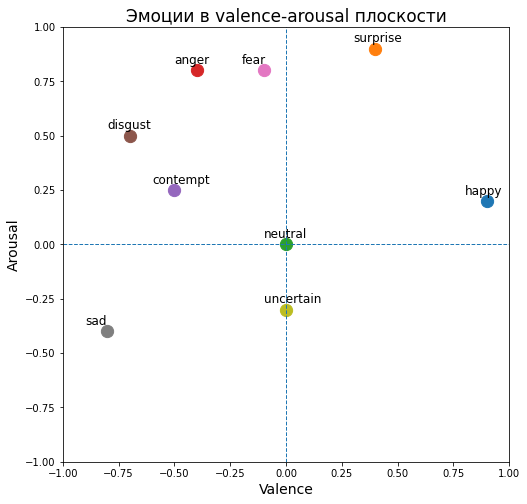

In [49]:
plt.subplots(figsize=(8,8))
for emotion, (v, a) in emotions_coord.items():
    plt.scatter(v, a, label=emotion, s=150)
    plt.text(v-0.1, a+0.03, emotion, size=12)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.vlines(0, -1, 1, linestyle='dashed', lw=1)
plt.hlines(0, -1, 1, linestyle='dashed', lw=1)
plt.xlabel('Valence', size=14)
plt.ylabel('Arousal', size=14)
plt.title('Эмоции в valence-arousal плоскости', size=17)
plt.show()

Создание датафрейма с путями до файлов и координатами для каждого файла

In [4]:
import pandas as pd
import os

In [5]:
train_path = '/content/data/content/data/croped_train/'

In [6]:
list_to = []
for path in os.listdir(train_path):
    for img in os.listdir(os.path.join(train_path, path)):
        list_to.append([os.path.join(train_path, path, img),
                    path,
                    emotions_coord[path][0],
                    emotions_coord[path][1]])

In [7]:
train_dataframe = pd.DataFrame(list_to, columns=['image_path', 'emotion', 'valence', 'arousal'])

In [8]:
train_dataframe

,image_path,emotion,valence,arousal
0,/content/data/content/data/croped_train/happy/...,happy,0.9,0.2
1,/content/data/content/data/croped_train/happy/...,happy,0.9,0.2
2,/content/data/content/data/croped_train/happy/...,happy,0.9,0.2
3,/content/data/content/data/croped_train/happy/...,happy,0.9,0.2
4,/content/data/content/data/croped_train/happy/...,happy,0.9,0.2
...,...,...,...,...
46084,/content/data/content/data/croped_train/fear/4...,fear,-0.1,0.8
46085,/content/data/content/data/croped_train/fear/3...,fear,-0.1,0.8
46086,/content/data/content/data/croped_train/fear/1...,fear,-0.1,0.8
46087,/content/data/content/data/croped_train/fear/2...,fear,-0.1,0.8


Добавление случайного смещения для координат каждого изображения в датафрейме

In [9]:
import random

In [10]:
def randomize_valence(valence):
    """
    Добавление случайного смещения для valence координат эмоции
    """
    return valence + random.uniform(-0.05, 0.05)


def randomize_arousal(arousal):
    """
    Добавление случайного смещения для arousal координат эмоции
    """
    return arousal + random.uniform(-0.05, 0.05)

In [11]:
# Применение функции для каждой строки датафрейма
train_dataframe['valence'] = train_dataframe['valence'].apply(lambda x: randomize_valence(x))
train_dataframe['arousal'] = train_dataframe['arousal'].apply(lambda x: randomize_arousal(x))

In [12]:
train_dataframe.head()

,image_path,emotion,valence,arousal
0,/content/data/content/data/croped_train/happy/...,happy,0.870669,0.169469
1,/content/data/content/data/croped_train/happy/...,happy,0.874380,0.155986
2,/content/data/content/data/croped_train/happy/...,happy,0.903824,0.173134
3,/content/data/content/data/croped_train/happy/...,happy,0.937865,0.219614
4,/content/data/content/data/croped_train/happy/...,happy,0.937308,0.152361
...,...,...,...,...
46084,/content/data/content/data/croped_train/fear/4...,fear,-0.061442,0.841120
46085,/content/data/content/data/croped_train/fear/3...,fear,-0.145506,0.771623
46086,/content/data/content/data/croped_train/fear/1...,fear,-0.117968,0.830061
46087,/content/data/content/data/croped_train/fear/2...,fear,-0.075219,0.755131


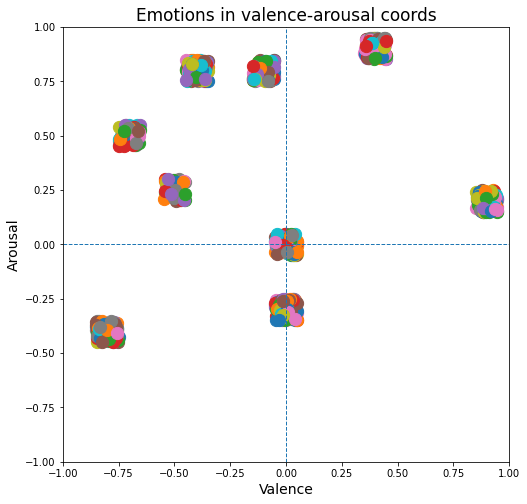

In [14]:
plt.subplots(figsize=(8,8))
for i in train_dataframe.sample(1000).values:
    plt.scatter(i[2], i[3], s=150)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.vlines(0, -1, 1, linestyle='dashed', lw=1)
plt.hlines(0, -1, 1, linestyle='dashed', lw=1)
plt.xlabel('Valence', size=14)
plt.ylabel('Arousal', size=14)
plt.title('Эмоции в valence-arousal плоскости', size=17)
plt.show()

Создание модели и загрузка предобученных весов

In [25]:
path_class_weights = '/content/models/weights/model_class_weights.h5'
path_va_weights = '/content/models/weights/model_va_weights.h5'

In [47]:
va_model = FER_va_model(path_class_model_weights=path_class_weights, path_va_model_weights=path_va_weights)

Model: "FER_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 conv2d_19 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 24, 24, 64)        0 

# Dataflow для va модели

Вход в модель - изображение в градациях серого, размером 48х48

Выход - координаты х-valence и y-arousal

Для увеличения датасета применяется аугментация изображений

In [30]:
image_size = (48,48)
batch_size = 32
train_path = '/content/data/content/data/croped_train'

In [31]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                rotation_range=15,
                                                                width_shift_range=0.05,
                                                                height_shift_range=0.05,
                                                                horizontal_flip=True,
                                                                validation_split=0.2,
                                                                fill_mode='nearest')

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          validation_split = 0.2)

In [32]:
train_dataflow = train_datagen.flow_from_dataframe(train_dataframe,
                                                    x_col='image_path',
                                                    y_col=['valence','arousal'],
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='raw',
                                                    shuffle=True,
                                                    subset='training',
                                                    interpolation='bilinear',
                                                    keep_aspect_ratio=True)

valid_dataflow = valid_datagen.flow_from_dataframe(train_dataframe,
                                                    x_col='image_path',
                                                    y_col=['valence','arousal'],
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='raw',
                                                    shuffle=True,
                                                    subset='validation',
                                                    interpolation='bilinear',
                                                    keep_aspect_ratio=True)

Found 36872 validated image filenames.
Found 9217 validated image filenames.


# Обучение модели

In [33]:
mcp = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Emotion Recognition/v2_model/final_weights/model_va_weights.h5',
                                       monitor='val_mean_absolute_error',
                                       verbose=1,
                                       save_best_only=False,
                                       save_weights_only=True,
                                       save_freq='epoch',
                                       mode='min')

In [34]:
my_optimiser = tf.keras.optimizers.Adam(learning_rate=0.001,name='Adam')

va_model.compile(loss='mse', metrics=['mean_absolute_error'], optimizer=my_optimiser)
va_model.fit(train_dataflow,
             validation_data=valid_dataflow, 
             epochs=30, 
             steps_per_epoch=2*len(train_dataflow),
             callbacks=[mcp])

# Проверка работы модели

In [37]:
emotions_coord = {'happy': [.9, .2],
                          'surprise': [.4, .9],
                          'neutral': [0, 0],
                          'anger': [-.4, .8],
                          'contempt': [-.5, .25],
                          'disgust': [-.7, .5],
                          'fear': [-.1, .8],
                          'sad': [-.8, -0.4],
                          'uncertain': [0, -.3]}
emotions = spatial.KDTree(list(emotions_coord.values()))

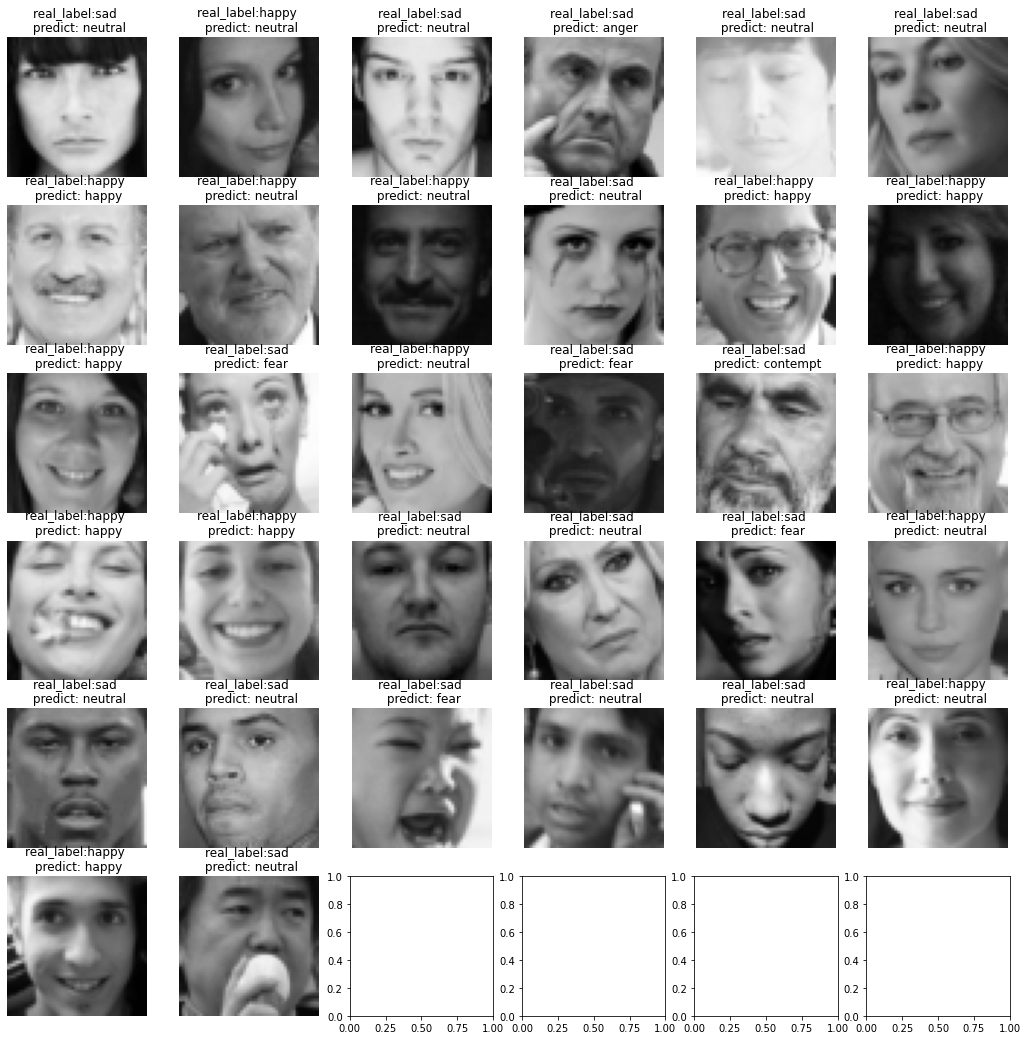

In [51]:
imgs, label = valid_dataflow.next()

rows = 6
cols = 6
count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18,18))
for i in range(rows):
    for j in range(cols):        
        if count < len(imgs):
            axes[i, j].axis("off")
            axes[i, j].imshow(imgs[count], cmap='gray', vmin=0, vmax=1)
            emotion_predict, coords = va_model.get_emotion(imgs[count])
            emotion_number = int(emotions.query(label[count])[1])
            emotion_real = list(emotions_coord.keys())[emotion_number]
            axes[i, j].set_title(f'real_label:{emotion_real} \n predict: {emotion_predict}')
            count+=1